In [1]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

for k in range(5):
    
    tf.reset_default_graph()
    
    print('---------' + str(k) + '------------')
    
    MAX_EPISODE = 2000
    MAX_EPISODE_LEN = 200

    NUM_T = 1
    NUM_R = 4
    SIGMA2 = 1e-9

    t_factor = 0.5
    epsilon = 1.0

    config = {'state_dim':3, 'action_dim':2};
    train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                    'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                    'random_seed':int(time.clock()*1000%1000), 'epsilon':epsilon, 'sigma2':SIGMA2}
    
    IS_TRAIN = False
#     rate = 3.0
    res_path = 't_M_05_nB_dqn/'
    model_path = 'model_M_05_nB_dqn/my_train_model_'+str(k)+'-2000'
    meta_path = model_path+'.meta'
    init_path = ''
    init_seqCnt = 40
    
    user_config = [{'id':'1', 'model':'AR', 'num_r':NUM_R, 'rate':1.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'2', 'model':'AR', 'num_r':NUM_R, 'rate':2.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'3', 'model':'AR', 'num_r':NUM_R, 'rate':3.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5}]
    
    if not os.path.exists(res_path):
        os.mkdir(res_path) 
    
    print(user_config)
    # 0. initialize the session object
    sess = tf.Session() 

    # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
    # sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 

    # 1. include all user in the system according to the user_config
    user_list = [];
    for info in user_config:
        info.update(config)
        info['init_path'] = init_path
        info['init_seqCnt'] = init_seqCnt
        user_list.append(MecTermDQN(sess, info, train_config))
        print('Initialization OK!----> user ' + info['id'])

    # 2. create the simulation env
    env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)

    sess.run(tf.global_variables_initializer())
    
    tflearn.config.is_training(is_training=IS_TRAIN, session=sess)

    env.init_target_network()

    res_r = []
    res_p = []
    res_b = []
    res_o = []
    res_d = []
    # 3. start to explore for each episode
    for i in range(MAX_EPISODE):

        cur_init_ds_ep = env.reset()

        cur_r_ep = np.zeros(len(user_list))
        cur_p_ep = np.zeros(len(user_list))
        cur_op_ep = np.zeros(len(user_list))
        cur_ts_ep = np.zeros(len(user_list))
        cur_ps_ep = np.zeros(len(user_list))
        cur_rs_ep = np.zeros(len(user_list))
        cur_ds_ep = np.zeros(len(user_list))
        cur_ch_ep = np.zeros(len(user_list))
        cur_of_ep = np.zeros(len(user_list))

        for j in range(MAX_EPISODE_LEN):

            # first try to transmit from current state
            [cur_r, done, cur_p, cur_op, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()

            cur_r_ep += cur_r
            cur_p_ep += cur_p
            cur_op_ep += cur_op
            cur_ts_ep += cur_ts
            cur_ps_ep += cur_ps
            cur_rs_ep += cur_rs
            cur_ds_ep += cur_ds
            cur_ch_ep += cur_ch
            cur_of_ep += cur_of


            if done:
                res_r.append(cur_r_ep/MAX_EPISODE_LEN)
                res_p.append(cur_p_ep/MAX_EPISODE_LEN)
                res_b.append(cur_ds_ep/MAX_EPISODE_LEN)
                res_o.append(cur_of_ep/MAX_EPISODE_LEN)
                res_d.append(cur_ds)
                print('%d:r:%s,p:%s,op:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s,rbuf:%s' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_op_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep, cur_ds))

    name = res_path+'test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
    np.savez(name, res_r, res_p, res_b, res_o, res_d)
    
    tflearn.config.is_training(is_training=False, session=sess)
    #Create a saver object which will save all the variables
    saver = tf.train.Saver() 
    saver.save(sess, model_path)

    sess.close()

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
---------0------------
[{'id': '1', 'model': 'AR', 'num_r': 4, 'rate': 1.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.5, 'penalty': 1000, 'action_level': 5}, {'id': '2', 'model': 'AR', 'num_r': 4, 'rate': 2.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.5, 'penalty': 1000, 'action_level': 5}, {'id': '3', 'model': 'AR', 'num_r': 4, 'rate': 3.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.5, 'penalty': 1000, 'action_level': 5}]
Initialization OK!----> user 1
Initialization OK!----> user 2
Initialization OK!----> user 3
0:r:[-10.02998952 -12.8889893  -28.74369365],p:[1.00940394 1.65098324 2.1625    ],op:[0.88809606 0.30901676 0.        ],tr:[1.21294366 1.05158098 1.0915772 ],pr:[1.64222861 1.61941534 1.80640939],rev:[0.93  2.055 2.97 ],dbuf:[ 1.08497905  6.17797859 35.86238731],ch:[4.58912266 3.02005968 3.18343053],ibuf:

21:r:[-12.10839122 -12.83449536 -27.14150592],p:[1.30897191 1.49894976 2.1       ],op:[0.79352809 0.57855024 0.        ],tr:[1.401573   1.4715778  1.22453274],pr:[1.68889988 1.76573875 1.72967143],rev:[1.02  2.015 2.96 ],dbuf:[ 3.19178244  4.89399072 33.28301184],ch:[4.52255582 4.41023371 3.75626998],ibuf:[39.0, 29.0, 22.0],rbuf:[ 1.         15.47675211 23.15916519]
22:r:[-10.86043659 -13.68079948 -32.32345925],p:[1.22584125 1.65425284 1.93      ],op:[0.78165875 0.34074716 0.        ],tr:[1.16896281 1.32256486 1.19613788],pr:[1.68660512 1.62925217 1.62736868],rev:[1.035 1.97  2.87 ],dbuf:[ 1.64587317  7.41159897 45.3469185 ],ch:[3.72063636 3.86417916 3.57806659],ibuf:[20.0, 47.5, 33.5],rbuf:[ 0.          5.50984868 42.7986892 ]
23:r:[-11.27051318 -11.64209511 -36.05482428],p:[1.21565521 1.47770706 1.9925    ],op:[0.69184479 0.53979294 0.        ],tr:[1.14857355 1.26571697 1.0890414 ],pr:[1.5891366  1.58751247 1.67528217],rev:[1.055 1.99  2.985],dbuf:[ 3.46602636  3.10919023 52.18464856

44:r:[ -8.89777851 -13.99406439 -17.42837254],p:[1.00530026 1.50574905 1.9071519 ],op:[0.64469974 0.27425095 0.0403481 ],tr:[0.97170419 1.1732632  1.08098353],pr:[1.43522709 1.62219819 1.70257067],rev:[1.03  2.165 2.88 ],dbuf:[ 1.29555703 10.18812877 15.38174507],ch:[3.61696787 4.4080173  3.22904723],ibuf:[3.0, 42.5, 8.5],rbuf:[ 6.          2.05631398 37.85398002]
45:r:[ -9.58751086 -11.77730326 -13.54637878],p:[1.00369166 1.29908394 1.79404361],op:[0.77130834 0.41341606 0.10095639],tr:[1.17863623 1.14667176 1.34757752],pr:[1.5801609  1.71675391 1.74390061],rev:[0.97 1.86 2.96],dbuf:[1.42502172 6.42960652 8.14275757],ch:[4.58432398 4.97184779 4.37192993],ibuf:[21.0, 41.0, 5.5],rbuf:[ 1.          2.         13.08881745]
46:r:[-10.89146111 -10.76582216 -21.27004971],p:[1.14229775 1.33729377 1.8751203 ],op:[0.58520225 0.47270623 0.0348797 ],tr:[1.15674116 1.05693025 1.34092732],pr:[1.4324628  1.68507258 1.60367104],rev:[0.99  1.94  2.835],dbuf:[ 4.50792221  3.43164431 23.44009942],ch:[3.6

67:r:[ -8.48957969 -12.14949056 -30.47120018],p:[1.02154949 1.50519428 1.7541688 ],op:[0.52095051 0.24730572 0.0208312 ],tr:[0.76393759 0.91461147 1.01935538],pr:[1.33648703 1.61315253 1.67511707],rev:[1.015 1.92  3.18 ],dbuf:[ 1.55415939  6.77398112 43.19240036],ch:[3.0633051  3.23818625 3.7971987 ],ibuf:[9.0, 37.0, 2.5],rbuf:[  1.4801579    8.60665411 105.26357354]
68:r:[-10.11791872 -10.18583665 -20.15364383],p:[1.08311344 1.2881567  2.005     ],op:[0.57938656 0.2443433  0.        ],tr:[1.12196039 1.0228961  1.20348971],pr:[1.43095012 1.46808876 1.68458196],rev:[1.005 2.07  2.935],dbuf:[ 3.61083744  5.04667331 20.25728765],ch:[4.18054492 4.21135835 3.84716016],ibuf:[48.5, 4.0, 36.5],rbuf:[ 3.          4.25802315 45.88566603]
69:r:[ -8.73093119 -10.52529466 -42.33872086],p:[0.9946778  1.31538786 1.88      ],op:[0.5203222  0.39961214 0.        ],tr:[1.06376249 0.91307551 1.27344556],pr:[1.28443341 1.69608412 1.50940925],rev:[1.105 1.87  3.015],dbuf:[ 2.31186237  3.90058931 65.87744172

90:r:[ -8.61891474 -10.72475868 -27.53159025],p:[0.90347465 1.36449876 2.145     ],op:[0.69652535 0.21800124 0.        ],tr:[1.07842813 0.87331995 1.33265888],pr:[1.46257618 1.60152149 1.763897  ],rev:[0.945 1.92  2.96 ],dbuf:[ 1.23782947  5.62451736 33.6131805 ],ch:[4.68201566 3.32617962 3.53040787],ibuf:[11.5, 40.5, 46.0],rbuf:[ 0.          0.84399166 18.68882476]
91:r:[ -7.9994842   -9.22245142 -20.02387767],p:[0.82912535 1.1848933  1.9925    ],op:[0.57337465 0.2726067  0.        ],tr:[0.96224537 0.87758435 1.50202931],pr:[1.47632084 1.58193356 1.74548712],rev:[1.05  1.925 3.115],dbuf:[ 1.9739684   3.86990284 20.12275534],ch:[4.50070526 3.87731026 4.7640183 ],ibuf:[23.0, 10.0, 32.5],rbuf:[5.         5.4801579  5.99671377]
92:r:[ -7.86229445  -9.44412688 -23.43257591],p:[0.87870249 1.22766573 2.135     ],op:[0.55629751 0.31733427 0.        ],tr:[1.00354155 0.97809405 1.33055022],pr:[1.26830416 1.62327889 1.78740599],rev:[1.025 1.955 2.915],dbuf:[ 1.3745889   3.43825375 25.51515183],c

113:r:[ -9.11827226  -9.93418919 -19.27302836],p:[0.9852238  1.23316949 1.79097768],op:[0.4847762  0.14933051 0.00402232],tr:[1.13352645 0.67847218 1.21455767],pr:[1.2952904  1.48730535 1.70349324],rev:[1.015 1.97  2.8  ],dbuf:[ 3.53654451  6.04337837 20.59605673],ch:[5.30957971 2.85982195 4.31927426],ibuf:[44.0, 8.0, 29.0],rbuf:[1.         4.18365703 6.80970839]
114:r:[ -7.58021458  -9.46273519 -16.73520309],p:[0.8285764  1.1927759  1.85769321],op:[0.5614236  0.1997241  0.02730679],tr:[0.81140369 0.7357774  1.16933149],pr:[1.3430084  1.60057543 1.71029808],rev:[0.985 1.835 2.915],dbuf:[ 1.26042915  5.00047038 14.62040618],ch:[4.13905603 3.80660479 3.70863178],ibuf:[1.0, 24.5, 0.0],rbuf:[ 1.12440224  3.41259895 17.7551954 ]
115:r:[ -7.92330837 -10.49420667 -48.24312731],p:[0.83525674 1.3354136  1.8025    ],op:[0.45724326 0.2545864  0.        ],tr:[0.91803256 0.98553249 1.13833976],pr:[1.18974658 1.60489226 1.59313148],rev:[0.86  2.075 3.09 ],dbuf:[ 2.92161673  5.08841333 78.46125463],c

136:r:[ -7.00655468  -9.13975326 -18.77289803],p:[0.81788781 1.21591488 1.96      ],op:[0.37961219 0.24658512 0.        ],tr:[0.7065873  0.9856027  1.19604646],pr:[1.22070092 1.47389474 1.78695882],rev:[0.985 2.05  2.925],dbuf:[ 2.03810937  3.65450652 17.94579606],ch:[3.72523343 4.01281009 3.28609588],ibuf:[24.0, 0.0, 27.5],rbuf:[ 1.          5.         15.89894321]
137:r:[ -7.85836386  -9.5415228  -50.00756775],p:[0.86582336 1.24169309 1.7725    ],op:[0.38917664 0.24330691 0.        ],tr:[0.82045034 0.96998746 1.04794938],pr:[1.31406811 1.51072528 1.40217796],rev:[1.07 2.04 2.95],dbuf:[ 3.16672773  4.2330456  82.2901355 ],ch:[4.52195454 3.75149156 3.4226498 ],ibuf:[43.5, 0.0, 20.0],rbuf:[  0.           3.88574095 119.97453179]
138:r:[ -7.59368964 -11.1095164  -28.07443083],p:[0.85482718 1.33508395 1.815     ],op:[0.43517282 0.13991605 0.        ],tr:[0.66284777 0.95766216 1.23721464],pr:[1.3455866  1.42414526 1.67030161],rev:[0.93  1.915 3.04 ],dbuf:[ 2.28737929  7.4690328  37.9988616

159:r:[ -7.26193648 -12.03261519 -49.27749191],p:[0.8427081  1.23056705 1.8325    ],op:[0.3972919  0.14943295 0.        ],tr:[0.92568609 0.91440309 1.49326009],pr:[1.27608075 1.44261268 1.35997251],rev:[1.07  1.915 3.24 ],dbuf:[ 2.12387296 10.26523038 80.22998382],ch:[5.16947642 4.90933852 4.93110499],ibuf:[21.0, 40.5, 46.5],rbuf:[  4.           2.         123.85348057]
160:r:[ -7.14212363  -8.27675183 -42.74868607],p:[0.78837327 1.06895904 2.175     ],op:[0.49412673 0.21104096 0.        ],tr:[0.83914406 0.7940672  1.50993215],pr:[1.27400838 1.55618007 1.88012258],rev:[1.035 1.955 3.415],dbuf:[ 1.45924725  3.75350367 63.74737215],ch:[4.00469774 4.06682468 3.99761663],ibuf:[5.0, 12.5, 49.0],rbuf:[ 0.          4.         53.98905489]
161:r:[ -7.69466447  -8.47384714 -21.95513721],p:[0.83456297 1.04845968 2.145     ],op:[0.42043703 0.19654032 0.        ],tr:[0.89777132 0.9979998  1.3290258 ],pr:[1.26102061 1.38736974 1.94702885],rev:[0.985 2.045 3.205],dbuf:[ 2.83932893  4.49769429 22.460

182:r:[ -6.25678331  -8.91011151 -23.59485374],p:[0.68265482 1.13910534 1.95140671],op:[0.37484518 0.12839466 0.01359329],tr:[0.71068431 0.74696453 1.27689315],pr:[1.1058338  1.51667425 1.80074658],rev:[1.01 2.   3.1 ],dbuf:[ 1.93856663  5.14522301 27.53970748],ch:[4.54891269 3.64300095 3.62244527],ibuf:[19.0, 16.0, 35.0],rbuf:[ 4.08821471  7.18763481 43.49868197]
183:r:[ -7.91414516 -10.01604946 -14.60281129],p:[0.77897485 1.21956934 1.75193687],op:[0.38852515 0.12043066 0.09306313],tr:[0.89245496 0.7550496  1.31472527],pr:[1.17778536 1.55921264 1.73095928],rev:[0.96  2.015 2.91 ],dbuf:[ 4.15329032  6.63209892 10.75562257],ch:[4.77866089 3.67139237 3.93844106],ibuf:[48.5, 21.0, 15.0],rbuf:[ 2.          3.60383151 19.37980367]
184:r:[ -7.01201167  -8.12351844 -17.08476292],p:[0.79654017 1.09134618 1.88204868],op:[0.34345983 0.17115382 0.02295132],tr:[0.6504532  0.7755803  1.27048945],pr:[1.16249926 1.45781244 1.74508661],rev:[0.995 1.945 2.825],dbuf:[ 2.62402333  3.62203688 15.11952583

205:r:[ -6.10504079  -8.8812449  -18.29919791],p:[0.7420085  1.11677342 1.96563141],op:[0.2579915  0.15822658 0.01186859],tr:[0.6402497  1.0785369  1.27042368],pr:[1.10787798 1.29750219 1.81948312],rev:[1.06  1.955 2.99 ],dbuf:[ 2.21008157  5.01248981 16.82339583],ch:[3.50096821 5.84663232 3.69128471],ibuf:[25.0, 27.0, 29.5],rbuf:[ 0.41259895  7.41259895 12.93149808]
206:r:[ -6.82528118 -10.11642318 -32.74804843],p:[0.76098152 1.30131009 2.1325    ],op:[0.36651848 0.05618991 0.        ],tr:[0.85809344 0.69527941 1.17576534],pr:[1.13562417 1.58122531 1.83427755],rev:[0.95  2.085 3.105],dbuf:[ 2.37556236  6.65784636 44.17109686],ch:[4.9347376  3.85419379 3.46079762],ibuf:[42.5, 26.0, 44.0],rbuf:[ 0.          6.25442761 62.99142103]
207:r:[ -5.3434464   -8.6869464  -45.95404358],p:[0.57803875 1.09230804 1.715     ],op:[0.33946125 0.12769196 0.        ],tr:[0.79127131 0.91149358 0.97226025],pr:[0.97735586 1.3135695  1.77070294],rev:[0.915 1.895 3.26 ],dbuf:[ 1.51189281  5.17389281 74.75808

228:r:[ -5.10705114  -7.87922617 -14.57433969],p:[0.60086862 1.01897162 1.96105152],op:[0.27413138 0.13352838 0.05144848],tr:[0.568585   0.7414437  1.17001286],pr:[1.04100289 1.46880279 1.94419568],rev:[1.005 1.98  3.03 ],dbuf:[1.46410228 4.23345234 9.02367939],ch:[4.38506669 5.30673719 3.29838904],ibuf:[0.0, 11.5, 2.0],rbuf:[0.62198434 4.27792972 4.28949208]
229:r:[ -6.25987833  -7.89211668 -21.88436802],p:[0.74439586 1.00627049 2.0425    ],op:[0.30310414 0.09622951 0.        ],tr:[0.68191292 0.65509263 1.4338901 ],pr:[1.16104744 1.46975713 1.81223193],rev:[1.005 1.915 3.11 ],dbuf:[ 2.04475666  4.75923336 23.34373605],ch:[4.30055688 4.45234473 4.09006012],ibuf:[25.5, 14.0, 36.0],rbuf:[1.         7.13470226 8.77559486]
230:r:[ -6.72889456 -11.73213231 -21.77519221],p:[0.70028669 1.27685971 1.97007812],op:[0.31721331 0.07064029 0.00992188],tr:[0.61471992 0.75121831 0.89763358],pr:[1.22518504 1.62579375 1.89851747],rev:[0.975 2.06  2.885],dbuf:[ 3.28278912  9.98926461 23.75038443],ch:[4.

251:r:[ -5.76453112  -8.91082691 -51.77845879],p:[0.68046151 1.05054836 1.7525    ],op:[0.28453849 0.11695164 0.        ],tr:[0.82573334 0.82718156 1.46934678],pr:[1.00704918 1.48093962 1.22827399],rev:[0.975 1.96  2.945],dbuf:[ 1.87906223  6.14665382 86.03191759],ch:[5.35259788 5.10285957 3.76181976],ibuf:[27.5, 41.0, 42.5],rbuf:[ 2.          8.13900033 91.97584562]
252:r:[ -7.5519661   -9.5248657  -19.31685855],p:[0.86921609 1.17662738 1.87753464],op:[0.23328391 0.08337262 0.00746536],tr:[0.61721873 0.57538302 1.29825458],pr:[1.20278277 1.57106932 1.7930052 ],rev:[1.145 2.045 3.17 ],dbuf:[ 4.0789322   6.4497314  19.78371711],ch:[3.55931648 3.17444889 4.92444395],ibuf:[48.0, 3.0, 33.5],rbuf:[ 1.          4.06725698 54.2515456 ]
253:r:[ -6.74943349 -10.50944895 -29.28487272],p:[0.77103167 1.35854646 1.64017837],op:[0.24646833 0.04895354 0.00232163],tr:[0.72494223 0.74058088 1.37178752],pr:[1.01561836 1.52696684 1.34217957],rev:[0.96  2.135 2.99 ],dbuf:[ 3.32386699  6.9438979  42.144745

274:r:[ -4.93103592  -9.79564994 -14.85357927],p:[0.52498027 1.13387372 1.8475    ],op:[0.29751973 0.16612628 0.        ],tr:[0.39437812 0.90053979 1.30873878],pr:[1.08557385 1.43061299 1.75820129],rev:[1.    1.98  3.085],dbuf:[ 1.63707184  6.59129989 11.23215854],ch:[3.04509043 3.81752959 3.97371888],ibuf:[1.0, 20.5, 9.5],rbuf:[ 4.09906084  0.21344223 13.11198738]
275:r:[ -5.31663422  -7.80734182 -16.35711488],p:[0.59975225 1.00538831 1.81150373],op:[0.19274775 0.20211169 0.01349627],tr:[0.3941325  0.93989473 1.20953359],pr:[1.02296992 1.39045729 1.82190391],rev:[0.83 1.92 3.02],dbuf:[ 2.70826845  3.53968364 14.46422975],ch:[2.85478387 4.89036682 4.02816091],ibuf:[32.0, 8.0, 4.5],rbuf:[1.         1.         6.89093157]
276:r:[ -5.20520157 -11.26531165 -37.14441874],p:[0.57956009 1.26176534 1.7475    ],op:[0.28793991 0.10573466 0.        ],tr:[0.63933221 0.82390581 1.24266854],pr:[1.10355649 1.50697762 1.59039892],rev:[1.01  2.005 2.975],dbuf:[ 1.73540313  8.85562329 56.81383749],ch:[5

297:r:[ -5.17972542  -9.34199207 -21.92612538],p:[0.6097138  1.15314194 1.73      ],op:[0.2127862  0.05685806 0.        ],tr:[0.6082607  0.93151258 1.10042897],pr:[0.87023378 1.36828067 1.7627664 ],rev:[0.915 2.145 2.965],dbuf:[ 2.13445085  6.58398413 26.55225075],ch:[3.71868464 4.57350547 3.72939206],ibuf:[28.0, 27.0, 45.5],rbuf:[ 2.20646221  9.63896563 65.86092536]
298:r:[ -7.14171881  -8.28714135 -16.42188618],p:[0.72265347 1.05086857 1.98576519],op:[0.27234653 0.04413143 0.01173481],tr:[0.6162904  0.76668944 1.39383157],pr:[1.18114698 1.38061412 1.88198994],rev:[1.025 2.045 3.135],dbuf:[ 4.33343761  5.62428269 12.86877236],ch:[4.06988006 4.07104645 3.64839744],ibuf:[48.5, 13.5, 32.0],rbuf:[ 0.         11.12984091  7.74815983]
299:r:[ -5.75604411 -12.98511367 -43.45596349],p:[0.67933541 1.53631906 1.825     ],op:[0.25316459 0.06368094 0.        ],tr:[0.65618884 0.77854477 1.32470125],pr:[0.98592505 1.63295673 1.48780192],rev:[0.905 2.1   3.11 ],dbuf:[ 2.18708822  9.97022734 68.66192

320:r:[ -5.84505006 -10.49329821 -50.85710638],p:[0.68465133 1.19128697 1.8075    ],op:[0.18284867 0.06121303 0.        ],tr:[0.56242983 0.84039686 1.1478517 ],pr:[0.96701295 1.45175681 1.62900541],rev:[1.    2.15  3.165],dbuf:[ 3.01510012  8.46159643 83.63921277],ch:[3.76913656 3.86917632 3.84420975],ibuf:[33.5, 12.5, 38.5],rbuf:[  2.41259895   6.14884106 116.12857669]
321:r:[ -7.35358501  -9.22088231 -30.77155974],p:[0.79883073 1.16175016 1.6425    ],op:[0.18866927 0.07324984 0.        ],tr:[0.5204988  0.49086876 0.97648597],pr:[1.11066689 1.75592509 1.60494114],rev:[0.995 1.995 2.855],dbuf:[ 4.83217002  6.09176463 45.11811948],ch:[3.69440057 3.58033306 3.39231927],ibuf:[48.5, 35.0, 34.0],rbuf:[ 1.         5.7745183 88.7145784]
322:r:[ -4.41911386  -7.65188541 -50.87369919],p:[0.50606304 0.99376027 1.5125    ],op:[0.22643696 0.04123973 0.        ],tr:[0.38804216 0.59392509 0.98567413],pr:[1.01255786 1.44174048 1.54849632],rev:[0.99  1.905 3.23 ],dbuf:[ 1.51322772  4.95377082 86.62239

343:r:[ -4.83230384  -7.85976041 -16.58749881],p:[0.59441196 0.95023759 1.94135328],op:[0.18558804 0.05726241 0.01614672],tr:[0.70093827 0.74915769 1.2900861 ],pr:[0.84239635 1.35347686 1.8121    ],rev:[1.075 2.025 2.96 ],dbuf:[ 1.86460768  5.64452082 13.59999762],ch:[5.09435559 4.22144865 3.59122406],ibuf:[13.5, 1.5, 23.5],rbuf:[3.2458501 6.1701854 1.       ]
344:r:[ -6.57211087 -11.66097837 -62.36689924],p:[0.71724566 1.22912249 1.725     ],op:[0.21775434 0.00587751 0.        ],tr:[0.58958091 0.6752901  1.33570656],pr:[1.05873746 1.54090339 1.23044403],rev:[1.015 2.025 3.045],dbuf:[  3.79422174  10.97195674 107.48379848],ch:[3.92886352 3.75672708 5.10495669],ibuf:[44.0, 46.5, 49.0],rbuf:[  1.          10.46052455 144.76988157]
345:r:[ -5.34877426 -11.07647682 -15.67781004],p:[0.64872575 1.16378873 1.74483734],op:[0.17877425 0.03121127 0.00766266],tr:[0.65448876 0.95034925 1.33900564],pr:[0.95482219 1.300449   1.69079304],rev:[1.01  2.015 3.13 ],dbuf:[ 2.42254852 10.20295364 13.830620

366:r:[ -5.03258524  -9.55831051 -22.94878095],p:[0.59089654 1.21940797 1.9       ],op:[0.18660346 0.02559203 0.        ],tr:[0.57361745 0.70356798 0.9951357 ],pr:[0.94609146 1.51863443 1.7044802 ],rev:[0.86  2.18  2.825],dbuf:[ 2.29017048  6.66662102 26.89756189],ch:[4.24054328 4.01816953 2.9267744 ],ibuf:[35.0, 3.0, 28.5],rbuf:[ 0.36401517  6.18507513 53.57681994]
367:r:[ -6.10170887  -9.01412324 -26.15805936],p:[0.66303148 1.17665665 1.98500019],op:[0.19196852 0.04584335 0.00499981],tr:[0.40900767 0.68264091 1.46057663],pr:[1.16009445 1.5978662  1.61661618],rev:[0.97 2.13 2.89],dbuf:[ 3.65341773  5.80324649 32.41611871],ch:[3.60214838 3.81368164 4.4255315 ],ibuf:[48.0, 20.5, 49.0],rbuf:[ 1.23779684  7.06299474 13.49431095]
368:r:[ -4.85576291  -9.59755694 -17.99221771],p:[0.58090908 1.18970896 2.0025    ],op:[0.22909092 0.04279104 0.        ],tr:[0.46552304 0.73492424 1.13795553],pr:[1.11699637 1.52032629 1.77054526],rev:[1.055 2.115 2.985],dbuf:[ 1.61152582  6.87011387 15.95943543]

389:r:[ -6.83524609 -11.94554661 -34.50205319],p:[0.77321906 1.32440593 1.525     ],op:[0.17178094 0.02309407 0.        ],tr:[0.55574359 0.56335284 0.76250373],pr:[1.0429406  1.71813166 1.6538544 ],rev:[1.055 2.055 3.12 ],dbuf:[ 4.22049218 10.41609322 53.75410638],ch:[3.77052095 3.25369043 3.14254136],ibuf:[46.5, 44.0, 10.5],rbuf:[  0.           7.99037161 151.22837451]
390:r:[ -5.9944786   -8.72152178 -30.3309006 ],p:[0.68184801 1.0566926  1.96      ],op:[0.18065199 0.0483074  0.        ],tr:[0.53590794 0.4987696  1.21994928],pr:[1.05774222 1.63079556 1.90894143],rev:[0.98  2.07  3.135],dbuf:[ 3.3639572   6.39304357 41.06180121],ch:[3.55682933 3.44480714 3.26604611],ibuf:[45.0, 4.0, 37.0],rbuf:[ 1.41259895  7.50634272 38.2218572 ]
391:r:[ -5.85882888 -10.37535417 -15.76882503],p:[0.6877018  1.3302279  1.73065133],op:[0.1772982  0.0472721  0.01184867],tr:[0.56284735 0.7448946  1.05603108],pr:[0.92581276 1.58942365 1.83687897],rev:[1.085 2.175 2.81 ],dbuf:[ 3.06765776  6.97570835 14.112

412:r:[ -4.96171458 -13.40626981 -35.67400452],p:[0.57891412 1.43388785 1.72703582],op:[0.21358588 0.04361215 0.00796418],tr:[0.63421748 0.94248919 1.47095573],pr:[0.93796948 1.47632546 1.18755253],rev:[1.045 2.16  2.99 ],dbuf:[ 1.99842917 12.03753962 53.99800903],ch:[3.80009512 3.64913533 3.75869186],ibuf:[16.0, 35.0, 7.0],rbuf:[ 0.          6.5278624  76.38272848]
413:r:[ -4.50210738  -8.31925524 -14.17224745],p:[0.55221935 1.08741923 1.78536422],op:[0.13528065 0.04508077 0.00213578],tr:[0.52217595 0.74738884 1.25982902],pr:[0.90458214 1.44977947 1.70218627],rev:[1.055 2.105 2.92 ],dbuf:[ 2.12921475  5.31351047 10.4694949 ],ch:[4.44898176 4.29596978 4.02129505],ibuf:[12.0, 5.5, 20.5],rbuf:[ 3.04538569  9.05842582 12.84907207]
414:r:[ -4.56032084  -8.17231064 -20.69354138],p:[0.51250546 1.10788926 1.6625    ],op:[0.24249454 0.06211074 0.        ],tr:[0.38546047 0.55688236 1.05206506],pr:[1.05128635 1.55888621 1.79198867],rev:[1.   1.98 2.92],dbuf:[ 1.57064167  4.64462128 24.76208276],

435:r:[ -5.4678911   -8.02976511 -83.17772705],p:[0.6940477  1.02131563 1.57      ],op:[0.1359523  0.05368437 0.        ],tr:[0.60950573 0.58619796 1.29838838],pr:[0.7751009  1.4881717  0.95164491],rev:[0.945 1.94  3.105],dbuf:[  2.63578219   5.30953021 150.6554541 ],ch:[3.76414485 3.56190543 4.29742158],ibuf:[26.0, 7.0, 37.5],rbuf:[  1.           3.28462988 208.49334049]
436:r:[ -5.35753155  -7.65336795 -44.53184328],p:[0.61441911 1.02183804 1.4625    ],op:[0.19808089 0.03816196 0.        ],tr:[0.54648374 0.84187809 1.39556781],pr:[0.95628923 1.27769186 1.47892447],rev:[1.03  1.975 3.25 ],dbuf:[ 2.5900631   4.70673589 74.43868656],ch:[3.6433582  3.96191212 3.9895614 ],ibuf:[33.5, 0.0, 34.0],rbuf:[  1.           3.5025167  109.10154375]
437:r:[ -4.77452824  -8.33127243 -35.22978253],p:[0.5716208  1.12326042 1.39      ],op:[0.1783792  0.04923958 0.        ],tr:[0.62086262 0.58792209 1.51777247],pr:[0.94142324 1.44059335 0.75143508],rev:[1.03  1.94  2.985],dbuf:[ 2.04905648  4.93754487 5

458:r:[ -4.99436118  -9.06808543 -18.69241654],p:[0.60689972 1.05327544 1.48901231],op:[0.13560028 0.05922456 0.06348769],tr:[0.45130758 0.86444175 1.02155721],pr:[0.94030517 1.47980853 1.75594498],rev:[1.    2.125 2.855],dbuf:[ 2.56372236  7.01117087 21.85983308],ch:[3.44567685 4.85345694 3.49814111],ibuf:[19.5, 20.0, 3.0],rbuf:[ 2.25747303  9.40019117 44.23260633]
459:r:[ -4.95339879  -7.14255173 -13.25745758],p:[0.54055724 0.93092621 1.51457799],op:[0.20194276 0.04157379 0.06542201],tr:[0.41363633 0.49715957 1.41068207],pr:[1.03355898 1.40305763 1.60619082],rev:[0.98  1.8   2.945],dbuf:[ 2.48179758  4.56010346 10.71491517],ch:[3.76834542 3.93410093 4.36214189],ibuf:[33.0, 6.0, 29.0],rbuf:[ 2.          1.40999411 42.06283132]
460:r:[ -5.92960774  -8.06112216 -19.73467385],p:[0.62821678 0.97072421 2.0175    ],op:[0.35178322 0.07677579 0.0025    ],tr:[0.58980354 0.85885515 1.33779248],pr:[1.07815708 1.35499063 1.75363343],rev:[0.97 2.   2.99],dbuf:[ 2.05921548  5.64724432 19.26934769],

481:r:[ -3.82901772 -11.43042057 -12.91186958],p:[0.46711686 1.31669147 1.60913608],op:[0.15288314 0.04080853 0.03336392],tr:[0.43785797 0.78704843 1.3399646 ],pr:[0.87119396 1.5316996  1.73465575],rev:[0.935 2.03  2.875],dbuf:[1.45803543 9.28584114 9.39873915],ch:[5.22456168 3.21568072 4.8835462 ],ibuf:[10.0, 43.0, 30.5],rbuf:[2.48154973 5.         6.62708423]
482:r:[ -4.39353731 -10.53445455 -90.75651428],p:[0.51599025 1.2330765  1.2775    ],op:[0.20650975 0.0244235  0.        ],tr:[0.44462907 0.67023165 1.05494839],pr:[1.02822227 1.57919959 1.19280188],rev:[1.035 2.065 3.25 ],dbuf:[  1.56207462   8.49390911 168.73802856],ch:[3.22043037 4.06275361 4.26026262],ibuf:[4.0, 41.0, 49.0],rbuf:[  0.           9.93929547 249.44994771]
483:r:[ -4.71989062  -7.97958177 -27.22144135],p:[0.56927773 0.96991098 1.78      ],op:[0.19572227 0.08758902 0.        ],tr:[0.33280907 0.80111146 1.07695641],pr:[1.11372406 1.29131786 1.82730207],rev:[1.165 1.79  3.135],dbuf:[ 1.78978124  5.38416353 36.642882

504:r:[ -5.43570728  -9.25677129 -68.42928617],p:[0.6361212  1.12720952 1.61      ],op:[0.1663788  0.05279048 0.        ],tr:[0.36177052 0.36985624 1.0012776 ],pr:[1.08802896 1.76669559 1.4682122 ],rev:[0.995 2.05  3.05 ],dbuf:[  2.84641456   6.71354258 120.75857233],ch:[4.21808502 3.22091665 3.9286495 ],ibuf:[30.0, 15.5, 34.0],rbuf:[  0.          17.23205776 150.10203963]
505:r:[ -4.29107284  -9.45339769 -14.49847931],p:[0.52513178 1.04170233 1.68886364],op:[0.13986822 0.11579767 0.02863636],tr:[0.61820661 0.75104627 1.23243619],pr:[0.7915288  1.36589964 1.653439  ],rev:[0.915 1.84  2.795],dbuf:[ 1.93214568  7.33179538 11.82195863],ch:[4.68461515 4.17971776 3.71109822],ibuf:[28.5, 28.0, 16.5],rbuf:[ 1.97748999  4.         13.31463994]
506:r:[ -5.3589987   -7.43395789 -27.92485225],p:[0.62749671 0.92762945 1.625     ],op:[0.20500329 0.05987055 0.        ],tr:[0.58141384 0.62027893 1.25437955],pr:[1.0305148  1.41606083 1.57678103],rev:[1.09  1.905 3.125],dbuf:[ 2.3929974   4.99291578 39

527:r:[ -4.2458333   -9.04135496 -16.18656289],p:[0.50791144 1.0416175  1.7383627 ],op:[0.15708856 0.0608825  0.0166373 ],tr:[0.48799571 0.78312785 1.3613716 ],pr:[0.89464436 1.48603739 1.75786701],rev:[1.01  1.985 3.115],dbuf:[ 1.8416666   7.05770993 14.82312577],ch:[4.0518351  3.98800079 4.23440779],ibuf:[5.5, 47.0, 11.0],rbuf:[ 1.41259895  7.65039579 18.59976254]
528:r:[ -5.66872039  -8.7648855  -24.10442779],p:[0.68025495 1.1010456  2.14069405],op:[0.16474505 0.0664544  0.01180595],tr:[0.67275426 0.62450349 1.52509055],pr:[0.90347816 1.5380174  1.51017245],rev:[1.04  1.925 3.11 ],dbuf:[ 2.88744079  5.85477099 26.68385557],ch:[3.85746763 4.16244242 3.45145659],ibuf:[34.5, 34.5, 24.5],rbuf:[ 1.90029321  7.45267771 43.99484502]
529:r:[ -4.47356005  -8.20043339 -62.92407408],p:[0.54621786 1.01996451 1.2625    ],op:[0.17628214 0.04753549 0.        ],tr:[0.60892988 0.44782165 1.07319131],pr:[0.88925844 1.49088157 0.8885408 ],rev:[1.005 1.835 2.94 ],dbuf:[  1.7221201    5.72586678 113.223

550:r:[ -3.59353088  -8.52552537 -55.24453774],p:[0.42629097 1.0075439  1.5775    ],op:[0.11620903 0.0024561  0.        ],tr:[0.35819131 0.94357519 1.34728421],pr:[0.90572011 1.20031433 1.1657987 ],rev:[1.045 2.135 2.86 ],dbuf:[ 1.76206176  6.95105074 94.71407548],ch:[4.06567831 4.17381609 3.3669368 ],ibuf:[3.0, 0.0, 39.0],rbuf:[  3.63608198   1.76360693 108.38341792]
551:r:[ -4.77124487  -8.83229305 -23.18284926],p:[0.55787047 1.13218396 1.9814519 ],op:[0.16712953 0.03281604 0.0110481 ],tr:[0.42871177 0.51677848 1.10021808],pr:[1.06195722 1.5804292  2.00376793],rev:[1.035 2.03  3.005],dbuf:[ 2.29248974  6.01458611 26.44069852],ch:[4.41530106 3.36858468 4.14730797],ibuf:[29.5, 3.0, 24.5],rbuf:[0.         2.77624542 7.47862512]
552:r:[ -4.40542687 -10.16672463 -11.17764681],p:[0.57500698 1.16544271 1.48880665],op:[0.11499302 0.03705729 0.03869335],tr:[0.50309285 0.49524542 1.27589368],pr:[0.93318312 1.67442784 1.75006993],rev:[1.045 1.975 2.92 ],dbuf:[1.91085374 8.30844925 7.08029363],c

573:r:[ -5.4915308   -7.28247593 -21.34179534],p:[0.54594718 0.91015232 2.09897766],op:[0.28655282 0.10734768 0.00102234],tr:[0.31663305 0.62434105 1.29415283],pr:[1.158719   1.47443591 1.91004756],rev:[1.035 1.92  3.015],dbuf:[ 2.6580616   4.38995186 21.68359067],ch:[4.18600073 3.97177295 4.73439644],ibuf:[20.5, 9.0, 41.5],rbuf:[1.         5.18988671 3.76906674]
574:r:[ -5.07999265  -8.22058358 -14.33584316],p:[0.62715551 0.99027435 1.72303744],op:[0.12284449 0.06972565 0.05946256],tr:[0.56131654 0.51061851 1.19661451],pr:[0.89846118 1.64622709 1.69957526],rev:[1.04  2.065 2.99 ],dbuf:[ 2.6599853   5.84116716 10.84668631],ch:[3.71809827 3.78685477 4.51829001],ibuf:[31.5, 10.5, 6.0],rbuf:[ 0.         13.44496618 47.15632694]
575:r:[ -4.65240605  -9.40386935 -44.71584698],p:[0.46233939 1.12441385 1.7025    ],op:[0.21516061 0.08558615 0.        ],tr:[0.48695552 0.63949429 1.2198837 ],pr:[0.95429178 1.65717092 1.41861933],rev:[0.98  2.005 2.895],dbuf:[ 2.5298121   6.70773869 72.40669396],

596:r:[ -4.63438701  -8.04887548 -18.10503101],p:[0.53035379 0.99367026 1.54442245],op:[0.14714621 0.04382974 0.00807755],tr:[0.28835786 0.94983079 1.0779365 ],pr:[1.14840371 1.16525415 1.80841311],rev:[0.995 1.975 3.045],dbuf:[ 2.49377401  5.72275097 20.68506201],ch:[4.87002473 5.00238008 4.70029806],ibuf:[35.0, 15.0, 11.0],rbuf:[ 1.          3.         45.04229355]
597:r:[ -6.32721662  -8.58459827 -30.6362193 ],p:[0.71437738 1.10476148 1.7925    ],op:[0.25312262 0.07023852 0.        ],tr:[0.81410274 0.44229325 0.57817969],pr:[1.16552461 1.70891087 2.08934751],rev:[0.925 1.965 3.105],dbuf:[ 2.97943325  5.41919655 43.34743861],ch:[3.89238272 3.22052103 2.5940813 ],ibuf:[43.0, 16.0, 10.5],rbuf:[ 1.          1.08309901 97.99455936]
598:r:[ -6.09497062  -9.82887364 -14.36978493],p:[0.69045557 1.1521536  1.79599136],op:[0.12454443 0.0028464  0.03150864],tr:[0.55259867 0.57749461 1.25529394],pr:[0.93184961 1.61406002 1.79424208],rev:[0.97  2.115 3.07 ],dbuf:[ 4.03994123  8.10774727 10.46456

619:r:[ -6.1812762   -7.57524279 -16.86469552],p:[0.63811449 0.99029207 1.75329391],op:[0.18438551 0.04720793 0.04670609],tr:[0.5563607  0.88819545 1.24905577],pr:[0.94728586 1.17033448 1.75129413],rev:[0.93  1.93  3.065],dbuf:[ 4.13755241  4.77548558 15.72939104],ch:[4.01097319 4.05404772 3.02448599],ibuf:[49.0, 11.0, 32.0],rbuf:[ 0.78448594  7.75621857 57.78452594]
620:r:[ -4.63754642  -8.26313451 -32.71976969],p:[0.57430025 1.11232593 1.8275    ],op:[0.12569975 0.05267407 0.        ],tr:[0.48075646 0.94158359 1.47941228],pr:[0.9425894  1.20330256 1.55026266],rev:[0.995 2.06  3.38 ],dbuf:[ 2.27509285  4.87626902 47.16453938],ch:[5.03817454 3.95413492 3.55698088],ibuf:[27.0, 7.0, 10.5],rbuf:[ 4.7187234  10.08023008 80.56501034]
621:r:[ -4.84650615 -11.97145742 -33.36856242],p:[0.5598976  1.42390944 2.2525    ],op:[0.1676024  0.03109056 0.        ],tr:[0.63985578 0.91417324 1.25439782],pr:[0.95581388 1.2981744  1.81542105],rev:[1.005 1.95  3.15 ],dbuf:[ 2.41801229  9.39291484 44.212124

642:r:[ -4.39290275  -9.83772257 -15.07088352],p:[0.48723615 1.04820804 1.79120514],op:[0.22276385 0.02679196 0.04629486],tr:[0.53030446 0.7754844  1.43948919],pr:[1.00999019 1.4818154  1.89366964],rev:[0.975 2.065 3.225],dbuf:[ 1.68580551  8.92544514 11.76676704],ch:[4.39051536 4.1609888  4.61622537],ibuf:[16.0, 46.0, 18.5],rbuf:[ 2.41259895 19.16485647 14.3265995 ]
643:r:[ -4.76277693  -7.7511271  -28.66415199],p:[0.63377501 1.00334162 1.81      ],op:[0.08122499 0.03415838 0.        ],tr:[0.58863554 0.55026787 0.81633817],pr:[0.69575908 1.45808286 1.84810755],rev:[1.035 1.935 3.065],dbuf:[ 2.37555386  5.1272542  39.22830398],ch:[3.8380436  3.92157945 2.52416281],ibuf:[22.0, 6.0, 29.0],rbuf:[  5.38116625   7.4190229  109.11085459]
644:r:[ -5.08999339  -8.78329452 -25.02599738],p:[0.58585347 1.0411013  1.76980755],op:[0.18664653 0.0438987  0.03019245],tr:[0.70121801 1.09502831 1.61991003],pr:[0.94264914 1.24083313 1.82943384],rev:[1.09  2.035 3.21 ],dbuf:[ 2.45498679  6.71658904 32.051

665:r:[ -5.02093405 -10.3171892  -28.34319188],p:[0.55725709 1.07153753 2.40519885],op:[0.23524291 0.17346247 0.03730115],tr:[0.36237939 0.92799088 1.47582907],pr:[1.15106158 1.6019194  1.98965613],rev:[0.965 1.95  3.175],dbuf:[ 2.11686809  8.18437841 32.26138377],ch:[3.79563082 4.90181605 4.12586079],ibuf:[36.0, 46.5, 48.5],rbuf:[0.         5.20374841 0.        ]
666:r:[ -5.48641089 -12.05249931 -15.77772974],p:[0.60429889 1.335      1.65487762],op:[0.20570111 0.0025     0.00262238],tr:[0.39537406 0.82846675 0.87082967],pr:[1.33501057 1.47314923 1.86172657],rev:[1.14  2.215 2.835],dbuf:[ 2.87282178 10.72999861 14.98045948],ch:[4.15311797 3.22108501 3.24823586],ibuf:[28.5, 28.5, 10.0],rbuf:[ 2.30164497 15.64682388 30.74427465]
667:r:[ -4.62876683 -11.28896069 -45.81730111],p:[0.5500299  1.19330438 1.55      ],op:[0.1249701  0.03169562 0.        ],tr:[0.54861866 0.78390189 0.88671475],pr:[0.90078164 1.46311052 1.83174084],rev:[0.96  2.    2.985],dbuf:[ 2.50753367 10.32792139 76.13460222

688:r:[ -4.09878775 -11.19911777 -16.93518061],p:[0.49553386 1.21393982 2.04191997],op:[0.17446614 0.01356018 0.04308003],tr:[0.47755374 0.81183703 1.30534588],pr:[0.90536555 1.54490742 1.98175391],rev:[1.    2.15  3.085],dbuf:[ 1.49757551 10.12323555 13.02036122],ch:[4.09882737 4.1990348  4.52275639],ibuf:[3.5, 42.0, 35.5],rbuf:[ 4.23779684  5.59296828 12.92587993]
689:r:[ -4.77368423  -8.87673416 -15.38064543],p:[0.60607056 1.01187924 1.67059654],op:[0.11392944 0.02062076 0.00440346],tr:[0.55409106 0.69508402 1.20833068],pr:[0.79156863 1.34952868 1.74082851],rev:[0.98  1.945 3.06 ],dbuf:[ 2.34736846  7.42846832 14.01129085],ch:[3.72428605 3.85771933 3.64957473],ibuf:[25.5, 21.0, 2.5],rbuf:[ 2.69024033 12.62241682 25.97699857]
690:r:[ -4.6935519   -8.76390292 -46.39567225],p:[0.54957162 1.07049309 1.835     ],op:[0.23292838 0.07200691 0.        ],tr:[0.5597982  0.73956886 1.41716658],pr:[0.92533401 1.47276836 1.54197908],rev:[1.01  2.035 3.16 ],dbuf:[ 1.5621038   6.10280584 74.4413444

711:r:[ -3.95840336  -9.59295573 -32.05244503],p:[0.48306808 1.1242379  1.89      ],op:[0.10693192 0.0232621  0.        ],tr:[0.27742147 0.7760373  1.37184161],pr:[1.07136463 1.21104874 1.531522  ],rev:[1.09  1.9   3.165],dbuf:[ 2.01680672  7.71091146 45.20489005],ch:[3.89560476 3.94180688 4.09107937],ibuf:[4.5, 5.5, 16.5],rbuf:[ 0.          4.41442702 68.82727802]
712:r:[ -5.56767935  -8.2105     -46.09427284],p:[0.56004424 1.00783907 1.715     ],op:[0.17995576 0.02216093 0.        ],tr:[0.22967373 0.56954838 0.96620222],pr:[1.21668497 1.32644249 1.90673885],rev:[0.865 1.93  3.07 ],dbuf:[ 3.7353587   6.12099999 75.03854568],ch:[3.90384378 2.85469835 3.95907411],ibuf:[42.5, 1.5, 47.0],rbuf:[ 0.60012202 17.01678945 86.41178621]
713:r:[ -5.32186874 -10.3240426  -15.83616457],p:[0.66188494 1.17696602 1.755     ],op:[0.21311506 0.03803398 0.        ],tr:[0.6963657  0.62729932 1.34529576],pr:[0.87156174 1.54123335 1.70306991],rev:[1.005 2.075 3.075],dbuf:[ 1.89373748  8.4980852  14.12232914

734:r:[ -4.36882671 -10.58038069 -26.22966979],p:[0.50745905 1.10767276 1.69018175],op:[0.19254095 0.00482724 0.05481825],tr:[0.39320651 0.60020859 1.0686481 ],pr:[1.02516648 1.62812277 1.79585943],rev:[0.985 2.06  2.915],dbuf:[ 1.73765343 10.03576139 35.00933958],ch:[3.3777641  4.08785416 3.0256203 ],ibuf:[7.5, 36.0, 37.0],rbuf:[ 0.66958082  3.         58.90533191]
735:r:[ -5.934027    -9.98404701 -20.72643129],p:[0.5251659  1.17766658 1.71724107],op:[0.1998341  0.09233342 0.00525893],tr:[0.37696798 0.81784572 1.20275753],pr:[1.21984833 1.55625615 1.77395887],rev:[0.955 2.04  2.905],dbuf:[ 4.618054    7.26809403 24.22786257],ch:[5.00806104 3.31797978 5.13142034],ibuf:[44.0, 38.0, 27.5],rbuf:[ 1.37291475 15.18307909 14.3715754 ]
736:r:[ -4.37009316  -9.12419532 -20.65020147],p:[0.54935614 1.10340583 1.83817698],op:[0.12814386 0.03409417 0.01432302],tr:[0.57789474 0.76208733 1.4902664 ],pr:[0.70201692 1.48127785 1.64063542],rev:[0.97  2.075 2.92 ],dbuf:[ 1.96518633  6.87339065 22.775402

757:r:[ -5.55513848  -7.83545598 -14.93795507],p:[0.67832283 0.96845824 1.61159946],op:[0.15417717 0.01404176 0.00090054],tr:[0.777033   0.72210525 1.48870946],pr:[0.83843544 1.2305302  1.67929484],rev:[0.925 1.775 3.065],dbuf:[ 2.78527697  5.84591195 13.75091014],ch:[4.16920318 4.48746322 4.79689223],ibuf:[44.0, 25.5, 31.0],rbuf:[ 1.          3.95533058 10.4947063 ]
758:r:[ -4.83057338  -8.21050234 -22.20332115],p:[0.59413359 0.99008253 1.74193476],op:[0.16836641 0.07241747 0.01556524],tr:[0.55039868 0.47477643 1.14469125],pr:[0.97053221 1.67365715 1.67773795],rev:[0.94  1.895 3.11 ],dbuf:[ 2.03614676  5.79600468 26.8316423 ],ch:[4.14110542 3.78315621 3.60277127],ibuf:[27.0, 30.0, 18.5],rbuf:[ 0.          4.23779684 88.631643  ]
759:r:[ -4.37153372  -9.09410851 -11.86967157],p:[0.55849772 1.0053006  1.47683978],op:[0.11400228 0.0071994  0.01816022],tr:[0.53988562 0.38071111 1.46025729],pr:[0.75556109 1.63091417 1.37404841],rev:[0.95  2.02  2.785],dbuf:[2.01806743 8.06321702 8.78934315

780:r:[ -4.83883969 -10.3122182  -34.16013928],p:[0.56134515 1.12710615 2.015     ],op:[0.16365485 0.01539385 0.        ],tr:[0.54539592 0.51302665 0.97326499],pr:[0.90268313 1.67237624 1.69439999],rev:[0.995 2.075 3.09 ],dbuf:[ 2.42767937  9.1994364  48.17027857],ch:[5.49859127 4.06232598 3.23134466],ibuf:[21.5, 28.0, 48.5],rbuf:[  3.           9.         132.96700275]
781:r:[ -4.43259777 -12.96261262 -22.23153998],p:[0.55991566 1.23939648 1.99      ],op:[0.11508434 0.02310352 0.        ],tr:[0.4071236  0.82048221 1.1928024 ],pr:[0.84039061 1.56923001 1.99827986],rev:[0.96  2.155 3.005],dbuf:[ 2.11519555 13.30022523 24.56307997],ch:[2.91271421 4.14799854 4.29758709],ibuf:[9.5, 40.5, 49.0],rbuf:[ 2.01742196  3.50309777 11.78354846]
782:r:[ -5.24910982  -9.58250639 -31.90555319],p:[0.64440334 1.03633022 1.725     ],op:[0.18559666 0.04616978 0.        ],tr:[0.50856177 0.56073207 1.10886247],pr:[1.00836968 1.56851133 1.58733375],rev:[0.99 1.92 2.9 ],dbuf:[ 2.19821965  8.34001278 46.561106

803:r:[ -4.60910185  -9.59810775 -21.02237381],p:[0.49134992 1.17216914 2.14277155],op:[0.26865008 0.02033086 0.00472845],tr:[0.36135656 0.69874813 1.33842754],pr:[1.09183915 1.56059671 2.05055282],rev:[0.98  2.16  3.195],dbuf:[ 1.6182037   7.2712155  20.56974762],ch:[4.57373617 3.77704465 4.47085972],ibuf:[15.0, 21.0, 48.0],rbuf:[ 3.60230804  4.88814925 10.44653036]
804:r:[ -4.5737638   -8.99213064 -36.27550128],p:[0.52283249 1.21578438 1.565     ],op:[0.20466751 0.01671562 0.        ],tr:[0.62004599 0.63941728 1.61477679],pr:[0.88973744 1.53192692 1.05526381],rev:[1.04  2.145 3.115],dbuf:[ 1.87252759  5.65926128 56.90100255],ch:[3.80552422 3.76949803 4.49966334],ibuf:[12.5, 8.0, 17.5],rbuf:[  5.43145992   7.93874254 106.4918799 ]
805:r:[ -5.05365153  -9.66552303 -36.80521403],p:[0.56472819 1.17686557 1.7475    ],op:[0.13027181 0.01563443 0.        ],tr:[0.46800142 0.71409185 0.84501504],pr:[0.96977475 1.30423824 1.95333395],rev:[0.97 1.88 3.01],dbuf:[ 3.15730307  7.40604607 56.135428

826:r:[ -5.52948842  -8.90487756 -27.3178684 ],p:[0.71508092 1.05742397 1.565     ],op:[0.15491908 0.04507603 0.        ],tr:[0.59665421 0.46253607 0.85222605],pr:[0.97003496 1.71384934 1.83480253],rev:[1.125 2.08  3.165],dbuf:[ 2.35897684  6.78475513 38.98573681],ch:[3.75829461 3.985361   3.97425917],ibuf:[14.5, 9.0, 3.0],rbuf:[ 0.          3.96538678 98.59428325]
827:r:[ -5.46431502  -9.81125635 -20.67576159],p:[0.70154224 1.18350005 1.8375    ],op:[0.07595776 0.08149995 0.        ],tr:[0.81582717 1.25064592 1.45807036],pr:[0.56215517 1.21575197 1.55153369],rev:[0.915 2.09  3.02 ],dbuf:[ 3.15363003  6.9725127  22.97652317],ch:[3.77883866 4.62063265 4.65912359],ibuf:[30.5, 43.5, 7.0],rbuf:[0.         8.46465188 9.07918939]
828:r:[ -5.69099886  -8.28490968 -53.27135301],p:[0.62434278 0.95985634 1.8375    ],op:[0.18065722 0.04514366 0.        ],tr:[0.46902533 0.80658605 1.04661273],pr:[1.05503789 1.3088918  1.83250827],rev:[0.99 2.   3.31],dbuf:[ 3.33199771  6.51981937 88.16770601],ch:[

849:r:[ -6.01994458 -10.4191413  -51.55469878],p:[0.58839702 1.25531124 1.9525    ],op:[0.30660298 0.00218876 0.        ],tr:[0.30457523 0.70917922 1.1892484 ],pr:[1.52164827 1.51679517 1.85852328],rev:[1.08  2.125 3.05 ],dbuf:[ 3.08988916  8.2632826  83.58439757],ch:[3.98794278 3.22573679 4.60173504],ibuf:[35.5, 22.5, 45.5],rbuf:[ 1.41259895  3.09989109 45.94566515]
850:r:[ -3.64330801  -7.60494573 -14.4205141 ],p:[0.36528028 0.97043277 1.775     ],op:[0.17971972 0.09206723 0.        ],tr:[0.16432538 0.62947531 1.36166093],pr:[1.2079762  1.5066275  1.63442539],rev:[1.025 1.89  2.975],dbuf:[ 1.83661602  4.58489146 11.0910282 ],ch:[4.73126806 3.40592429 4.24484039],ibuf:[2.0, 16.0, 30.0],rbuf:[ 4.65039579  2.43614582 25.78273582]
851:r:[ -7.09770247 -12.48775438 -22.77253429],p:[0.68104139 1.36847062 1.9825    ],op:[0.34895861 0.05652938 0.        ],tr:[0.47514529 1.08727279 1.29147029],pr:[1.17783627 1.39741067 1.7987086 ],rev:[0.945 2.1   3.085],dbuf:[ 3.89540495 10.72550876 25.720068

872:r:[ -5.25253724  -9.41712617 -14.0754565 ],p:[0.64850696 1.05326872 1.73017152],op:[0.13649304 0.05423128 0.00232848],tr:[0.92410036 1.05521926 1.3397169 ],pr:[0.62176662 1.06856544 1.71938609],rev:[1.035 1.855 2.96 ],dbuf:[ 2.65507448  7.75925233 10.82591301],ch:[4.63360511 4.77630609 3.41650428],ibuf:[33.5, 41.0, 22.5],rbuf:[0.47585659 6.16535222 3.41741801]
873:r:[ -5.87729718  -9.83915822 -17.33945505],p:[0.65993403 1.21232235 2.08053827],op:[0.14506597 0.09267765 0.01446173],tr:[0.56075073 0.87410306 1.49543187],pr:[0.9298931  1.41432228 1.70262484],rev:[1.075 1.96  3.125],dbuf:[ 3.70459436  6.62831645 13.72891009],ch:[3.89120517 3.45773409 4.14065117],ibuf:[40.0, 34.5, 35.0],rbuf:[ 1.92107849  7.9002338  26.52568347]
874:r:[ -4.62312591 -11.06960076 -21.12436487],p:[0.49986288 1.03942987 1.9475    ],op:[0.13513712 0.01307013 0.        ],tr:[0.39221863 0.61852069 1.38978661],pr:[1.00026065 1.54142887 1.68011093],rev:[1.    2.01  3.075],dbuf:[ 2.89625182 11.61420152 22.77372974

895:r:[ -5.54106188  -9.74154967 -35.21186442],p:[0.64322033 1.09157164 1.4475    ],op:[0.14677967 0.00592836 0.        ],tr:[0.40255882 0.61462428 1.38723149],pr:[1.06219256 1.43394534 0.99890831],rev:[0.925 1.955 2.94 ],dbuf:[ 3.18212375  8.50809934 55.94872885],ch:[3.90444178 4.09690296 4.78113361],ibuf:[41.5, 19.5, 17.5],rbuf:[  0.35497819   2.16782238 128.27204044]
896:r:[ -5.46989134  -8.13516201 -16.01570004],p:[0.53689137 1.00046056 1.91675385],op:[0.13810863 0.04703944 0.03824615],tr:[0.32562774 0.72093176 1.2689873 ],pr:[1.21439471 1.44688631 1.92777687],rev:[1.045 2.    2.97 ],dbuf:[ 4.18978268  5.79532402 12.48140008],ch:[3.79792074 4.81974967 4.29844905],ibuf:[40.5, 29.0, 44.5],rbuf:[ 2.15711342  5.72338859 14.27101308]
897:r:[ -5.09730192  -7.3047207  -14.35673717],p:[0.5523039  0.99074972 1.91822696],op:[0.1601961  0.04925028 0.06927304],tr:[0.5103211  1.23549505 1.36302719],pr:[0.98600829 0.98593576 1.8749578 ],rev:[1.03  1.915 2.94 ],dbuf:[3.06960385 4.20944139 8.83847

918:r:[ -6.82424868  -7.87920943 -21.92313872],p:[0.83054019 0.98728523 2.28564247],op:[0.24445981 0.02521477 0.01435753],tr:[0.64903802 0.72599594 1.19949587],pr:[1.06492779 1.3063302  1.98303167],rev:[0.97  1.91  3.145],dbuf:[ 2.89849736  5.63341886 20.84627743],ch:[3.22639616 4.10690193 3.55603583],ibuf:[37.5, 20.5, 32.5],rbuf:[ 3.          6.20617091 28.70548282]
919:r:[ -4.22070777  -9.18403032 -22.09671169],p:[0.51973589 1.09193252 2.27309708],op:[0.11026411 0.00806748 0.01940292],tr:[0.67608289 0.51079554 1.46382668],pr:[0.49476624 1.53931662 1.87864194],rev:[0.87  2.045 3.185],dbuf:[ 2.14141553  7.36806065 21.26842337],ch:[3.97918404 3.02660664 3.49322403],ibuf:[15.0, 10.5, 39.0],rbuf:[ 1.         10.82196866 12.45914601]
920:r:[ -5.1131074   -8.01311371 -15.77310314],p:[0.66360761 0.8937815  1.84863015],op:[0.09889239 0.0737185  0.10386985],tr:[0.82143994 0.51568103 1.34322133],pr:[0.68384703 1.5386706  1.91836686],rev:[1.075 1.835 2.9  ],dbuf:[ 2.6012148   6.35122741 12.02120

941:r:[ -5.77475195 -10.4544844  -25.17783823],p:[0.66657204 1.17680203 1.945     ],op:[0.07592796 0.08069797 0.        ],tr:[0.59348407 0.70012148 1.5931608 ],pr:[0.88189749 1.67370167 1.59788693],rev:[1.08  2.045 3.21 ],dbuf:[ 4.12450389  8.3339688  30.90567646],ch:[5.44545411 4.07416797 3.58657161],ibuf:[48.0, 35.0, 15.0],rbuf:[ 2.10544207  8.56094704 18.79045492]
942:r:[ -3.98880795  -8.64427809 -48.63726772],p:[0.42326326 1.03352719 1.725     ],op:[0.21673674 0.02397281 0.        ],tr:[0.39624007 0.58318976 1.49951778],pr:[0.98363722 1.43873859 1.21791338],rev:[0.855 1.98  3.195],dbuf:[ 1.57761591  6.71355617 80.02453545],ch:[4.55894646 4.51979075 5.06176336],ibuf:[7.5, 4.0, 38.0],rbuf:[  3.64133403   8.01996792 133.51376877]
943:r:[ -4.80611902  -9.95057396 -13.69969689],p:[0.64001965 1.05037974 1.73093723],op:[0.11248035 0.02462026 0.02156277],tr:[0.74324774 0.77556427 1.28749987],pr:[0.56009575 1.45407617 1.73401088],rev:[0.955 2.075 2.78 ],dbuf:[2.08723803 9.15114792 9.8743937

964:r:[ -5.33978897  -8.49387704 -64.24770399],p:[0.60114218 0.98984695 1.77      ],op:[0.11385782 0.05015305 0.        ],tr:[0.67711151 0.47605064 1.31794547],pr:[0.67648607 1.55681161 1.49524626],rev:[0.835 1.745 3.02 ],dbuf:[  3.52957793   6.58775408 110.79540797],ch:[5.2957087  4.92952969 3.85107202],ibuf:[46.5, 41.5, 38.0],rbuf:[ 1.          3.08297946 79.36165557]
965:r:[ -5.09639575  -8.76021597 -17.63938089],p:[0.58922884 1.09602893 1.88378488],op:[0.19077116 0.16397107 0.01121512],tr:[0.67156135 0.83344814 1.09813035],pr:[0.68800016 1.58276526 2.01646428],rev:[1.01  2.09  3.145],dbuf:[ 2.3927915   4.92043195 16.32876177],ch:[4.09831578 4.24889783 4.29203395],ibuf:[16.0, 9.5, 8.0],rbuf:[ 5.95935494 12.55949517 21.42857472]
966:r:[ -6.30418132 -10.1824848  -17.87097093],p:[0.68796248 1.21934506 1.8425    ],op:[0.18203752 0.00315494 0.        ],tr:[0.86876339 0.71463232 1.06447298],pr:[0.85482825 1.43012686 1.81043248],rev:[0.91  1.96  2.845],dbuf:[ 3.90836264  8.1399696  17.3169

987:r:[ -4.51436378  -7.29663749 -12.17458359],p:[0.47336112 0.96694691 1.594644  ],op:[0.24413888 0.04805309 0.177856  ],tr:[0.18788428 0.66781084 1.87189178],pr:[1.42130716 1.37170418 1.50153442],rev:[1.05  1.925 2.84 ],dbuf:[1.85372756 4.44327498 6.62416717],ch:[2.74490713 4.01711236 5.21030465],ibuf:[10.5, 9.5, 24.5],rbuf:[0.69521304 5.03211815 4.26972595]
988:r:[ -4.71380773  -8.50819228 -14.66131346],p:[0.62010145 1.09865212 2.03016803],op:[0.10739855 0.03384788 0.06733197],tr:[0.54481425 0.57462734 1.43940559],pr:[0.74055237 1.51372157 1.78098565],rev:[0.885 2.03  3.01 ],dbuf:[2.15261546 5.69138456 8.34762693],ch:[4.65263628 3.13837549 3.8933044 ],ibuf:[22.0, 8.5, 17.5],rbuf:[2.         4.61821377 1.98683484]
989:r:[ -6.19555729  -7.93914215 -15.27039121],p:[0.71592579 1.09460239 1.82512915],op:[0.18657421 0.07039761 0.01487085],tr:[0.47671126 0.65188938 1.54962568],pr:[1.15825627 1.37463498 1.58960614],rev:[1.065 1.89  3.04 ],dbuf:[ 3.36611459  4.2282843  12.14078242],ch:[4.224

1010:r:[ -5.29360969  -8.62751813 -16.63420664],p:[0.55382334 1.03157995 2.15829118],op:[0.23117666 0.04342005 0.15420882],tr:[0.52669641 0.61934735 1.50851968],pr:[1.07622482 1.48477187 1.85898956],rev:[0.845 1.98  2.96 ],dbuf:[ 2.73721938  6.50503627 10.14341328],ch:[3.60550032 4.0006536  3.44482145],ibuf:[36.0, 7.5, 34.0],rbuf:[4.         6.16423972 3.30222452]
1011:r:[ -5.63225192  -8.55644325 -18.7901335 ],p:[0.68604319 1.00864328 2.14773833],op:[0.19895681 0.04885672 0.00226167],tr:[0.70486783 0.73580337 1.33679117],pr:[0.9924337  1.55172747 1.91502002],rev:[1.1   2.205 3.11 ],dbuf:[ 2.41450385  6.53788651 16.080267  ],ch:[3.92967524 4.48164688 3.44560111],ibuf:[25.5, 5.5, 30.5],rbuf:[1.         7.78004168 3.        ]
1012:r:[ -4.70835717  -9.95544376 -15.21382662],p:[0.66149058 1.16317625 1.91015928],op:[0.09350942 0.06932375 0.01234072],tr:[0.59050846 0.73759605 1.1566179 ],pr:[0.62370437 1.47290805 1.79277225],rev:[0.895 1.95  2.89 ],dbuf:[ 1.86671435  7.58588752 11.20265324],

1033:r:[ -4.12248474  -9.18876846 -17.39246718],p:[0.54833321 0.92682798 1.54484243],op:[0.06666679 0.04817202 0.01765757],tr:[0.79119502 0.55860355 1.37972328],pr:[0.5946081  1.56793863 1.63744225],rev:[1.085 1.86  3.055],dbuf:[ 2.09496947  8.62753692 19.15993435],ch:[3.71503829 4.61025959 4.01580216],ibuf:[6.0, 39.5, 24.5],rbuf:[ 2.39664561  7.33530773 39.24123493]
1034:r:[ -5.07099329  -9.65552212 -14.7541636 ],p:[0.58948883 1.11782351 1.91428882],op:[0.14551117 0.07217649 0.04321118],tr:[0.64882051 0.73797459 1.32401555],pr:[0.74462442 1.48425177 1.77710173],rev:[0.995 2.    3.02 ],dbuf:[2.79198657 7.41104425 9.93332719],ch:[5.05911728 3.83279572 5.44038636],ibuf:[16.5, 16.5, 6.5],rbuf:[0.56215969 3.08721688 6.70144794]
1035:r:[ -5.40197663  -8.56338303 -20.15994496],p:[0.7138236  1.04233991 1.92      ],op:[0.1161764  0.12766009 0.        ],tr:[0.76540352 0.99317357 1.46359862],pr:[0.6577026  1.3874845  1.57124665],rev:[0.925 1.88  3.135],dbuf:[ 2.50395325  5.42676606 21.11988992],

1056:r:[ -4.44228569  -9.00729604 -21.58738569],p:[0.47900283 1.09085709 2.0525    ],op:[0.13099717 0.09164291 0.        ],tr:[0.51134491 0.66914517 1.06782478],pr:[0.70345246 1.61615347 2.04241716],rev:[0.835 2.005 3.02 ],dbuf:[ 2.78457138  6.18959208 22.64977139],ch:[4.45665966 3.73960065 3.2403969 ],ibuf:[34.0, 31.5, 37.0],rbuf:[ 3.72973886  1.         18.95161091]
1057:r:[ -4.75605768 -23.30617233 -19.17183433],p:[0.531953   1.29495384 1.86970747],op:[0.210547   0.01754616 0.01029253],tr:[0.30237088 0.47594307 1.02288331],pr:[1.14666513 1.79732331 1.91925998],rev:[1.015 2.08  2.935],dbuf:[ 2.08711537 33.48734466 19.54366867],ch:[4.94219871 3.72419302 3.57683143],ibuf:[23.0, 43.5, 3.0],rbuf:[3.38422717 8.99549295 5.63364228]
1058:r:[ -3.97904234  -8.85103688 -15.9821699 ],p:[0.45680584 1.17562311 2.09387815],op:[0.16319416 0.02187689 0.01362185],tr:[0.39892256 0.85079218 1.26742602],pr:[1.0652857  1.19849741 1.92769575],rev:[0.975 1.995 3.005],dbuf:[ 1.75808468  5.72707377 10.889339

1079:r:[ -4.12323318 -11.37409633 -18.7418162 ],p:[0.48491585 1.29123863 1.72462364],op:[0.14258415 0.03626137 0.08037636],tr:[0.28526941 0.68689325 1.37705933],pr:[1.08583958 1.66785232 1.85829024],rev:[1.04  2.145 3.07 ],dbuf:[ 1.97146635  9.47319265 19.4336324 ],ch:[3.14532448 4.55197969 5.26444993],ibuf:[12.0, 34.5, 14.5],rbuf:[1. 3. 3.]
1080:r:[ -4.883215    -7.50894681 -26.98586852],p:[0.55274642 0.88330205 1.805     ],op:[0.18725358 0.05669795 0.        ],tr:[0.65788574 0.52793828 1.15984525],pr:[1.04016692 1.56339005 1.95264841],rev:[0.875 1.965 3.095],dbuf:[ 2.36643     5.61789361 35.92173703],ch:[4.59258129 5.11214986 4.11469672],ibuf:[38.0, 8.0, 24.0],rbuf:[ 0.          5.6404326  20.50126759]
1081:r:[ -4.37296188  -8.86642604 -13.46052098],p:[0.54776192 1.11006265 1.75038982],op:[0.09973808 0.07743735 0.05461018],tr:[0.52346505 0.68456567 1.43161401],pr:[0.81380478 1.48026596 1.63001094],rev:[1.155 1.99  2.85 ],dbuf:[2.27092376 5.85785207 8.87104195],ch:[5.19529627 4.478981

1102:r:[ -5.70776265  -9.70476134 -80.76061042],p:[0.65487049 1.13672634 1.4325    ],op:[0.11012951 0.03827366 0.        ],tr:[0.65662232 0.69197987 1.0737625 ],pr:[0.73704803 1.48646462 1.4591006 ],rev:[0.93 1.93 3.1 ],dbuf:[  3.76552529   7.65952268 147.19622084],ch:[3.17031086 3.9321373  5.26871379],ibuf:[34.5, 37.0, 47.5],rbuf:[  1.66384018   6.12729596 160.92737951]
1103:r:[ -4.47944057  -8.39389751 -46.45073757],p:[0.47476361 1.0100936  1.49415655],op:[0.20773639 0.0399064  0.00834345],tr:[0.22561682 0.40655899 1.55568081],pr:[1.39232566 1.68157314 0.96963893],rev:[1.15  2.015 2.96 ],dbuf:[ 2.13388115  6.28779502 77.87647515],ch:[3.42407796 3.78180757 4.72306633],ibuf:[13.5, 4.5, 3.0],rbuf:[ 2.71057151  2.2651711  93.67241815]
1104:r:[ -5.05111751  -7.67126237 -17.04577701],p:[0.55921633 0.92594958 1.96822075],op:[0.15078367 0.03655042 0.13427925],tr:[0.49522172 0.5746265  1.30879952],pr:[0.87944817 1.39338443 1.95577789],rev:[0.925 1.845 2.935],dbuf:[ 3.00223502  5.71752475 13.0

1125:r:[ -5.87389867 -11.02016202 -35.62248844],p:[0.77143324 1.12343511 1.59154667],op:[0.13356676 0.01156489 0.01845333],tr:[0.64231555 0.52310499 1.47762499],pr:[0.80735608 1.72192383 0.9422581 ],rev:[1.05 2.   2.88],dbuf:[ 2.69779734 10.69032404 55.14497687],ch:[3.45618764 3.85523835 3.69378762],ibuf:[37.0, 48.0, 18.0],rbuf:[  2.1033182    1.86556306 113.87056121]
1126:r:[ -5.8926181  -11.34019173 -15.43018358],p:[0.67004092 1.16378211 2.01108762],op:[0.14245908 0.00621789 0.01641238],tr:[0.82219454 0.64166908 1.72585464],pr:[0.74804912 1.64153918 1.52767445],rev:[1.03  2.085 3.075],dbuf:[ 3.6602362  10.98038346 10.58536715],ch:[4.16210117 4.42165272 4.9508441 ],ibuf:[40.0, 42.5, 43.5],rbuf:[ 0.          6.51223812 13.97986391]
1127:r:[ -5.80075713  -9.70983319 -44.66253823],p:[0.57694456 1.10595785 1.5325    ],op:[0.19055544 0.06904215 0.        ],tr:[0.48068401 0.84704327 1.55476009],pr:[1.12672949 1.32878196 1.04335407],rev:[1.02  1.825 3.075],dbuf:[ 3.92651427  7.66966637 74.00

1148:r:[ -4.39557135  -7.51744623 -14.56835385],p:[0.53027031 0.89642848 1.72272592],op:[0.13722969 0.02107152 0.02477408],tr:[0.43425546 1.07513167 1.54837009],pr:[0.95423566 0.95204515 1.57954889],rev:[1.045 1.81  2.915],dbuf:[ 2.1161427   5.85989246 11.6617077 ],ch:[3.01708023 4.68565813 4.60043153],ibuf:[1.5, 29.0, 43.5],rbuf:[ 3.06677653  6.01377879 11.43069666]
1149:r:[ -4.56853547  -8.36899962 -65.33159854],p:[0.57108938 1.08336818 1.7025    ],op:[0.13141062 0.04163182 0.        ],tr:[0.61954535 0.75034427 0.9889414 ],pr:[0.72878445 1.35965864 1.37330324],rev:[0.99  2.015 2.99 ],dbuf:[  2.11207095   5.48799923 113.63819707],ch:[3.62855771 4.18529759 3.12099778],ibuf:[24.0, 15.5, 43.5],rbuf:[  2.09382432   5.15198738 169.05107226]
1150:r:[ -5.43976606  -7.93949312 -12.75251679],p:[0.70158624 1.03005259 1.64572827],op:[0.18091376 0.05744741 0.04677173],tr:[0.75223888 0.80192061 1.24129938],pr:[0.87719213 1.34899967 1.71681118],rev:[1.   1.89 2.87],dbuf:[2.05453212 5.00398623 8.580

1171:r:[ -4.81453239 -11.4586025  -32.01111995],p:[0.62450436 1.25191756 1.57501517],op:[0.16549564 0.02558244 0.00498483],tr:[0.37269611 0.59940006 1.12571213],pr:[1.08496161 1.71634548 1.47873754],rev:[1.055 2.145 3.085],dbuf:[ 1.72906478 10.142205   48.22223991],ch:[3.04002061 3.79415876 3.38154121],ibuf:[11.5, 31.0, 6.0],rbuf:[  1.80389669   4.38145901 103.82051383]
1172:r:[ -5.52937751 -11.5836191  -74.70094764],p:[0.67412653 1.25476821 1.5075    ],op:[0.20587347 0.17273179 0.        ],tr:[0.69307679 0.77358428 1.21137846],pr:[0.98735947 1.75921056 0.7116306 ],rev:[0.965 2.02  2.89 ],dbuf:[  2.25875501   8.8922382  134.32689529],ch:[5.12280353 4.58629995 3.22548674],ibuf:[33.5, 44.5, 45.5],rbuf:[  0.96097628   3.00653877 238.89818683]
1173:r:[  -6.88020404  -12.16132137 -102.74158078],p:[0.70050816 1.38658047 1.37      ],op:[0.34449184 0.00591953 0.        ],tr:[0.46418949 0.55198467 1.12977285],pr:[1.18751693 1.77166419 0.90620545],rev:[1.    2.155 3.18 ],dbuf:[  3.31040809  10.3

1194:r:[ -4.82965602  -8.87054064 -20.63612998],p:[0.59692398 1.14254531 1.95      ],op:[0.09057602 0.01495469 0.        ],tr:[0.67563091 0.71516035 0.99795336],pr:[0.65628228 1.44801736 1.9420101 ],rev:[1.    2.035 2.865],dbuf:[ 2.78431204  6.16608127 21.77225995],ch:[4.44656106 3.29061584 3.35048231],ibuf:[20.0, 27.5, 31.5],rbuf:[ 2.86150203  8.03208352 16.5073079 ]
1195:r:[ -7.16156703  -7.75143617 -14.1650847 ],p:[0.79946959 0.9986804  1.73895772],op:[0.07803041 0.0113196  0.04604228],tr:[0.59811499 0.47227728 1.03534363],pr:[0.75894011 1.42437975 1.91340318],rev:[0.995 1.885 2.91 ],dbuf:[ 5.54813406  5.40287234 10.4801694 ],ch:[3.67784085 3.61775619 4.18095022],ibuf:[44.5, 3.5, 6.0],rbuf:[ 2.84050157  6.74609147 19.77144172]
1196:r:[ -6.00115512  -9.79006114 -61.24477797],p:[0.68593174 1.1790957  1.6725    ],op:[0.23906826 0.0034043  0.        ],tr:[0.7422448  0.72004755 0.2674767 ],pr:[0.87434366 1.30665461 2.22164426],rev:[1.065 2.09  3.05 ],dbuf:[  2.75231023   7.75512228 105.7

1217:r:[ -5.95871644  -9.12040012 -16.45129302],p:[0.73736004 0.84970407 1.85604559],op:[0.08263996 0.01279593 0.00145441],tr:[0.81607318 0.50033871 1.23816151],pr:[0.61195383 1.61380435 1.79151295],rev:[0.97 1.99 2.85],dbuf:[ 3.71743288  9.61580024 14.32758605],ch:[4.02129602 4.85891066 3.38632428],ibuf:[42.0, 25.0, 38.0],rbuf:[1.30208758 8.83202231 2.46538981]
1218:r:[ -6.45820097  -8.25492679 -15.81501159],p:[0.70441184 1.00594926 2.01086126],op:[0.18058816 0.04155074 0.01163874],tr:[0.69831936 0.51068354 1.20292283],pr:[1.0938294  1.43229883 1.84323572],rev:[1.095 1.96  3.035],dbuf:[ 4.06640193  6.03485359 11.40502319],ch:[6.77724731 3.75122881 3.29399818],ibuf:[47.5, 5.5, 10.5],rbuf:[ 0.        18.5348152 10.5572015]
1219:r:[ -4.85692748 -10.98661575 -62.11159123],p:[0.60371082 1.07547871 1.7325    ],op:[0.11628918 0.06452129 0.        ],tr:[0.60073304 0.63161281 1.41552088],pr:[0.77760663 1.59166691 0.86490795],rev:[0.99  1.895 3.1  ],dbuf:[  2.51385496  10.57323149 106.89818247]

1240:r:[ -5.2785952   -8.48150721 -79.24703023],p:[0.55737549 1.00432562 1.4625    ],op:[0.14262451 0.05067438 0.        ],tr:[0.40587111 0.81516505 1.49701356],pr:[1.03052641 1.25839791 0.87404012],rev:[0.95  1.955 2.89 ],dbuf:[  3.55719039   6.41301441 143.86906045],ch:[5.27607592 3.56838328 4.00601333],ibuf:[42.0, 6.5, 46.5],rbuf:[  2.           6.86850419 150.28926461]
1241:r:[ -4.42040766  -8.5559748  -21.49720515],p:[0.53026585 1.02604775 2.1925    ],op:[0.14473415 0.07895225 0.        ],tr:[0.43669343 0.91268451 1.05908235],pr:[0.86445463 1.21876433 2.10207823],rev:[0.955 1.905 3.02 ],dbuf:[ 2.09081533  6.06194959 21.06941029],ch:[3.5975395  3.67899992 3.26493026],ibuf:[15.0, 26.0, 41.0],rbuf:[ 1.          6.61847382 12.76788401]
1242:r:[ -4.37493149  -9.17564279 -19.57688985],p:[0.4603158  1.09521206 1.56209699],op:[0.1446842  0.00228794 0.00790301],tr:[0.19347742 0.67440222 1.21984045],pr:[1.16516155 1.50409964 1.61621635],rev:[0.93 2.15 2.82],dbuf:[ 2.69986299  7.37628558 23.

1263:r:[ -4.12493948  -7.77248488 -53.40803164],p:[0.47068792 0.99158478 1.82      ],op:[0.16931208 0.02341522 0.        ],tr:[0.47386637 0.61248329 1.01780081],pr:[0.81667913 1.46816257 1.89631686],rev:[0.945 2.02  3.11 ],dbuf:[ 1.84987895  5.39496976 88.61606328],ch:[3.04635466 3.82384385 3.51026137],ibuf:[6.0, 8.5, 39.5],rbuf:[ 3.          6.23789644 78.67646606]
1264:r:[ -4.57374762  -8.5235815  -17.19085276],p:[0.51885309 0.98157072 2.02606156],op:[0.20114691 0.00842928 0.00143844],tr:[0.44421548 0.5044543  1.58870166],pr:[0.82059003 1.55228831 1.64791699],rev:[0.985 2.015 3.2  ],dbuf:[ 1.94749524  7.147163   14.10670552],ch:[3.43871721 4.11928041 4.0037974 ],ibuf:[5.5, 19.0, 12.5],rbuf:[ 2.4007476  12.06722103  6.36155317]
1265:r:[ -6.64883478  -9.05072055 -17.83580956],p:[0.66368968 1.16460276 2.07324816],op:[0.12631032 0.04789724 0.00175184],tr:[0.40809378 0.75877925 1.14125241],pr:[1.05557991 1.42640539 2.0427543 ],rev:[0.995 2.    3.145],dbuf:[ 5.39766955  5.97644111 14.92161

1286:r:[ -4.45299594  -9.6581605  -15.90294276],p:[0.51898842 1.17010371 1.55626946],op:[0.18351158 0.08239629 0.05123054],tr:[0.49839823 0.96094526 1.2419546 ],pr:[0.68546764 1.44792921 1.72197282],rev:[0.92  2.065 2.91 ],dbuf:[ 1.88099187  6.79132099 15.73088553],ch:[4.41125464 4.21760567 5.21741295],ibuf:[2.0, 48.0, 23.0],rbuf:[ 4.          3.63710998 28.27207939]
1287:r:[ -4.32737494  -9.38571263 -16.71004949],p:[0.55873544 0.89601101 1.64      ],op:[0.09376456 0.01398899 0.0025    ],tr:[0.31172448 0.54178488 1.02727496],pr:[1.00155702 1.53785427 1.91869565],rev:[1.135 2.035 2.935],dbuf:[ 2.12974987  9.67142527 16.99509897],ch:[4.02643896 3.17268732 4.30269711],ibuf:[5.5, 20.5, 29.5],rbuf:[ 2.8251979  15.29986827 29.54326921]
1288:r:[ -4.34722779  -9.80358376 -20.50383833],p:[0.47841984 1.13775356 1.46150883],op:[0.17908016 0.03724644 0.00349117],tr:[0.28053912 0.55789765 1.33856773],pr:[1.00231448 1.64892605 1.74551419],rev:[0.96  2.025 3.1  ],dbuf:[ 2.11945558  7.85716751 26.3576

1309:r:[ -5.09840756 -11.09080327 -17.78897815],p:[0.60288779 1.22353626 2.0825    ],op:[0.13961221 0.04396374 0.        ],tr:[0.48101271 0.70699302 1.22938345],pr:[0.88327909 1.59916337 1.87192141],rev:[0.945 2.045 3.085],dbuf:[ 2.77181513  9.50660654 14.7529563 ],ch:[3.06060742 3.7729754  3.72019532],ibuf:[32.0, 44.0, 24.5],rbuf:[ 0.          4.53518853 21.23902723]
1310:r:[ -3.74531034 -10.19034796 -17.65444608],p:[0.41849777 1.20604371 2.0575    ],op:[0.15400223 0.01645629 0.        ],tr:[0.28166108 0.94739008 1.15807661],pr:[0.95548146 1.41941414 1.78343723],rev:[0.925 2.11  2.885],dbuf:[ 1.76562068  8.15569591 14.73389217],ch:[4.40834292 4.24947458 2.9476673 ],ibuf:[7.5, 40.0, 30.5],rbuf:[ 3.          1.23865405 19.19723139]
1311:r:[ -5.92012226 -10.18032244 -51.51693765],p:[0.57811654 1.14461314 1.5025    ],op:[0.16938346 0.01288686 0.        ],tr:[0.48724107 0.58425318 0.64316405],pr:[1.09470384 1.4727836  1.83818697],rev:[0.92  2.04  3.045],dbuf:[ 4.36524452  8.78564489 88.008

1332:r:[ -5.88442227 -13.89801949 -45.29050988],p:[0.68969695 1.51733443 2.005     ],op:[0.08530305 0.00516557 0.        ],tr:[0.51582309 0.88333351 1.77007512],pr:[0.9391788  1.35374868 0.89903031],rev:[1.08 2.03 3.04],dbuf:[ 4.01884455 12.57103899 70.53101976],ch:[3.40650806 3.12685146 3.72461206],ibuf:[42.5, 48.0, 34.5],rbuf:[  0.           8.14412823 108.67891544]
1333:r:[ -4.3197688   -9.97148376 -21.30678186],p:[0.47476781 1.32704743 2.21722598],op:[0.23773219 0.04295257 0.00027402],tr:[0.38847122 0.82326387 1.3373775 ],pr:[1.09369695 1.31804201 1.93293561],rev:[0.97 2.   3.15],dbuf:[ 1.5145376   6.24296753 20.43856371],ch:[4.01828815 3.11683926 4.12518599],ibuf:[2.5, 26.0, 42.5],rbuf:[ 0.80682057 15.83263263 18.46060706]
1334:r:[ -4.93995393 -10.47743744 -16.83470974],p:[0.57790031 1.15907556 1.88      ],op:[0.15709969 0.08342444 0.        ],tr:[0.46295408 0.51541762 1.11530257],pr:[0.93080656 1.77236257 1.92150519],rev:[1.055 2.1   2.955],dbuf:[ 2.52990785  8.52987489 14.869419

1355:r:[ -5.09694545 -11.22188218 -17.54633167],p:[0.61955523 1.32       1.80061743],op:[0.07294477 0.005      0.00438257],tr:[0.69087164 0.8172354  1.18472054],pr:[0.65221268 1.3831826  1.87579562],rev:[1.02  2.03  2.965],dbuf:[ 3.2688909   9.19376436 17.04266334],ch:[4.77969406 3.59011131 4.19140174],ibuf:[33.0, 34.5, 31.5],rbuf:[ 1.43461716  4.00172319 14.12008987]
1356:r:[ -4.01728157  -7.61366656 -22.23112531],p:[0.51817044 0.94790623 1.8075    ],op:[0.10182956 0.09709377 0.        ],tr:[0.74901502 0.78682827 1.02462167],pr:[0.49771198 1.37269453 1.89421848],rev:[0.97  1.875 2.905],dbuf:[ 1.83456314  4.77733312 26.38725062],ch:[4.74234089 4.35033759 3.17994746],ibuf:[5.0, 23.5, 32.5],rbuf:[ 2.80126212  4.04352985 29.73197057]
1357:r:[ -4.74243282  -9.64133415 -43.31571274],p:[0.63093495 1.04271552 1.57      ],op:[0.14156505 0.11978448 0.        ],tr:[0.71432918 1.00872233 1.09402102],pr:[0.5498687  1.5323514  1.64921955],rev:[0.95 2.01 3.16],dbuf:[ 1.75986564  7.65766831 70.931425

1378:r:[ -4.4491516  -10.74833554 -13.46954541],p:[0.55533327 1.12499217 1.65968597],op:[0.14466673 0.15750783 0.01781403],tr:[0.60662085 1.02171544 1.43513916],pr:[0.7914948  1.50292986 1.74185299],rev:[0.955 2.    3.04 ],dbuf:[ 1.89830319  8.67167108 10.16409082],ch:[4.13609193 4.64847024 4.61913786],ibuf:[11.5, 47.0, 23.0],rbuf:[2.         4.         3.28290169]
1379:r:[ -5.4502815   -9.11171177 -13.64978226],p:[0.6554138  1.13650432 1.88233742],op:[0.1020862  0.09849568 0.04766258],tr:[0.63980774 0.88714514 1.27353443],pr:[0.88320904 1.49001124 1.69006552],rev:[1.085 2.03  2.89 ],dbuf:[3.325563   5.87342354 7.99956453],ch:[4.57911095 4.75539508 3.68422643],ibuf:[36.5, 33.5, 11.0],rbuf:[ 2.          1.         15.48224573]
1380:r:[ -5.20333638  -7.12117964 -26.25209172],p:[0.66645034 0.84069901 1.355     ],op:[0.10854966 0.08680099 0.        ],tr:[0.69174658 0.66448127 0.65736755],pr:[0.76505551 1.39167603 1.80077308],rev:[0.975 1.735 2.925],dbuf:[ 2.65667275  4.96735927 38.95418344

1401:r:[ -5.50322111 -10.72732796 -19.97860581],p:[0.63331342 1.24939981 2.1275    ],op:[0.25918658 0.05060019 0.        ],tr:[0.71346705 0.78074361 1.28061994],pr:[0.94555892 1.42200978 1.76931065],rev:[1.08  1.975 3.005],dbuf:[ 2.08144223  8.45465592 18.68221163],ch:[4.72555126 3.59051951 4.0521813 ],ibuf:[10.0, 36.0, 19.0],rbuf:[ 2.67549239  3.35674134 10.01388166]
1402:r:[ -5.79680577  -7.44578721 -40.44543081],p:[0.61161381 0.96174726 2.0090357 ],op:[0.19588619 0.01825274 0.0034643 ],tr:[0.57346026 0.87156316 1.85399402],pr:[1.06081319 1.10071142 0.61110289],rev:[0.995 1.955 3.08 ],dbuf:[ 3.51861155  5.09157442 60.76586161],ch:[3.68833451 4.39015405 4.03718092],ibuf:[46.0, 1.0, 22.5],rbuf:[  5.2210232    6.20388638 146.131215  ]
1403:r:[ -5.52219681 -11.39570033 -19.13546496],p:[0.53128308 1.22138769 1.81789558],op:[0.26371692 0.13361231 0.00210442],tr:[0.43301802 1.09498788 1.35599004],pr:[1.3433057  1.27831387 1.78648357],rev:[0.92  2.015 2.955],dbuf:[ 3.09439362  9.24140066 20.

1424:r:[ -5.08105381  -7.42749393 -44.21867417],p:[0.61259353 0.9319729  1.8975    ],op:[0.12990647 0.1605271  0.        ],tr:[0.50234652 0.68893818 0.70783426],pr:[0.93094092 1.55323457 2.14882876],rev:[0.885 1.94  3.115],dbuf:[ 2.73710763  3.92998786 69.46234833],ch:[3.4344782  4.11338621 3.75933938],ibuf:[40.0, 4.0, 42.5],rbuf:[ 8.23779684  1.86363224 94.16739595]
1425:r:[ -4.30305158  -7.70861454 -15.81033397],p:[0.44895813 1.03241941 1.60951343],op:[0.18854187 0.05758059 0.02298657],tr:[0.56105756 1.04030806 1.15881026],pr:[1.02979221 1.24478348 1.86983838],rev:[1.01  2.04  3.015],dbuf:[ 2.23110316  4.51722909 15.29566794],ch:[4.45067977 4.19796    5.17463402],ibuf:[11.5, 19.0, 4.5],rbuf:[3.         3.17664931 5.76867594]
1426:r:[ -6.74040758  -6.74367586 -17.78291681],p:[0.83666513 0.86271895 1.74403959],op:[0.18083487 0.09978105 0.00346041],tr:[1.061616   0.87388564 1.42787283],pr:[0.83557991 1.37812609 1.60354279],rev:[1.105 1.995 2.98 ],dbuf:[ 3.30581515  3.86235171 18.0908336

1447:r:[ -4.34769121  -8.75820589 -17.00539694],p:[0.59396859 1.05816477 1.9075    ],op:[0.06603141 0.07433523 0.        ],tr:[0.44895997 0.58498091 1.48559332],pr:[0.69372536 1.71059999 1.67222281],rev:[1.02 2.11 3.03],dbuf:[ 2.09538243  6.19141178 14.93579388],ch:[3.13392619 4.52837875 5.45030702],ibuf:[3.0, 18.5, 33.5],rbuf:[1.34335853 4.12306695 7.93677418]
1448:r:[ -3.39593195 -11.10192432 -16.72981326],p:[0.42947019 1.24860568 1.89      ],op:[0.07552981 0.02389432 0.005     ],tr:[0.23842459 0.8035572  1.31818278],pr:[0.81503648 1.39308805 1.65587638],rev:[0.92  1.945 2.77 ],dbuf:[ 1.7418639   9.47884865 14.50962652],ch:[2.82306908 3.4293371  4.02320756],ibuf:[1.5, 43.0, 41.5],rbuf:[2.         4.12196315 4.71443094]
1449:r:[ -5.5644429   -8.7083051  -26.45408549],p:[0.56257876 1.10669396 1.745     ],op:[0.32242124 0.08580604 0.        ],tr:[0.40063969 0.66228087 1.05223607],pr:[1.43475193 1.47228294 1.91216703],rev:[0.975 1.955 3.175],dbuf:[ 2.27888581  5.49161021 35.45817098],ch:

1470:r:[ -6.12518018  -9.35022437 -15.62692392],p:[0.72949912 1.12704246 1.52595445],op:[0.20050088 0.10545754 0.00904555],tr:[0.69237952 0.79607851 1.1704033 ],pr:[0.90847419 1.59063153 1.67759795],rev:[1.015 1.955 2.845],dbuf:[ 2.95036035  6.37544874 15.90384783],ch:[3.49104599 3.46624663 3.5159559 ],ibuf:[43.0, 29.5, 6.0],rbuf:[0.66158045 3.75725124 7.59195034]
1471:r:[ -8.9066672 -11.9533335 -29.1105014],p:[0.99558441 1.18227288 1.7325    ],op:[0.03441559 0.04022712 0.        ],tr:[0.78739401 0.71657068 0.96141192],pr:[0.67630467 1.5022905  1.91159672],rev:[1.165 1.935 3.07 ],dbuf:[ 7.5133344  11.68166701 40.8960028 ],ch:[2.77551888 4.19247001 3.88467532],ibuf:[47.5, 48.0, 35.0],rbuf:[ 0.23040621  1.94798311 74.39827194]
1472:r:[ -5.23652782  -9.41930344 -21.9587888 ],p:[0.67993144 1.15041007 2.025     ],op:[0.06006856 0.03458993 0.        ],tr:[0.90739808 0.91775404 1.02282245],pr:[0.28258154 1.09908146 2.05718023],rev:[0.935 1.91  3.03 ],dbuf:[ 3.07305564  6.98860688 23.6675776 ]

1493:r:[ -5.60389157  -9.42732482 -25.17550351],p:[0.57082404 1.35736107 2.0225    ],op:[0.23417596 0.05263893 0.        ],tr:[0.34392079 1.16831244 0.83866875],pr:[1.22270059 1.03152526 2.20182035],rev:[0.905 2.04  3.02 ],dbuf:[ 3.15778313  4.75464964 30.12600703],ch:[3.45443407 3.67454259 3.00843431],ibuf:[42.0, 9.5, 36.5],rbuf:[ 1.          4.55200138 32.40218143]
1494:r:[ -5.39484486  -9.49753293 -14.30167084],p:[0.70219471 1.12197785 1.71836686],op:[0.14530529 0.02552215 0.15663314],tr:[0.82528136 0.60930325 1.12628163],pr:[0.61545131 1.66558907 1.90324659],rev:[0.93  2.085 2.79 ],dbuf:[2.31468973 7.52006585 9.85334169],ch:[3.88075629 3.69864078 3.84673503],ibuf:[28.0, 33.5, 17.5],rbuf:[ 1.          3.90954602 10.77749278]
1495:r:[ -4.65494145  -8.72312671 -19.93688591],p:[0.50880949 1.07814354 1.8925    ],op:[0.09119051 0.12685646 0.        ],tr:[0.775112   0.96463867 1.01142357],pr:[0.42970943 1.45822227 1.94546231],rev:[0.85 2.01 2.92],dbuf:[ 3.3098829   5.39625342 20.94877182]

1516:r:[ -4.84164697  -7.78470171 -14.87771584],p:[0.6572378 1.0296845 1.4468584],op:[0.1227622 0.1728155 0.0381416],tr:[0.6042733  0.81684633 1.0551293 ],pr:[0.82217262 1.50699994 1.75465589],rev:[1.015 1.985 2.855],dbuf:[ 1.88329393  3.54440343 14.90543169],ch:[4.88442665 4.42751842 4.92332252],ibuf:[17.5, 7.5, 12.5],rbuf:[ 3.02266921  3.66498247 43.83447172]
1517:r:[ -4.25313222 -12.22172784 -17.63941441],p:[0.48499113 1.3497751  1.805     ],op:[0.17750887 0.1002249  0.        ],tr:[0.40611028 1.28578939 0.92744908],pr:[0.87985439 1.19507163 2.04289808],rev:[0.845 2.08  2.87 ],dbuf:[ 1.88126445  9.94345568 17.22882882],ch:[3.55260349 3.76838119 4.35585289],ibuf:[17.0, 49.0, 45.5],rbuf:[ 1.          3.96914884 25.43056849]
1518:r:[ -4.23332799  -8.12202129 -24.60613724],p:[0.54431231 1.0210219  2.205     ],op:[0.10318769 0.1389781  0.        ],tr:[0.3968299  0.91458253 0.91707002],pr:[0.80964724 1.51915043 2.19513139],rev:[0.995 2.045 2.975],dbuf:[ 1.99165598  4.64404258 27.16227448]

1539:r:[ -5.37480843  -8.38930819 -27.06842373],p:[0.62138358 1.12363495 1.8125    ],op:[0.23861642 0.10136505 0.        ],tr:[0.50181154 0.7333852  0.98213877],pr:[1.03451681 1.48145619 1.85668867],rev:[0.96 1.97 3.21],dbuf:[ 2.14961687  4.52861638 36.01184747],ch:[3.85816695 3.8789925  4.39483827],ibuf:[24.0, 14.5, 3.5],rbuf:[ 1.08421116  3.         77.7345125 ]
1540:r:[ -5.27070018  -9.6048069  -16.07141769],p:[0.50233382 1.15105467 2.13628267],op:[0.33016618 0.06894533 0.02871733],tr:[0.46053475 1.143684   1.33357144],pr:[1.11203717 1.29405872 1.82319374],rev:[1.03  2.025 2.935],dbuf:[ 2.21640036  7.00961381 10.49283538],ch:[4.60499208 4.7018077  4.4718234 ],ibuf:[18.0, 38.5, 41.5],rbuf:[5.         1.05250059 6.25026336]
1541:r:[ -6.18808603 -10.02131523 -22.11917858],p:[0.64265841 1.19688621 2.0025    ],op:[0.21734159 0.07811379 0.        ],tr:[0.61419183 0.87031774 1.16192702],pr:[0.98702251 1.50660403 1.97148624],rev:[0.96  2.215 3.065],dbuf:[ 3.77617205  7.29263046 24.21335716]

1562:r:[ -4.95436435  -9.6018376  -21.83535009],p:[0.56187721 1.20169851 1.935     ],op:[0.26562279 0.12330149 0.        ],tr:[0.5455079  0.57481331 1.05283886],pr:[1.05106886 1.62323047 2.07383943],rev:[0.955 1.88  3.16 ],dbuf:[ 1.63372869  5.95367519 24.32070017],ch:[5.51374978 3.40011436 4.42677835],ibuf:[14.0, 31.0, 25.5],rbuf:[ 5.          2.56524844 32.16434278]
1563:r:[ -4.2159996   -8.12122232 -16.58536552],p:[0.50130877 1.07754895 1.88879036],op:[0.15869123 0.11995105 0.04370964],tr:[0.5810562  0.78965469 0.99447352],pr:[0.78958527 1.38520747 2.18155558],rev:[0.93  1.835 3.17 ],dbuf:[ 1.8319992   4.26744464 13.84573105],ch:[4.65327301 3.40327013 4.16714464],ibuf:[8.0, 15.0, 11.5],rbuf:[ 6.17991676  3.1406702  19.21177704]
1564:r:[ -4.52360333 -12.76469725 -28.75423865],p:[0.49764058 1.21388314 1.71505361],op:[0.18485942 0.09611686 0.00494639],tr:[0.21493603 1.10929877 1.00926148],pr:[1.207193   1.19227587 1.84603771],rev:[0.93 1.94 3.27],dbuf:[ 2.22220667 12.4293945  40.308477

1585:r:[ -5.39669739  -7.76703298 -13.73350064],p:[0.70323223 0.91108168 1.97561662],op:[0.10426777 0.11141832 0.10438338],tr:[0.60830688 0.98854999 1.47332796],pr:[0.73426402 1.4877091  1.81568515],rev:[1.02 2.12 3.03],dbuf:[2.71839477 5.30906596 6.66700127],ch:[3.61274978 5.01661107 4.13183983],ibuf:[29.5, 24.0, 20.0],rbuf:[3.17891543 1.41259895 8.03702181]
1586:r:[ -6.28743615  -9.72877317 -15.05304481],p:[0.77175196 1.17291125 1.94726403],op:[0.07074804 0.11208875 0.04023597],tr:[0.71555135 0.78442052 1.40990258],pr:[0.74633505 1.54578218 1.75128868],rev:[1.035 1.935 2.895],dbuf:[ 4.1498723   6.60754633 10.23108962],ch:[3.92186831 4.33692965 3.96476174],ibuf:[43.5, 48.5, 40.0],rbuf:[0.61137067 6.5671146  4.805958  ]
1587:r:[ -5.4284564  -10.22602588 -18.91544534],p:[0.68354139 1.21754205 1.54650383],op:[0.17645861 0.04995795 0.03599617],tr:[0.58600849 0.86983037 1.30996884],pr:[1.00471008 1.48425094 1.66383834],rev:[1.11  2.12  3.205],dbuf:[ 2.2569128   7.77705176 22.00589067],ch:[

1608:r:[ -4.74843486 -10.18143003 -22.51380336],p:[0.59997539 1.39153778 1.9225    ],op:[0.02752461 0.06096222 0.        ],tr:[0.75662969 1.20179627 1.03701707],pr:[0.48410587 1.21483996 1.87394761],rev:[0.99  2.14  3.025],dbuf:[ 3.22186971  5.83786006 25.80260672],ch:[4.45924108 4.31093404 4.61830679],ibuf:[36.0, 31.0, 41.0],rbuf:[ 1.          1.41259895 63.80706273]
1609:r:[ -5.13292152  -8.86234784 -16.56969661],p:[0.7071628  1.13837264 1.88393615],op:[0.0928372  0.06912736 0.00606385],tr:[0.82212939 0.75286182 0.88340101],pr:[0.47776006 1.46035308 1.96229074],rev:[1.035 1.96  2.815],dbuf:[ 2.26584305  5.64969568 14.23939322],ch:[4.1560891  3.45743051 3.33710575],ibuf:[20.5, 24.0, 13.5],rbuf:[3.         1.         8.61837306]
1610:r:[ -4.44828369  -8.37743657 -26.85576611],p:[0.57099845 1.07730366 1.5875    ],op:[0.14400155 0.07769634 0.        ],tr:[0.51173148 0.81928425 0.74583547],pr:[0.76527204 1.41388805 2.00520006],rev:[0.99 2.   2.86],dbuf:[ 1.74656738  5.20487313 37.83653221

1631:r:[ -5.26948719  -8.25045898 -15.29152979],p:[0.62974392 0.96760812 1.86795798],op:[0.18025608 0.32489188 0.01204202],tr:[0.69039394 1.02943522 1.0763337 ],pr:[0.82736524 1.37287689 1.93575134],rev:[0.89  1.895 2.97 ],dbuf:[ 2.43897437  3.57591797 11.78305958],ch:[4.26220758 4.95234495 3.89487146],ibuf:[36.5, 11.0, 10.0],rbuf:[2.61598116 2.         4.65756419]
1632:r:[ -4.89761545  -9.22675725 -20.85758509],p:[0.63169045 1.15674558 1.7725    ],op:[0.11330955 0.23325442 0.        ],tr:[0.64299262 0.94498294 1.11444794],pr:[0.69207911 1.69906542 1.69120227],rev:[0.975 2.1   3.065],dbuf:[ 2.3452309   4.55351451 23.99017019],ch:[3.64000171 3.58171665 3.26938716],ibuf:[31.5, 30.0, 24.5],rbuf:[ 2.4205384   3.18688102 76.36995667]
1633:r:[ -4.60082089  -9.88540364 -53.83148612],p:[0.52279209 1.16850932 1.595     ],op:[0.19720791 0.02649068 0.        ],tr:[0.35904322 0.97262923 0.17369922],pr:[1.05203577 1.14455892 2.21372254],rev:[0.945 2.05  2.96 ],dbuf:[ 2.00164178  7.82080728 91.71297

1654:r:[ -4.13695479 -14.62358914 -25.77707343],p:[0.53752709 1.42597837 1.76      ],op:[0.13247291 0.01652163 0.        ],tr:[0.85405998 1.17198222 1.38019066],pr:[0.60773772 1.17477436 1.79612658],rev:[0.98  2.22  3.075],dbuf:[ 1.57390959 14.82217828 33.95414686],ch:[4.55868994 3.99269093 3.72238598],ibuf:[4.0, 21.0, 26.0],rbuf:[5.99472157 4.58236735 5.73655112]
1655:r:[ -4.96006271 -11.08287359 -13.56235995],p:[0.68994813 1.39259174 1.89078063],op:[0.07005187 0.02990826 0.10421937],tr:[0.67663765 0.55433779 1.0973756 ],pr:[0.73842383 1.84357923 1.9920598 ],rev:[1.12  2.105 2.92 ],dbuf:[2.32012541 7.94074718 7.1747199 ],ch:[4.1430404  3.22734641 3.92826871],ibuf:[21.5, 45.5, 7.0],rbuf:[1.47276277 1.         3.56491954]
1656:r:[ -5.23683732  -9.59288005 -29.47930179],p:[0.63405401 1.28994678 1.9775    ],op:[0.16094599 0.14755322 0.        ],tr:[0.65713569 1.4845052  1.51149039],pr:[0.93379069 1.00729504 1.38341556],rev:[0.99  2.055 2.79 ],dbuf:[ 2.52367464  4.8107601  39.18360358],ch:

1677:r:[ -5.17332674  -9.80868553 -23.55454606],p:[0.71194438 1.24780557 2.14608502],op:[0.12055562 0.05969443 0.00141498],tr:[0.7702673  1.02883537 1.52677147],pr:[0.69023757 1.21454374 1.82203447],rev:[1.015 1.9   3.29 ],dbuf:[ 2.02165347  6.54237107 25.63409212],ch:[4.58099638 3.1513999  3.70700794],ibuf:[12.0, 41.5, 45.5],rbuf:[ 1.          0.12553259 33.94873927]
1678:r:[ -5.04988054 -11.48470698 -12.51910028],p:[0.55575219 1.47854454 1.68421223],op:[0.30674781 0.02895546 0.07828777],tr:[0.28779745 1.6895071  1.32337173],pr:[1.26115325 0.81382028 1.61533738],rev:[0.98  2.035 2.785],dbuf:[1.47476108 7.89441396 7.41320056],ch:[3.61616976 4.95203448 4.47161235],ibuf:[9.0, 47.0, 1.0],rbuf:[3.         4.04294107 6.60519345]
1679:r:[ -5.66996987  -8.63291929 -18.82596405],p:[0.77768439 0.89883307 1.90569899],op:[0.12981561 0.05866693 0.01180101],tr:[0.82226148 0.54474344 0.95267863],pr:[0.88626483 1.39123354 1.96320836],rev:[1.165 1.97  2.935],dbuf:[ 2.26493974  7.69083857 18.47692809],

1700:r:[ -5.37596749  -7.34423006 -14.99081743],p:[0.78810658 1.05398436 1.7625    ],op:[0.03189342 0.07851564 0.        ],tr:[0.88614805 1.26063412 1.09040174],pr:[0.32401459 1.01085324 1.81027257],rev:[0.99 1.91 2.94],dbuf:[ 2.55193498  3.36346011 12.35663486],ch:[3.41540282 4.61090255 3.36815989],ibuf:[3.0, 18.0, 9.5],rbuf:[ 1.410836    4.26035808 20.67541585]
1701:r:[ -5.91403746  -8.18051579 -15.22076987],p:[0.83087268 1.11400492 1.83524039],op:[0.09162732 0.07599508 0.00975961],tr:[1.13828696 1.10820506 1.36725109],pr:[0.56480251 1.04967767 1.83092655],rev:[0.965 1.92  3.105],dbuf:[ 2.60307491  4.46103158 11.99153975],ch:[4.36311176 4.26113717 4.16184532],ibuf:[38.5, 0.0, 18.5],rbuf:[1.         0.         3.20188591]
1702:r:[ -4.69120584  -9.26491887 -15.67540192],p:[0.58837472 1.28005205 1.7422674 ],op:[0.19662528 0.07744795 0.0627326 ],tr:[0.59011801 1.12546817 1.11613173],pr:[0.79818042 1.25064008 1.81626846],rev:[0.95  2.015 2.795],dbuf:[ 1.53241168  4.95483775 13.30080385],c

1723:r:[ -9.39373857  -9.04466974 -41.29732379],p:[0.77780486 0.99612457 2.63      ],op:[0.08219514 0.10887543 0.        ],tr:[0.58366219 1.19674155 1.47045954],pr:[0.78021745 1.21348379 1.90364814],rev:[0.955 1.945 3.22 ],dbuf:[10.18747715  7.03933948 56.29464758],ch:[3.31005207 5.84729252 3.68659938],ibuf:[48.5, 45.0, 46.0],rbuf:[ 1.          2.07442493 15.17846355]
1724:r:[ -4.59346839 -11.17040846 -15.82774202],p:[0.63807207 1.34012895 2.02461284],op:[0.07692793 0.04487105 0.05288716],tr:[0.56892183 0.72817086 1.55160063],pr:[0.68550965 1.45154747 1.54005887],rev:[0.99  1.895 2.87 ],dbuf:[ 2.03693677  8.49081692 10.88048404],ch:[3.69432077 2.97012646 3.73307166],ibuf:[8.5, 37.0, 27.5],rbuf:[ 1.          3.12325562 19.41152794]
1725:r:[ -4.62593261  -8.56886702 -18.67872526],p:[0.51716801 1.17964245 1.78612769],op:[0.22283199 0.05535755 0.02387231],tr:[0.46053558 1.13141787 1.39586533],pr:[1.12151452 1.25330483 1.73246438],rev:[0.915 2.105 3.05 ],dbuf:[ 1.85186522  4.78773403 19.257

1746:r:[ -4.53289897  -8.10736786 -12.23897635],p:[0.4859393  1.04579843 1.72052738],op:[0.2215607  0.12170157 0.08697262],tr:[0.59311429 0.74526615 1.34541167],pr:[0.91714176 1.3990372  1.747719  ],rev:[1.015 1.89  2.91 ],dbuf:[1.99079795 4.53973573 6.4029527 ],ch:[3.91404338 3.56310758 4.81111985],ibuf:[6.0, 8.5, 11.5],rbuf:[ 2.          1.         10.20463634]
1747:r:[ -4.78952776 -11.25798954 -15.54837985],p:[0.55136729 1.18979768 2.12459213],op:[0.12613271 0.01020232 0.03290787],tr:[0.72656183 1.16490091 1.34898274],pr:[0.61051501 0.99085324 1.90824511],rev:[0.85  1.935 3.105],dbuf:[ 2.80405553 10.51597909  9.5217597 ],ch:[3.95926488 4.82919697 3.95255971],ibuf:[39.5, 42.0, 25.5],rbuf:[0.         4.55828809 3.95602966]
1748:r:[ -5.50262952  -8.63552514 -14.52120339],p:[0.68754867 1.14392274 2.05123161],op:[0.14495133 0.08357726 0.00876839],tr:[0.67831453 0.770742   1.0907368 ],pr:[0.85225471 1.40316664 1.86519268],rev:[1.06  1.985 2.955],dbuf:[2.68025905 4.99605028 8.44240678],ch:

1769:r:[ -4.61161448 -10.0633061  -10.26712509],p:[0.5576043  1.24969839 1.42228128],op:[0.1873957  0.13030161 0.05771872],tr:[0.44381089 1.08943031 1.4099017 ],pr:[0.9157311  1.42090671 1.55846345],rev:[1.045 2.01  2.885],dbuf:[1.77322897 6.3266122  5.73425018],ch:[3.54017374 4.51671894 4.31627634],ibuf:[9.0, 48.0, 6.5],rbuf:[0.8791441  3.65039579 6.76688645]
1770:r:[ -5.21592508  -7.79258023 -56.10724011],p:[0.61458561 0.91837861 1.7325    ],op:[0.08791439 0.17412139 0.        ],tr:[0.51099373 0.74549668 0.37802625],pr:[0.82553535 1.58599983 2.22598494],rev:[1.01  1.86  3.205],dbuf:[ 3.40685016  4.66016046 94.88948023],ch:[3.97413427 5.11171959 3.36531858],ibuf:[39.5, 36.5, 29.0],rbuf:[  0.71888163   9.06316376 149.19776209]
1771:r:[ -5.18380303  -8.80653763 -21.82018656],p:[0.58231723 1.13468856 1.89      ],op:[0.25268277 0.04781144 0.        ],tr:[0.40148049 0.94012463 0.94786904],pr:[1.10753543 1.25156597 2.13656784],rev:[1.13  1.905 3.065],dbuf:[ 2.01760607  5.78807526 24.7403731

1792:r:[ -6.19861555  -8.28993206 -22.782913  ],p:[0.67190625 1.15792    1.24      ],op:[0.31059375 0.10708    0.        ],tr:[0.93606379 0.97341413 1.01418357],pr:[1.07379335 1.25403878 1.65869861],rev:[0.865 1.87  2.775],dbuf:[ 2.5722311   3.92986412 33.16582601],ch:[5.12058031 3.22967321 3.46679911],ibuf:[48.0, 17.0, 34.0],rbuf:[ 1.          1.         54.42356403]
1793:r:[ -5.15728148  -9.73598772 -30.76032749],p:[0.56405818 1.35657972 2.01      ],op:[0.25594182 0.00592028 0.        ],tr:[0.68786923 1.12456405 1.46981072],pr:[1.0452123  1.24027942 1.70630795],rev:[0.985 2.235 3.04 ],dbuf:[ 2.11456296  5.84697544 41.42065498],ch:[5.06619645 4.52743527 3.33987123],ibuf:[27.5, 17.5, 40.0],rbuf:[ 1.          6.64089125 12.77626593]
1794:r:[ -4.58248536  -9.92222248 -18.31534216],p:[0.47495745 1.43503696 2.0825    ],op:[0.18004255 0.04246304 0.        ],tr:[0.29367547 1.04707586 1.1972093 ],pr:[1.09348619 1.20385871 1.78050639],rev:[0.995 2.005 2.79 ],dbuf:[ 2.61497072  5.06944497 15.80

1815:r:[ -4.73459115  -9.01308235 -29.13840799],p:[0.48154798 1.11132704 1.265     ],op:[0.33345202 0.13867296 0.        ],tr:[0.60161307 1.17363513 0.82804713],pr:[1.11696032 1.27149235 1.63075126],rev:[0.945 1.905 2.92 ],dbuf:[ 1.3191823   5.52616469 45.62681598],ch:[4.61922417 4.49778324 4.30275533],ibuf:[4.5, 47.5, 5.5],rbuf:[ 1.          4.28332031 97.74032187]
1816:r:[ -5.43211012  -7.91652869 -18.09675477],p:[0.52350799 0.90767584 1.77255967],op:[0.36649201 0.10482416 0.00744033],tr:[0.39484863 1.37876829 0.89662661],pr:[1.30275718 0.9977914  1.94891612],rev:[0.945 2.04  2.88 ],dbuf:[ 1.96422024  5.70805738 18.39350954],ch:[3.70557956 5.65319214 3.34805228],ibuf:[26.0, 23.0, 38.0],rbuf:[ 3.4317118   0.57712828 50.35292361]
1817:r:[ -6.8143928  -11.7332286  -16.67495401],p:[0.81328339 1.18510695 1.74      ],op:[0.07421661 0.03489305 0.        ],tr:[0.86119722 1.09664081 1.12590127],pr:[0.68400879 1.07731249 1.87135854],rev:[1.035 1.955 2.97 ],dbuf:[ 4.75378559 11.26645719 15.9499

1838:r:[ -5.23733264 -12.19333717 -15.53713604],p:[0.81303834 1.17479666 1.5175    ],op:[0.05696166 0.05520334 0.        ],tr:[0.99291203 0.92579181 1.26632698],pr:[0.43217061 1.35176396 1.77616403],rev:[1.02 1.93 3.02],dbuf:[ 1.77466529 12.08667434 15.89927208],ch:[4.02722291 4.04922752 4.71106698],ibuf:[10.5, 45.5, 18.0],rbuf:[ 1.          4.41259895 13.50179728]
1839:r:[ -6.94136922  -7.81733483 -25.61288698],p:[0.77418897 1.05712357 2.3125    ],op:[0.04081103 0.09537643 0.        ],tr:[0.77159922 0.8341238  1.31884895],pr:[0.64319495 1.24405068 1.72325596],rev:[1.03  1.855 2.87 ],dbuf:[ 5.73273843  4.10966966 28.10077395],ch:[3.55322816 3.84351454 3.13054046],ibuf:[46.0, 5.0, 44.5],rbuf:[ 3.17359999  2.75324443 10.07901879]
1840:r:[ -4.58758247 -10.07004671 -17.47546485],p:[0.59506242 1.33863844 2.1325    ],op:[0.10493758 0.07636156 0.015     ],tr:[0.63850485 1.05917955 1.18523109],pr:[0.62584448 1.34666628 2.0156519 ],rev:[0.98  2.075 2.975],dbuf:[ 2.17516495  5.99009342 13.475929

1861:r:[ -4.59278982  -7.8502997  -13.52338456],p:[0.61712344 0.85459001 1.5325    ],op:[0.17037656 0.01040999 0.        ],tr:[0.70375343 0.73528558 1.05154102],pr:[0.76607514 1.19848444 1.58071362],rev:[0.95  1.94  2.745],dbuf:[ 1.31057963  7.0505994  11.72176913],ch:[3.64985129 4.04040846 3.54727432],ibuf:[0.0, 6.0, 2.0],rbuf:[ 2.59349262 10.24197155 24.83603806]
1862:r:[ -8.10418598  -9.49299373 -50.37940995],p:[0.95259847 1.10425822 1.365     ],op:[0.05240153 0.10574178 0.        ],tr:[0.97459449 0.88684604 0.92768811],pr:[0.63485998 1.58624446 1.82659967],rev:[0.985 2.04  3.18 ],dbuf:[ 6.15837197  6.88598745 87.10881991],ch:[4.14193828 4.98690994 4.21046699],ibuf:[49.0, 27.5, 28.0],rbuf:[  0.           2.33409611 113.14244447]
1863:r:[ -5.95883087  -8.43321763 -44.55500147],p:[0.74002696 1.03473664 1.5525    ],op:[0.19497304 0.01526336 0.        ],tr:[1.08667715 1.07754981 0.6211984 ],pr:[0.76167869 0.98788513 2.11685911],rev:[0.985 1.855 2.985],dbuf:[ 2.56766173  6.36643526 73.58

1884:r:[ -4.63416332  -9.4676045  -14.6500195 ],p:[0.58988536 0.87421855 1.66763642],op:[0.08261464 0.01578145 0.07736358],tr:[0.81380696 0.49574581 1.66573789],pr:[0.44751312 1.52281155 1.48782654],rev:[1.02  1.98  2.795],dbuf:[ 2.54332664 10.03520899 11.850039  ],ch:[3.75949093 4.22444423 4.91619121],ibuf:[13.0, 13.5, 33.5],rbuf:[ 6.44279712 12.0434618   7.03934941]
1885:r:[ -5.6983395   -7.06967983 -14.08947833],p:[0.72855694 0.94302273 1.55448879],op:[0.04894306 0.15697727 0.02301121],tr:[0.84591566 0.86652073 1.36856461],pr:[0.44514925 1.3877574  1.66271229],rev:[1.03  1.835 2.9  ],dbuf:[ 3.62167899  3.13935965 12.40395667],ch:[2.99663061 3.30981093 4.08394349],ibuf:[17.0, 1.5, 25.0],rbuf:[ 2.          3.38405291 10.96556381]
1886:r:[ -5.30067076  -6.97006584 -14.50088631],p:[0.63187748 0.92275943 1.77673184],op:[0.12312252 0.07224057 0.02576816],tr:[0.6635732  1.00691349 1.61978508],pr:[0.75722363 1.22010138 1.55783021],rev:[0.945 2.06  3.03 ],dbuf:[ 3.05134152  3.99013168 10.976

1907:r:[ -5.62725538  -8.73415715 -17.21387217],p:[0.63494611 0.96361554 1.85425385],op:[0.32505389 0.04138446 0.06824615],tr:[0.59227785 0.60386318 1.2059108 ],pr:[1.28905378 1.61098058 1.9068344 ],rev:[1.135 1.99  2.925],dbuf:[ 1.65451075  7.41831429 15.20274433],ch:[4.49867316 3.73219164 4.2622422 ],ibuf:[6.5, 44.5, 24.5],rbuf:[ 1.         10.24947932 11.29944119]
1908:r:[ -4.51682612  -7.76239157 -17.66801326],p:[0.57342441 0.93264895 1.86423848],op:[0.17657559 0.11985105 0.01826152],tr:[0.70932033 0.74674964 1.24572804],pr:[0.72712078 1.43718383 1.88407656],rev:[0.995 1.94  3.09 ],dbuf:[ 1.53365223  4.99978314 16.51102652],ch:[4.75670556 5.3392077  3.90164489],ibuf:[5.0, 10.0, 23.0],rbuf:[ 3.79029999  7.83620503 19.72564591]
1909:r:[ -4.4266623  -10.71969195 -16.65313333],p:[0.56035319 1.24061776 2.08027143],op:[0.11214681 0.26688224 0.05472857],tr:[0.3566673  0.5039522  1.33835462],pr:[0.92905713 1.90827924 1.78953855],rev:[1.07  1.935 2.985],dbuf:[ 2.12832461  6.3643839  11.9562

1930:r:[ -6.87197002  -9.87833142 -24.33241379],p:[0.84743706 1.23714317 1.56549411],op:[0.17756294 0.09285683 0.02950589],tr:[0.88617186 1.00371908 1.61630743],pr:[0.85282719 1.3535393  1.6208282 ],rev:[0.89  2.035 3.005],dbuf:[ 3.49394005  6.45666284 32.71482758],ch:[3.86941724 4.39607532 4.58424091],ibuf:[45.0, 24.5, 38.0],rbuf:[ 0.         10.29614425  3.82619724]
1931:r:[ -6.24570933 -12.34541943 -16.47222163],p:[0.73217115 1.27562067 1.93486231],op:[0.10782885 0.01937933 0.00763769],tr:[0.64680212 0.38700858 1.30381128],pr:[0.92591229 1.87597675 1.84883848],rev:[1.07  2.105 3.125],dbuf:[ 4.09141867 11.74083885 13.51944326],ch:[4.19618559 3.3073205  4.83762342],ibuf:[42.0, 38.5, 12.5],rbuf:[ 1.06853466 12.46726111  9.27620004]
1932:r:[ -5.09426468  -7.77446229 -13.71932335],p:[0.62567742 0.94516277 1.73538344],op:[0.18182258 0.04983723 0.01461656],tr:[0.69678888 0.66303077 1.15212483],pr:[0.78115051 1.30725165 1.7468903 ],rev:[0.925 1.825 2.82 ],dbuf:[2.11352936 5.59892459 9.93864

1953:r:[ -5.29734172  -8.21256787 -12.79974608],p:[0.65751299 1.06652491 1.60444496],op:[0.13498701 0.05847509 0.02305504],tr:[0.63961215 0.88869103 1.2554791 ],pr:[0.80878336 1.13809455 1.62358364],rev:[0.975 1.905 2.945],dbuf:[2.66968345 5.17513575 9.32449217],ch:[4.81482433 3.42556795 4.14608554],ibuf:[27.0, 0.0, 2.5],rbuf:[ 3.          3.         22.25593179]
1954:r:[ -5.41476624  -8.15095629 -21.33616989],p:[0.79998635 1.01947288 1.745     ],op:[0.08001365 0.11052712 0.        ],tr:[0.78321926 0.61950221 1.27972315],pr:[0.57836907 1.46789583 1.64205885],rev:[1.035 1.95  2.82 ],dbuf:[ 2.02953248  5.00191259 25.22233978],ch:[3.89527403 4.4821268  3.04411597],ibuf:[14.5, 4.5, 42.5],rbuf:[ 2.3727925  11.84524771 22.14359911]
1955:r:[ -5.42218688 -12.0352182  -16.22372417],p:[0.75068546 1.27784986 1.615     ],op:[0.14431454 0.03465014 0.        ],tr:[0.83838594 1.0625114  1.54652147],pr:[0.65204175 1.26401639 1.43890013],rev:[0.995 2.065 2.995],dbuf:[ 1.89437376 10.9454364  16.29744834

1976:r:[ -4.60198246  -8.41101677 -15.73362345],p:[0.63946106 1.03296652 1.80247956],op:[0.09303894 0.20453348 0.04502044],tr:[0.87317128 1.15436153 1.14532879],pr:[0.41923544 1.26671792 1.65205793],rev:[0.93 1.9  2.74],dbuf:[ 1.87896492  4.44703353 12.99224691],ch:[4.09138063 4.57861085 3.32559194],ibuf:[26.0, 19.5, 16.0],rbuf:[ 1.61501446  9.0839766  18.85559611]
1977:r:[ -6.431616    -9.36396603 -21.7871487 ],p:[0.78127338 1.10145585 1.925     ],op:[0.04622662 0.20354415 0.        ],tr:[0.78578431 0.67359474 1.47081871],pr:[0.62050668 1.66284489 1.69579761],rev:[0.965 1.845 3.05 ],dbuf:[ 4.58823199  5.67793205 24.3242974 ],ch:[3.88233339 3.02854752 4.26697637],ibuf:[46.5, 28.5, 34.0],rbuf:[ 0.        2.       10.676735]
1978:r:[ -4.63816124  -9.97599305 -17.28657852],p:[0.6156966  1.14059027 2.035     ],op:[0.0893034  0.31940973 0.        ],tr:[1.0664033  1.07679784 1.22502478],pr:[0.47610333 1.6977941  1.88936269],rev:[1.    1.995 2.93 ],dbuf:[ 2.22632248  5.35198611 14.22315704],c

1999:r:[ -4.91010314 -11.68874576 -46.3742837 ],p:[0.6896132  1.30007374 1.545     ],op:[0.1178868  0.12742626 0.        ],tr:[0.62298115 1.09504552 0.50987739],pr:[0.66091792 1.37489606 2.12645289],rev:[0.99 2.02 3.01],dbuf:[ 1.74520627  9.10249153 77.2985674 ],ch:[3.25756811 4.112037   3.94400565],ibuf:[9.5, 44.5, 33.5],rbuf:[  2.           5.         108.23394529]
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
---------1------------
[{'id': '1', 'model': 'AR', 'num_r': 4, 'rate': 1.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.5, 'penalty': 1000, 'action_level': 5}, {'id': '2', 'model': 'AR', 'num_r': 4, 'rate': 2.0, 'dis': 100, 'action_bound': 2, 

19:r:[-11.99495912 -11.9773594  -36.88409466],p:[1.25374044 1.55147502 1.93547522],op:[0.79375956 0.50102498 0.00952478],tr:[1.23158345 1.37853953 1.01563929],pr:[1.73865874 1.6672116  1.66609937],rev:[1.02  1.965 3.11 ],dbuf:[ 3.51491824  3.42971881 54.31818932],ch:[3.88954538 4.14694675 3.40348825],ibuf:[48.0, 22.0, 4.0],rbuf:[ 0.          3.         90.90119097]
20:r:[-10.67164535 -11.28519726 -40.92880307],p:[1.16245199 1.43852069 1.9625    ],op:[0.78254801 0.43647931 0.        ],tr:[1.15788098 1.30454195 1.26233567],pr:[1.66736287 1.61157653 1.60270866],rev:[0.85  1.975 2.99 ],dbuf:[ 1.8932907   3.82039451 62.23260614],ch:[3.46189392 4.27458698 5.0534437 ],ibuf:[26.5, 16.0, 47.0],rbuf:[ 0.          3.0846459  71.99113363]
21:r:[-10.954493   -11.23194312 -20.81673039],p:[1.18184238 1.3874948  2.025     ],op:[0.84815762 0.5925052  0.        ],tr:[1.22534929 1.24408677 1.24896112],pr:[1.760498  1.6772116 1.6304864],rev:[1.05  1.765 3.055],dbuf:[ 1.60898601  2.66388624 21.38346079],ch

42:r:[ -9.29129831 -12.29837424 -31.54070391],p:[1.00548341 1.5001265  1.9425    ],op:[0.65201659 0.3848735  0.        ],tr:[1.13105172 1.20782543 1.11675245],pr:[1.42496605 1.69447662 1.73363953],rev:[0.97  2.025 3.135],dbuf:[ 2.00759662  5.74674849 43.65640782],ch:[4.60973401 3.99972457 3.37395491],ibuf:[24.0, 38.5, 4.0],rbuf:[ 4.          1.         60.92160476]
43:r:[ -9.85845549 -12.31810809 -30.90348541],p:[1.06312861 1.44849516 1.7010565 ],op:[0.57937139 0.32150484 0.0364435 ],tr:[1.16270265 1.28713374 1.09834745],pr:[1.42101566 1.57273798 1.58814489],rev:[1.145 2.2   2.945],dbuf:[ 3.29191097  6.93621618 44.43197082],ch:[4.45601003 4.36151693 3.58043047],ibuf:[33.0, 28.5, 7.0],rbuf:[ 2.04501441  1.         71.03754309]
44:r:[ -8.93811956 -11.15381865 -39.60580252],p:[0.96802092 1.43383626 1.975     ],op:[0.68697908 0.25866374 0.        ],tr:[0.96568543 0.9701869  1.09202018],pr:[1.48734625 1.64609573 1.73543177],rev:[0.955 1.995 3.11 ],dbuf:[ 1.32623911  5.3826373  59.46160504],

65:r:[ -8.48209741 -11.26043526 -29.55765997],p:[0.98914229 1.46374154 1.8175    ],op:[0.41335771 0.35625846 0.        ],tr:[0.91001756 1.15637559 1.1237192 ],pr:[1.21517231 1.60028395 1.52865179],rev:[1.135 1.97  2.935],dbuf:[ 2.93919481  4.32087051 40.94031993],ch:[4.05891408 3.98503214 3.53473897],ibuf:[37.5, 21.0, 11.5],rbuf:[ 2.45956805  3.23151455 68.02580299]
66:r:[ -8.79728259 -12.48898714 -24.99315305],p:[0.97688326 1.53799982 1.935     ],op:[0.57311674 0.21950018 0.        ],tr:[1.09614402 0.97816075 1.24083682],pr:[1.38334688 1.60967613 1.69036581],rev:[0.975 2.04  3.075],dbuf:[ 2.09456519  7.40297429 30.63630611],ch:[3.71934566 3.2427786  3.83924526],ibuf:[26.5, 35.5, 14.0],rbuf:[ 0.          8.0066219  42.75947406]
67:r:[ -9.32231794 -11.83351303 -29.60455622],p:[1.06988766 1.39001732 1.98      ],op:[0.61511234 0.19748268 0.        ],tr:[1.04995923 0.71580116 1.1694556 ],pr:[1.35735454 1.7115074  1.72874418],rev:[1.05  1.875 2.935],dbuf:[ 1.79463587  7.79202606 39.40911245

88:r:[ -7.70745214 -10.9024862  -19.91841396],p:[0.91551779 1.43800955 1.76769037],op:[0.46198221 0.24199045 0.00980963],tr:[0.9267995  1.0358606  1.25759416],pr:[1.16162233 1.5917286  1.59288568],rev:[0.925 2.125 2.885],dbuf:[ 1.63990427  5.0049724  22.06182792],ch:[3.48936007 3.69026873 4.38172303],ibuf:[20.0, 19.0, 1.0],rbuf:[2.         4.47275907 9.75104586]
89:r:[ -8.84486308  -9.62573959 -29.27373166],p:[0.94595069 1.25543591 2.0925    ],op:[0.44404931 0.29956409 0.        ],tr:[0.96028667 0.96626619 1.28827174],pr:[1.29629257 1.56646821 1.84004257],rev:[1.115 2.02  3.035],dbuf:[ 3.78972615  3.70147918 37.62246333],ch:[4.35633791 3.81035891 3.99709626],ibuf:[36.5, 16.0, 37.5],rbuf:[ 2.85077478  2.92176504 18.83713743]
90:r:[ -8.20495769  -9.61337697 -15.49059747],p:[0.90167236 1.25499075 1.85223432],op:[0.57332764 0.34000925 0.07276568],tr:[1.01314571 0.9844146  1.3165089 ],pr:[1.34969157 1.50649615 1.68138818],rev:[1.065 1.875 2.885],dbuf:[ 1.65991537  3.27675395 11.73119494],ch

111:r:[ -7.80919998 -10.39085691 -35.20113091],p:[0.88786038 1.28535718 1.83331311],op:[0.51713962 0.21464282 0.02418689],tr:[0.766702   0.88640178 0.92427726],pr:[1.35825826 1.4926829  1.75884346],rev:[1.02  1.855 3.08 ],dbuf:[ 1.56839995  5.78171382 51.82726181],ch:[3.25498334 3.43579938 2.76915694],ibuf:[18.0, 31.0, 30.5],rbuf:[  2.           5.10262436 115.79781992]
112:r:[ -6.44251554 -11.33319715 -39.14448917],p:[0.74614635 1.38194616 1.9125    ],op:[0.35385365 0.15555384 0.        ],tr:[0.80326859 0.86516158 0.91164866],pr:[1.13263035 1.60094291 1.79224632],rev:[1.125 2.125 3.145],dbuf:[ 1.88503108  7.29139429 59.16397835],ch:[5.04011387 3.85860483 3.17238874],ibuf:[2.0, 26.5, 25.5],rbuf:[2.22044605e-15 3.00000000e+00 1.13721004e+02]
113:r:[ -6.98878558 -11.48576801 -18.06997356],p:[0.84883231 1.36125673 1.91861665],op:[0.39616769 0.17124327 0.01888335],tr:[0.83354237 0.85416978 1.43162233],pr:[1.15251916 1.64038709 1.88045349],rev:[0.995 2.055 3.295],dbuf:[ 1.52757116  7.646536

134:r:[ -8.28959895  -9.40930394 -41.73955946],p:[0.91306497 1.23355244 1.8625    ],op:[0.46193503 0.25894756 0.        ],tr:[1.02336205 0.9630539  1.01938043],pr:[1.23509847 1.53651381 1.59479517],rev:[0.945 2.105 3.005],dbuf:[ 2.82919791  3.89360787 64.85411893],ch:[4.29235841 3.76651124 3.29622106],ibuf:[44.5, 8.0, 23.0],rbuf:[  2.           5.07011953 101.16487998]
135:r:[ -6.86823682 -10.48521945 -15.24310035],p:[0.76315218 1.29416719 1.80004092],op:[0.44934782 0.15333281 0.01995908],tr:[0.6976522  0.6576946  1.21170456],pr:[1.33413365 1.76096643 1.65831354],rev:[1.01  2.045 2.875],dbuf:[ 1.61147363  6.4954389  12.28620069],ch:[3.70263587 3.33255319 3.84737641],ibuf:[19.0, 24.0, 5.5],rbuf:[3.         2.04369156 9.4854154 ]
136:r:[ -7.30107067  -8.64005824 -23.94246777],p:[0.84403074 1.17027968 1.86069659],op:[0.42846926 0.19222032 0.00680341],tr:[0.65251047 0.92204635 1.28133434],pr:[1.22636064 1.47225206 1.73236108],rev:[0.965 1.99  2.85 ],dbuf:[ 1.87714133  3.65511647 29.2099355

157:r:[ -6.51793596  -8.45444101 -42.17288172],p:[0.77329382 1.09199437 1.9725    ],op:[0.37420618 0.24550563 0.        ],tr:[0.75411441 0.88595309 0.82198504],pr:[1.04350392 1.43905471 1.98529574],rev:[1.   1.92 2.92],dbuf:[ 1.56087192  3.53388203 64.62076344],ch:[3.98011795 3.52721321 3.34132479],ibuf:[9.0, 4.0, 41.0],rbuf:[ 4.20303115  1.         63.5438445 ]
158:r:[ -6.58693418  -8.92986216 -26.27983311],p:[0.70934391 1.14656928 1.84      ],op:[0.35815609 0.28093072 0.        ],tr:[0.6469924  0.99200656 0.94904026],pr:[1.15629618 1.48104606 1.92856202],rev:[0.955 1.94  2.97 ],dbuf:[ 2.49886836  3.58472433 34.15966621],ch:[4.00288768 4.32724818 3.95854216],ibuf:[26.5, 11.5, 22.5],rbuf:[ 0.          3.         40.97954273]
159:r:[ -7.31028657 -10.38092931 -20.39481389],p:[0.83972971 1.27021382 1.945     ],op:[0.38027029 0.22728618 0.0075    ],tr:[0.7429422  0.94433342 1.39610175],pr:[1.25319227 1.50600915 1.69324734],rev:[1.105 1.875 2.86 ],dbuf:[ 2.42057315  5.78685862 21.26462778],

180:r:[ -6.6967249  -11.81567433 -19.82268138],p:[0.68312538 1.46635349 2.1399916 ],op:[0.47437462 0.09364651 0.0350084 ],tr:[0.78522998 1.01525072 1.32409822],pr:[1.30702545 1.51647178 1.80414394],rev:[0.915 2.155 2.915],dbuf:[ 1.81844981  8.03134866 17.89536276],ch:[4.01116613 3.7481055  3.60770592],ibuf:[27.0, 27.5, 38.5],rbuf:[ 1.96476258  2.28243042 15.11244283]
181:r:[ -7.04433994 -10.65321794 -27.53106621],p:[0.74155017 1.30779636 1.665     ],op:[0.37094983 0.06970364 0.        ],tr:[0.60417144 0.6330694  0.96374492],pr:[1.37331178 1.54167021 1.64351285],rev:[1.045 1.94  2.975],dbuf:[ 2.96367987  7.53143588 38.41213243],ch:[3.8646761  2.91952361 3.63399645],ibuf:[34.0, 31.0, 5.0],rbuf:[ 0.43156779  3.44435662 78.54844586]
182:r:[ -7.11470408 -10.10793503 -12.71467619],p:[0.7788116  1.22516578 1.62931305],op:[0.3261884  0.18733422 0.13568695],tr:[0.78050087 0.74326431 1.29751754],pr:[1.22108367 1.59545884 1.73303439],rev:[1.045 2.    2.845],dbuf:[3.17940816 6.09087005 7.77935237]

203:r:[ -6.24399642  -9.17070612 -19.32662295],p:[0.69875441 1.17800525 2.1225    ],op:[0.33874559 0.15699475 0.01      ],tr:[0.58718061 0.5848972  1.44626304],pr:[1.18785228 1.64556447 1.74127678],rev:[0.91  1.99  3.085],dbuf:[ 2.11299284  4.99141224 17.3282459 ],ch:[4.48063113 3.43630964 3.42562747],ibuf:[27.0, 13.0, 33.0],rbuf:[ 2.41259895 11.15310504 15.27976291]
204:r:[ -6.60889218  -8.84498138 -13.85359325],p:[0.78010785 1.1698313  1.6924068 ],op:[0.35239215 0.2351687  0.0700932 ],tr:[0.61809431 0.79999831 1.3381763 ],pr:[1.2897303  1.58304107 1.63490963],rev:[1.15 2.   2.88],dbuf:[ 1.89278437  3.63996276 10.0821865 ],ch:[3.19621095 3.59029339 4.21546766],ibuf:[18.5, 1.0, 2.5],rbuf:[3.81263442 1.41259895 5.        ]
205:r:[ -6.81128761 -14.75094122 -20.14122906],p:[0.7056244  1.36906877 1.91595431],op:[0.4268756  0.11093123 0.05154569],tr:[0.71813842 0.74926245 1.13406071],pr:[1.1923516  1.56604894 2.03575012],rev:[0.95  1.89  3.195],dbuf:[ 2.29757523 14.70188244 20.60745812],ch:

226:r:[ -5.80403808  -8.79670065 -16.508526  ],p:[0.60906289 1.09861808 1.89651483],op:[0.41593711 0.22388192 0.00848517],tr:[0.57654799 0.78251192 1.36761164],pr:[1.30679617 1.53795405 1.76830758],rev:[0.925 1.91  3.165],dbuf:[ 1.35807616  4.36840131 13.96705201],ch:[4.70075853 3.44891376 4.25436642],ibuf:[5.0, 3.5, 1.5],rbuf:[0.         2.         8.47338424]
227:r:[ -6.20353463  -9.22512261 -58.21405525],p:[0.74068347 1.23512332 1.3175    ],op:[0.19681653 0.11737668 0.        ],tr:[0.50089495 0.88137219 0.94590196],pr:[1.0945238  1.52288558 1.14500835],rev:[0.95 2.11 2.92],dbuf:[  3.03206925   4.92524522 103.2531105 ],ch:[3.99674377 3.63092344 3.11919027],ibuf:[40.5, 19.0, 38.5],rbuf:[1.86084861e-01 6.12956782e+00 2.04317936e+02]
228:r:[ -6.18292279 -11.35473195 -29.98372284],p:[0.77011829 1.36918212 2.18      ],op:[0.24988171 0.11331788 0.        ],tr:[0.53061552 0.88174333 1.22458214],pr:[1.15757955 1.48753593 2.06131155],rev:[1.1   1.985 3.25 ],dbuf:[ 2.16584559  7.88446389 38.16

249:r:[ -6.0786906   -8.45744453 -20.5664971 ],p:[0.65926693 1.10650744 1.85984268],op:[0.25323307 0.19849256 0.02515732],tr:[0.59504382 1.04623704 1.08256047],pr:[1.15090915 1.3328809  1.89043797],rev:[1.04  1.98  2.865],dbuf:[ 3.0323812   3.86488906 22.2829942 ],ch:[4.36091886 3.63355631 3.46904768],ibuf:[28.5, 0.0, 19.5],rbuf:[2.         2.57550369 8.6781654 ]
250:r:[ -6.15223898  -8.81360445 -17.39854727],p:[0.71093588 1.17769235 1.8606996 ],op:[0.26406412 0.12480765 0.0318004 ],tr:[0.61239005 0.82299058 1.33732212],pr:[1.13710643 1.50963076 1.87002648],rev:[0.98 1.96 3.07],dbuf:[ 2.55447796  4.60220889 15.87209453],ch:[4.47166724 3.58688896 5.28480564],ibuf:[41.0, 31.5, 32.5],rbuf:[ 2.          0.51316129 16.48762696]
251:r:[ -5.16398114  -8.96963648 -77.69520025],p:[0.57861176 1.22195503 1.5       ],op:[0.30888824 0.08054497 0.        ],tr:[0.47628951 0.80106082 0.99074244],pr:[1.1294902  1.50234112 1.00179931],rev:[0.97  2.115 2.865],dbuf:[  1.45296228   4.91427297 140.39040051]

272:r:[ -5.68488481  -7.37201573 -18.32031708],p:[0.66322455 0.95128838 1.98124067],op:[0.29677545 0.18621162 0.02375933],tr:[0.65627652 0.75473727 1.33281894],pr:[1.13611587 1.42183418 1.73103418],rev:[1.11  1.86  3.035],dbuf:[ 1.76976962  3.36903145 16.59063416],ch:[3.8584938  4.4572652  3.76560607],ibuf:[9.0, 0.5, 11.5],rbuf:[ 0.          5.69236251 10.58495588]
273:r:[ -5.35160833  -9.79932799 -19.60036426],p:[0.5874207  1.23042544 1.6075    ],op:[0.2925793  0.10207456 0.        ],tr:[0.37670217 0.91081741 1.06227146],pr:[1.25648809 1.5871742  1.76581975],rev:[0.985 2.18  2.965],dbuf:[ 1.90321665  6.27365599 23.12572851],ch:[3.2043994  4.48165064 3.52550284],ibuf:[13.5, 26.5, 29.0],rbuf:[ 5.37742712  3.65998135 56.38175809]
274:r:[ -6.23220341  -7.86419683 -59.2664827 ],p:[0.63832431 1.01409424 1.4125    ],op:[0.34917569 0.10840576 0.        ],tr:[0.48698226 0.76255497 0.70953346],pr:[1.16956046 1.47233417 1.52917634],rev:[0.815 1.95  3.05 ],dbuf:[  2.58940683   4.50339367 104.4079

295:r:[ -5.91097509  -7.32443872 -17.19579629],p:[0.69385827 0.95454307 1.7680109 ],op:[0.15614173 0.16295693 0.0194891 ],tr:[0.56908786 0.83546354 1.29965803],pr:[1.05214692 1.44097718 1.63965062],rev:[1.115 1.955 3.01 ],dbuf:[ 3.32195018  3.47387744 16.51659257],ch:[4.11557316 4.38070968 3.70079364],ibuf:[32.0, 13.0, 10.0],rbuf:[ 2.          3.20766    33.02414504]
296:r:[ -4.9781042   -9.65013422 -16.90778606],p:[0.57637007 1.22400561 1.88143306],op:[0.26862993 0.06849439 0.01606694],tr:[0.59944518 0.8517265  1.32753441],pr:[1.13366541 1.57181096 1.74176126],rev:[1.045 2.235 2.905],dbuf:[ 1.5062084   6.37526843 14.84057213],ch:[4.01553292 4.10888073 4.24157181],ibuf:[0.5, 7.5, 32.5],rbuf:[1.         3.23779684 2.04083918]
297:r:[ -6.58975799  -9.75291101 -36.94049709],p:[0.71513067 1.20201471 2.2075    ],op:[0.17736933 0.13048529 0.        ],tr:[0.43777436 1.01413327 1.10886765],pr:[1.11192653 1.43276947 2.02192717],rev:[1.035 2.045 3.055],dbuf:[ 4.25451597  6.18082201 51.80599417],

318:r:[ -5.68876416  -9.91728551 -34.68751832],p:[0.6046193  1.25466662 1.80509903],op:[0.2553807  0.15783338 0.02490097],tr:[0.60122432 0.85622009 1.20046965],pr:[1.07292651 1.47762743 1.45706884],rev:[0.9   1.905 2.94 ],dbuf:[ 2.77752831  5.70957103 51.07503664],ch:[4.41520429 3.24034907 3.72931118],ibuf:[41.0, 39.0, 33.5],rbuf:[  1.           5.42703952 103.64147711]
319:r:[ -6.50572598  -9.13465288 -33.07888844],p:[0.72889991 1.15568262 1.6475    ],op:[0.21610009 0.03181738 0.        ],tr:[0.55285262 0.77197003 0.97499014],pr:[1.13160713 1.60800666 1.68634982],rev:[0.985 2.2   3.115],dbuf:[ 3.56145197  6.39430576 49.68277688],ch:[3.58693576 4.1181676  3.33490954],ibuf:[42.0, 19.0, 8.5],rbuf:[ 2.          1.18642731 99.23200674]
320:r:[ -5.63384221 -11.03688307 -17.7173366 ],p:[0.65173824 1.34572771 1.96466472],op:[0.16326176 0.10427229 0.01283528],tr:[0.5120529  0.65102133 1.42532563],pr:[0.95668384 1.7516572  1.81637087],rev:[0.94  2.    3.035],dbuf:[ 3.11768441  7.57376614 15.659

341:r:[ -4.88684719  -7.29506434 -21.04518699],p:[0.62411266 1.03279297 1.72175331],op:[0.17088734 0.09970703 0.02324669],tr:[0.52275722 0.90530042 1.07490941],pr:[0.91271713 1.22885471 1.89968475],rev:[1.04  1.855 2.81 ],dbuf:[ 1.82369438  3.26512869 24.64037398],ch:[3.65775751 4.6044503  4.10821678],ibuf:[10.5, 3.5, 34.0],rbuf:[1.80483551 3.         9.6127475 ]
342:r:[ -4.65258748  -7.93988594 -18.01500058],p:[0.53688184 1.04377438 1.97      ],op:[0.19561816 0.10622562 0.        ],tr:[0.37312941 0.66758174 1.25791927],pr:[1.08723528 1.56735922 1.89719144],rev:[0.955 2.045 3.07 ],dbuf:[ 1.98017496  4.37977187 16.33000117],ch:[4.48557602 4.18563017 4.1748108 ],ibuf:[13.0, 8.0, 20.5],rbuf:[3.41259895 6.314009   3.4778569 ]
343:r:[ -5.58028182 -11.4592243  -15.41587273],p:[0.67633525 1.43568377 1.95637544],op:[0.22116475 0.05931623 0.08112456],tr:[0.58047897 0.76617024 1.21316417],pr:[1.01774824 1.63734872 1.96512227],rev:[0.99  2.155 2.89 ],dbuf:[ 2.18556363  7.96844861 10.45674546],ch:

364:r:[ -5.1266769   -7.91039241 -15.19356272],p:[0.60940039 1.03222422 1.93813505],op:[0.16809961 0.07777578 0.05686495],tr:[0.48777946 0.87797251 1.14445704],pr:[1.02582213 1.22224873 1.98272474],rev:[0.985 1.925 3.005],dbuf:[ 2.47835379  4.72078482 10.43712545],ch:[3.46523731 3.92780208 3.99045472],ibuf:[33.0, 19.5, 36.5],rbuf:[ 2.         23.6258957  28.89697985]
365:r:[ -5.40838631  -8.30708857 -17.53067281],p:[0.57527004 1.13794376 1.9881472 ],op:[0.35472996 0.07455624 0.0193528 ],tr:[0.58000449 0.67276152 1.20201497],pr:[1.29201562 1.51534435 1.96597442],rev:[1.01  1.975 3.16 ],dbuf:[ 1.51677262  4.48917715 14.98634563],ch:[3.73765705 3.25638416 3.79195499],ibuf:[10.0, 14.5, 24.5],rbuf:[ 1.          3.80201475 30.10219824]
366:r:[ -6.0811116   -8.57615171 -47.97459833],p:[0.64360646 1.08101471 1.3725    ],op:[0.21639354 0.10898529 0.        ],tr:[0.42727135 0.4509963  1.01565224],pr:[1.25351442 1.68351893 1.14923088],rev:[1.035 1.94  3.005],dbuf:[ 3.5622232   5.25230342 82.22419

387:r:[ -4.60832928  -6.53820809 -17.19065916],p:[0.51246379 0.86821022 1.86643796],op:[0.23003621 0.12428978 0.01356204],tr:[0.33189373 0.75336324 1.31939713],pr:[1.11142573 1.20464187 1.90690396],rev:[0.96  1.695 3.07 ],dbuf:[ 1.79165855  3.15141617 15.58131831],ch:[3.58437038 3.25911275 3.83877537],ibuf:[2.0, 7.0, 48.0],rbuf:[ 0.05377864  4.80488608 22.43554796]
388:r:[ -5.51974464  -6.62213695 -40.32258546],p:[0.5780908  0.86316208 2.065     ],op:[0.1794092  0.17183792 0.        ],tr:[0.52440662 0.51565534 1.38998184],pr:[1.03627186 1.48388084 1.52543203],rev:[0.92 1.66 2.96],dbuf:[ 3.46448927  2.8942739  59.99517093],ch:[4.46950915 4.25835075 4.54527223],ibuf:[39.0, 12.5, 35.5],rbuf:[ 1.57423725  4.         44.41722556]
389:r:[ -5.86817431  -9.99908775 -23.17718718],p:[0.64493452 1.09027855 2.08588692],op:[0.14506548 0.09972145 0.09161308],tr:[0.30435914 0.75065844 1.51790055],pr:[1.09238012 1.46847506 1.80526604],rev:[0.955 1.83  3.1  ],dbuf:[ 3.83634861  8.09817551 24.57937436],

410:r:[ -4.8548033   -7.54365951 -12.27438231],p:[0.51567542 1.0295072  1.57946757],op:[0.29182458 0.1079928  0.09303243],tr:[0.31946778 0.75536797 1.3624989 ],pr:[1.53091835 1.43645301 1.81554587],rev:[1.095 1.985 3.   ],dbuf:[1.63460661 3.71231903 7.82376462],ch:[4.59674039 4.3498218  4.75178115],ibuf:[10.0, 1.0, 11.5],rbuf:[ 1.763781    2.04705714 11.15907324]
411:r:[ -5.45233974  -8.26358632 -21.08966015],p:[0.61593195 0.98616134 1.82954741],op:[0.21656805 0.05633866 0.01545259],tr:[0.45142072 0.68754428 0.82905048],pr:[1.32460907 1.53472605 2.04958432],rev:[1.17  1.955 3.035],dbuf:[ 2.57967947  6.10217263 23.7293203 ],ch:[4.48634419 3.51443584 3.42777714],ibuf:[31.5, 31.0, 6.5],rbuf:[ 4.23779684  3.32082515 43.36856176]
412:r:[ -4.65986755  -8.61734942 -21.02180318],p:[0.53893609 1.00891465 1.96469803],op:[0.20856391 0.06858535 0.04530197],tr:[0.52420425 1.25044387 1.13484037],pr:[1.14144318 1.20012957 1.92459377],rev:[1.015 2.    2.89 ],dbuf:[ 1.84473509  6.45969883 21.94360635],

433:r:[ -4.36237437  -9.77126845 -22.83437284],p:[0.51761036 1.10543835 1.84551354],op:[0.19238964 0.03706165 0.02448646],tr:[0.42873322 0.83795906 1.31300561],pr:[1.11202857 1.53119375 1.90061797],rev:[0.985 2.065 3.305],dbuf:[ 1.62474874  8.1175369  26.96874568],ch:[4.54003506 4.2658706  4.32126771],ibuf:[10.0, 44.5, 7.0],rbuf:[ 2.          2.         30.59885762]
434:r:[ -5.32487982 -10.19654427 -53.74151983],p:[0.56592466 1.18010607 1.345     ],op:[0.28907534 0.07989393 0.        ],tr:[0.27959186 1.19086408 0.88694429],pr:[1.47189038 1.22769662 1.55697047],rev:[1.035 1.96  2.985],dbuf:[ 2.09975964  7.79308855 94.03303966],ch:[3.6176115  4.41300426 3.54015077],ibuf:[26.5, 47.5, 40.0],rbuf:[  1.41259895   5.41036023 148.2170469 ]
435:r:[ -5.3189101   -7.03824277 -17.66770253],p:[0.56188656 0.96516067 1.8438889 ],op:[0.31561344 0.15233933 0.0111111 ],tr:[0.36765557 1.05930327 0.83142793],pr:[1.4428082  1.24649891 2.09816764],rev:[1.09 1.91 2.75],dbuf:[ 1.86282021  2.90148555 16.785405

456:r:[ -5.86325773  -8.76258534 -20.98609694],p:[0.63480486 1.03541053 2.20437204],op:[0.12269514 0.03208947 0.01812796],tr:[0.43097139 0.71150559 1.18825746],pr:[1.08163287 1.45354214 2.0717596 ],rev:[1.1  1.97 3.23],dbuf:[ 4.15151547  6.85017067 19.74719388],ch:[3.68834928 4.40007757 4.39941914],ibuf:[36.5, 29.5, 16.0],rbuf:[ 2.41259895  5.06803318 16.34541693]
457:r:[ -4.72730129  -8.63590566 -40.55369191],p:[0.50891352 1.13241254 1.6175    ],op:[0.28858648 0.04508746 0.        ],tr:[0.43380312 0.65620808 1.38211095],pr:[1.30073717 1.60042215 1.2095433 ],rev:[0.87  2.135 3.03 ],dbuf:[ 1.47960259  5.49681132 64.93238382],ch:[4.19370952 3.69883917 4.28130796],ibuf:[20.0, 15.0, 45.5],rbuf:[  1.           5.88182398 133.16915015]
458:r:[ -6.71810389  -8.12102982 -18.13061138],p:[0.71379542 1.02316464 1.92429475],op:[0.18120458 0.06433536 0.01820525],tr:[0.65977236 0.64275338 1.31017022],pr:[0.9882355  1.44634652 1.73183066],rev:[1.025 2.025 3.02 ],dbuf:[ 4.48620778  5.36705963 16.83622

479:r:[ -5.19922046  -8.69481549 -31.65198888],p:[0.65666877 1.1353793  2.16347569],op:[0.19083123 0.0671207  0.01152431],tr:[0.82971059 0.90195933 1.24152945],pr:[0.860249   1.32867658 1.86124275],rev:[0.97 1.93 2.87],dbuf:[ 1.92344092  5.36463098 41.55397777],ch:[3.99733251 4.24303939 3.22462219],ibuf:[20.0, 37.0, 45.5],rbuf:[0.91572214 4.33375151 4.52991068]
480:r:[ -5.89230367  -7.89293649 -15.56041875],p:[0.641565   1.03694635 1.89709283],op:[0.243435   0.11555365 0.12540717],tr:[0.53515055 0.70313333 1.52720667],pr:[1.18053916 1.58647198 1.80339058],rev:[1.005 1.95  3.145],dbuf:[ 2.93460735  4.26087298 10.89583751],ch:[4.41888951 4.20763832 5.30036245],ibuf:[36.5, 27.0, 5.0],rbuf:[ 3.          3.47108686 11.81500361]
481:r:[ -6.6505177   -6.58982186 -25.57693856],p:[0.61541085 0.85343751 1.8725    ],op:[0.33958915 0.07656249 0.        ],tr:[0.37090905 0.5756182  1.22903305],pr:[1.6208434  1.49571186 1.86460851],rev:[1.045 1.9   3.01 ],dbuf:[ 3.7510354   3.87964371 32.42887712],ch

502:r:[ -4.92634448  -8.37114704 -31.42184154],p:[0.48713834 1.15359595 1.82351522],op:[0.34036166 0.08890405 0.00398478],tr:[0.27701779 0.77636036 1.50044193],pr:[1.43812645 1.39378376 1.18287368],rev:[0.98 1.94 3.05],dbuf:[ 1.57768895  4.31729408 44.56868308],ch:[4.12473364 3.70046881 4.14635873],ibuf:[22.0, 12.5, 16.0],rbuf:[ 0.          2.58139391 90.16136557]
503:r:[ -5.9371514  -10.08055303 -17.11047841],p:[0.61023302 1.19245429 1.60606171],op:[0.16726698 0.15254571 0.00893829],tr:[0.16578386 0.8385304  1.0095988 ],pr:[1.34758439 1.62444276 1.78925929],rev:[0.995 2.05  2.89 ],dbuf:[ 4.0993028   6.71110607 18.07095681],ch:[3.40616827 3.56075194 3.49536027],ibuf:[36.0, 34.5, 25.5],rbuf:[ 1.41259895  7.0676605  46.44530324]
504:r:[ -5.43254979  -9.08470386 -21.41989676],p:[0.67332087 1.11419468 2.08      ],op:[0.11667913 0.07330532 0.        ],tr:[0.24723064 1.0596667  1.25057889],pr:[1.16408607 1.27939071 1.97278645],rev:[1.12  2.025 3.225],dbuf:[ 2.96509959  6.29440771 22.03979352

525:r:[ -5.61881041  -8.58433751 -16.43899898],p:[0.59343496 1.03023025 1.62663913],op:[0.19906504 0.07726975 0.05836087],tr:[0.50752126 0.53949522 1.13761528],pr:[1.08636058 1.72420162 1.7228916 ],rev:[1.035 1.915 2.775],dbuf:[ 3.31262082  6.09367501 16.02799795],ch:[3.76683741 3.32029697 3.50927414],ibuf:[43.5, 37.5, 7.5],rbuf:[1.         3.         8.28942621]
526:r:[ -5.44361579 -10.48366784 -35.81771727],p:[0.60299498 1.27054122 1.1956536 ],op:[0.18950502 0.08945878 0.0018464 ],tr:[0.34169188 0.75075754 1.04598896],pr:[1.14999376 1.60456915 1.23565715],rev:[0.975 2.05  2.99 ],dbuf:[ 2.96223159  7.36733568 59.66043453],ch:[3.29927445 3.78684622 4.68574951],ibuf:[24.5, 39.0, 8.5],rbuf:[  0.           2.         150.45560076]
527:r:[ -7.0299479   -7.44969041 -23.89107068],p:[0.74402895 0.96832236 1.99500388],op:[0.22847105 0.08167764 0.02499612],tr:[0.44003511 0.80217396 1.19262601],pr:[1.40258836 1.44675632 2.00321518],rev:[1.175 2.025 2.975],dbuf:[ 4.3348958   4.39938081 27.5821413

548:r:[ -4.7852941   -9.42077198 -18.51701453],p:[0.5264004  1.06200867 2.06595253],op:[0.2960996  0.06799133 0.10404747],tr:[0.4443479 0.8195818 1.2130842],pr:[1.16785715 1.55802764 2.05447177],rev:[0.93  2.04  3.075],dbuf:[ 1.34558821  7.54154395 15.33402905],ch:[4.11390367 4.13887483 3.78555165],ibuf:[15.0, 41.0, 7.0],rbuf:[0.         2.31734821 3.        ]
549:r:[ -5.94105114  -8.16773106 -48.04787999],p:[0.63698012 1.0934977  1.79      ],op:[0.19801988 0.0440023  0.        ],tr:[0.38851603 0.52501971 1.06642932],pr:[1.14958751 1.60261515 1.46898231],rev:[1.06  1.985 3.265],dbuf:[ 3.53210228  4.96046212 78.19575998],ch:[3.97651083 3.44589205 3.85689925],ibuf:[21.0, 19.0, 25.0],rbuf:[  0.           4.41259895 170.91767382]
550:r:[ -3.90368949  -7.72188502 -12.97357087],p:[0.33987959 1.01855178 1.6953525 ],op:[0.33012041 0.02644822 0.1896475 ],tr:[0.2762324  0.50084406 1.23590587],pr:[1.40604652 1.57981657 1.88615926],rev:[0.86  2.03  2.745],dbuf:[1.10737899 4.99377003 7.09714174],ch

571:r:[ -7.35762357  -8.38283506 -13.30059088],p:[0.62804979 1.06428059 1.74640883],op:[0.21695021 0.06571941 0.09859117],tr:[0.3885652  0.5688525  1.22486301],pr:[1.26329877 1.57974111 1.76721408],rev:[0.94  1.865 2.82 ],dbuf:[6.26524714 5.46567013 8.15118177],ch:[3.92526694 3.97045873 4.21220677],ibuf:[39.5, 32.0, 6.0],rbuf:[2.         4.78980347 8.95477617]
572:r:[ -4.90090457  -7.28719897 -66.24943729],p:[0.58592247 1.0079515  2.0375    ],op:[0.20657753 0.1145485  0.        ],tr:[0.46918385 0.92915953 1.25608027],pr:[1.02280261 1.43602103 1.74993631],rev:[0.94  1.995 2.95 ],dbuf:[  1.87680914   3.34939793 112.12387458],ch:[3.58412631 4.1704718  4.16636756],ibuf:[16.5, 14.5, 48.5],rbuf:[ 0.78680436  4.         37.29668439]
573:r:[ -6.47387777  -9.47788296 -17.1426548 ],p:[0.78411002 1.12627835 2.16337102],op:[0.14588998 0.11872165 0.06162898],tr:[0.46231016 0.83078209 1.20123467],pr:[1.13244458 1.59594384 1.87722379],rev:[1.11  2.03  2.995],dbuf:[ 3.64775555  6.50576592 12.0353096 ]

594:r:[ -4.62722627  -7.5119651  -21.73284582],p:[0.47049436 1.05790894 1.988153  ],op:[0.30200564 0.08209106 0.044347  ],tr:[0.49876945 0.76095995 1.54500289],pr:[1.27514856 1.4418566  1.5874051 ],rev:[0.99  2.045 3.005],dbuf:[ 1.52945254  3.6239302  23.14069164],ch:[4.06127476 4.10695558 4.52883402],ibuf:[14.5, 4.5, 13.5],rbuf:[2.         7.58385278 4.        ]
595:r:[ -4.18451498  -9.05459107 -18.83475046],p:[0.47010336 1.06790721 2.10474707],op:[0.17489664 0.07459279 0.02025293],tr:[0.32138044 0.69646013 1.39499359],pr:[1.08505866 1.61699144 1.8227281 ],rev:[0.86  2.02  3.115],dbuf:[ 1.91902997  6.68418214 16.41950092],ch:[4.540285   4.43835944 4.21760419],ibuf:[16.5, 31.5, 31.0],rbuf:[ 0.41259895  6.50506482 16.22275114]
596:r:[ -4.60950262  -7.19084811 -19.33422776],p:[0.55675837 0.96867499 1.97244379],op:[0.17824163 0.07382501 0.06755621],tr:[0.39754822 0.77603915 1.24501506],pr:[0.98146549 1.34008148 1.89836192],rev:[0.99  1.83  2.885],dbuf:[ 1.86900525  3.95669622 18.26845551]

617:r:[ -5.62223308 -10.4349047  -12.95744245],p:[0.67186367 1.31625266 1.85048396],op:[0.25563633 0.02374734 0.08951604],tr:[0.57619591 0.68519741 1.23149686],pr:[1.12657379 1.61942008 1.89694275],rev:[1.025 2.06  2.945],dbuf:[1.96946615 7.4698094  6.51488489],ch:[3.04471282 4.09872965 3.63519504],ibuf:[18.0, 37.5, 9.0],rbuf:[ 0.04346976  1.         12.58205881]
618:r:[ -5.83652944  -7.62861327 -14.2436071 ],p:[0.76798092 1.09397536 1.78243754],op:[0.13201908 0.02352464 0.02256246],tr:[0.81276119 1.39811244 1.38037907],pr:[0.87114003 0.87837347 1.58809492],rev:[1.115 2.06  2.86 ],dbuf:[ 2.67305887  4.08222654 10.43721421],ch:[3.921702   4.72893184 3.72152779],ibuf:[21.5, 0.0, 25.0],rbuf:[3.         2.5919263  8.72340949]
619:r:[ -5.6605412   -8.64561561 -15.56288818],p:[0.60648242 1.18728645 1.71      ],op:[0.27101758 0.05771355 0.        ],tr:[0.37679571 0.79823372 1.155198  ],pr:[1.37808983 1.38293348 1.78192552],rev:[0.99  2.01  2.945],dbuf:[ 2.5460824   4.84123122 14.02577637],ch:

640:r:[ -5.04952781  -7.26136758 -24.88647971],p:[0.58371664 0.90259444 1.85515099],op:[0.26878336 0.12240556 0.02484901],tr:[0.4696798  0.531529   1.30241803],pr:[1.11117294 1.56991748 1.84017028],rev:[0.935 1.86  2.97 ],dbuf:[ 1.57405561  4.27273517 30.97295942],ch:[3.9455663  3.96501311 4.36269019],ibuf:[9.5, 4.5, 38.0],rbuf:[ 0.          1.         12.89583627]
641:r:[ -6.04970864  -7.43366364 -17.58791215],p:[0.71072465 0.90600429 1.81966499],op:[0.15427535 0.03649571 0.09533501],tr:[0.52491778 0.47800386 1.53566986],pr:[1.09009221 1.55297219 1.71227344],rev:[1.12  1.885 3.115],dbuf:[ 3.44941729  5.44232727 16.0258243 ],ch:[3.76840722 3.61558934 5.15976299],ibuf:[45.0, 20.5, 4.5],rbuf:[ 2.30467499  3.85636921 10.52026339]
642:r:[ -4.95952104  -8.3015902  -20.46318966],p:[0.60486315 1.1156541  1.86060881],op:[0.18763685 0.0543459  0.03189119],tr:[0.60600915 0.87542708 0.75971305],pr:[0.98958755 1.3392748  1.98347942],rev:[0.925 1.885 2.995],dbuf:[ 1.99404209  4.9031804  22.00137931

663:r:[ -9.4741388   -9.38149953 -12.95799931],p:[0.78122354 1.22995677 1.67775524],op:[0.27627646 0.04504323 0.18724476],tr:[0.67807624 0.58908198 1.18362963],pr:[1.26010584 1.64715322 2.01739165],rev:[0.98  2.055 2.815],dbuf:[8.37327761 6.01299907 7.26599863],ch:[3.98010765 3.04310169 4.1801596 ],ibuf:[46.5, 23.0, 31.0],rbuf:[0.         8.00801893 5.35338226]
664:r:[ -4.33959464  -8.70660594 -22.90891128],p:[0.50523618 1.08655112 1.95200562],op:[0.22226382 0.05844888 0.01299438],tr:[0.2600046  0.6373975  0.96942478],pr:[1.12073713 1.49010613 1.91441209],rev:[0.965 2.115 2.85 ],dbuf:[ 1.40418928  5.96321188 26.16782257],ch:[2.65556825 3.30588658 3.52722264],ibuf:[2.5, 0.0, 19.5],rbuf:[ 2.         15.72300438 15.77974551]
665:r:[ -4.01782838  -8.1290859  -24.96633429],p:[0.44976722 0.9570013  1.9025    ],op:[0.20273278 0.0379987  0.        ],tr:[0.43662247 0.55130404 0.85917772],pr:[1.06700575 1.5307253  1.9948709 ],rev:[0.965 1.9   2.955],dbuf:[ 1.51065676  6.3081718  30.90766859],ch:

686:r:[ -6.33654848  -9.88581774 -23.39741987],p:[0.66770558 1.27241485 1.83260554],op:[0.23479442 0.08758515 0.01989446],tr:[0.75240791 0.73552743 1.05444143],pr:[1.07083335 1.66103587 1.96393002],rev:[0.92  2.16  3.095],dbuf:[ 3.64809696  6.17163548 28.26983973],ch:[4.74377399 4.14305788 3.99806251],ibuf:[39.0, 34.0, 14.5],rbuf:[ 2.          9.21252588 34.89774668]
687:r:[ -5.12145791  -6.83446813 -21.55981307],p:[0.5463695  0.8847725  1.82252159],op:[0.2736305  0.1427275  0.01497841],tr:[0.58068632 1.50187255 1.38705224],pr:[1.21423317 0.80760638 1.79541471],rev:[0.875 1.97  2.99 ],dbuf:[ 2.04291582  3.39393627 24.74462614],ch:[3.76846754 6.3857753  4.02637309],ibuf:[34.0, 3.0, 42.5],rbuf:[ 0.          8.40313114 13.29331783]
688:r:[ -6.41558371  -8.97596612 -15.17610156],p:[0.63252467 1.15558564 1.82801262],op:[0.16497533 0.12691436 0.08198738],tr:[0.42332581 0.69913715 1.31463528],pr:[1.0425452  1.723003   1.87637474],rev:[0.965 2.005 2.98 ],dbuf:[ 4.85616743  5.12693225 11.252203

709:r:[ -4.91333966 -11.42564425 -17.54283608],p:[0.54663825 1.22360824 1.85443607],op:[0.28586175 0.03889176 0.01056393],tr:[0.60444618 0.82691289 0.78152209],pr:[1.2404537  1.20883232 2.07481778],rev:[1.13  1.78  2.975],dbuf:[ 1.50167932 10.22628849 16.43567217],ch:[3.78999084 3.21869769 4.37123937],ibuf:[0.0, 39.0, 8.5],rbuf:[ 0.          7.21672852 34.04348876]
710:r:[ -5.3432382  -11.30443991 -16.58827369],p:[0.57236621 1.23941814 1.935     ],op:[0.28013379 0.11558186 0.        ],tr:[0.45618385 0.66027477 1.03161016],pr:[1.19039309 1.77047038 2.00522859],rev:[1.    2.05  2.975],dbuf:[ 2.1614764   9.05887983 13.82654738],ch:[4.25295741 2.62272786 3.33205544],ibuf:[22.5, 45.0, 27.0],rbuf:[ 1.16583548  3.07938137 14.63224986]
711:r:[ -4.47087641 -10.88185425 -25.3193219 ],p:[0.45454889 1.2755893  1.8375    ],op:[0.32545111 0.0419107  0.        ],tr:[0.38000397 0.95113314 1.03282203],pr:[1.37133892 1.44568387 1.86417008],rev:[0.925 2.085 2.855],dbuf:[ 1.14175282  8.58870849 32.2636438

732:r:[ -5.04948216  -7.76246902 -14.4862785 ],p:[0.59498248 1.01748728 1.73392898],op:[0.27251752 0.09001272 0.23607102],tr:[0.7835793  1.14604338 1.48194449],pr:[1.0484446  1.13889559 1.97697909],rev:[0.94  1.975 3.005],dbuf:[1.42396432 4.44993805 9.27255699],ch:[4.1256684  4.14520133 4.9461604 ],ibuf:[3.0, 20.0, 33.5],rbuf:[1.61137257 4.49975147 8.24972044]
733:r:[ -5.90194156  -8.68492856 -16.40368633],p:[0.69723599 1.11675669 1.79143546],op:[0.22526401 0.09324331 0.07856454],tr:[0.58637498 0.66330653 1.02860052],pr:[1.07534789 1.62006377 2.01173401],rev:[1.07  1.97  2.865],dbuf:[ 2.57888312  5.26985712 14.10737266],ch:[3.56108357 3.53688828 4.18894917],ibuf:[23.5, 36.5, 38.5],rbuf:[11.38389991  4.         26.8583191 ]
734:r:[ -4.67369417  -9.05638723 -18.00847417],p:[0.55844995 1.11979419 1.85221676],op:[0.18655005 0.08770581 0.10028324],tr:[0.49344195 0.62676865 1.10046702],pr:[1.02026537 1.69326142 2.07426944],rev:[0.925 2.135 2.925],dbuf:[ 1.89738833  6.03777447 16.49194833],ch

755:r:[ -5.09833473  -9.79790619 -20.02189346],p:[0.49275    1.29006103 1.8575    ],op:[0.33975    0.07993897 0.        ],tr:[0.44262373 1.33732374 1.53434385],pr:[1.40864594 1.17495576 1.69011885],rev:[0.915 2.165 3.23 ],dbuf:[ 1.87166945  5.89581237 21.46878691],ch:[3.90967657 4.77345206 4.15637   ],ibuf:[15.0, 27.5, 22.0],rbuf:[ 1.          3.76337115 23.10746068]
756:r:[ -4.94899496  -9.37143327 -32.50083299],p:[0.53787162 1.21103843 1.5475    ],op:[0.26212838 0.06396157 0.        ],tr:[0.480042   1.13134894 1.38757194],pr:[1.2228679  1.26869871 1.65933563],rev:[1.055 1.995 2.94 ],dbuf:[ 1.89798992  5.99286655 49.52666598],ch:[3.93720341 4.65800163 4.49517084],ibuf:[21.0, 47.5, 41.0],rbuf:[ 1.          2.30710793 19.61848737]
757:r:[ -4.42013403  -9.71932066 -16.89749517],p:[0.52719562 1.27176037 1.89478626],op:[0.19030438 0.07573963 0.06021374],tr:[0.4702528  0.91337622 1.57993469],pr:[1.13102391 1.46495586 1.78494887],rev:[1.02  2.09  3.115],dbuf:[ 1.66526807  5.96364131 14.24499

778:r:[ -4.60671414  -6.61604985 -14.79100215],p:[0.50230897 0.93399956 1.90650654],op:[0.23519103 0.11600044 0.01849346],tr:[0.28894499 0.97443765 1.13161071],pr:[1.27871977 1.05238583 1.88268254],rev:[0.925 1.75  2.99 ],dbuf:[ 1.83842828  2.7320997  10.3320043 ],ch:[2.99752046 4.07748595 3.96989185],ibuf:[22.5, 8.0, 11.0],rbuf:[ 0.          1.91168741 13.29116564]
779:r:[ -4.55109111  -7.97636411 -32.8791541 ],p:[0.48283559 1.03658268 1.33271699],op:[0.29966441 0.10591732 0.02228301],tr:[0.47321371 0.68250635 0.64797337],pr:[1.19922444 1.46068568 1.79588529],rev:[1.    1.945 2.945],dbuf:[ 1.27718221  4.52772822 52.2083082 ],ch:[3.17565182 3.60210665 3.87598225],ibuf:[4.5, 3.0, 9.5],rbuf:[2.22044605e-15 3.00000000e+00 1.15093630e+02]
780:r:[ -5.77314698  -9.14296412 -17.37620927],p:[0.69114192 1.1573703  1.97111298],op:[0.20135808 0.1101297  0.01138702],tr:[0.68118914 0.96504743 1.00374556],pr:[1.16698228 1.36701025 2.03514578],rev:[1.115 1.885 2.99 ],dbuf:[ 2.62129396  5.61092824 14.

801:r:[ -4.8835446   -8.81615641 -18.58453662],p:[0.57835913 1.21017365 1.74112155],op:[0.16664087 0.13982635 0.00387845],tr:[0.60544909 0.91257692 1.21515096],pr:[1.00685228 1.4236397  1.7534966 ],rev:[1.045 2.09  3.005],dbuf:[ 2.3170892   4.13231281 19.71907323],ch:[3.78115603 3.9309328  3.39227115],ibuf:[19.0, 6.0, 13.5],rbuf:[ 0.72268884  2.         21.8802399 ]
802:r:[ -6.20685062 -10.40758831 -16.82560931],p:[0.63453247 1.24041491 1.63442812],op:[0.37296753 0.11708509 0.03057188],tr:[0.99468302 0.70432227 1.39968924],pr:[1.47757553 1.71148657 1.72940472],rev:[0.975 2.06  2.93 ],dbuf:[ 2.33870124  7.24017662 17.00121862],ch:[5.0896678  3.80102207 4.69861751],ibuf:[49.0, 33.0, 38.0],rbuf:[ 2.10587804  4.47862159 11.03644181]
803:r:[ -4.72443493  -7.71240297 -25.6804358 ],p:[0.51400599 1.01679309 1.76612358],op:[0.29349401 0.03570691 0.00887642],tr:[0.57351011 0.76111127 1.74791159],pr:[1.15609482 1.51704537 1.20912017],rev:[0.91  2.12  3.035],dbuf:[ 1.37386986  4.89980594 33.610871

824:r:[ -5.33604527  -8.92975389 -19.27621122],p:[0.63285338 1.21127451 1.73067041],op:[0.17214662 0.12372549 0.07682959],tr:[0.65677201 0.71290275 1.47224276],pr:[1.03300395 1.62340083 1.57232807],rev:[1.03 2.   3.12],dbuf:[ 2.62209055  4.50950778 20.47742244],ch:[4.44370523 2.85113084 4.2828696 ],ibuf:[37.5, 16.5, 6.0],rbuf:[ 1.          5.79262144 60.80943965]
825:r:[ -4.70579604  -9.90703879 -43.05444706],p:[0.51864805 1.29796971 2.12      ],op:[0.25385195 0.10203029 0.        ],tr:[0.6153315  0.86119702 1.49812641],pr:[1.12711916 1.53857209 1.32247961],rev:[0.98 2.05 3.1 ],dbuf:[ 1.68659208  5.81407758 64.90889412],ch:[4.32228551 3.35792358 3.58146387],ibuf:[19.0, 33.5, 31.5],rbuf:[ 1.          7.18168266 87.37879559]
826:r:[ -4.7570829  -10.29408114 -58.02081512],p:[0.50086755 1.258542   1.37017239],op:[0.29913245 0.103958   0.03732761],tr:[0.24174594 1.090383   1.05364421],pr:[1.33333529 1.48294287 0.87309956],rev:[0.925 2.08  3.055],dbuf:[  1.51416579   6.96316228 101.96663023]

847:r:[ -7.08890358  -7.74423299 -42.20618023],p:[0.73397329 1.02890742 1.6575    ],op:[0.04602671 0.07359258 0.        ],tr:[0.73212636 0.99398808 0.78915261],pr:[0.6613532  1.29912137 1.85028314],rev:[1.045 2.07  2.955],dbuf:[ 6.37780716  4.46346597 67.83736045],ch:[3.56410057 5.36638143 3.95879465],ibuf:[43.0, 2.0, 32.5],rbuf:[ 0.53760765  1.         95.61285027]
848:r:[ -4.83750781  -8.15270989 -58.50015548],p:[0.49261035 1.00910019 0.9575    ],op:[0.26488965 0.14589981 0.        ],tr:[0.41654606 0.5400665  0.59609675],pr:[1.17951371 1.70562648 1.26104496],rev:[0.88 1.94 2.9 ],dbuf:[  2.10001562   4.75541977 107.42531095],ch:[3.92874571 4.32874976 3.2847292 ],ibuf:[27.0, 20.0, 20.0],rbuf:[  3.           3.13701119 228.57165786]
849:r:[ -6.20169163  -7.92190939 -11.64929785],p:[0.46983637 1.10384535 1.49835022],op:[0.63766363 0.14115465 0.16164978],tr:[0.28514398 0.90000521 1.20274226],pr:[1.66914294 1.36893182 1.88515847],rev:[0.96 1.92 2.85],dbuf:[1.32838327 3.39381879 6.6985957 ]

870:r:[ -5.18360536  -8.2146935  -17.39261261],p:[0.64902587 1.06046665 2.1652862 ],op:[0.20347413 0.11203335 0.0897138 ],tr:[0.59166947 0.68770143 1.28651154],pr:[1.11275452 1.42873859 2.1049962 ],rev:[1.06  1.945 3.04 ],dbuf:[ 1.84221071  4.704387   12.23522521],ch:[3.83242675 3.98173158 4.22870377],ibuf:[15.0, 1.0, 47.0],rbuf:[0.         6.11314284 6.71132462]
871:r:[ -4.39233627  -7.50040585 -17.23225664],p:[0.50936468 1.0426113  1.95976059],op:[0.17813532 0.0448887  0.02523941],tr:[0.54175085 0.64519639 1.18055331],pr:[0.9304047  1.33834289 1.86671486],rev:[1.    1.83  2.895],dbuf:[ 1.90967253  4.12581171 14.61451329],ch:[3.90688419 4.04420727 4.21362883],ibuf:[4.0, 15.5, 42.0],rbuf:[ 1.65039579  4.50989769 21.35903433]
872:r:[ -5.57952712  -6.80671822 -16.57442048],p:[0.60752748 0.90477163 1.74580196],op:[0.22747252 0.01522837 0.05919804],tr:[0.8761002  0.56623136 1.37739337],pr:[1.06174759 1.39625499 1.63626219],rev:[1.05 1.9  2.96],dbuf:[ 2.80905423  4.41343644 15.09884096],ch:

893:r:[ -6.20756512 -10.29626597 -16.99622212],p:[0.75134299 1.39512636 1.66611756],op:[0.30365701 0.09987364 0.05638244],tr:[0.5915213  0.6588711  0.87670333],pr:[1.20277438 1.81299513 1.92870592],rev:[0.98 2.19 2.81],dbuf:[ 1.86513024  5.64253193 16.76744424],ch:[3.89192059 4.34014673 3.4181608 ],ibuf:[24.0, 26.5, 14.0],rbuf:[ 4.          3.65039579 36.42402727]
894:r:[ -6.89136839 -10.78269873 -26.28142626],p:[0.68614508 1.279087   2.038125  ],op:[0.36885492 0.055913   0.004375  ],tr:[0.84731079 1.00786059 0.9760991 ],pr:[1.30343836 1.34517959 2.13946068],rev:[0.99 2.02 3.25],dbuf:[ 3.23273679  8.21539745 32.13785252],ch:[4.3070651  4.15094901 3.80713378],ibuf:[46.0, 47.0, 1.0],rbuf:[ 2.          3.36736982 30.06284577]
895:r:[ -6.04175755 -10.84262473 -20.19088188],p:[0.59393744 1.30032321 1.71098736],op:[0.28106256 0.04217679 0.01401264],tr:[0.58813615 0.66516966 1.27202396],pr:[1.41567678 1.65411235 1.6343469 ],rev:[0.985 2.095 2.985],dbuf:[ 3.3335151   8.26024946 23.13176377],ch

916:r:[ -4.74726176  -9.22662187 -16.39599096],p:[0.53216599 1.10552978 2.28283586],op:[0.22533401 0.07947022 0.05966414],tr:[0.31570886 0.69847163 1.14382055],pr:[1.13989087 1.47918103 1.98850549],rev:[0.97  1.93  3.085],dbuf:[1.91952352 6.60324375 9.36698191],ch:[4.1766105  4.07302062 3.36394656],ibuf:[18.5, 23.5, 7.0],rbuf:[1.41259895 3.55317561 7.54995615]
917:r:[ -5.28527741 -11.5192442  -17.91445461],p:[0.59807161 1.37916217 1.86051997],op:[0.25442839 0.00333783 0.05948003],tr:[0.44951416 0.68280786 0.97722236],pr:[1.13742498 1.67460765 2.07391328],rev:[1.06 2.23 2.84],dbuf:[ 2.04555482  9.2134884  16.62890923],ch:[3.87919595 2.87708727 3.80604078],ibuf:[12.5, 35.5, 45.0],rbuf:[ 0.8251979  11.23844335 21.74214649]
918:r:[ -6.78362598  -8.67685464 -55.28342348],p:[0.68489098 1.03851604 1.32      ],op:[0.25260902 0.08148396 0.0075    ],tr:[0.57672847 0.51401597 1.12133819],pr:[1.29337862 1.6930612  1.00911859],rev:[1.085 2.005 3.195],dbuf:[ 4.19225196  6.15370929 97.29184696],ch:[4

939:r:[ -4.23358711  -8.0488877  -58.06550348],p:[0.44336671 1.10894634 1.825     ],op:[0.19913329 0.09105366 0.        ],tr:[0.19598928 1.00497906 0.55870362],pr:[1.32315245 1.29527629 2.09115928],rev:[1.13  1.985 3.34 ],dbuf:[ 2.04217423  4.0977754  97.88100696],ch:[3.5042599  4.50103128 2.89766783],ibuf:[5.0, 9.5, 38.5],rbuf:[  0.           6.26873443 176.52741876]
940:r:[ -5.13916139  -7.54532271 -15.9072021 ],p:[0.5035812  0.95849733 2.00678316],op:[0.2439188  0.19150267 0.05821684],tr:[0.44299132 0.52100691 1.40296402],pr:[1.3432858  1.63920713 1.7869807 ],rev:[0.985 1.87  3.015],dbuf:[ 2.80332278  3.59064543 11.16440419],ch:[3.67408743 4.27896897 3.33916648],ibuf:[24.0, 9.5, 30.0],rbuf:[ 2.          6.         10.14456026]
941:r:[ -4.56959509  -8.18803038 -15.93233508],p:[0.44926507 1.07603275 2.02703196],op:[0.28073493 0.05396725 0.07296804],tr:[0.38850507 0.54708063 1.20721909],pr:[1.31646351 1.60750461 1.93446725],rev:[1.05 2.03 3.04],dbuf:[ 1.83919018  5.07606077 10.86467016

962:r:[ -3.80388369  -8.75777291 -15.73165098],p:[0.31274264 0.98361002 1.89969946],op:[0.22225736 0.03388998 0.09780054],tr:[0.09556862 0.7974728  1.06260655],pr:[1.41333725 1.41172996 2.0233058 ],rev:[0.93  1.955 2.89 ],dbuf:[ 2.25776738  7.34054581 11.48830195],ch:[4.05430676 4.62601598 3.53690206],ibuf:[19.5, 32.5, 25.5],rbuf:[ 3.          2.35406572 17.61822639]
963:r:[ -5.09078468  -8.07931085 -17.53229733],p:[0.55052388 1.00757395 2.08570595],op:[0.25197612 0.09992605 0.09179405],tr:[0.35873644 0.58482475 1.26711697],pr:[1.46037024 1.55352503 2.00554347],rev:[1.08  2.01  2.955],dbuf:[ 2.15656935  5.08362169 13.28959466],ch:[5.15760759 3.31205826 4.33625923],ibuf:[25.5, 1.5, 39.5],rbuf:[2.65039579 6.53835327 3.        ]
964:r:[ -5.3488884  -10.97717715 -18.13405671],p:[0.51796835 1.26540863 1.515     ],op:[0.17703165 0.12959137 0.        ],tr:[0.47332766 0.72020304 1.04480395],pr:[1.0896448  1.82595    1.90522863],rev:[1.03  2.145 3.   ],dbuf:[ 3.7477768   8.0043543  21.11811343]

985:r:[ -5.86835832  -8.84094303 -16.96620553],p:[0.58816097 1.03542539 1.71393238],op:[0.39933903 0.01957461 0.03856762],tr:[0.3392508  0.42691707 1.28616997],pr:[1.45593944 1.63753594 1.83966375],rev:[1.07  1.815 2.91 ],dbuf:[ 1.86171664  7.13188607 16.40741105],ch:[3.5898497  3.1925823  4.07439789],ibuf:[18.5, 47.0, 42.0],rbuf:[ 4.          8.0548701  10.34320977]
986:r:[ -6.8141918  -11.02616331 -22.48700943],p:[0.69040332 1.24787428 2.        ],op:[0.20709668 0.03712572 0.        ],tr:[0.64668936 1.05923114 1.38157286],pr:[1.29017167 1.26945402 1.88460833],rev:[1.04  1.945 3.16 ],dbuf:[ 4.6533836   9.20232661 24.97401886],ch:[4.8404798  3.93296848 3.74038716],ibuf:[48.5, 46.0, 36.5],rbuf:[2.22044605e-15 7.08009362e+00 1.52637618e+01]
987:r:[ -6.41544324  -7.68370868 -26.77432607],p:[0.67167977 1.01723416 1.935     ],op:[0.33582023 0.03276584 0.        ],tr:[0.52241856 1.31286319 1.42840337],pr:[1.29736003 0.86015191 1.75817734],rev:[1.02  1.905 3.09 ],dbuf:[ 2.75588647  4.86741735

1008:r:[ -5.50602281 -11.00139632 -17.75536067],p:[0.5806967  1.44147267 2.0425    ],op:[0.2368033  0.02102733 0.        ],tr:[0.50040665 0.84163791 0.99111485],pr:[1.19993738 1.32193987 2.00732258],rev:[0.94  1.935 2.98 ],dbuf:[ 2.83704561  7.37779264 15.08572134],ch:[3.33097244 2.62515235 3.53547944],ibuf:[30.5, 40.0, 11.5],rbuf:[3.57625869 2.31454099 7.81251379]
1009:r:[ -5.48717351  -7.79192964 -12.58782276],p:[0.65636644 0.98146702 1.67065468],op:[0.17363356 0.09603298 0.03934532],tr:[0.52739919 0.8702096  1.31897034],pr:[1.11348375 1.36514056 1.65995486],rev:[1.04 1.98 2.89],dbuf:[2.67434702 4.80885928 8.07564551],ch:[3.46272112 4.28017965 3.94898649],ibuf:[26.0, 17.0, 3.0],rbuf:[1.         1.17847213 3.25351152]
1010:r:[ -3.93630957  -9.15471696 -14.27243188],p:[0.34929048 1.21919313 1.75366997],op:[0.24570952 0.04080687 0.04133003],tr:[0.11843757 0.9909568  1.09419251],pr:[1.38449652 1.49603155 1.99030381],rev:[0.895 2.275 2.98 ],dbuf:[ 1.92261914  5.70943393 10.59486376],ch:[4

1031:r:[ -5.9776887  -10.7502829  -15.96582139],p:[0.65660134 1.40179252 1.72322822],op:[0.31839866 0.15570748 0.01677178],tr:[0.74853751 0.65522417 1.33528793],pr:[1.16020113 1.85029905 1.69304365],rev:[0.875 2.105 3.025],dbuf:[ 2.2053774   5.9255658  14.53164277],ch:[4.46030988 2.99792146 5.53155338],ibuf:[40.5, 41.0, 6.5],rbuf:[0.09797481 6.78360897 9.59946243]
1032:r:[ -4.79680516  -9.10378727 -14.86465921],p:[0.56849618 1.20787332 1.83261033],op:[0.23650382 0.10462668 0.06238967],tr:[0.6545529  0.9696303  1.20722118],pr:[0.91797529 1.5133469  1.91263327],rev:[1.    2.    2.935],dbuf:[ 1.54361032  5.08257454 10.77931843],ch:[4.42594462 3.46744436 4.40113411],ibuf:[6.0, 26.0, 19.0],rbuf:[ 0.          3.66299441 10.38642517]
1033:r:[ -4.11703522  -9.71626212 -40.56671248],p:[0.50279182 1.34120614 1.6925    ],op:[0.12220818 0.04379386 0.        ],tr:[0.34032654 0.88429384 1.30277093],pr:[1.0922183  1.40541321 1.03489717],rev:[1.025 2.025 2.905],dbuf:[ 1.98407045  5.58252424 64.2084249

1054:r:[ -6.24905445 -10.19634604 -41.08165982],p:[0.69319712 1.24170369 1.3525    ],op:[0.26930288 0.20579631 0.        ],tr:[0.71477798 0.93542255 1.39331058],pr:[1.01678954 1.65437971 0.72578478],rev:[1.095 2.04  2.955],dbuf:[ 2.87310889  5.91769209 68.63831963],ch:[4.77830731 3.81536991 4.49316898],ibuf:[26.5, 33.5, 13.5],rbuf:[  0.           1.61826903 180.68092827]
1055:r:[ -6.13288031  -8.5812674  -78.97371837],p:[0.74647172 1.21058814 1.2475    ],op:[0.14602828 0.11691186 0.        ],tr:[0.69907778 0.78277597 0.68699656],pr:[0.88656798 1.55746499 1.08882702],rev:[0.955 2.075 3.095],dbuf:[  3.34076062   3.88753481 145.47243674],ch:[4.10743104 4.22053925 3.58254528],ibuf:[42.0, 16.5, 5.0],rbuf:[  1.          3.        268.8352853]
1056:r:[ -5.81882019  -8.97810856 -18.65245257],p:[0.76929555 1.10303847 1.8675    ],op:[0.23070445 0.09696153 0.        ],tr:[0.75604628 0.95362493 1.11568728],pr:[0.849809   1.47720709 1.97914355],rev:[0.825 2.02  3.025],dbuf:[ 1.63764039  5.95621711 

1077:r:[ -4.79219913  -7.97414294 -16.11763891],p:[0.59435007 1.03486583 1.85425371],op:[0.20314993 0.05013417 0.07574629],tr:[0.61154966 0.5481815  1.19033311],pr:[0.9426552  1.60271338 1.96405256],rev:[1.01  2.025 2.93 ],dbuf:[ 1.60939826  5.09828589 12.93527781],ch:[3.79442364 5.1102736  4.24618344],ibuf:[9.5, 6.0, 34.0],rbuf:[ 3.77739644  1.07141829 13.0738151 ]
1078:r:[ -4.51347194 -10.15757922 -30.68617731],p:[0.57100551 1.14516152 1.37118912],op:[0.12649449 0.04233848 0.02881088],tr:[0.51963354 1.07555471 0.81213267],pr:[0.80776591 1.25643694 1.77836139],rev:[1.04 2.07 2.97],dbuf:[ 2.05194389  8.44015844 47.37235463],ch:[3.51540697 4.47037355 3.22185337],ibuf:[4.0, 31.0, 0.5],rbuf:[ 1.          1.90859197 94.09550583]
1079:r:[ -7.52057587 -11.98665431 -17.1810039 ],p:[0.71173327 1.24656328 1.60825986],op:[0.32076673 0.03093672 0.00174014],tr:[0.59022303 1.12157364 1.08301996],pr:[1.40376717 1.38295831 1.8952814 ],rev:[1.08  2.095 2.985],dbuf:[ 4.71615175 11.19830861 18.2620078 ]

1100:r:[ -5.23424263  -8.27585732 -14.68733359],p:[0.56954131 1.18290262 1.80461744],op:[0.25295869 0.14959738 0.07038256],tr:[0.55863997 1.01733254 1.39236596],pr:[1.27787688 1.3035578  1.79733715],rev:[0.97  1.955 2.92 ],dbuf:[ 2.24348527  3.22671463 10.62466719],ch:[5.1558429  3.18023522 4.26607245],ibuf:[17.5, 8.0, 29.5],rbuf:[2.         0.         6.18319533]
1101:r:[ -6.37354048 -12.30548157 -16.22616675],p:[0.75551854 1.31718611 2.00347954],op:[0.15698146 0.03781389 0.02402046],tr:[0.9507748  0.75764291 1.31337961],pr:[0.95473561 1.57782741 1.9344481 ],rev:[1.06  2.03  3.115],dbuf:[ 3.62208096 11.06096315 12.17733351],ch:[4.42707513 3.07340187 4.54190283],ibuf:[43.5, 48.5, 23.0],rbuf:[2.         5.46098552 7.3735899 ]
1102:r:[ -5.76874997 -10.36375152 -20.06031524],p:[0.55700036 1.29142916 1.91250256],op:[0.28299964 0.10857084 0.00749744],tr:[0.5296637  0.85553094 1.5641687 ],pr:[1.39780034 1.43153549 1.38022113],rev:[0.985 1.91  2.895],dbuf:[ 3.13749994  6.72750304 20.92063048]

1123:r:[ -5.04430903  -7.98279328 -18.55811896],p:[0.50418559 1.11309367 2.10922924],op:[0.30581441 0.05440633 0.02577076],tr:[0.32495132 0.60713192 1.3787396 ],pr:[1.37376721 1.55282016 1.92637573],rev:[1.065 2.005 3.025],dbuf:[ 1.98861805  4.29058656 15.76623791],ch:[3.30488921 3.65024564 4.60702785],ibuf:[3.5, 7.0, 47.0],rbuf:[2.         4.         3.97701778]
1124:r:[ -4.75118917  -8.66787255 -17.72433744],p:[0.55671031 1.00047619 2.22444193],op:[0.23828969 0.12452381 0.01305807],tr:[0.62443282 1.07038087 1.32705262],pr:[0.96631271 1.34569196 1.92114732],rev:[0.985 1.95  3.105],dbuf:[ 1.55237834  6.08574509 13.07367487],ch:[4.16724515 4.82254039 3.54038219],ibuf:[2.5, 30.5, 30.5],rbuf:[1.         3.95117379 4.        ]
1125:r:[ -5.25268446  -7.67202744 -16.1011017 ],p:[0.54771328 1.05509373 1.85912508],op:[0.36978672 0.06990627 0.01337492],tr:[0.80043224 0.80185404 1.27965979],pr:[1.46579128 1.43131899 1.85443762],rev:[0.94  1.99  2.965],dbuf:[ 1.33036892  4.09405488 13.47720339],c

1146:r:[ -5.23506397  -8.35799562 -17.12688969],p:[0.55381061 1.14870936 1.55564532],op:[0.20868939 0.10629064 0.04935468],tr:[0.43655683 0.8414163  1.16302281],pr:[1.07468996 1.3485746  1.92346517],rev:[0.995 1.985 2.895],dbuf:[ 2.84512793  4.16599124 18.20377938],ch:[4.1955869  3.01435948 4.26148604],ibuf:[23.0, 2.0, 28.0],rbuf:[3.         1.83178409 9.22649995]
1147:r:[ -4.50996712  -7.79974419 -20.91909126],p:[0.49183188 1.06663796 1.96413689],op:[0.27566812 0.08586204 0.02586311],tr:[0.60014169 0.60065224 1.29881416],pr:[1.18755361 1.56513    1.8969682 ],rev:[0.965 1.975 2.89 ],dbuf:[ 1.34493425  4.07448839 21.93818251],ch:[3.87409506 3.35159907 3.76929633],ibuf:[2.5, 0.0, 49.0],rbuf:[0.         2.20630973 1.        ]
1148:r:[ -4.92307341  -7.65423803 -13.90620854],p:[0.55229788 1.07850853 1.71074166],op:[0.16520212 0.05899147 0.06425834],tr:[0.77112485 1.11499458 1.41850049],pr:[0.91770124 1.15646975 1.72249472],rev:[0.995 2.025 2.955],dbuf:[ 2.67114683  3.93347607 10.06241708],c

1169:r:[ -5.58051311  -8.68905635 -23.33208923],p:[0.74479934 1.08741785 1.78520707],op:[0.13270066 0.12758215 0.02479293],tr:[0.90471321 1.04982413 1.06974991],pr:[0.67426738 1.5044251  1.57763686],rev:[1.03 2.   2.89],dbuf:[ 2.38602622  5.22811269 28.56417847],ch:[4.83142552 4.75643983 3.53816072],ibuf:[31.0, 46.5, 6.0],rbuf:[ 4.55491941  0.         63.47963907]
1170:r:[ -5.83669149  -7.70018771 -26.69242144],p:[0.61783381 1.06229453 1.85      ],op:[0.30466619 0.06020547 0.        ],tr:[0.71022653 0.89446761 1.44839993],pr:[1.36227198 1.32243597 1.7473573 ],rev:[1.   2.02 3.15],dbuf:[ 2.44838298  4.17537543 34.88484289],ch:[3.91212431 4.14304448 5.12269045],ibuf:[36.0, 6.5, 25.5],rbuf:[ 0.8251979   1.         16.34855432]
1171:r:[ -5.2424745   -9.70101407 -38.13796921],p:[0.59328334 1.27730901 2.465     ],op:[0.17671666 0.07019099 0.        ],tr:[0.36798129 0.8725773  1.74729017],pr:[1.24000403 1.53865891 1.27981641],rev:[1.075 2.195 3.025],dbuf:[ 2.784949    5.92702813 51.62593843],

1192:r:[ -5.72839703  -9.97781287 -27.53671332],p:[0.56476775 1.22257777 1.5075    ],op:[0.43773225 0.03242223 0.        ],tr:[0.36378623 0.3456859  1.02148765],pr:[1.42754909 1.76020149 1.34640762],rev:[1.015 2.005 2.88 ],dbuf:[ 1.43179406  7.40562575 39.99842664],ch:[4.23233448 3.1478583  3.40924559],ibuf:[14.0, 14.5, 27.0],rbuf:[  2.           5.43322957 129.42094571]
1193:r:[ -5.21253932  -9.31547019 -49.46234904],p:[0.5235955  1.07152709 2.1175    ],op:[0.3914045  0.26347291 0.        ],tr:[0.72276424 1.03006492 1.59925442],pr:[1.43301787 1.77167624 1.19104401],rev:[1.095 2.165 2.965],dbuf:[ 1.27507864  5.28094038 77.74969808],ch:[4.2922258  4.16292687 3.80046014],ibuf:[8.0, 26.5, 43.5],rbuf:[ 1.          1.         78.44031414]
1194:r:[ -8.49847417  -9.9611137  -14.1131377 ],p:[0.67474593 1.21998202 1.76844885],op:[0.23525407 0.07501798 0.08655115],tr:[0.396925   0.88287095 1.13287993],pr:[1.34336453 1.42041029 2.0125268 ],rev:[1.115 2.035 2.99 ],dbuf:[7.89694834 6.9722274  9.676

1215:r:[ -6.36898849 -12.41456924 -13.49455624],p:[0.61307696 1.37100512 1.4987789 ],op:[0.46442304 0.09149488 0.0912211 ],tr:[0.71558043 1.03996087 1.08582982],pr:[1.1147711  1.3973315  1.86078632],rev:[0.915 2.12  2.8  ],dbuf:[ 1.96297698 10.20413848 11.08911248],ch:[3.41501228 3.92085958 3.85483816],ibuf:[11.5, 36.5, 0.0],rbuf:[1.         9.28023372 5.226345  ]
1216:r:[ -5.72524476 -10.51183974 -17.79556892],p:[0.8019043  1.1227638  1.78434733],op:[0.1280957  0.0897362  0.02815267],tr:[0.73733597 0.66296081 1.34836003],pr:[0.77296433 1.63694601 1.86989668],rev:[0.995 1.965 3.03 ],dbuf:[ 2.15048951  8.89867948 17.46613785],ch:[3.7458061  3.54501294 4.0873909 ],ibuf:[33.5, 44.5, 44.0],rbuf:[ 2.          3.20323608 13.10326747]
1217:r:[ -5.84997203  -7.93776068 -16.26959319],p:[0.72548783 1.12076021 1.64637702],op:[0.23201217 0.15173979 0.03112298],tr:[0.83021079 0.62267604 1.06357578],pr:[1.01354954 1.62767585 1.82368306],rev:[1.025 1.895 2.89 ],dbuf:[ 2.12494405  3.15052137 15.764186

1238:r:[ -6.26974633  -8.80233756 -19.192595  ],p:[0.67975079 1.05706651 2.0975    ],op:[0.21774921 0.09043349 0.        ],tr:[0.53885851 0.63816783 0.87862262],pr:[1.0980798  1.75386797 2.11664184],rev:[0.955 2.18  2.985],dbuf:[ 3.56449266  6.12967513 17.41019   ],ch:[4.76991566 5.35082674 3.19762558],ibuf:[35.5, 20.5, 19.5],rbuf:[ 2.71057151  6.69606156 17.44710785]
1239:r:[ -6.69711957  -9.62340657 -17.60045304],p:[0.70314236 1.21265717 2.08196413],op:[0.20935764 0.07234283 0.00303587],tr:[0.50591595 1.06049217 0.9941645 ],pr:[1.14558942 1.31365135 1.9798491 ],rev:[0.99  2.005 2.92 ],dbuf:[ 4.26923915  6.39681313 14.35090609],ch:[3.97583754 3.81966245 3.38237314],ibuf:[38.5, 41.5, 29.5],rbuf:[ 4.51322174  2.77379361 19.78875517]
1240:r:[ -4.61983586  -7.54088446 -16.16361724],p:[0.54994009 0.97001468 1.87969008],op:[0.22255991 0.07748532 0.03030992],tr:[0.5062354  0.77236886 1.34764631],pr:[1.08709014 1.31888625 1.85852094],rev:[1.005 1.885 2.98 ],dbuf:[ 1.51467172  4.60676892 13.22

1261:r:[ -5.79168147  -9.07402897 -26.97169595],p:[0.79002996 1.13860879 1.975     ],op:[0.06997004 0.19139121 0.        ],tr:[0.93382159 0.81747516 0.97118389],pr:[0.54718405 1.69493006 1.94951741],rev:[0.99  2.005 3.065],dbuf:[ 2.98336294  4.84805794 34.1933919 ],ch:[3.74005288 3.95907536 3.07600207],ibuf:[28.5, 37.5, 30.0],rbuf:[ 1.          1.78124288 58.85974061]
1262:r:[ -5.10903007  -9.02965131 -16.84551298],p:[0.62222353 1.15330882 1.8675    ],op:[0.12277647 0.04669118 0.0025    ],tr:[0.46806848 0.52494793 1.05320391],pr:[0.98056419 1.67754336 1.93512298],rev:[1.095 2.09  2.92 ],dbuf:[ 2.76806014  6.05930261 14.99102595],ch:[4.12987133 3.42841883 3.66886276],ibuf:[11.0, 12.5, 29.5],rbuf:[ 1.          7.58003958 22.27271735]
1263:r:[ -5.26550461  -8.77279551 -15.23186937],p:[0.54167356 1.04420979 1.58450724],op:[0.28832644 0.08829021 0.11299276],tr:[0.17885325 0.76692092 1.50790629],pr:[1.41130015 1.42996449 1.70120318],rev:[0.975 1.915 2.93 ],dbuf:[ 2.23100923  6.22059103 13.48

1284:r:[ -5.51843542 -11.13728834 -67.092429  ],p:[0.63654895 1.19389012 1.45      ],op:[0.19595105 0.05860988 0.        ],tr:[0.65364846 0.8578872  1.1497339 ],pr:[1.0834323 1.5860631 0.935312 ],rev:[1.045 2.075 3.105],dbuf:[  2.71187083   9.74957667 119.68485799],ch:[3.91302734 3.24028552 3.43904674],ibuf:[37.0, 42.5, 38.5],rbuf:[  2.76530739   5.8251979  242.49082038]
1285:r:[ -6.72501501  -7.15245282 -22.16964046],p:[0.73118035 0.86688129 1.97045672],op:[0.25631965 0.03311871 0.00204328],tr:[0.7119967  0.66925349 1.23265315],pr:[1.21990122 1.36767532 1.86851413],rev:[1.15  1.955 3.155],dbuf:[ 3.57503001  5.30490564 24.61428091],ch:[3.76258868 4.58981346 3.42004665],ibuf:[34.5, 3.5, 3.5],rbuf:[ 1.0765049   6.73701857 14.95322821]
1286:r:[ -5.418842    -9.25011173 -17.35530921],p:[0.6785658  1.24933466 1.70526751],op:[0.2639342  0.12316534 0.08973249],tr:[0.96423563 1.03533737 0.86327177],pr:[1.19369451 1.50086712 2.04602847],rev:[1.015 1.97  2.85 ],dbuf:[ 1.412684    4.77522345 16.7

1307:r:[ -4.73312977  -8.94668695 -15.90077604],p:[0.60402796 1.01607506 1.49264758],op:[0.11847204 0.00892494 0.04485242],tr:[0.51851054 0.67230904 0.75764413],pr:[0.92840725 1.49526335 2.03704861],rev:[1.145 2.175 2.865],dbuf:[ 2.24125955  7.6433739  16.42655209],ch:[3.84453122 5.09987192 4.47310732],ibuf:[8.0, 2.0, 10.0],rbuf:[ 1.          7.84579132 36.24505226]
1308:r:[ -5.6555194   -8.65205373 -14.17659699],p:[0.71247798 1.12316683 1.76592664],op:[0.17502202 0.10933317 0.03907336],tr:[0.80878012 0.59019069 1.15963789],pr:[0.92492177 1.63277669 1.92611979],rev:[1.03  1.895 3.02 ],dbuf:[ 2.43603879  4.97910747 10.30319397],ch:[4.26626873 3.44045831 3.64744659],ibuf:[34.5, 29.0, 10.5],rbuf:[5.88819264 6.80218131 6.42250774]
1309:r:[ -5.2137359   -7.98381568 -15.1416229 ],p:[0.57068181 1.06660908 1.80608524],op:[0.09181819 0.12839092 0.03391476],tr:[0.57529449 0.81752877 1.10005089],pr:[0.74810414 1.5035379  1.87816349],rev:[0.99  1.885 2.92 ],dbuf:[ 3.8024718   4.01763136 11.8832458

1330:r:[ -4.29770234  -9.39589007 -15.4130123 ],p:[0.50761619 1.2521416  1.774928  ],op:[0.14738381 0.1203584  0.020072  ],tr:[0.4113245  0.99805321 1.24065136],pr:[0.91043646 1.31564162 1.81823179],rev:[0.95  1.875 3.01 ],dbuf:[ 2.04540468  5.06678014 12.8760246 ],ch:[4.34894834 3.566642   3.57272213],ibuf:[21.0, 37.5, 25.5],rbuf:[ 2.23820723  2.36552851 21.23780866]
1331:r:[ -4.83591462  -8.14430745 -34.08497911],p:[0.60676745 1.04871226 1.35601334],op:[0.19323255 0.13628774 0.04648666],tr:[0.56754811 0.70264518 1.37803606],pr:[1.04202276 1.65688995 1.18260127],rev:[1.    1.955 2.915],dbuf:[ 1.67182924  4.4386149  54.14495822],ch:[3.21491007 4.08066089 4.38951096],ibuf:[17.5, 16.5, 0.0],rbuf:[ 2.2879821   2.         86.98507648]
1332:r:[-14.85862764  -8.44977746 -31.81224854],p:[0.75073304 1.1023184  1.48283891],op:[0.11676696 0.2301816  0.00466109],tr:[0.4816265  0.72999939 0.77100691],pr:[1.00886022 1.52951284 1.62902595],rev:[1.    1.855 2.985],dbuf:[21.04225528  3.57455492 48.749

1353:r:[ -5.26590715  -8.02975194 -15.18047472],p:[0.61791363 1.1453093  1.69188211],op:[0.25208637 0.0721907  0.00061789],tr:[0.84803674 1.33487474 1.29808255],pr:[1.00217158 1.11858537 1.87568278],rev:[1.01  1.99  3.095],dbuf:[ 1.83181429  3.88450389 13.43594943],ch:[3.74697214 4.5227806  4.2654437 ],ibuf:[11.5, 30.0, 34.5],rbuf:[ 3.          2.05110899 18.83296831]
1354:r:[ -6.62920955  -7.41299142 -15.94290351],p:[0.98862346 0.91133644 1.82096242],op:[0.17137654 0.16616356 0.02403758],tr:[1.43985858 0.73674009 1.2369433 ],pr:[0.60633758 1.44194313 1.87627798],rev:[0.96 1.78 2.97],dbuf:[ 1.65841909  4.05098284 13.43580702],ch:[4.60428369 3.99094594 4.34490651],ibuf:[25.0, 13.5, 19.0],rbuf:[1.48102998 3.51307271 3.45003625]
1355:r:[ -5.77255624  -7.87392605 -25.22744163],p:[0.87875079 1.05472229 2.2025    ],op:[0.09624921 0.17277771 0.        ],tr:[1.1815983  0.65587828 1.24451282],pr:[0.55404033 1.62410209 2.02730067],rev:[1.005 1.945 3.21 ],dbuf:[ 1.79511248  3.47285211 28.42988326

1376:r:[ -7.23087033  -8.37569778 -35.34195422],p:[0.92748036 1.1447877  1.505     ],op:[0.05751964 0.2152123  0.        ],tr:[0.85495134 0.83680759 0.88758161],pr:[0.81724938 1.54673663 1.83363543],rev:[1.18 1.95 2.83],dbuf:[ 4.61174066  3.15139556 55.63390844],ch:[3.79547955 4.04249613 3.91438984],ibuf:[34.5, 17.0, 40.0],rbuf:[ 5.43152873  2.         61.75659372]
1377:r:[ -4.90010964  -9.39964567 -16.74385174],p:[0.58725373 0.98938569 1.92642138],op:[0.17524627 0.05311431 0.11607862],tr:[0.79680169 0.69261575 1.4332867 ],pr:[0.66432376 1.397576   2.03088426],rev:[0.945 1.72  3.22 ],dbuf:[ 2.17521928  8.37429134 13.06270348],ch:[3.85211621 3.2635541  4.18113294],ibuf:[10.0, 47.0, 23.5],rbuf:[ 1.39930012  2.27836994 13.0187646 ]
1378:r:[ -6.4787453   -8.50196753 -19.26543197],p:[0.70749802 1.10077033 1.94128166],op:[0.27000198 0.08922967 0.02621834],tr:[0.62092157 0.76785102 1.50317737],pr:[1.22654315 1.53095592 1.74250742],rev:[0.92  2.005 3.12 ],dbuf:[ 3.1824906   5.10393506 18.85586

1399:r:[ -6.30568897  -9.70288931 -29.85189133],p:[0.58247789 1.33693521 2.0275    ],op:[0.51002211 0.10306479 0.        ],tr:[0.43279399 0.939096   1.73184651],pr:[1.50747842 1.35409184 1.42025865],rev:[1.035 2.    3.145],dbuf:[ 1.68637794  5.00577862 39.42878266],ch:[3.15464915 4.32231282 5.49793778],ibuf:[24.5, 34.0, 16.5],rbuf:[ 4.41259895  9.16995306 15.07896716]
1400:r:[ -4.69570437 -10.91791965 -16.34552502],p:[0.42290146 1.53984678 1.95457176],op:[0.26709854 0.25265322 0.13542824],tr:[0.25665678 1.36281577 1.68740765],pr:[1.38450586 1.23527804 1.69624829],rev:[0.91  2.045 2.945],dbuf:[ 2.49140874  3.9108393  11.79105003],ch:[3.38348209 3.60958435 4.17431329],ibuf:[33.0, 23.5, 48.0],rbuf:[ 0.          3.         21.10827771]
1401:r:[ -5.56187361 -10.15306189 -13.86254291],p:[0.6082376  1.06992965 1.60079071],op:[0.1617624  0.07757035 0.04170929],tr:[0.44687181 0.58399188 1.44631267],pr:[0.9272273  1.66350029 1.73436317],rev:[0.95  1.85  2.905],dbuf:[ 3.42374721  8.83112378 11.30

1422:r:[ -4.43999959 -10.44922522 -54.25508788],p:[0.50886831 1.25128488 1.6575    ],op:[0.24613169 0.06121512 0.        ],tr:[0.50487944 1.21190989 1.51632104],pr:[1.13747869 1.11251247 0.66939418],rev:[1.07 2.01 3.  ],dbuf:[ 1.32999918  7.77345044 91.93517576],ch:[4.67399903 4.60845774 3.91512448],ibuf:[5.0, 22.5, 21.5],rbuf:[6.29947402e-02 0.00000000e+00 1.84356956e+02]
1423:r:[ -6.61417954  -8.51538429 -54.85632924],p:[0.72747649 1.15322456 1.785     ],op:[0.27752351 0.06177544 0.        ],tr:[0.69301004 1.49065646 1.34296485],pr:[1.16852585 0.78059465 1.07292793],rev:[1.055 2.01  2.985],dbuf:[ 3.17835907  4.88076859 91.86265848],ch:[3.83391369 5.11598585 3.52933336],ibuf:[27.5, 11.5, 35.5],rbuf:[ 11.82171328   1.13408923 149.3214445 ]
1424:r:[ -6.15640126 -10.81934464 -13.77837935],p:[0.69648898 1.2361978  1.94896148],op:[0.27601102 0.0513022  0.19353852],tr:[0.82193404 1.00302414 1.35909424],pr:[1.10237732 1.30977231 1.8443227 ],rev:[0.965 2.025 2.83 ],dbuf:[2.58780253 8.76368927

1445:r:[ -6.47868686 -10.61637688 -42.58403095],p:[0.72036145 1.07613857 1.705     ],op:[0.38213855 0.06636143 0.        ],tr:[0.99042689 0.48237268 1.86912414],pr:[1.34375312 1.65062018 0.68108519],rev:[1.06  1.98  2.815],dbuf:[ 1.93237373  9.80775377 68.11806189],ch:[4.37038251 3.11927241 4.63936133],ibuf:[23.5, 15.5, 24.5],rbuf:[ 1.          9.81931779 77.45813457]
1446:r:[ -4.23655578 -10.58414665 -19.96147733],p:[0.40852592 1.28938317 1.75155953],op:[0.28147408 0.18561683 0.00844047],tr:[0.34982486 1.09626558 1.10501716],pr:[1.39538279 1.43746146 1.78443147],rev:[0.985 1.965 2.935],dbuf:[ 1.57311157  6.41829329 22.32295467],ch:[5.30828823 3.79287056 3.63851497],ibuf:[12.0, 35.5, 4.5],rbuf:[ 1.          3.         17.82234965]
1447:r:[ -4.68728117  -9.25909922 -16.68759191],p:[0.491458   1.17344126 1.72603979],op:[0.291042   0.12405874 0.04646021],tr:[0.36519775 1.2239198  1.32809034],pr:[1.38591901 1.29361732 1.64517029],rev:[1.125 1.975 2.64 ],dbuf:[ 1.54956234  5.54319843 15.650

1468:r:[ -6.89136688  -9.63587791 -14.32838625],p:[1.0010911  1.19699247 1.6539117 ],op:[0.1739089  0.15550753 0.0510883 ],tr:[1.31082196 0.88330507 1.03174029],pr:[0.77332469 1.53339059 1.66598164],rev:[1.035 2.07  2.775],dbuf:[ 2.03273376  5.74675583 11.60677249],ch:[4.11697977 4.19525815 3.13260421],ibuf:[30.5, 28.0, 2.5],rbuf:[ 3.          3.982673   32.34602358]
1469:r:[ -6.07471114  -9.1506401  -32.74318803],p:[0.89930199 1.03631894 1.545     ],op:[0.13319801 0.16118106 0.        ],tr:[1.06999581 0.9551586  0.90363352],pr:[0.62770617 1.33480727 1.80455765],rev:[1.02 1.94 3.04],dbuf:[ 1.82442229  6.32628019 50.03637605],ch:[3.89876336 4.6059     4.45135834],ibuf:[18.5, 6.5, 32.0],rbuf:[ 0.          6.31523168 98.36176593]
1470:r:[ -8.20078599  -9.39067047 -15.99836253],p:[0.71752728 1.0715676  2.00394066],op:[0.57997272 0.4784324  0.01605934],tr:[0.77434    0.69025501 1.28461543],pr:[1.74607986 1.95192378 1.82316151],rev:[1.01 1.96 2.96],dbuf:[ 3.42657199  3.28134094 11.79672506],

1491:r:[ -6.35200765  -9.80679185 -18.83330971],p:[0.47406355 1.14723644 2.45378739],op:[0.36093645 0.10776356 0.07371261],tr:[0.37661655 0.50371384 1.11210582],pr:[1.63378222 1.77329025 2.05847251],rev:[0.92  1.905 3.065],dbuf:[ 4.3540153   7.0635837  12.39161941],ch:[4.46844875 3.37905521 2.48458329],ibuf:[46.0, 40.5, 24.5],rbuf:[ 0.          2.         21.42114267]
1492:r:[ -5.79854462  -8.21606833 -23.42895845],p:[0.45445213 0.90367902 2.22477859],op:[0.59554787 0.01882098 0.04022141],tr:[0.42441824 0.44586373 1.23397177],pr:[1.74588187 1.65163623 2.04043078],rev:[1.   2.01 3.02],dbuf:[ 1.09708925  7.20713667 24.2079169 ],ch:[4.66855182 4.2064821  2.68171948],ibuf:[2.0, 21.5, 42.0],rbuf:[ 2.         10.9077398   4.15123938]
1493:r:[ -4.39980416  -9.36198764 -25.285985  ],p:[0.44453347 0.97162704 2.255     ],op:[0.24796653 0.27587296 0.        ],tr:[0.28728888 0.37015953 1.25308001],pr:[1.31210799 1.89493361 1.97834277],rev:[0.985 1.88  3.1  ],dbuf:[ 1.87460831  6.24897529 28.02197 

1514:r:[ -6.4604565  -11.25716415 -12.85619874],p:[0.92904298 1.31988386 1.54984924],op:[0.12595702 0.10011614 0.07265076],tr:[0.9387474  1.18982733 1.24268784],pr:[0.73366785 1.32322243 1.68905222],rev:[1.06 2.07 2.8 ],dbuf:[2.370913   8.31432829 9.48739748],ch:[3.50696882 4.24181279 4.21725364],ibuf:[21.0, 32.5, 7.0],rbuf:[ 3.          5.23779684 13.30466833]
1515:r:[ -6.10277033 -10.71531321 -19.02723832],p:[0.66395221 1.32009576 1.39155486],op:[0.27354779 0.10240424 0.05844514],tr:[0.49301799 0.56843691 1.43376956],pr:[1.23247328 1.72559743 1.64784521],rev:[0.885 2.01  2.865],dbuf:[ 2.83054065  7.20562642 23.55447665],ch:[3.46285951 3.95029336 6.30183694],ibuf:[28.0, 42.5, 11.5],rbuf:[2.82109452 3.85582092 1.        ]
1516:r:[ -7.25061198  -9.83608068 -13.62624497],p:[0.77924227 1.23339304 1.73375155],op:[0.27575773 0.14910696 0.59624845],tr:[0.71255895 0.9449566  1.73067387],pr:[1.28995375 1.65605949 2.032293  ],rev:[1.025 1.945 2.72 ],dbuf:[3.95122395 5.84716137 3.95248994],ch:[3

1537:r:[ -4.96983724  -9.7120165  -28.28726168],p:[0.45838507 1.37910772 2.32134521],op:[0.29161493 0.06589228 0.01365479],tr:[0.33251321 1.41609414 1.50852001],pr:[1.42957432 0.81866025 1.94123869],rev:[0.92 1.94 3.25],dbuf:[ 2.43967447  4.97403299 33.22452335],ch:[4.27258096 4.17015805 3.66246303],ibuf:[28.5, 12.0, 42.0],rbuf:[0.         2.         8.35308871]
1538:r:[ -4.81235958  -9.83288621 -20.42930101],p:[0.55462109 1.31429542 1.87122753],op:[0.20787891 0.06320458 0.01877247],tr:[0.59120478 1.27475108 1.45448895],pr:[1.10283167 1.01604359 1.86125232],rev:[0.98  1.975 3.13 ],dbuf:[ 1.99971917  5.89077243 21.95860202],ch:[4.25266091 3.95870717 3.88113249],ibuf:[17.5, 36.0, 37.5],rbuf:[1.         6.99179005 6.10196144]
1539:r:[ -5.01138316 -10.07899349 -23.6864802 ],p:[0.58296164 1.28014627 1.925     ],op:[0.12453836 0.02235373 0.        ],tr:[0.57133037 0.91044016 1.01559463],pr:[0.91532327 1.3409606  1.93464086],rev:[0.95  1.995 2.845],dbuf:[ 2.94776632  7.13298698 28.12296039],c

1560:r:[ -5.75279408  -9.60077242 -20.10337479],p:[0.61917734 1.16825174 2.32165694],op:[0.34082266 0.06424826 0.03084306],tr:[0.37485697 0.65329579 1.23530369],pr:[1.44227822 1.50924081 2.00277509],rev:[1.055 1.895 3.035],dbuf:[ 1.90558816  6.87654484 16.68174959],ch:[3.48382062 3.07905524 3.29804328],ibuf:[23.5, 39.5, 45.5],rbuf:[ 2.          1.29631362 16.21442522]
1561:r:[ -6.83694596 -11.17139134 -12.48105134],p:[0.72702525 1.34154783 1.52741964],op:[0.33047475 0.06345217 0.12758036],tr:[0.49912428 0.38558875 1.42826915],pr:[1.30161682 1.8181579  1.66564318],rev:[0.935 2.04  2.84 ],dbuf:[3.09889191 8.29278268 8.41210268],ch:[3.76741898 3.13783306 5.13584241],ibuf:[39.0, 23.5, 4.0],rbuf:[ 0.          5.67701111 17.09452125]
1562:r:[ -6.2324487  -14.42248714 -19.39624829],p:[0.68339667 1.23850753 1.41750069],op:[0.18160333 0.02149247 0.00249931],tr:[0.41143257 0.6325806  1.17801545],pr:[1.31941526 1.65115344 1.72190084],rev:[1.035 2.025 2.93 ],dbuf:[ 3.8148974  16.24497427 24.592496

1583:r:[ -6.76918726 -13.83863245 -83.31343811],p:[0.81259339 1.4225     1.515     ],op:[0.15490661 0.         0.        ],tr:[0.76178038 1.05670915 0.0994386 ],pr:[1.05096417 1.03340097 2.13885733],rev:[1.1   2.1   3.115],dbuf:[  3.86337452  13.4522649  151.47687623],ch:[4.96961406 4.33496314 3.61133048],ibuf:[43.0, 12.0, 48.5],rbuf:[  2.41259895  13.97797535 223.84081394]
1584:r:[ -6.26999991 -11.22367415 -16.42530649],p:[0.56040424 1.15228962 1.61259564],op:[0.34459576 0.01521038 0.04240436],tr:[0.38361727 0.79314224 1.37721791],pr:[1.59750562 1.46106843 1.74794003],rev:[1.035 1.985 2.96 ],dbuf:[ 3.48999983 10.7723483  16.30061298],ch:[5.5370858  4.41683109 3.75192233],ibuf:[40.0, 49.0, 28.0],rbuf:[ 2.          2.41652491 13.67796592]
1585:r:[ -6.10335076  -8.99609819 -21.31880237],p:[0.70073894 1.19073599 1.85939771],op:[0.33426106 0.00676401 0.02060229],tr:[0.71339429 1.11748695 1.29596297],pr:[1.20432477 0.91263277 1.94421771],rev:[0.975 1.94  3.14 ],dbuf:[ 1.85670153  6.01719638

1606:r:[ -6.37611629  -8.78686555 -19.22596253],p:[0.76692516 1.09194952 1.61317969],op:[0.28307484 0.12305048 0.00932031],tr:[0.69781167 0.70488747 1.27236514],pr:[0.96917406 1.65127583 1.6558059 ],rev:[1.12  2.06  3.075],dbuf:[ 2.25223259  5.42373109 22.22692506],ch:[3.5435974  3.6769693  3.82270241],ibuf:[22.5, 19.0, 0.5],rbuf:[ 3.51850145  1.         33.23279251]
1607:r:[ -7.99947087 -10.19612528 -19.0034274 ],p:[0.92099688 1.14298737 1.70154368],op:[0.45900312 0.13201263 0.00095632],tr:[0.97387419 0.87510473 1.12149226],pr:[0.96146964 1.69834982 1.81969766],rev:[0.885 2.1   2.97 ],dbuf:[ 2.19894174  7.64225056 20.9818548 ],ch:[3.67716682 4.97511634 4.12498721],ibuf:[31.5, 48.0, 8.5],rbuf:[ 0.         12.46338104 14.49767718]
1608:r:[ -6.78624646  -9.77098171 -28.6185389 ],p:[0.8340965 1.1463971 1.6325   ],op:[0.3934035 0.0736029 0.       ],tr:[1.00760546 1.25676481 1.34712053],pr:[1.23416763 0.85110988 1.08473815],rev:[1.065 1.995 2.92 ],dbuf:[ 1.29749293  7.34196341 40.91207781],

1629:r:[ -5.42064682  -8.69890948 -17.88185193],p:[0.54478887 1.09100454 2.02420757],op:[0.27271113 0.22399546 0.04079243],tr:[0.31730891 0.36323577 1.39933001],pr:[1.61836479 1.95709146 1.72598749],rev:[1.1   1.85  3.085],dbuf:[ 2.66629364  4.24781895 15.11370385],ch:[3.26281339 4.00083172 3.17708246],ibuf:[26.0, 25.5, 24.0],rbuf:[ 2.          3.         26.29424757]
1630:r:[ -4.98873429  -8.76717633 -15.53071656],p:[0.41365572 1.1557804  1.67045518],op:[0.42384428 0.2317196  0.06204482],tr:[0.44964996 0.89944134 1.34785764],pr:[1.58708521 1.71652937 1.77448248],rev:[0.895 1.96  2.875],dbuf:[ 1.60246857  3.65935265 13.73643312],ch:[3.47288949 3.7617726  3.59772436],ibuf:[27.0, 21.0, 24.5],rbuf:[0.         3.52232726 4.60998568]
1631:r:[ -4.4359207   -9.81252915 -30.54846797],p:[0.40208983 1.25804824 1.75      ],op:[0.32291017 0.04195176 0.        ],tr:[0.44229186 0.96429044 0.93633371],pr:[1.29725273 1.32578618 1.96589916],rev:[1.045 1.99  2.92 ],dbuf:[ 1.62184139  6.6250583  43.59693

1652:r:[ -6.00693719 -12.1185804  -17.41316985],p:[0.62611828 1.3075     1.79283541],op:[0.24138172 0.         0.17466459],tr:[0.6068398  0.78800629 1.33534237],pr:[1.17646953 1.16600472 1.81674054],rev:[0.965 1.925 2.785],dbuf:[ 3.33887439 11.1621608  15.1513397 ],ch:[3.71517333 3.36494853 3.87006106],ibuf:[21.5, 10.5, 40.5],rbuf:[ 1.          4.69779667 26.17908352]
1653:r:[ -4.51935704  -6.67763679 -23.87818203],p:[0.51390015 0.86158555 1.965     ],op:[0.18359985 0.09591445 0.        ],tr:[0.35978386 0.41806241 1.34923107],pr:[1.13429871 1.48615077 1.95076313],rev:[0.945 1.715 3.165],dbuf:[ 2.06371408  3.78027359 28.10636407],ch:[3.07419348 3.56522593 4.19745319],ibuf:[18.5, 4.5, 41.5],rbuf:[ 0.11795439  3.41259895 14.50115995]
1654:r:[ -4.51470804  -8.9759635  -52.92253315],p:[0.48012039 1.09366603 1.365     ],op:[0.26487961 0.29883397 0.        ],tr:[0.42055543 0.59558242 0.85224911],pr:[1.11749279 1.84632207 1.79654708],rev:[0.89 1.87 2.98],dbuf:[ 1.57941607  4.02692701 92.195066

1675:r:[ -6.74439042  -9.35320455 -25.35142579],p:[0.69351155 1.17233106 1.3175    ],op:[0.54398845 0.38016894 0.        ],tr:[0.96814747 0.56166099 1.26848286],pr:[1.50245717 1.96617395 1.4458308 ],rev:[0.995 1.96  2.86 ],dbuf:[ 1.11378084  3.1814091  37.52785159],ch:[4.57890294 4.01827376 4.83024842],ibuf:[6.5, 21.0, 29.5],rbuf:[ 3.          7.         58.63726747]
1676:r:[ -5.57455076  -8.44027784 -23.96570686],p:[0.51204361 1.07830154 2.05786903],op:[0.21545639 0.31169846 0.07213097],tr:[0.30335826 1.01052911 1.16490215],pr:[1.43457969 1.54425789 2.07888378],rev:[1.08  1.975 2.985],dbuf:[ 3.87410151  2.98055569 26.63141372],ch:[3.81826833 4.34001826 3.92701627],ibuf:[43.0, 3.0, 30.5],rbuf:[2.         5.24202529 5.71245608]
1677:r:[ -4.07955413  -8.54456287 -17.24043256],p:[0.36332902 1.1603964  2.01911626],op:[0.19167098 0.2321036  0.01838374],tr:[0.1275248  1.18995905 1.25085253],pr:[1.42774422 1.3196017  1.9044227 ],rev:[1.01  1.93  3.155],dbuf:[ 2.60910826  3.16412573 14.1058651

1698:r:[ -9.03833238  -9.14474849 -19.64562645],p:[0.69916172 1.12944826 2.02045776],op:[0.31333828 0.16805174 0.03204224],tr:[0.70842131 0.68799682 1.07843276],pr:[1.64268631 1.66587581 2.05712746],rev:[1.04 1.89 3.16],dbuf:[ 7.95166475  5.31449699 18.7662529 ],ch:[4.16012027 3.98004615 3.75422494],ibuf:[47.0, 33.5, 5.5],rbuf:[9.10786802e-01 2.22044605e-15 1.52683253e+01]
1699:r:[ -7.41141456  -9.48926758 -63.06488171],p:[0.73130427 1.16719414 1.83      ],op:[0.18619573 0.14280586 0.        ],tr:[0.98727769 0.64447303 0.32676202],pr:[0.86221246 1.77787824 2.18903623],rev:[1.025 2.    3.095],dbuf:[  5.64782913   5.87853515 107.82976343],ch:[4.86755517 3.53864495 3.40687358],ibuf:[45.0, 39.0, 41.5],rbuf:[  1.2118969    0.         157.34034951]
1700:r:[ -5.91809847  -8.52616863 -16.89021032],p:[0.87901699 1.12401031 1.80623874],op:[0.06598301 0.11348969 0.07126126],tr:[1.1667821  0.84002437 1.28216636],pr:[0.42844146 1.4922397  1.90345708],rev:[0.99  2.115 2.96 ],dbuf:[ 2.38619695  4.677

1721:r:[ -6.29594822  -9.54789269 -20.39387515],p:[0.69731293 1.24280352 1.79883997],op:[0.39018707 0.07719648 0.01866003],tr:[0.61536113 1.46850512 1.74158666],pr:[1.28224659 0.84897305 1.53270617],rev:[1.01  1.88  3.075],dbuf:[ 1.71689644  5.89578538 22.6127503 ],ch:[3.20537378 4.60489625 4.44585136],ibuf:[22.0, 14.0, 41.0],rbuf:[ 0.          0.         10.44661039]
1722:r:[ -5.57456809  -9.33165974 -19.43892465],p:[0.66370721 1.16100688 1.85715835],op:[0.29879279 0.01149312 0.00534165],tr:[0.92577806 0.90089469 1.22233361],pr:[1.14709346 1.2529666  1.93394477],rev:[1.03  2.09  3.215],dbuf:[ 1.52413619  6.93831948 20.2528493 ],ch:[3.68732605 3.47083784 4.29295398],ibuf:[19.0, 11.0, 23.0],rbuf:[ 1.          7.68962355 38.30705733]
1723:r:[ -6.0948061   -9.78356288 -22.54331256],p:[0.5768001  1.29273277 1.36431754],op:[0.4031999  0.02726723 0.00318246],tr:[0.49791699 0.82658078 0.67178113],pr:[1.53877843 1.36775886 1.78240814],rev:[1.035 2.025 3.025],dbuf:[ 2.3896122   6.36712576 31.41

1744:r:[ -4.33696177 -10.26649465 -22.03813617],p:[0.48580911 1.28619921 1.7975    ],op:[0.26419089 0.12130079 0.        ],tr:[0.61983834 0.6444268  1.00249627],pr:[0.96525773 1.67869103 1.86958738],rev:[0.885 1.96  2.92 ],dbuf:[ 1.17392355  6.45798929 26.10127234],ch:[4.09648791 4.34752473 4.4092026 ],ibuf:[9.5, 39.0, 0.5],rbuf:[ 2.31006591  6.78314483 12.31363743]
1745:r:[ -5.54440112 -10.1562816  -59.72815446],p:[0.51150279 1.1102113  2.0275    ],op:[0.45849721 0.1872887  0.        ],tr:[0.59167245 0.96836499 0.26146479],pr:[1.56597539 1.3785434  2.36985096],rev:[0.91  1.895 3.06 ],dbuf:[ 1.38880225  7.3375632  99.18130892],ch:[4.57436346 4.05772981 2.93173556],ibuf:[17.0, 27.5, 47.5],rbuf:[  2.           4.41259895 133.23685055]
1746:r:[ -5.10947185 -14.55524905 -28.00643022],p:[0.43881281 1.27699311 1.4675    ],op:[0.41368719 0.06550689 0.        ],tr:[0.41005159 0.71686723 0.63279503],pr:[1.60744802 1.69973614 1.88933684],rev:[1.075 2.085 3.01 ],dbuf:[ 1.6939437  15.68549809 41.3

1767:r:[ -5.53406431  -9.87958941 -16.92693642],p:[0.62356864 1.14405276 1.81578451],op:[0.32393136 0.10344724 0.00671549],tr:[0.54399973 0.72298476 1.04443456],pr:[1.49510408 1.62435328 1.97895902],rev:[1.165 1.975 3.08 ],dbuf:[ 1.59312862  7.28417882 15.62887284],ch:[3.55562651 3.68697072 3.96290718],ibuf:[10.0, 29.0, 0.5],rbuf:[ 2.          2.         13.86703843]
1768:r:[ -5.14667657  -7.83585924 -20.29522479],p:[0.58568535 0.99327459 1.9075    ],op:[0.22931465 0.08672541 0.        ],tr:[0.62647185 0.3374071  1.81887433],pr:[0.96161791 1.80514431 1.38715012],rev:[1.025 1.985 3.14 ],dbuf:[ 2.14335315  4.87171849 21.51544957],ch:[4.32398809 2.97555523 4.64912631],ibuf:[16.0, 14.0, 45.5],rbuf:[ 1.41619588  9.7398177  32.29511012]
1769:r:[ -4.61822017 -10.10958501 -39.92371343],p:[0.40807047 1.1895838  2.0275    ],op:[0.28942953 0.1179162  0.        ],tr:[0.15916966 0.65327672 0.3067259 ],pr:[1.52620222 1.44492536 2.33182018],rev:[0.88  1.905 2.965],dbuf:[ 2.26144034  7.14417001 59.572

1790:r:[ -5.48988942  -8.27165863 -18.09941603],p:[0.72476158 0.97624641 1.8925    ],op:[0.12023842 0.10875359 0.        ],tr:[0.72772541 0.39922811 1.11610071],pr:[0.90959086 1.68641722 1.92414332],rev:[1.11  1.835 3.02 ],dbuf:[ 2.52977885  5.69331726 17.27383206],ch:[3.27563718 3.99174851 4.11458472],ibuf:[9.0, 22.0, 25.5],rbuf:[ 1.54004358  5.80932916 21.45119395]
1791:r:[ -6.60653315 -11.03396141 -20.18708298],p:[0.72800279 1.33026233 2.02706968],op:[0.28199721 0.09473767 0.00293032],tr:[0.88212129 0.95870525 1.28815227],pr:[1.22439471 1.52195183 1.82914323],rev:[1.005 2.115 3.13 ],dbuf:[ 3.1130663   7.81792282 20.07416597],ch:[4.08711925 4.26463949 3.50739657],ibuf:[25.5, 49.0, 2.5],rbuf:[2.04715979 6.26130278 5.63848247]
1792:r:[ -6.5163644   -8.49858948 -16.23484522],p:[0.83727619 0.98390148 1.81426192],op:[0.23522381 0.14859852 0.03073808],tr:[1.27514605 0.55154443 1.36276151],pr:[1.08725854 1.5906785  1.73188789],rev:[1.075 1.96  3.015],dbuf:[ 2.30772879  5.67217896 14.0196904

1813:r:[ -5.9389106   -8.77574396 -53.94888076],p:[0.70765243 1.13268468 1.7325    ],op:[0.20984757 0.24231532 0.        ],tr:[0.67747144 0.90031479 1.31925179],pr:[1.0780489  1.66957947 1.03313222],rev:[1.12  2.095 3.085],dbuf:[ 2.70282121  3.80148793 90.57276153],ch:[3.52775786 4.83054656 3.65506865],ibuf:[33.0, 3.0, 31.5],rbuf:[  0.           5.19742839 178.02319773]
1814:r:[ -5.17577337 -11.44646787 -18.57116682],p:[0.61571735 1.21754992 1.64030583],op:[0.26428265 0.03245008 0.00469417],tr:[0.75716569 0.86627393 1.34702031],pr:[1.00402245 1.42944355 1.6398601 ],rev:[1.03  2.11  2.945],dbuf:[ 1.55154673 10.39293574 20.69233365],ch:[4.06680183 3.52420565 4.68199542],ibuf:[12.5, 39.5, 19.5],rbuf:[ 1.         15.08446623 14.63985393]
1815:r:[ -6.07054616  -9.70054424 -53.71986764],p:[0.60948606 1.09599998 1.595     ],op:[0.39551394 0.02400002 0.        ],tr:[0.4278835  0.54021834 0.67590014],pr:[1.44964948 1.72536875 1.78364717],rev:[0.99 2.13 2.93],dbuf:[ 2.09109233  8.20108848 91.489

1836:r:[ -6.24755212  -7.67924831 -21.36403721],p:[0.7214787  0.97303944 1.78      ],op:[0.2935213  0.26696056 0.        ],tr:[0.81587888 0.5667779  1.19594285],pr:[1.2010521  1.74513713 2.01076097],rev:[0.99 1.85 3.13],dbuf:[ 2.34510424  2.95849662 24.92807442],ch:[3.62784504 4.4923142  4.4534178 ],ibuf:[22.5, 11.5, 36.5],rbuf:[ 3.          3.3043857  21.15923619]
1837:r:[ -6.58766246  -9.72855813 -28.82923973],p:[0.67103754 1.12038158 1.6775    ],op:[0.31646246 0.12461842 0.        ],tr:[0.5750438  0.81701487 0.86983853],pr:[1.45736755 1.75287287 1.89385081],rev:[1.    2.04  3.115],dbuf:[ 3.30032491  7.00711626 40.88347946],ch:[3.23389038 4.51535623 3.75200907],ibuf:[44.5, 46.5, 28.0],rbuf:[ 2.          3.         98.26213293]
1838:r:[ -5.04334965  -9.83159686 -50.68770236],p:[0.48254459 1.13803314 1.44      ],op:[0.29995541 0.14946686 0.        ],tr:[0.30816365 0.58218076 0.82727788],pr:[1.58660267 1.69488859 1.48582384],rev:[1.13  1.96  2.975],dbuf:[ 2.2616993   6.78819373 86.97540

1859:r:[ -7.25185933  -8.89709223 -20.88338193],p:[0.69924049 1.07195084 1.96245775],op:[0.56325951 0.04304916 0.00504225],tr:[0.93458318 0.82655204 1.10072593],pr:[1.39694528 1.35778206 1.99997901],rev:[0.955 1.91  2.93 ],dbuf:[ 1.87871865  6.64418447 22.09176387],ch:[4.01002355 4.18487335 4.16607945],ibuf:[23.5, 36.5, 49.0],rbuf:[ 0.          2.76701743 15.38450484]
1860:r:[ -5.22064376 -11.15274517 -18.02958537],p:[0.50883601 1.18714368 1.8       ],op:[0.35866399 0.04285632 0.        ],tr:[0.49808632 0.4096976  1.17185754],pr:[1.45204136 1.88406264 1.81232467],rev:[0.935 2.22  2.875],dbuf:[ 1.76628753 10.00549034 18.05917075],ch:[5.57587664 3.26297731 3.59050891],ibuf:[21.5, 27.0, 43.5],rbuf:[ 1.         25.83308566 21.66355752]
1861:r:[ -5.01353371 -13.19924121 -29.43293765],p:[0.37944373 1.26986383 2.08      ],op:[0.50055627 0.05763617 0.        ],tr:[0.52699104 0.69252539 1.0483855 ],pr:[1.68266187 1.67412923 1.87179249],rev:[0.96  2.075 3.1  ],dbuf:[ 1.22706743 13.12348243 38.06

1882:r:[ -4.35039246 -10.80773608 -29.47043116],p:[0.4236318  1.29732779 1.44943153],op:[0.3013682  0.02267221 0.01306847],tr:[0.41869132 1.07031054 0.98394956],pr:[1.38620828 1.22171055 1.82178382],rev:[0.99 2.11 3.07],dbuf:[ 1.45078492  8.41547217 44.31586231],ch:[4.03271683 3.91196795 3.54866519],ibuf:[7.0, 33.0, 15.5],rbuf:[ 0.          5.99476846 72.795966  ]
1883:r:[ -4.89993964 -12.12831089 -21.75052077],p:[0.44035005 1.34802123 1.7325    ],op:[0.40214995 0.03697877 0.        ],tr:[0.36533481 0.76585129 1.00387288],pr:[1.62423051 1.50840018 1.90140247],rev:[0.93  2.065 2.885],dbuf:[ 1.37487929 10.40662179 26.17604155],ch:[3.72572471 2.59289982 3.16573492],ibuf:[16.0, 33.5, 23.0],rbuf:[ 1.          4.23241084 18.94492968]
1884:r:[ -7.42432565 -10.38057888 -26.36739721],p:[0.71567788 1.26728144 1.8625    ],op:[0.34682212 0.01521856 0.        ],tr:[0.64390969 0.86801318 1.09590738],pr:[1.32686399 1.27484458 1.87710728],rev:[1.03  2.085 3.01 ],dbuf:[ 4.22365131  7.93615777 34.109794

1905:r:[ -6.20207843 -10.27974719 -19.05599992],p:[0.6008415  1.27282119 1.2075    ],op:[0.2241585  0.01217881 0.0025    ],tr:[0.51633732 0.6894603  1.19462093],pr:[1.32253306 1.53934642 1.61540719],rev:[1.055 2.045 3.07 ],dbuf:[ 4.15415686  7.70949439 26.01199985],ch:[4.80257607 3.89169443 5.04023333],ibuf:[46.5, 33.5, 2.0],rbuf:[ 1.78639155  1.61353951 54.28380432]
1906:r:[ -6.99968521 -11.48992488 -43.45309732],p:[0.65913154 1.42999547 1.7875    ],op:[0.51836846 0.02500453 0.        ],tr:[0.63991474 0.75590521 0.85186389],pr:[1.41164489 1.5290091  1.828762  ],rev:[1.025 2.115 3.2  ],dbuf:[ 2.22437041  8.42984976 69.03119463],ch:[5.09683445 3.22732537 3.41124243],ibuf:[28.0, 39.5, 38.0],rbuf:[  2.81057837  12.15735858 141.87482049]
1907:r:[ -5.07599786 -10.3036918  -27.96521056],p:[0.48870131 1.36950268 1.8275    ],op:[0.30879869 0.06299732 0.        ],tr:[0.18793574 0.78729012 1.28420863],pr:[1.37010984 1.50504016 1.80583964],rev:[0.97  2.04  3.035],dbuf:[ 2.17699571  6.28238361 37.

1928:r:[ -6.63607995 -10.38644063 -22.79245328],p:[0.56995753 1.16346345 1.5225    ],op:[0.44254247 0.00903655 0.        ],tr:[0.37591271 1.14264803 1.51429896],pr:[1.69711241 0.93068009 1.2699236 ],rev:[1.045 1.96  2.89 ],dbuf:[ 3.1471599   9.04788127 30.35990656],ch:[4.07363175 4.12486549 4.6692579 ],ibuf:[46.5, 31.0, 30.5],rbuf:[ 0.         10.51929021 51.65548744]
1929:r:[ -7.53491507  -9.75728883 -37.0004052 ],p:[0.86468121 1.19211499 1.5275    ],op:[0.32781879 0.03538501 0.        ],tr:[0.81255705 0.84150569 0.84281723],pr:[1.35498731 1.4147086  1.76326569],rev:[1.045 1.97  3.06 ],dbuf:[ 3.14483013  7.23957766 58.72581041],ch:[3.95081428 3.55478342 3.69708856],ibuf:[35.0, 40.5, 8.0],rbuf:[ 0.          1.68976222 98.78341713]
1930:r:[ -5.21502257  -7.93765917 -13.42558054],p:[0.52385592 1.08428511 1.76280273],op:[0.37614408 0.08821489 0.07219727],tr:[0.62937676 1.04288339 1.58819002],pr:[1.37334799 1.15170003 1.66124525],rev:[1.075 2.03  2.9  ],dbuf:[1.43004515 4.15031834 8.501161

1951:r:[ -4.93624843 -10.41497007 -17.45835291],p:[0.58235316 1.1109934  1.68351307],op:[0.27264684 0.0890066  0.00148693],tr:[0.63876088 0.69647794 0.95380271],pr:[1.25462176 1.59859791 1.92184867],rev:[1.055 1.875 2.87 ],dbuf:[ 1.32249685  8.82994013 18.06670583],ch:[4.00819887 4.70431488 3.73883668],ibuf:[0.0, 49.0, 26.5],rbuf:[ 1.          5.45455145 25.5013763 ]
1952:r:[ -5.97845071  -8.35991072 -25.30402979],p:[0.66317522 1.13725583 1.7175    ],op:[0.26182478 0.09274417 0.        ],tr:[0.63403184 0.82710336 1.20588879],pr:[1.24559823 1.30797146 1.89959712],rev:[0.935 1.8   3.225],dbuf:[ 2.70690143  4.41982144 33.43305958],ch:[3.64593617 3.6901191  4.20115427],ibuf:[31.5, 18.5, 38.0],rbuf:[ 0.44023174  1.59331301 61.90281708]
1953:r:[ -6.68767401  -8.15026728 -30.54227107],p:[0.77345569 1.14844221 1.275     ],op:[0.26654431 0.17405779 0.        ],tr:[0.82320878 1.01788609 1.42478321],pr:[1.29767532 1.32490789 1.34237487],rev:[0.985 1.835 3.105],dbuf:[ 2.97534803  3.07553455 48.334

1974:r:[ -4.24338062 -14.53509784 -22.05043099],p:[0.4407943  1.04735311 1.55717187],op:[0.2392057  0.01514689 0.00032813],tr:[0.1858311  0.31716425 0.80502453],pr:[1.50928732 1.74754315 1.90891454],rev:[1.055 2.03  2.85 ],dbuf:[ 1.68676123 18.44519568 28.52586198],ch:[3.65573517 2.91638711 3.92210836],ibuf:[8.5, 9.0, 2.0],rbuf:[ 2.          8.69910816 30.25381116]
1975:r:[ -5.65985834 -12.17895109 -23.4773419 ],p:[0.57742862 1.19462066 1.89798137],op:[0.13257138 0.01287934 0.00951863],tr:[0.40897262 0.68277862 0.86236258],pr:[1.12954277 1.35140134 2.12247621],rev:[0.97  1.93  3.125],dbuf:[ 4.21971669 12.28290219 27.8796838 ],ch:[4.19457347 3.92788903 3.50186806],ibuf:[32.5, 32.0, 2.5],rbuf:[ 1.41301778 16.1155718  32.13544293]
1976:r:[ -5.60471345  -8.90379914 -14.49630249],p:[0.66606043 1.11987695 1.54748505],op:[0.15143957 0.18762305 0.03751495],tr:[0.35926357 0.97623509 0.8413942 ],pr:[1.22874191 1.58998893 1.90149219],rev:[1.095 1.85  2.655],dbuf:[ 3.0344269   4.73259828 13.142604

1997:r:[ -7.17429124 -14.41600069 -18.40787398],p:[0.83071215 1.31975569 1.79797605],op:[0.15678785 0.01524431 0.02202395],tr:[0.58677567 0.51230754 1.5736101 ],pr:[1.09836052 1.6549025  1.67253972],rev:[1.1   1.93  3.135],dbuf:[ 4.47358249 15.48200138 18.61574795],ch:[4.70192752 3.88971912 4.7196334 ],ibuf:[44.5, 47.5, 38.5],rbuf:[ 1.          4.         23.72176214]
1998:r:[ -5.0561185   -7.73593588 -13.39270594],p:[0.592166   0.99977738 1.5573122 ],op:[0.270334   0.11022262 0.0226878 ],tr:[0.68191041 0.49137132 1.19200509],pr:[0.90003392 1.70291476 1.65388205],rev:[0.98 2.01 2.87],dbuf:[ 1.48723699  4.37187175 10.98541187],ch:[4.8406115  3.08169211 4.91924207],ibuf:[3.5, 1.0, 7.5],rbuf:[ 2.94508475  3.         19.75050157]
1999:r:[ -5.25088882  -9.51586521 -50.77202481],p:[0.58870958 1.17249223 1.675     ],op:[0.25879042 0.08750777 0.        ],tr:[0.52555931 1.07573549 1.60226602],pr:[1.23509492 1.31520275 1.06509754],rev:[1.055 2.075 2.88 ],dbuf:[ 2.02677764  6.43173042 84.79404963

17:r:[-10.8877265  -18.49070083 -27.57107117],p:[1.20351018 1.78203628 2.0375    ],op:[0.86648982 0.25546372 0.        ],tr:[1.11326818 1.20771974 1.16044501],pr:[1.68035535 1.6108354  1.77343461],rev:[0.92  2.145 2.955],dbuf:[ 1.07545299 16.60640165 34.76714235],ch:[3.90485123 4.27493417 4.83815304],ibuf:[9.5, 43.5, 22.5],rbuf:[ 0.          6.94678452 26.72407445]
18:r:[-11.12894186 -13.47852609 -16.39201729],p:[1.14925768 1.58610459 1.97646593],op:[0.71074232 0.50639541 0.06103407],tr:[1.24206658 1.35142749 1.35012987],pr:[1.64559243 1.74450343 1.68181187],rev:[1.06  2.1   2.975],dbuf:[ 3.65788373  6.03205218 12.40903458],ch:[4.3501173  4.10380491 3.73480804],ibuf:[44.0, 35.0, 12.5],rbuf:[ 0.          1.18199867 26.17934745]
19:r:[-11.11258327 -11.41114676 -32.22459519],p:[1.2024044  1.50394156 1.9975    ],op:[0.8575956  0.45355844 0.        ],tr:[1.29179975 1.18797502 1.3460493 ],pr:[1.74473658 1.62850304 1.75405627],rev:[1.01 1.95 3.05],dbuf:[ 1.62516654  3.24729352 44.47419038],ch

40:r:[ -9.9840809  -13.57427642 -21.5484579 ],p:[1.13220012 1.521106   1.8975    ],op:[0.71529988 0.138894   0.        ],tr:[0.98588931 0.98984892 1.11896368],pr:[1.55514388 1.58199574 1.74561236],rev:[1.02  2.125 3.055],dbuf:[ 1.49316179 10.54855283 24.12191581],ch:[3.47297601 3.85579928 4.09958995],ibuf:[11.5, 45.0, 15.5],rbuf:[ 0.          2.         53.58479034]
41:r:[ -9.96635867 -13.43094443 -15.77322794],p:[1.07988428 1.42928252 1.69046148],op:[0.62511572 0.40321748 0.08203852],tr:[1.0420181  1.24650967 1.32804418],pr:[1.47434439 1.53608884 1.66613806],rev:[1.065 1.865 2.875],dbuf:[ 2.88271733  8.53688885 13.82145588],ch:[4.30862955 4.6299754  5.08971393],ibuf:[36.0, 47.0, 18.0],rbuf:[ 1.30872751  6.18296817 16.88568459]
42:r:[ -8.36483256 -11.22129295 -41.47161416],p:[1.00402987 1.37262502 1.9875    ],op:[0.47347013 0.32487498 0.        ],tr:[0.92562448 1.02741656 1.11320928],pr:[1.36789322 1.59508195 1.71103923],rev:[1.19  2.    3.105],dbuf:[ 1.95466512  5.46758591 63.06822833

63:r:[ -8.82782054 -10.94953467 -28.96289203],p:[0.94499024 1.43339191 1.9275    ],op:[0.56500976 0.21660809 0.        ],tr:[0.75674561 0.83037045 1.30984609],pr:[1.42751133 1.69819276 1.6589668 ],rev:[0.925 2.125 3.02 ],dbuf:[ 2.55564107  5.39906934 38.65078407],ch:[3.09614699 2.97630183 3.81855172],ibuf:[30.0, 9.5, 43.5],rbuf:[ 2.          3.63624192 53.73742147]
64:r:[ -8.82924823 -11.91148786 -36.11447814],p:[1.00789674 1.40072115 1.965     ],op:[0.49460326 0.31677885 0.        ],tr:[1.01221334 1.03822815 1.08816427],pr:[1.21626107 1.56315804 1.73095265],rev:[0.945 1.865 3.01 ],dbuf:[ 2.63349645  6.64797572 52.57895628],ch:[3.80921127 3.62238783 3.29127419],ibuf:[26.0, 46.0, 16.5],rbuf:[ 1.          1.         54.67661649]
65:r:[ -9.90750825 -10.39490237 -22.92040488],p:[1.0187807  1.3195206  1.98166163],op:[0.6387193  0.3404794  0.00083837],tr:[1.21155183 1.10629506 1.30821612],pr:[1.53979229 1.58117497 1.74101458],rev:[1.13  2.12  3.045],dbuf:[ 3.2400165   4.18980474 26.01580975]

86:r:[ -7.71066464 -12.13285355 -18.97168708],p:[0.90188261 1.51820342 1.8996133 ],op:[0.49311739 0.14929658 0.0153867 ],tr:[0.91128057 0.7971941  1.41792775],pr:[1.23208724 1.60343098 1.65019851],rev:[1.005 2.015 3.045],dbuf:[ 1.47132928  7.5907071  18.79337417],ch:[3.98117512 3.21144611 5.24468309],ibuf:[10.5, 43.5, 21.5],rbuf:[ 2.          6.01254359 20.79516009]
87:r:[ -9.15136477  -9.33875831 -23.88929702],p:[1.06379712 1.23332958 2.00625562],op:[0.57620288 0.34417042 0.00374438],tr:[0.91764065 1.1626033  1.20631184],pr:[1.44463947 1.50320755 1.81742841],rev:[1.05  2.015 2.985],dbuf:[ 1.90272953  2.90251663 27.67859404],ch:[3.12209724 5.50854373 3.74110131],ibuf:[17.5, 0.5, 33.0],rbuf:[ 1.          3.         25.72335032]
88:r:[ -7.31442856  -9.62555362 -19.45154631],p:[0.81254651 1.30544219 1.86579254],op:[0.50245349 0.24955781 0.02670746],tr:[0.68664971 1.07869026 1.37327171],pr:[1.32494501 1.44723976 1.66582308],rev:[1.02  1.98  2.865],dbuf:[ 1.47885712  3.70110724 19.97809262]

109:r:[ -7.00103406 -10.40936526 -55.71299749],p:[0.75802368 1.37540339 2.03      ],op:[0.47447632 0.19959661 0.        ],tr:[0.75921402 0.9434509  0.94188593],pr:[1.19272299 1.59303775 1.75085973],rev:[0.95 2.09 3.  ],dbuf:[ 1.67706811  5.06873052 91.12599497],ch:[4.26000047 3.37236223 3.10636529],ibuf:[8.0, 26.5, 35.0],rbuf:[ 5.0511106   3.         96.45086859]
110:r:[ -7.98661537  -9.08346744 -14.27134234],p:[0.96661025 1.15342143 1.60331719],op:[0.41838975 0.34407857 0.05168281],tr:[0.82243613 1.08520847 1.19697333],pr:[1.23267486 1.49091141 1.68295811],rev:[0.985 1.91  2.89 ],dbuf:[ 2.12323073  3.19193488 11.99268468],ch:[3.61796896 5.1185493  4.59028577],ibuf:[27.5, 10.5, 2.5],rbuf:[ 0.          5.88756354 16.85519682]
111:r:[ -8.2241323   -9.39170001 -18.09558846],p:[0.90548706 1.12131435 1.895     ],op:[0.44951294 0.26618565 0.        ],tr:[0.72305715 1.48214225 1.52489638],pr:[1.39397657 1.33916477 1.71146648],rev:[0.96  2.05  3.275],dbuf:[ 2.89826459  4.90840001 17.24117693],

132:r:[ -7.59008913 -10.60206231 -13.48749553],p:[0.85609989 1.30254372 1.68050078],op:[0.51140011 0.22495628 0.03949922],tr:[0.96287918 1.02332153 1.31415613],pr:[1.32890592 1.47599977 1.5872995 ],rev:[0.98 1.93 2.91],dbuf:[1.50517826 5.92912463 9.77499105],ch:[4.6090324  3.8801642  4.37490728],ibuf:[13.0, 39.5, 4.0],rbuf:[ 1.41259895  1.         17.19645073]
133:r:[ -8.55440274  -9.71863884 -30.64441037],p:[0.91484304 1.32953356 2.1       ],op:[0.53765696 0.20546644 0.        ],tr:[0.74905318 0.86472421 1.26215147],pr:[1.31608989 1.49028507 1.76964488],rev:[0.86  1.985 3.08 ],dbuf:[ 2.58380549  4.08727768 40.28882074],ch:[4.05915645 3.75078642 3.55758022],ibuf:[39.5, 7.0, 48.0],rbuf:[ 2.          2.         57.64073115]
134:r:[ -6.30955579  -9.52163117 -23.585109  ],p:[0.70522572 1.20315318 1.9925    ],op:[0.41727428 0.27934682 0.        ],tr:[0.56862353 0.95274365 1.19390709],pr:[1.23928171 1.52953922 1.72765323],rev:[0.87  1.875 3.01 ],dbuf:[ 1.39411157  4.21826234 27.24521801],ch:

155:r:[ -7.52456037  -9.22421516 -22.18354211],p:[0.8124156  1.16308672 1.96      ],op:[0.3975844  0.22941328 0.        ],tr:[0.8482144  1.07256153 1.42396268],pr:[1.20997612 1.40531143 1.79864022],rev:[0.96 2.05 3.03],dbuf:[ 2.94912074  4.52343032 24.76708422],ch:[4.83046575 4.4683687  4.54858903],ibuf:[45.5, 13.0, 47.0],rbuf:[0.41259895 5.17936942 8.4794199 ]
156:r:[ -7.08526069  -8.11851702 -19.77800539],p:[0.83522856 1.06900181 1.98042264],op:[0.32727144 0.26349819 0.00707736],tr:[0.60205773 0.74536011 1.1860015 ],pr:[1.13974658 1.53719057 1.775596  ],rev:[1.07  1.81  2.935],dbuf:[ 2.54552137  2.91203403 19.68101077],ch:[3.27478574 3.88449104 3.45889811],ibuf:[16.5, 2.0, 26.5],rbuf:[ 1.07084975  5.59814061 22.64484991]
157:r:[ -7.58676414 -10.36151464 -18.48253732],p:[0.84342385 1.24457815 1.9625    ],op:[0.41657615 0.13292185 0.        ],tr:[0.70532781 0.68982412 1.16738096],pr:[1.31543562 1.58115725 1.80717065],rev:[1.015 1.95  2.96 ],dbuf:[ 2.57352829  6.94802928 17.34007463],ch

178:r:[ -7.15844416  -8.13535709 -15.35969075],p:[0.79156604 1.06414327 1.85819529],op:[0.42343396 0.17585673 0.01930471],tr:[0.71299492 0.7730843  1.36350317],pr:[1.22615101 1.47462535 1.71975488],rev:[1.015 1.865 3.03 ],dbuf:[ 2.16688832  3.87071417 11.9443815 ],ch:[3.61383381 3.98726264 4.87606257],ibuf:[23.0, 3.0, 16.5],rbuf:[ 0.          3.54697305 14.44411029]
179:r:[ -6.47421575  -9.42447221 -13.75489711],p:[0.68252826 1.22953219 1.61609667],op:[0.46497174 0.19296781 0.07640333],tr:[0.76270768 0.89757328 1.18596307],pr:[1.26514635 1.46705364 1.73147113],rev:[0.99  2.09  2.765],dbuf:[ 1.4734315   4.62394443 10.58479421],ch:[5.74436032 4.11931983 4.16615073],ibuf:[5.5, 6.0, 17.0],rbuf:[ 1.         18.04921968 15.31428042]
180:r:[ -7.62041999  -9.06857231 -16.78162142],p:[0.88265591 1.17276194 1.74432688],op:[0.37984409 0.13723806 0.02317312],tr:[0.95045813 0.74771413 1.27886457],pr:[1.21629618 1.48958263 1.72175434],rev:[1.095 1.95  2.965],dbuf:[ 2.61583997  5.03714461 15.88824285

201:r:[ -6.9322674   -9.87067274 -15.90209577],p:[0.67628255 1.28711684 1.72968544],op:[0.40871745 0.07038316 0.01531456],tr:[0.633954   0.9415589  1.13879766],pr:[1.37320391 1.36062932 1.72124164],rev:[0.95  2.07  2.725],dbuf:[ 3.01453479  6.16634548 14.35419154],ch:[4.41054554 3.82534343 3.18383318],ibuf:[31.5, 16.0, 42.0],rbuf:[ 1.          4.24569454 17.5633624 ]
202:r:[ -5.87783191 -10.24751558 -16.39845401],p:[0.69747171 1.23213481 1.76805941],op:[0.32502829 0.19286519 0.16194059],tr:[0.70917162 1.07663741 1.51370198],pr:[1.0855365  1.3776952  1.71544257],rev:[1.065 2.075 2.86 ],dbuf:[ 1.53066383  6.24503116 13.49690803],ch:[3.89660608 3.96289898 4.39614642],ibuf:[3.0, 26.0, 38.5],rbuf:[0.         7.84562197 3.        ]
203:r:[ -6.41097099 -12.27750552 -11.51658967],p:[0.77653111 1.48155098 1.59275444],op:[0.29846889 0.12094902 0.16224556],tr:[0.77844325 0.99521341 1.136238  ],pr:[1.02950902 1.65273658 1.80203647],rev:[1.085 2.245 2.66 ],dbuf:[2.07194198 8.53001103 5.48317934],ch

224:r:[ -6.07457397  -8.43483396 -13.73091822],p:[0.73976417 1.13372551 1.65240626],op:[0.31273583 0.15127449 0.11259374],tr:[0.60274761 0.92285649 1.45572214],pr:[1.11000901 1.36439831 1.66547883],rev:[1.01  1.985 2.835],dbuf:[1.62414794 4.01966791 9.81183644],ch:[4.07012309 4.15564748 5.18329292],ibuf:[11.0, 14.0, 27.0],rbuf:[1.         3.88252638 5.09566677]
225:r:[ -5.54556395  -9.38106036 -16.92027189],p:[0.61752041 1.18251769 1.94606963],op:[0.34997959 0.12498231 0.03143037],tr:[0.42658321 0.81047711 1.19191039],pr:[1.1918447  1.49980964 1.85219015],rev:[0.905 1.975 3.045],dbuf:[ 1.41612789  5.68712072 14.06554378],ch:[3.82347744 4.54169746 3.478411  ],ibuf:[7.5, 36.0, 15.0],rbuf:[ 0.          6.         25.42433363]
226:r:[ -5.4038647   -7.60484068 -18.53210327],p:[0.60603707 0.96650386 2.0273618 ],op:[0.32896293 0.20599614 0.0351382 ],tr:[0.53681677 0.76514451 1.27111219],pr:[1.10525887 1.47918579 1.88785789],rev:[1.    1.85  3.005],dbuf:[ 1.45772939  3.48468136 16.43920654],ch

247:r:[ -5.53417337 -10.07747899 -18.14909538],p:[0.65082833 1.1360963  1.79595272],op:[0.28417167 0.1739037  0.03654728],tr:[0.48539218 0.85576446 1.2648097 ],pr:[1.20777621 1.55126403 1.74348243],rev:[1.045 1.89  3.04 ],dbuf:[ 1.71834673  7.05495798 17.97319075],ch:[3.34220401 5.18464934 4.35294823],ibuf:[3.5, 31.5, 21.5],rbuf:[ 0.          1.         40.18598539]
248:r:[ -5.83981293  -9.44848124 -12.77654795],p:[0.69866391 1.18534091 1.5504741 ],op:[0.30383609 0.07215909 0.0795259 ],tr:[0.54575234 0.8569494  1.26623313],pr:[1.12280375 1.43619442 1.77109305],rev:[0.965 2.045 2.945],dbuf:[1.65462587 6.32196249 9.2530959 ],ch:[3.29123764 4.56537072 4.23463341],ibuf:[15.5, 17.0, 5.0],rbuf:[ 2.          4.07493065 19.61566562]
249:r:[ -5.54286547  -9.23023151 -17.92736675],p:[0.63609611 1.13632237 1.90285825],op:[0.28140389 0.15617763 0.03964175],tr:[0.63947319 0.91942072 1.2779784 ],pr:[1.02130264 1.48238676 1.88397166],rev:[0.975 2.06  3.06 ],dbuf:[ 1.91073094  5.53546302 16.4297335 ],

270:r:[ -5.42864358 -10.41253565 -14.18689732],p:[0.63705255 1.24951241 1.86388289],op:[0.25044745 0.12298759 0.06111711],tr:[0.4042997  0.95473609 1.2173608 ],pr:[1.10269946 1.42017527 1.81928185],rev:[0.995 1.95  2.88 ],dbuf:[1.98228715 7.10007131 9.12379464],ch:[2.88999151 3.51553116 3.40860251],ibuf:[21.5, 44.0, 7.0],rbuf:[1.         2.         6.78084348]
271:r:[ -5.41021648  -8.35582983 -15.5823243 ],p:[0.67588564 1.08815874 1.89179342],op:[0.23161436 0.17684126 0.01320658],tr:[0.82364111 0.88409691 1.1718956 ],pr:[0.93565954 1.47566401 1.87813223],rev:[1.14  2.005 2.955],dbuf:[ 1.74543295  4.06165966 12.11464861],ch:[4.8208301  3.96953395 3.41922032],ibuf:[12.0, 14.0, 27.5],rbuf:[ 0.41259895  2.         13.63042691]
272:r:[ -6.2396443   -8.44127161 -17.20651472],p:[0.7349605  1.10722072 1.8443652 ],op:[0.2025395  0.16527928 0.0631348 ],tr:[0.60675665 0.79512468 1.45156253],pr:[1.00197019 1.48401307 1.78368049],rev:[1.    1.985 3.01 ],dbuf:[ 3.10428861  4.15754321 15.33802943],ch

293:r:[ -6.04723581  -9.49576691 -22.33306616],p:[0.64128918 1.15729224 2.11780528],op:[0.18371082 0.17520776 0.01719472],tr:[0.61918769 0.84103324 1.15045889],pr:[0.90553758 1.60034943 1.90129127],rev:[0.95 2.01 2.95],dbuf:[ 3.84447161  5.66653381 23.31613231],ch:[4.23968584 4.60007999 3.42469404],ibuf:[48.0, 29.5, 40.5],rbuf:[ 0.          3.29135419 25.39418894]
294:r:[ -5.29417041  -9.11167738 -16.00310199],p:[0.63792078 1.15689704 1.85848799],op:[0.26457922 0.19060296 0.02401201],tr:[0.56828275 0.88812141 1.4068481 ],pr:[1.07585255 1.63198656 1.82147838],rev:[1.005 2.145 2.995],dbuf:[ 1.56334082  4.74835475 13.18120397],ch:[3.65064516 4.3611098  4.71315912],ibuf:[16.0, 5.0, 46.5],rbuf:[0.85963711 2.         7.72140309]
295:r:[ -5.44850551 -10.2696965  -13.52163979],p:[0.63322125 1.2693505  1.83506961],op:[0.23677875 0.1931495  0.03743039],tr:[0.48658758 0.83139409 0.98752219],pr:[0.98799161 1.61218538 1.97715606],rev:[0.9   1.985 2.85 ],dbuf:[2.19701102 5.914393   8.31827958],ch:[3

316:r:[ -6.54083778  -9.35056423 -15.967422  ],p:[0.82936109 1.16323709 1.80463004],op:[0.21063891 0.10176291 0.02036996],tr:[0.66149368 0.98642435 1.12181135],pr:[1.11649638 1.43798921 1.79521166],rev:[1.035 2.12  2.935],dbuf:[ 2.68167556  6.05112846 13.68484401],ch:[3.23744338 4.11906784 4.14879103],ibuf:[35.0, 25.0, 23.0],rbuf:[ 0.          5.07000666 31.43402037]
317:r:[ -6.04954353  -7.94034163 -17.3991213 ],p:[0.64272426 1.08469421 1.89118274],op:[0.32727574 0.15030579 0.02881726],tr:[0.62966702 1.18450722 1.31925497],pr:[1.15343723 1.1768769  1.78330376],rev:[0.915 1.895 2.96 ],dbuf:[ 2.39908706  3.53068326 15.59824259],ch:[4.42632393 5.06626667 4.52717717],ibuf:[30.5, 25.0, 16.5],rbuf:[0.41259895 5.76748161 2.83192184]
318:r:[ -5.56124955  -8.21505066 -13.73147661],p:[0.65333764 1.10600438 1.61411158],op:[0.26916236 0.15399562 0.03088842],tr:[0.5621788  0.65489332 1.32107293],pr:[1.13904776 1.57175703 1.7330292 ],rev:[1.07  1.895 2.97 ],dbuf:[ 1.8974991   3.83010133 11.01295323

339:r:[ -5.16707114  -9.23071789 -13.63018216],p:[0.6215676  1.14729714 1.72978145],op:[0.2334324  0.16770286 0.06771855],tr:[0.77715591 1.19006737 1.30549015],pr:[0.94115636 1.1783312  1.79582778],rev:[1.005 1.83  2.99 ],dbuf:[1.78414227 5.31143578 9.28536432],ch:[4.72149079 4.81463596 4.03277633],ibuf:[27.0, 46.0, 2.0],rbuf:[ 1.3635799  3.        14.448038 ]
340:r:[ -6.31438902 -12.28490982 -19.82368353],p:[0.73889419 1.31497643 1.85826736],op:[0.24110581 0.08002357 0.02673264],tr:[0.58555964 1.25450465 1.21522342],pr:[1.15727626 1.27481282 1.80394734],rev:[0.98  2.185 3.055],dbuf:[ 2.82877805 10.61981965 20.79736706],ch:[3.47161142 4.48361159 3.29380534],ibuf:[43.0, 48.5, 1.5],rbuf:[ 0.          4.82805541 20.93012116]
341:r:[ -6.04160373 -15.71434184 -25.15069059],p:[0.73579608 1.45179424 2.0625    ],op:[0.26420392 0.04320576 0.        ],tr:[0.67898953 0.637067   1.44035256],pr:[0.91958865 1.74498269 1.82356603],rev:[0.975 2.135 3.12 ],dbuf:[ 2.08320746 16.47868367 29.67638117],ch:

362:r:[ -4.70937765  -9.4637572  -34.5206852 ],p:[0.5431372  1.13084966 1.9875    ],op:[0.2718628  0.09415034 0.        ],tr:[0.57020241 0.86432912 1.07102515],pr:[1.00339495 1.42249484 1.77929948],rev:[0.88  2.105 3.005],dbuf:[ 1.2687553  6.6775144 49.1663704],ch:[5.19533542 5.33674455 3.47669604],ibuf:[9.0, 7.0, 29.0],rbuf:[ 0.          2.81225192 59.93507438]
363:r:[ -5.06025158  -7.65428658 -15.19094823],p:[0.58030395 0.97597516 1.73527332],op:[0.24469605 0.10652484 0.03222668],tr:[0.65401475 0.72183416 1.14682292],pr:[1.00153107 1.4267915  1.79844361],rev:[0.975 1.91  2.86 ],dbuf:[ 1.87050317  4.48357316 12.70689646],ch:[5.13654185 3.38585866 3.76162663],ibuf:[28.5, 10.5, 16.5],rbuf:[ 0.         1.        10.7058138]
364:r:[ -5.17023956  -8.45881193 -15.3346668 ],p:[0.59998094 1.10824244 1.85237848],op:[0.22501906 0.03675756 0.02012152],tr:[0.47143332 0.55576486 0.99328927],pr:[1.20512084 1.65280131 1.8873773 ],rev:[1.14  2.03  2.835],dbuf:[ 2.09047912  5.46762387 11.94433361],ch:

385:r:[ -5.2314979   -8.55691059 -15.90217622],p:[0.64057094 1.12118081 1.88925667],op:[0.20942906 0.18631919 0.02074333],tr:[0.47000389 0.99763267 1.05100168],pr:[1.05506582 1.40248625 1.98770188],rev:[1.065 1.995 3.1  ],dbuf:[ 1.9629958   4.03882118 12.70435243],ch:[3.7427022  4.21383329 3.52364756],ibuf:[24.5, 16.5, 16.5],rbuf:[ 1.29588754  3.         32.55596123]
386:r:[ -4.46174273  -8.88869595 -24.82351018],p:[0.505684   1.12972636 2.0825    ],op:[0.201816   0.12027364 0.        ],tr:[0.48095382 0.99841116 1.13548169],pr:[0.97296992 1.32772704 1.93835318],rev:[0.965 1.935 3.07 ],dbuf:[ 1.84848546  5.2773919  28.82202037],ch:[4.24616043 4.16034823 2.97809449],ibuf:[15.5, 32.5, 14.0],rbuf:[ 0.          3.72874078 13.23302599]
387:r:[ -4.63122329 -15.31034401 -14.78247774],p:[0.48139366 1.34152367 1.69880952],op:[0.30360634 0.08847633 0.00869048],tr:[0.40656292 1.095776   1.39809114],pr:[1.12166687 1.17170529 1.63956382],rev:[0.965 2.05  2.99 ],dbuf:[ 1.41244657 16.32068803 12.48995

408:r:[ -5.76193362  -8.98057567 -14.7537224 ],p:[0.64581813 1.13037895 1.70983146],op:[0.29918187 0.22212105 0.02516854],tr:[0.46005174 0.67929753 1.18765754],pr:[1.20834062 1.67579152 1.78515363],rev:[0.96  1.895 2.925],dbuf:[ 2.07386724  4.43615133 12.1574448 ],ch:[3.87046755 3.67835148 4.74731203],ibuf:[29.5, 32.5, 10.0],rbuf:[ 0.87691053  2.51322438 10.37625783]
409:r:[ -4.62848399  -7.70890257 -24.65650361],p:[0.50345646 1.038542   2.0325    ],op:[0.30654354 0.103958   0.        ],tr:[0.56559801 0.59320002 1.4461865 ],pr:[1.12721181 1.53330374 1.73111579],rev:[0.96 1.99 3.14],dbuf:[ 1.15696798  3.99280513 28.98800722],ch:[3.88787818 2.99776718 4.38303764],ibuf:[0.5, 0.5, 25.0],rbuf:[ 0.          6.77117809 17.53954373]
410:r:[ -5.37089533  -9.35482454 -17.44393434],p:[0.64195335 1.11992469 2.03555292],op:[0.25804665 0.16007531 0.02444708],tr:[0.61976656 0.97550308 1.37029549],pr:[1.02617918 1.40393008 1.88727532],rev:[1.02  1.995 3.105],dbuf:[ 1.74179066  5.90964908 14.28786867],

431:r:[ -5.74225492 -10.90930648 -17.01809731],p:[0.65160521 1.22932821 1.94017992],op:[0.21339479 0.07567179 0.04482008],tr:[0.36391448 0.92583642 1.36377914],pr:[1.31869652 1.41716974 1.89133792],rev:[1.095 1.985 3.135],dbuf:[ 2.83450983  8.76861296 14.18619462],ch:[3.30039277 3.43471987 4.79766842],ibuf:[43.5, 48.5, 27.0],rbuf:[ 0.          2.82144855 20.4224936 ]
432:r:[ -7.22532641 -10.17116291 -26.64938218],p:[0.71239435 1.24044441 1.94      ],op:[0.40760565 0.10955559 0.        ],tr:[0.8247103  0.69872657 1.39479613],pr:[1.33534575 1.6188672  1.88843142],rev:[0.915 1.945 3.095],dbuf:[ 3.25065283  6.84232581 33.89876437],ch:[4.7957561  2.8326433  4.38151239],ibuf:[49.0, 32.0, 43.0],rbuf:[2.         3.96830248 5.3544916 ]
433:r:[ -4.51983009  -9.46178465 -12.14971028],p:[0.5473078  1.25926603 1.59944587],op:[0.2201922  0.06823397 0.09555413],tr:[0.5518737  0.89798354 1.51435305],pr:[0.9259756  1.42145258 1.61583885],rev:[0.945 2.13  2.98 ],dbuf:[1.36466017 5.64856929 7.34942057],c

454:r:[ -7.00714159 -10.62297707 -15.83705925],p:[0.86203922 1.22245562 1.85414694],op:[0.27046078 0.07254438 0.04335306],tr:[0.87029578 1.14372664 1.13170136],pr:[1.18658405 1.33499203 1.8557099 ],rev:[1.06  2.085 2.885],dbuf:[ 2.68928318  8.29595413 12.6991185 ],ch:[3.57638774 4.90703697 3.26082495],ibuf:[33.5, 49.0, 19.0],rbuf:[ 3.          4.         16.02262027]
455:r:[ -5.27361708  -9.70116706 -18.58514906],p:[0.55678008 1.23149615 1.97379132],op:[0.28321992 0.07600385 0.03620868],tr:[0.35344151 0.72538103 1.44317918],pr:[1.32105232 1.6394247  1.81695879],rev:[1.055 2.17  3.085],dbuf:[ 2.14723416  6.32733411 17.07029812],ch:[4.08216903 3.9851742  3.75493151],ibuf:[24.5, 14.0, 32.0],rbuf:[1.         4.70597748 9.47276523]
456:r:[ -6.77471078  -8.19260031 -16.73006289],p:[0.7536762  1.05523181 1.9894913 ],op:[0.1588238  0.11726819 0.0155087 ],tr:[0.51197968 0.75793705 1.32673725],pr:[1.10951814 1.47261157 1.87636124],rev:[1.08  1.905 3.05 ],dbuf:[ 4.42442157  4.66020062 13.41012579

477:r:[ -6.85823738  -7.99085799 -34.7352916 ],p:[0.77018883 1.07902258 2.195     ],op:[0.27481117 0.14097742 0.        ],tr:[0.87492205 0.85047783 1.28072933],pr:[1.01518551 1.4464228  1.91082983],rev:[0.98  1.995 3.09 ],dbuf:[ 3.26647476  3.78171597 47.5205832 ],ch:[4.9937151  4.28816516 4.00386923],ibuf:[40.5, 16.5, 42.5],rbuf:[ 2.          2.         22.18816732]
478:r:[ -5.8333013   -9.20980919 -14.67488322],p:[0.61217863 1.14469338 1.70399501],op:[0.27532137 0.05530662 0.08850499],tr:[0.34116404 0.7322581  1.45460935],pr:[1.26542648 1.52784154 1.77573318],rev:[0.91  2.065 3.12 ],dbuf:[ 2.7916026   6.41961838 11.42476644],ch:[3.17542594 3.18391069 5.23584528],ibuf:[33.5, 28.5, 10.5],rbuf:[ 0.          6.00612901 22.90897547]
479:r:[ -4.98663254 -10.73105383 -28.25971051],p:[0.66095767 1.36748096 2.11086523],op:[0.15904233 0.10501904 0.00163477],tr:[0.49065969 0.79280775 1.31442942],pr:[0.84172433 1.55073827 1.90807463],rev:[0.98  2.01  2.985],dbuf:[ 1.77326507  6.73710766 35.39442

500:r:[ -5.31722959  -8.25337183 -14.86764015],p:[0.63568673 1.00193752 1.59404716],op:[0.18181327 0.08806248 0.03345284],tr:[0.51564626 0.93060428 1.40863214],pr:[1.03767445 1.36090448 1.64719309],rev:[1.    2.025 2.955],dbuf:[ 2.45945918  5.60674366 13.4602803 ],ch:[3.86583393 4.06589857 4.81656407],ibuf:[25.5, 29.0, 18.5],rbuf:[ 4.         15.88270613 12.11931679]
501:r:[ -4.99749226  -8.17235811 -23.25012529],p:[0.60991875 1.07533501 1.86890913],op:[0.24758125 0.11966499 0.00109087],tr:[0.60714777 1.04580278 1.45227883],pr:[0.93348645 1.40017993 1.83763301],rev:[0.965 2.045 3.185],dbuf:[ 1.41998453  4.39471622 27.80025058],ch:[3.58267417 3.99878464 4.09136189],ibuf:[7.0, 9.0, 48.0],rbuf:[ 2.          1.03846247 27.29376664]
502:r:[ -4.88031007 -10.47737007 -29.80123905],p:[0.62089115 1.25426287 1.68      ],op:[0.17410885 0.16073713 0.        ],tr:[0.55497317 0.67907132 1.03314107],pr:[0.84364572 1.75900081 1.81013194],rev:[0.96  2.015 2.81 ],dbuf:[ 1.81062014  6.80474014 42.8024780

523:r:[ -6.42841249  -8.00294059 -14.99480367],p:[0.72740482 1.05700853 1.83044358],op:[0.28509518 0.11549147 0.09955642],tr:[0.62266841 0.89036575 1.31640745],pr:[1.22602354 1.35229101 1.9468508 ],rev:[1.07 2.04 3.07],dbuf:[ 2.73182498  4.28088118 10.68960734],ch:[4.91765078 3.80114764 4.47096809],ibuf:[35.5, 0.5, 9.0],rbuf:[2.         7.43484251 5.96990645]
524:r:[ -5.45222972  -8.51189907 -16.21173403],p:[0.64939993 1.00396023 1.83264454],op:[0.29560007 0.09853977 0.09985546],tr:[0.76249202 0.79655066 1.58919308],pr:[0.94249008 1.4910367  1.87178859],rev:[0.87  2.125 3.01 ],dbuf:[ 1.45445943  5.99879814 13.09846805],ch:[4.15029616 3.6250103  4.75863327],ibuf:[23.0, 8.0, 46.5],rbuf:[2.8346729  7.8930001  4.89536379]
525:r:[ -4.89345962  -8.99230188 -17.98407495],p:[0.61568077 1.05578752 1.95500157],op:[0.12931923 0.10421248 0.03749843],tr:[0.35581237 0.92226646 1.28075112],pr:[1.11050655 1.4512524  1.8344066 ],rev:[1.1   2.105 2.955],dbuf:[ 2.33691924  6.38460376 16.0431499 ],ch:[3.8

546:r:[ -5.0028767   -9.63549725 -14.05949626],p:[0.63392167 1.14021897 1.81353833],op:[0.15357833 0.12728103 0.03396167],tr:[0.33375636 0.65345893 1.26879557],pr:[1.11965528 1.67013648 1.72489806],rev:[0.995 1.89  2.975],dbuf:[2.13075341 6.5959945  9.64399252],ch:[3.48051765 3.19345118 3.91980968],ibuf:[23.5, 41.5, 6.0],rbuf:[ 0.          1.         13.43460403]
547:r:[ -5.58806444  -8.30471466 -12.89446489],p:[0.74827615 1.05932626 1.68368356],op:[0.18672385 0.17317374 0.19131644],tr:[0.47110101 1.08540654 1.66543647],pr:[1.1581404  1.34350282 1.80143722],rev:[1.075 1.985 2.935],dbuf:[1.82612888 4.28442933 7.03892978],ch:[2.5324818  4.54404473 4.89772917],ibuf:[4.0, 21.0, 16.5],rbuf:[4.         0.72135995 6.43348146]
548:r:[ -4.82752322  -9.2598997  -14.93675511],p:[0.57809583 1.1599958  1.85830756],op:[0.21690417 0.0700042  0.18169244],tr:[0.36456521 0.866441   1.39198587],pr:[1.10123019 1.48545327 1.83237888],rev:[1.   2.05 2.74],dbuf:[1.70504644 6.2197994  9.47351023],ch:[3.099852

569:r:[ -5.65572199  -8.69763841 -21.75919854],p:[0.57261812 1.09551298 2.025     ],op:[0.23238188 0.13198702 0.        ],tr:[0.46621485 0.6457817  1.13604747],pr:[1.23721538 1.62622622 1.97196701],rev:[0.945 2.03  3.165],dbuf:[ 3.26144398  5.12027681 23.26839707],ch:[4.4049609  3.35838271 2.95855422],ibuf:[41.5, 14.0, 22.0],rbuf:[ 1.          1.         33.39710397]
570:r:[ -6.0035605   -9.31737635 -17.14267655],p:[0.7286708  1.09187645 1.73080002],op:[0.2013292  0.08062355 0.01419998],tr:[0.73613062 0.75487987 1.12716041],pr:[1.00434571 1.48469804 1.82949618],rev:[1.025 1.905 2.855],dbuf:[ 2.70712101  6.90975271 16.8353531 ],ch:[4.65942568 3.90548277 3.84036451],ibuf:[48.0, 44.5, 22.0],rbuf:[ 2.        11.2301497  4.4752876]
571:r:[ -6.13648748  -7.61402908 -15.84752988],p:[0.66864492 1.00980233 2.04105893],op:[0.23635508 0.06019767 0.05144107],tr:[0.4015654  0.87265042 1.21773619],pr:[1.37170069 1.1850097  1.96157102],rev:[1.04  1.97  3.015],dbuf:[ 3.22297495  4.52805817 10.77005977

592:r:[ -5.79492044 -10.10309295 -17.17117199],p:[0.72474511 1.22899301 2.13593839],op:[0.27025489 0.06100699 0.01656161],tr:[0.54890355 1.01785974 1.20561716],pr:[1.19147137 1.34960472 2.0516203 ],rev:[1.025 2.045 3.12 ],dbuf:[ 1.63984088  7.3061859  12.81734398],ch:[3.72357657 3.96090829 3.62455311],ibuf:[15.5, 43.5, 44.0],rbuf:[ 3.          4.         19.29578724]
593:r:[ -4.77316267  -8.50728271 -16.33539556],p:[0.66664858 1.1202644  1.94998535],op:[1.55851424e-01 7.97356031e-02 1.46470357e-05],tr:[0.71521921 0.84738837 0.91058255],pr:[0.82853393 1.32807024 2.07786616],rev:[0.965 1.88  3.005],dbuf:[ 1.32132535  5.01456542 13.17079111],ch:[4.2393887  3.82696885 3.71810914],ibuf:[4.0, 31.5, 11.5],rbuf:[ 1.          3.00574609 14.81221239]
594:r:[ -5.58421158 -11.05080909 -21.54842084],p:[0.64964625 1.35206209 1.99926366],op:[0.30785375 0.05793791 0.00323634],tr:[0.8534655  0.88828831 0.91283119],pr:[0.92182859 1.59650442 2.08157499],rev:[0.93  2.16  2.915],dbuf:[ 1.59342317  8.001618

615:r:[ -5.8881879   -7.16031694 -21.33049907],p:[0.65760149 0.90730692 2.0823305 ],op:[0.32989851 0.11519308 0.0051695 ],tr:[0.55277195 0.67607343 1.42226737],pr:[1.46133758 1.43146556 1.91463033],rev:[1.005 1.805 3.205],dbuf:[ 1.90137581  4.09563389 21.78599814],ch:[3.65576643 4.17325023 4.36737502],ibuf:[28.0, 25.5, 48.5],rbuf:[ 1.          2.8251979  23.97253722]
616:r:[ -5.26095369  -8.99679972 -14.36957973],p:[0.54880093 1.0715004  1.96440644],op:[0.29119907 0.0709996  0.00309356],tr:[0.34004979 0.78190738 1.13528436],pr:[1.42559134 1.4165315  1.91709546],rev:[1.03 1.9  3.11],dbuf:[2.12190737 6.56859944 9.06415946],ch:[4.56370908 4.61148914 4.45039968],ibuf:[24.0, 39.5, 8.0],rbuf:[ 1.         10.25978712 20.48355191]
617:r:[ -6.69955318  -9.98417361 -32.30942854],p:[0.75497673 1.0960661  2.195     ],op:[0.21002327 0.0589339  0.        ],tr:[0.54905338 0.6457109  0.93166078],pr:[1.23007206 1.44773616 2.0515138 ],rev:[0.98  1.83  3.185],dbuf:[ 3.74910636  8.41834722 42.66885709],ch

638:r:[ -4.68014639  -8.63763202 -13.27655165],p:[0.59547095 1.08886134 1.68704828],op:[0.15702905 0.11863866 0.03295172],tr:[0.47250703 0.46992415 1.01776929],pr:[1.05070453 1.77950523 1.88199991],rev:[1.145 1.985 2.86 ],dbuf:[1.83529279 5.20026404 9.35310329],ch:[3.79755792 3.69958408 4.3616054 ],ibuf:[12.5, 27.5, 8.5],rbuf:[ 0.24634093  2.41478052 11.49245657]
639:r:[ -6.13831948  -8.81574425 -16.0468601 ],p:[0.61383499 1.12099326 1.8434859 ],op:[0.25616501 0.12400674 0.0715141 ],tr:[0.55388468 1.15108686 1.01355585],pr:[1.09327577 1.38435628 1.99334088],rev:[0.89  2.125 2.92 ],dbuf:[ 3.57663897  5.1814885  12.94372019],ch:[3.85880923 5.08244919 3.27924545],ibuf:[37.0, 28.0, 0.5],rbuf:[4.         2.98415905 5.07473407]
640:r:[ -5.40960005  -7.74999142 -14.08678083],p:[0.73898049 0.99948402 1.7385586 ],op:[0.19601951 0.18551598 0.1289414 ],tr:[1.00579746 1.00212253 1.51642187],pr:[0.81302407 1.51924077 1.76765098],rev:[1.08 2.1  2.97],dbuf:[1.46920009 3.64998285 9.49856165],ch:[4.067

661:r:[ -5.87102508  -7.58013813 -13.00297465],p:[0.7505324  0.93698373 1.70884681],op:[0.1644676  0.07301627 0.02365319],tr:[0.68422739 0.98819763 1.45129974],pr:[1.00374976 1.19136346 1.61723192],rev:[1.12  2.015 3.015],dbuf:[2.59205016 5.06027625 8.68094931],ch:[4.22858637 4.62485394 4.03279749],ibuf:[23.5, 9.5, 14.0],rbuf:[ 1.          0.08933096 10.48475153]
662:r:[ -6.42734561  -8.65204093 -17.2377926 ],p:[0.82591843 1.18194787 1.97706051],op:[0.24408157 0.08305213 0.00293949],tr:[0.3433759  1.1039783  1.18221755],pr:[1.26509851 1.23906517 1.94838636],rev:[1.06 2.04 3.02],dbuf:[ 2.15469121  4.65408186 14.67558519],ch:[3.23334701 4.1072077  3.19928807],ibuf:[24.5, 25.0, 28.0],rbuf:[0.         2.72317689 8.73910632]
663:r:[ -6.70572709  -9.62755275 -13.8825287 ],p:[0.78479871 1.2271949  1.77213932],op:[0.29770129 0.2353051  0.04286068],tr:[0.7203602  0.7033571  1.22202383],pr:[1.16195256 1.79973284 1.82340695],rev:[1.03 2.01 3.01],dbuf:[2.58645418 4.6301055  9.61505739],ch:[3.83098

684:r:[ -5.51981264 -10.0240313  -17.71029772],p:[0.72950351 1.06169808 2.0430866 ],op:[0.14299649 0.08330192 0.0194134 ],tr:[0.71413632 0.78362584 1.09100194],pr:[0.74155922 1.56610294 2.01730242],rev:[0.89  1.995 2.99 ],dbuf:[ 2.31462528  8.5980626  14.79559543],ch:[4.2442262  4.0683862  3.26025967],ibuf:[39.0, 48.5, 30.5],rbuf:[ 2.          6.57824448 14.48748011]
685:r:[ -6.8650487  -10.25481922 -20.22014376],p:[0.74184593 1.30673322 2.1625    ],op:[0.31315407 0.08576678 0.        ],tr:[0.62899186 0.96178589 1.17819976],pr:[1.31106039 1.32189859 2.00279726],rev:[1.03  2.06  3.105],dbuf:[ 3.18009741  6.58463845 18.81528752],ch:[4.17119619 4.40644792 4.27827918],ibuf:[42.5, 27.0, 30.5],rbuf:[ 1.          4.         15.30059699]
686:r:[ -5.91142254 -11.86320425 -13.91044712],p:[0.81296999 1.15942369 1.83745855],op:[0.15453001 0.10307631 0.15254145],tr:[0.66461131 0.85556193 1.28134935],pr:[0.99123376 1.60857355 1.94611455],rev:[1.16  2.07  2.855],dbuf:[ 2.14784508 11.1014085   7.92089

707:r:[ -5.78057239 -10.17450455 -13.8940444 ],p:[0.68070579 1.29324372 1.70087514],op:[0.29429421 0.11175628 0.04662486],tr:[0.51328047 0.90638138 1.12775446],pr:[1.0965483  1.42298516 1.83664385],rev:[0.945 2.    3.005],dbuf:[ 1.81114477  6.29900911 10.31308879],ch:[4.2740187  4.07112808 4.30090375],ibuf:[17.5, 38.0, 5.0],rbuf:[ 0.          2.         23.41805645]
708:r:[ -7.00666684 -10.57315786 -16.56954983],p:[0.81031479 1.14367449 1.71547853],op:[0.30968521 0.04132551 0.00452147],tr:[0.81813669 0.53603051 0.72180999],pr:[1.13269366 1.577414   1.98373162],rev:[0.945 1.98  2.8  ],dbuf:[ 2.81333369  9.29631572 15.93909966],ch:[3.45162432 4.0227384  4.60330171],ibuf:[46.5, 33.5, 19.0],rbuf:[ 4.         18.12039897 38.66665805]
709:r:[ -6.03089481  -9.81292447 -40.25275701],p:[0.53517323 1.20420995 1.9875    ],op:[0.36732677 0.12579005 0.        ],tr:[0.32174521 0.74043006 1.14925526],pr:[1.59722699 1.52023828 1.96261674],rev:[1.075 1.8   3.05 ],dbuf:[ 3.03678963  6.32584894 60.630514

730:r:[ -4.84677074  -7.32708362 -15.41812068],p:[0.50951946 1.06300911 1.81703799],op:[0.29048054 0.06699089 0.00796201],tr:[0.52885934 0.98850757 1.07055169],pr:[1.27667311 1.03836413 1.82557886],rev:[0.94  1.825 2.915],dbuf:[ 1.69354148  3.35416723 12.58624136],ch:[5.38126638 3.66517256 3.1733171 ],ibuf:[26.5, 0.0, 17.5],rbuf:[ 0.          4.53230127 23.68225614]
731:r:[ -4.99926098  -8.79888528 -16.53939064],p:[0.5633031  0.99071914 1.80173482],op:[0.1691969  0.05928086 0.02576518],tr:[0.74591816 1.11840379 1.31559465],pr:[0.88915667 0.9659756  1.86014589],rev:[0.975 1.83  3.04 ],dbuf:[ 2.67352197  7.09777057 14.80378128],ch:[4.60475592 4.35305346 4.50440199],ibuf:[30.0, 26.5, 17.5],rbuf:[1.         6.1091089  3.23715684]
732:r:[ -6.96395293  -9.21521124 -17.62239482],p:[0.77026527 1.19484537 1.90343281],op:[0.39473473 0.04015463 0.02906719],tr:[0.67918364 0.69431674 1.04034445],pr:[1.24331895 1.64293101 2.0112828 ],rev:[0.925 2.125 2.9  ],dbuf:[ 2.27790585  6.08042248 15.91978964]

753:r:[ -6.77226558  -8.55050613 -15.7041933 ],p:[0.75958802 0.93486254 1.78736479],op:[0.19291198 0.06763746 0.05763521],tr:[0.68173343 0.94822034 1.19749058],pr:[1.03575436 1.04869295 1.92044251],rev:[1.005 1.85  3.025],dbuf:[ 4.01953116  7.07601227 12.95838661],ch:[3.76350477 3.91356417 4.23905978],ibuf:[41.0, 8.5, 4.5],rbuf:[1.55431223e-14 1.17665904e+01 7.89612185e+00]
754:r:[ -7.49665089  -7.6700979  -12.83827087],p:[0.71544423 0.95898232 1.69414454],op:[0.48455577 0.04851768 0.05835546],tr:[0.39001773 0.55856981 1.37572637],pr:[1.69500987 1.5926769  1.81754402],rev:[1.11 2.02 3.06],dbuf:[2.99330178 5.2651958  8.15154174],ch:[2.84639163 3.8483305  5.17180514],ibuf:[34.0, 9.0, 27.5],rbuf:[ 0.37364864  3.         18.48774269]
755:r:[ -4.593266    -9.79441355 -22.66650957],p:[0.58526068 1.24637695 2.2675    ],op:[0.18473932 0.03862305 0.        ],tr:[0.62276754 0.51025535 0.95046374],pr:[0.80402267 1.67713584 2.17938101],rev:[0.885 2.105 3.045],dbuf:[ 1.48653199  6.73882711 22.65801

776:r:[ -5.43358025  -8.4333595  -15.1808368 ],p:[0.62004055 1.10835743 1.96352598],op:[0.24745945 0.05164257 0.01647402],tr:[0.53673924 0.96082381 1.35249696],pr:[1.09505303 1.10198101 1.79562395],rev:[0.955 1.935 3.03 ],dbuf:[ 2.1921605   5.26671899 10.5616736 ],ch:[4.50027885 4.23350983 3.45462103],ibuf:[25.0, 12.5, 16.0],rbuf:[1.         5.17146401 3.        ]
777:r:[ -5.59182784 -10.64174095 -13.03671863],p:[0.63137039 1.20831    1.60592589],op:[0.27862961 0.02919    0.03157411],tr:[0.74851379 0.95411783 1.13525088],pr:[1.04247018 1.24653434 1.79588767],rev:[0.89  1.965 2.86 ],dbuf:[2.08365567 8.9084819  9.69843726],ch:[4.77319473 4.02972938 4.43847694],ibuf:[32.0, 36.5, 6.5],rbuf:[1.         0.5858703  6.95840181]
778:r:[ -5.78522892  -7.2040666  -13.79402392],p:[0.65611983 0.93119325 1.78662902],op:[0.19138017 0.14380675 0.04587098],tr:[0.67396808 0.73430797 1.32708463],pr:[1.05029464 1.49116198 1.74838518],rev:[1.02  1.835 3.035],dbuf:[3.09545785 3.65813321 9.26304783],ch:[4.32

799:r:[ -5.82083602  -8.77763916 -20.47113854],p:[0.70645047 1.18084747 2.17567082],op:[0.24354953 0.13415253 0.01432918],tr:[0.54872565 0.93272012 1.40259794],pr:[0.9444336  1.37685595 1.78014366],rev:[0.87  2.015 3.07 ],dbuf:[ 2.14167203  4.40527832 19.04227709],ch:[3.49546038 3.4127117  3.64242712],ibuf:[31.5, 5.5, 41.0],rbuf:[ 1.          1.79570386 25.0384083 ]
800:r:[ -5.80689616  -9.65644796 -19.80887445],p:[0.78423226 1.12637842 2.19813182],op:[0.10576774 0.07112158 0.00686818],tr:[0.68780103 0.49994939 1.23785722],pr:[0.77591006 1.66154858 2.07155869],rev:[0.99  1.995 3.12 ],dbuf:[ 2.71379232  7.33789592 17.56774889],ch:[3.79904731 3.69882617 4.39509619],ibuf:[35.0, 21.5, 37.0],rbuf:[1.         5.81338845 4.38984636]
801:r:[ -6.37793086  -9.58044956 -21.28874543],p:[0.92450658 1.15602382 2.17695337],op:[0.19049342 0.07397618 0.05554663],tr:[1.03407343 0.68217605 1.00108372],pr:[0.83288826 1.50067492 2.26564868],rev:[1.045 1.915 3.015],dbuf:[ 1.60586173  6.86089912 20.25249086]

822:r:[ -5.12945492  -7.83837019 -25.08516927],p:[0.64273373 1.02029009 2.1025    ],op:[0.20726627 0.09720991 0.        ],tr:[0.44000037 0.68823438 1.27429253],pr:[1.15010858 1.53858869 1.73589915],rev:[1.05  1.975 2.9  ],dbuf:[ 1.75890984  4.50174038 29.14533854],ch:[3.70092915 3.88610808 3.65198477],ibuf:[23.5, 17.5, 37.5],rbuf:[ 2.          8.84152138 15.46166395]
823:r:[ -4.49498233  -9.3003952  -21.1692785 ],p:[0.52136118 1.2024765  1.99737499],op:[0.19363882 0.0550235  0.06012501],tr:[0.55085385 1.26590408 1.13325584],pr:[0.85360816 1.05885084 2.03769907],rev:[0.975 1.995 3.06 ],dbuf:[ 1.83996466  6.0257904  21.763557  ],ch:[4.47302713 5.06790815 3.39144319],ibuf:[6.0, 40.5, 1.0],rbuf:[ 3.07485531  4.00642497 10.92159707]
824:r:[ -5.37061597  -8.49212199 -23.14395841],p:[0.7494257  1.14367739 1.675     ],op:[0.0880743  0.07132261 0.0025    ],tr:[0.73461122 0.78914763 0.62419928],pr:[0.67531551 1.33906552 2.02297598],rev:[1.025 1.955 2.995],dbuf:[ 2.36623194  4.83424398 29.5129168

845:r:[ -6.95464416  -8.17664855 -14.8424547 ],p:[0.83698186 1.10023102 1.84389861],op:[0.24551814 0.10726898 0.08860139],tr:[0.8083314  1.28870429 1.55116978],pr:[1.03688763 0.96470773 1.79457391],rev:[1.035 1.95  2.995],dbuf:[ 3.08428832  4.2782971  10.3599094 ],ch:[4.41782963 4.62222821 3.78766435],ibuf:[47.5, 16.5, 40.0],rbuf:[ 2.          1.         10.56350151]
846:r:[ -5.81966431  -9.72990054 -20.4348978 ],p:[0.6100511  1.21937713 2.14837055],op:[0.3024489  0.06562287 0.00412945],tr:[0.46987716 1.16138402 0.85167294],pr:[1.42621548 1.11244419 2.13664276],rev:[1.03  1.995 2.89 ],dbuf:[ 2.51432862  6.60980109 19.34479559],ch:[4.34293253 4.30990545 3.71248493],ibuf:[35.5, 37.5, 22.5],rbuf:[1.         5.92349242 5.02209535]
847:r:[ -7.24584679  -8.73465609 -17.95390538],p:[0.78842107 1.15542069 2.015     ],op:[0.46657893 0.11207931 0.        ],tr:[0.80878327 0.57863142 1.3257501 ],pr:[1.44806906 1.75820818 1.84326361],rev:[0.985 2.16  3.05 ],dbuf:[ 1.94169359  4.79431218 15.75781077

868:r:[ -5.22956525 -11.40106402 -16.49507696],p:[0.6780907  1.47117596 2.0227803 ],op:[0.2394093  0.12382404 0.1747197 ],tr:[0.74651777 0.91305228 1.37108456],pr:[0.96724109 1.70079696 2.10583943],rev:[0.97  2.165 3.095],dbuf:[ 1.2841305   6.85212804 11.01515392],ch:[4.03883762 3.37044124 5.25382476],ibuf:[1.0, 49.0, 21.0],rbuf:[1.73743253 3.         2.41259895]
869:r:[ -6.25849591  -7.99620695 -14.09194538],p:[0.62951494 1.02918632 1.85401539],op:[0.28298506 0.07081368 0.05848461],tr:[0.61925705 0.54711065 0.89753114],pr:[1.03147154 1.60738273 1.9834795 ],rev:[0.9   1.985 2.9  ],dbuf:[3.39199182 4.99241389 9.05889077],ch:[3.86669906 3.01551291 4.0773025 ],ibuf:[33.0, 23.0, 6.0],rbuf:[ 0.         13.49523288 21.47827459]
870:r:[ -7.24835621  -8.95815761 -17.90333225],p:[0.85914197 1.20687107 1.855     ],op:[0.28585803 0.04062893 0.        ],tr:[1.04260494 1.23680882 0.97726788],pr:[1.12763212 1.02555748 1.85627068],rev:[0.975 2.035 2.865],dbuf:[ 3.04671242  5.44131521 17.2566645 ],ch:

891:r:[ -6.31325021 -10.31609663 -39.63154145],p:[0.66240262 1.22512942 1.875     ],op:[0.46509738 0.06737058 0.        ],tr:[0.73873005 0.96625772 0.70871649],pr:[1.46701984 1.46953588 1.96870188],rev:[0.88 2.02 3.02],dbuf:[ 1.35150041  7.70719327 60.51308289],ch:[5.07124439 4.36580667 3.63148227],ibuf:[20.0, 46.5, 36.5],rbuf:[  0.           1.51863141 105.01632574]
892:r:[ -5.97956087 -13.88031801 -23.37044186],p:[0.7382089  1.32759588 1.88691424],op:[0.0967911  0.01740412 0.01558576],tr:[0.53961026 0.87143595 0.94065143],pr:[0.83682541 1.41746902 1.96232799],rev:[0.915 2.07  2.985],dbuf:[ 3.60912175 14.31063603 27.71588372],ch:[4.16048119 3.26489405 3.87454239],ibuf:[41.0, 48.0, 45.5],rbuf:[ 0.         11.48499827 70.57231621]
893:r:[ -5.70340212 -10.17736905 -17.61183024],p:[0.64711199 1.22727106 1.8775    ],op:[0.37288801 0.08022894 0.        ],tr:[0.77197633 0.83619549 1.13749481],pr:[1.24398622 1.54514858 1.9104906 ],rev:[0.825 2.1   3.075],dbuf:[ 1.20680423  7.2797381  16.44866

914:r:[ -6.34705592  -9.94860732 -16.23998441],p:[0.74256885 1.11423552 1.64827382],op:[0.25993115 0.10826448 0.00172618],tr:[0.64972861 0.62748355 0.95619808],pr:[1.39468369 1.58208008 1.84235494],rev:[1.075 1.93  2.83 ],dbuf:[ 2.66911184  7.67221464 15.97996882],ch:[3.40193955 3.36532513 4.53898427],ibuf:[44.5, 18.5, 18.5],rbuf:[ 0.          2.         25.05269539]
915:r:[ -5.82456628  -8.22944677 -21.9058218 ],p:[0.6705157  1.06465386 1.9796274 ],op:[0.3069843  0.15534614 0.0528726 ],tr:[0.71074896 0.99914063 1.21943786],pr:[1.25383877 1.38767693 1.95682492],rev:[1.105 1.8   3.015],dbuf:[ 1.87413257  4.25889353 23.48664361],ch:[4.15674045 5.26668617 4.16735534],ibuf:[13.5, 11.0, 29.0],rbuf:[ 2.          1.         19.82609949]
916:r:[ -6.82394431 -12.52465941 -20.76048169],p:[0.88719405 1.40484772 1.86437474],op:[0.16530595 0.14515228 0.02062526],tr:[0.90571955 1.20833279 1.03870809],pr:[0.7881802  1.53968469 1.87959714],rev:[1.03  2.045 2.895],dbuf:[ 3.12288862  9.54931881 22.67096

937:r:[ -6.28203462  -8.40469179 -18.15137511],p:[0.72210086 1.04909157 1.86216702],op:[0.23289914 0.07840843 0.01783298],tr:[0.79853296 0.72444163 0.897147  ],pr:[0.99497923 1.54725745 2.03943416],rev:[0.92  2.025 3.07 ],dbuf:[ 3.01406924  5.53438358 17.50275022],ch:[3.66348065 4.54745785 4.01227637],ibuf:[36.0, 26.0, 13.0],rbuf:[ 0.33970443  5.87338559 47.04497443]
938:r:[ -5.74966421  -8.90669706 -23.36486469],p:[0.6325477  1.09815479 1.87928687],op:[0.1949523  0.04434521 0.01321313],tr:[0.54933737 0.77427381 1.02732421],pr:[1.09246525 1.39413857 2.02042282],rev:[0.93  1.955 2.89 ],dbuf:[ 3.22432841  6.38839412 27.80472938],ch:[3.02710785 4.09742077 4.58398709],ibuf:[49.0, 35.0, 31.5],rbuf:[2.         7.98586181 3.        ]
939:r:[ -5.76501733 -10.02058161 -25.58280004],p:[0.70412673 1.25889294 2.17476576],op:[0.30087327 0.05360706 0.01523424],tr:[0.61384651 0.79666287 1.33584437],pr:[1.18242328 1.5148983  1.87287496],rev:[1.055 2.135 3.   ],dbuf:[ 1.48003467  6.91616322 29.26560008

960:r:[ -5.90581688 -10.76574803 -13.96687093],p:[0.73925761 1.29256603 1.65065617],op:[0.06324239 0.06993397 0.11434383],tr:[1.19997011 1.37998224 1.46202266],pr:[0.47603779 0.97385759 1.83724839],rev:[1.    1.98  2.985],dbuf:[ 3.78663376  7.90649607 10.28374186],ch:[4.86980524 4.09949277 5.0447142 ],ibuf:[45.5, 45.5, 32.0],rbuf:[2.         2.39536572 6.92687558]
961:r:[ -6.53355162  -9.26046903 -15.25366392],p:[0.92379899 1.17358872 1.66629026],op:[0.15370101 0.06141128 0.08370974],tr:[0.98356211 0.7272535  1.40696505],pr:[0.62821084 1.46219501 1.89103356],rev:[0.985 2.02  2.995],dbuf:[ 2.29210324  6.17093806 13.00732784],ch:[3.40966561 3.37601613 5.32951495],ibuf:[30.5, 15.0, 41.0],rbuf:[ 0.          2.         15.11108772]
962:r:[ -4.85647133  -8.06673391 -15.80357245],p:[0.54005158 0.99987916 1.89448225],op:[0.25744842 0.10012084 0.05301775],tr:[0.60720147 0.733118   1.1398973 ],pr:[1.18792475 1.37211048 1.91959321],rev:[0.915 1.905 2.99 ],dbuf:[ 1.73794265  5.13346781 12.1321449 

983:r:[ -7.60520242  -7.80239526 -16.67642476],p:[0.81531093 1.11590833 1.9125    ],op:[0.25968907 0.07409167 0.        ],tr:[0.54501318 0.94465209 1.24077042],pr:[1.26528702 1.16371934 1.93768861],rev:[0.99 1.95 3.06],dbuf:[ 4.46040485  3.70479052 14.22784952],ch:[4.06542468 3.34809344 5.56498497],ibuf:[48.0, 7.0, 44.5],rbuf:[ 1.          2.58103904 20.80819293]
984:r:[ -5.64107388 -10.16366043 -16.53780924],p:[0.59870659 1.17892344 1.76230962],op:[0.22879341 0.06857656 0.00269038],tr:[0.56376458 1.12363226 1.24573233],pr:[1.07448509 1.2711083  1.7299573 ],rev:[0.905 2.03  2.97 ],dbuf:[ 3.00714777  7.85232085 15.42561849],ch:[4.49810279 4.40777015 4.13056579],ibuf:[38.5, 45.5, 13.0],rbuf:[2.22044605e-15 5.41259895e+00 1.27011271e+01]
985:r:[ -5.22482547 -10.07892112 -24.82534769],p:[0.53851004 1.32045049 1.80798905],op:[0.32648996 0.07704951 0.04951095],tr:[0.5695455  0.94947383 1.05256819],pr:[1.13773768 1.4285359  1.97042237],rev:[0.915 2.075 2.975],dbuf:[ 1.79965094  6.18284224 31.

1006:r:[ -5.65929097  -7.28920087 -24.31321736],p:[0.59317734 0.94876057 2.07586797],op:[0.41682266 0.14373943 0.03663203],tr:[0.48723369 0.88498988 1.33783666],pr:[1.38195967 1.33884148 2.08521289],rev:[1.05 1.86 3.3 ],dbuf:[ 1.21858195  3.65340175 27.50143471],ch:[4.37975036 4.39705591 4.16162276],ibuf:[2.0, 11.5, 20.0],rbuf:[1.         5.96423059 6.66722385]
1007:r:[ -5.03887381  -9.73225752 -13.7805043 ],p:[0.52617053 1.16375705 1.57990442],op:[0.34882947 0.09624295 0.01009558],tr:[0.66522371 0.8445432  0.94155771],pr:[1.43038214 1.619813   1.89630422],rev:[1.08  2.03  2.845],dbuf:[ 1.32774763  6.86451505 11.66100859],ch:[4.74580596 4.0628934  3.44898092],ibuf:[0.5, 46.5, 7.5],rbuf:[ 6.0890152   5.58580943 17.62012962]
1008:r:[ -6.29236128  -6.58880278 -36.43610656],p:[0.85245788 0.82616082 1.56628273],op:[0.23254212 0.07633918 0.01371727],tr:[0.6872189  0.54394214 0.3675004 ],pr:[0.92446183 1.56575729 2.16616743],rev:[1.015 1.87  3.145],dbuf:[ 1.73472255  4.15260556 57.07221313],c

1029:r:[ -5.5094231   -9.75546689 -21.10653745],p:[0.68481026 1.11413735 2.2075    ],op:[0.26018974 0.12336265 0.        ],tr:[0.46441598 0.77840431 1.25154991],pr:[1.16918129 1.59712745 2.0563103 ],rev:[1.005 2.03  3.135],dbuf:[ 1.5688462   7.13593378 20.1380749 ],ch:[3.17490773 3.18388383 2.96756444],ibuf:[16.0, 21.5, 43.5],rbuf:[1.         4.21660942 8.9279574 ]
1030:r:[ -6.73930923  -9.60788922 -20.66338405],p:[0.8565374  1.36035284 1.91275417],op:[0.2709626  0.08714716 0.02224583],tr:[0.97119462 1.20164124 1.31771777],pr:[0.91510339 1.2629608  1.87543447],rev:[0.975 2.2   2.975],dbuf:[ 2.20361845  4.74077845 21.97676811],ch:[3.52303542 4.0719091  4.07724461],ibuf:[22.5, 5.5, 48.0],rbuf:[ 0.          4.50021728 11.8425521 ]
1031:r:[ -4.77762768  -9.42131334 -12.5782427 ],p:[0.55171362 1.18797504 1.61881703],op:[0.23828638 0.15702496 0.10118297],tr:[0.46546982 0.93677152 1.29417922],pr:[1.24707107 1.48533411 1.82805982],rev:[0.91  2.015 2.855],dbuf:[1.65525537 5.39262669 7.95648539]

1052:r:[ -5.97154978  -9.53009563 -27.82329069],p:[0.64357738 1.20339822 2.14659711],op:[0.31642262 0.09160178 0.00590289],tr:[0.61464744 0.97644999 1.36691445],pr:[1.29782993 1.3904034  1.90614682],rev:[0.92 1.99 3.04],dbuf:[ 2.34309956  6.11019125 34.12158138],ch:[5.15136958 4.117261   3.74605305],ibuf:[33.0, 44.5, 47.5],rbuf:[1.         2.79158795 3.59402975]
1053:r:[ -6.30910445  -9.43166828 -18.98402773],p:[0.68041027 1.2760667  1.74563926],op:[0.37958973 0.0989333  0.00936074],tr:[0.60036659 0.73854891 0.83007948],pr:[1.4234642  1.55391047 2.02118857],rev:[1.05  2.125 3.05 ],dbuf:[ 2.01820891  5.11333657 20.41805545],ch:[4.42884483 3.84228786 3.31323903],ibuf:[24.0, 6.5, 10.0],rbuf:[ 1.          6.79647499 51.02429829]
1054:r:[ -5.62912835 -10.21061833 -34.96840921],p:[0.67790969 1.1048714  1.8275    ],op:[0.30709031 0.2101286  0.        ],tr:[0.48815497 0.54177567 0.59206457],pr:[1.28575079 1.8801788  2.20876824],rev:[1.095 2.01  2.855],dbuf:[ 1.40825669  7.27123666 51.66181841]

1075:r:[ -4.83564765  -9.43234465 -12.80037064],p:[0.43988459 1.19806992 1.721418  ],op:[0.40011541 0.16693008 0.126082  ],tr:[0.37966122 1.04467902 1.37044575],pr:[1.53401171 1.4553211  1.92162634],rev:[1.005 2.    3.075],dbuf:[1.27129529 5.2146893  7.12574129],ch:[4.7867735  4.34688505 4.42637621],ibuf:[7.0, 36.0, 1.5],rbuf:[ 2.          2.72327231 24.43944254]
1076:r:[ -4.60529602 -10.94859454 -15.55706413],p:[0.52424461 1.26924179 1.94418511],op:[0.24325539 0.08075821 0.04831489],tr:[0.45568822 1.05182588 1.38878161],pr:[1.11679258 1.45884397 1.72420903],rev:[0.99  2.145 2.98 ],dbuf:[ 1.53559205  8.39718908 11.18912827],ch:[4.13017718 3.80303124 4.40312164],ibuf:[7.5, 31.5, 8.5],rbuf:[2.         0.32635449 2.        ]
1077:r:[ -5.46466587  -7.92450364 -13.35413853],p:[0.62316263 0.87062829 1.83165461],op:[0.27433737 0.02687171 0.19084539],tr:[0.52449725 0.77458522 1.33473563],pr:[0.89239775 1.29717558 2.014228  ],rev:[0.89  1.985 2.96 ],dbuf:[1.95433174 6.87400728 6.48327706],ch:[3

1098:r:[ -5.13142783  -8.96297994 -17.093846  ],p:[0.50329193 1.19404151 1.84158865],op:[0.39920807 0.21845849 0.04091135],tr:[0.41230184 0.86837608 1.36169381],pr:[1.50109648 1.67913788 1.81433583],rev:[0.96  1.98  2.875],dbuf:[ 1.23785566  3.80095989 15.36269201],ch:[3.85962873 4.5667556  3.9966936 ],ibuf:[0.0, 17.5, 48.5],rbuf:[0.41259895 1.         9.39998776]
1099:r:[ -5.40191558  -8.39352147 -13.82894434],p:[0.53035297 1.13961576 1.54933225],op:[0.39214703 0.15038424 0.05316775],tr:[0.63151836 0.79057416 1.03352009],pr:[1.45579373 1.57884616 1.92202695],rev:[0.915 2.01  2.78 ],dbuf:[ 1.57883117  3.88704294 11.63288868],ch:[4.96129622 3.62595726 4.46357006],ibuf:[17.0, 21.5, 17.5],rbuf:[3.41259895 7.12598948 6.20901278]
1100:r:[ -6.27364417  -7.86260955 -45.20948148],p:[0.76139077 1.04602227 1.7825    ],op:[0.29860923 0.13147773 0.        ],tr:[0.90068184 0.74181168 0.8828118 ],pr:[1.23770347 1.49864237 1.76896064],rev:[1.    1.995 3.115],dbuf:[ 1.94728833  3.95021911 72.59396295]

1121:r:[ -5.42998387  -8.14339679 -14.6198395 ],p:[0.63519807 1.16563703 1.7025927 ],op:[0.31230193 0.08436297 0.0449073 ],tr:[0.58759092 0.83020104 1.18730052],pr:[1.08703866 1.33805615 1.88796735],rev:[0.895 1.985 2.845],dbuf:[ 1.38496774  3.78679359 11.76467901],ch:[3.85855224 3.01237367 4.84531018],ibuf:[8.5, 3.0, 39.0],rbuf:[1.         1.66994565 4.72822058]
1122:r:[ -6.12888752 -10.40520452 -13.49507352],p:[0.70884501 1.31784296 1.75003996],op:[0.25865499 0.07715704 0.10496004],tr:[0.84520336 0.81328509 1.19242941],pr:[1.03711357 1.49568163 1.79636853],rev:[0.91 1.98 2.83],dbuf:[2.58277503 6.86040905 8.44014703],ch:[3.96225492 3.24771314 4.18522196],ibuf:[39.0, 39.0, 11.5],rbuf:[2.19548373 6.30392189 3.89114226]
1123:r:[ -5.38719887 -11.42410396 -17.19277198],p:[0.61611014 1.25135365 1.94915929],op:[0.30638986 0.12614635 0.01334071],tr:[0.48398879 0.83503914 1.2626848 ],pr:[1.27124184 1.53952568 1.86008154],rev:[0.965 1.97  2.965],dbuf:[ 1.54939774  9.07320793 14.76054396],ch:[3.

1144:r:[ -7.13227221  -9.65063773 -13.04509193],p:[0.71770315 1.29935721 1.65513425],op:[0.38979685 0.06064279 0.06986575],tr:[0.42930958 1.11339577 1.24200735],pr:[1.42159116 1.29356028 1.81167887],rev:[0.97 2.04 2.96],dbuf:[3.18954443 5.70127545 8.84018387],ch:[3.5032476  3.69446605 4.33406   ],ibuf:[41.5, 47.5, 7.5],rbuf:[ 0.8251979   9.28377824 10.83954749]
1145:r:[ -7.2436438   -8.6493608  -68.98033465],p:[0.95548725 1.13252648 1.5875    ],op:[0.13451275 0.15247352 0.        ],tr:[0.84336841 0.42737554 0.34310428],pr:[0.81776814 1.88026337 1.999188  ],rev:[1.1   1.995 3.115],dbuf:[  3.58728759   4.44872161 122.08566931],ch:[3.31729395 3.36553204 3.80645899],ibuf:[30.5, 15.0, 35.0],rbuf:[  0.           1.71741036 189.5415444 ]
1146:r:[ -7.128636   -13.03540382 -28.41732274],p:[0.85354225 1.554533   2.0075    ],op:[0.27895775 0.020467   0.        ],tr:[0.44592649 0.79048752 1.08687005],pr:[1.30734313 1.53042745 2.00789   ],rev:[1.075 2.11  3.215],dbuf:[ 2.932272   10.32080764 36.759

1167:r:[ -5.49059443  -8.92344679 -26.40959571],p:[0.53561811 1.15027845 2.15750111],op:[0.41688189 0.15722155 0.00249889],tr:[0.31849949 0.83894257 0.7998102 ],pr:[1.5967774  1.5387831  2.05960811],rev:[1.02  1.97  2.895],dbuf:[ 1.45618887  4.77189358 31.21919142],ch:[3.87081699 4.02485216 3.58930211],ibuf:[15.5, 13.5, 41.5],rbuf:[ 2.          3.         50.08271513]
1168:r:[ -6.74395014  -9.61575347 -16.79165845],p:[0.84530958 1.30268941 1.8900718 ],op:[0.12469042 0.17731059 0.0024282 ],tr:[0.92519533 0.97948838 1.10048335],pr:[0.75731379 1.63243275 1.88638396],rev:[1.12  2.085 2.92 ],dbuf:[ 3.78790027  4.43150694 14.6583169 ],ch:[3.6827698  3.85777784 3.920156  ],ibuf:[33.5, 32.0, 26.0],rbuf:[ 1.         2.        13.7278196]
1169:r:[ -7.08980111  -8.76190822 -14.62696897],p:[0.91283013 1.15127589 1.65447371],op:[0.20216987 0.19372411 0.03052629],tr:[0.87383172 1.23369826 1.24167576],pr:[0.96936522 1.21565933 1.90571719],rev:[1.11  1.88  2.935],dbuf:[ 3.02960223  4.07381644 12.40393

1190:r:[ -5.09057393  -8.86035435 -13.49775128],p:[0.66818955 1.04702256 1.66471306],op:[0.20181045 0.13797744 0.07528694],tr:[0.96473704 0.85413658 1.67999382],pr:[0.75124424 1.54244768 1.65873451],rev:[1.04  1.975 3.11 ],dbuf:[1.48114785 5.87070871 9.59550257],ch:[4.92117207 4.17114999 5.63817179],ibuf:[0.0, 18.0, 28.0],rbuf:[ 2.          2.         18.47439019]
1191:r:[ -4.81969664  -7.77643544 -19.36317902],p:[0.53833635 1.01258912 2.06809379],op:[0.27916365 0.06741088 0.01690621],tr:[0.49257827 0.69771308 1.43675829],pr:[1.15372161 1.37399675 1.90585127],rev:[0.975 1.885 3.105],dbuf:[ 1.46439328  4.75287087 17.87635804],ch:[3.49361368 3.52718281 4.60173875],ibuf:[5.5, 21.0, 46.0],rbuf:[0.         9.28924567 2.6201252 ]
1192:r:[ -5.2361199  -10.60804004 -12.82084257],p:[0.50151366 1.38892378 1.5323487 ],op:[0.27098634 0.05357622 0.0751513 ],tr:[0.31290116 1.23381411 1.12963931],pr:[1.48646106 0.94431751 1.69304606],rev:[0.995 2.01  2.66 ],dbuf:[2.74723981 6.79108008 9.56668515],ch:

1213:r:[ -6.38370811  -8.56024276 -41.31254405],p:[0.80529537 0.99809586 1.795     ],op:[0.33220463 0.06190414 0.        ],tr:[0.6210117  0.79885882 1.02141774],pr:[1.08970589 1.33756553 1.44553248],rev:[0.95  1.875 3.03 ],dbuf:[ 1.39241622  6.52048552 64.67508809],ch:[2.24098026 4.57490406 3.86645235],ibuf:[13.0, 30.5, 18.0],rbuf:[  2.13914055   2.35242849 130.60995504]
1214:r:[ -5.42965682  -7.16475268 -68.18017799],p:[0.66882888 0.94846235 1.5925    ],op:[0.28367112 0.12153765 0.        ],tr:[0.69327258 1.07353975 0.94982384],pr:[0.99202189 1.17912739 1.22608755],rev:[0.925 1.99  3.04 ],dbuf:[  1.33431364   3.62950535 120.43535598],ch:[3.631363   4.45240723 4.01422039],ibuf:[10.0, 5.5, 31.5],rbuf:[  1.           7.4492434  204.31772208]
1215:r:[ -5.59394608  -9.85114005 -16.41819964],p:[0.65022124 1.32928725 1.51      ],op:[0.28477876 0.12821275 0.        ],tr:[0.43811392 1.08251206 1.41814274],pr:[1.24822249 1.41813326 1.69678439],rev:[0.985 2.1   3.02 ],dbuf:[ 1.83789216  5.127280

1236:r:[ -5.43422488  -7.68125489 -20.82159028],p:[0.69816146 0.91261451 2.17391928],op:[0.19183854 0.19988549 0.03608072],tr:[0.88780718 0.56497788 1.36768961],pr:[0.79842134 1.71174629 1.95261412],rev:[0.97  1.855 3.085],dbuf:[ 1.96844976  4.23750978 19.54318057],ch:[3.86498328 4.45868434 3.67445437],ibuf:[20.5, 28.5, 39.0],rbuf:[0.         4.52275949 2.56355418]
1237:r:[ -5.42058639  -8.51569357 -13.80718107],p:[0.6940702  1.05179904 1.68651045],op:[0.1984298  0.10820096 0.23098955],tr:[0.68221211 0.65739598 1.23877154],pr:[1.03985439 1.6245728  1.92656822],rev:[1.07  1.945 2.785],dbuf:[1.91617277 5.43138715 8.43936213],ch:[3.51970123 3.49588176 3.49363325],ibuf:[13.0, 40.5, 17.0],rbuf:[ 2.23779684  6.54636284 11.61707466]
1238:r:[ -6.29171336 -11.77135198 -15.03874871],p:[0.7269298  1.3039719  1.86505545],op:[0.2180702  0.0710281  0.12744455],tr:[0.43357702 0.75899314 1.60643561],pr:[1.32381058 1.63289871 1.7154126 ],rev:[1.145 2.07  2.89 ],dbuf:[ 3.13342672  9.79270396 10.15249742

1259:r:[ -6.12589421 -10.6086517  -15.00385532],p:[0.78464997 1.14688662 1.84044452],op:[0.19285003 0.03561338 0.09955548],tr:[0.72593263 0.82383248 1.37328905],pr:[0.99022574 1.45285184 1.89690619],rev:[1.06 2.05 3.02],dbuf:[ 2.47678842  9.39230341 10.60771064],ch:[3.58426129 4.11541747 5.07701368],ibuf:[36.0, 36.0, 24.0],rbuf:[ 2.          4.38165874 11.70214533]
1260:r:[ -6.56521265  -8.55410353 -37.85663907],p:[0.76818577 1.08155507 1.5475    ],op:[0.37681423 0.07094493 0.        ],tr:[0.83044687 0.77789191 0.50303182],pr:[1.39725745 1.48299479 2.05039949],rev:[1.205 2.015 3.08 ],dbuf:[ 1.6804253   5.58320706 60.23827814],ch:[4.09001343 4.4111623  4.02505394],ibuf:[9.0, 25.5, 14.5],rbuf:[  2.           3.         119.81373737]
1261:r:[ -6.56579073 -10.07738064 -15.4646217 ],p:[0.71901994 1.21854576 1.91187198],op:[0.32098006 0.07895424 0.04562802],tr:[0.61132735 1.00436733 1.04255287],pr:[1.28667315 1.36734429 1.9118568 ],rev:[0.89  2.025 2.82 ],dbuf:[ 2.73158147  7.17976127 11.354

1282:r:[ -7.57456407  -9.79547274 -48.72498679],p:[0.76195915 1.23469954 1.7775    ],op:[0.37554085 0.08280046 0.        ],tr:[0.93128273 1.06215611 0.47405999],pr:[1.48502444 1.17605613 2.21840792],rev:[0.915 1.855 3.055],dbuf:[ 3.77412813  6.41594548 79.67497358],ch:[3.74538528 4.18990178 3.54636087],ibuf:[46.5, 48.5, 40.5],rbuf:[  2.          3.3144584 113.0064175]
1283:r:[ -5.90028406 -11.77578271 -31.12860666],p:[0.63390414 1.40910174 2.42      ],op:[0.30359586 0.07589826 0.        ],tr:[0.55005204 0.84057982 1.02562737],pr:[1.15622012 1.50777627 2.23077536],rev:[0.895 2.03  3.17 ],dbuf:[ 2.42556813  8.70156542 38.05721332],ch:[3.75363642 3.50201204 3.2142511 ],ibuf:[28.5, 32.0, 47.0],rbuf:[2.22044605e-15 2.41061612e+00 2.97194541e+01]
1284:r:[ -6.74163628 -12.22489781 -24.87664573],p:[0.71277924 1.4978799  2.335     ],op:[0.28222076 0.0371201  0.        ],tr:[0.72549161 1.11347159 0.98215382],pr:[1.39766973 1.21329105 2.21048613],rev:[1.005 2.015 3.135],dbuf:[ 3.53327257  9.09979

1305:r:[ -6.45368736  -8.67345659 -35.385644  ],p:[0.69952337 1.26733539 1.8975    ],op:[0.42547663 0.04266461 0.        ],tr:[0.68124755 0.57474889 1.24936871],pr:[1.36517722 1.44998589 1.78377997],rev:[0.935 1.965 3.075],dbuf:[ 1.65737472  4.24691318 51.796288  ],ch:[4.38320076 2.47385753 3.2178399 ],ibuf:[22.0, 2.5, 37.5],rbuf:[2.22044605e-15 4.43542865e+00 4.58702648e+01]
1306:r:[ -5.56633793 -10.10962461 -19.63276874],p:[0.67448309 1.09478037 2.02      ],op:[0.28551691 0.11771963 0.        ],tr:[0.4639196  0.49593065 1.01739044],pr:[1.05607912 1.82770844 2.02968763],rev:[1.015 1.945 2.93 ],dbuf:[ 1.53267585  8.09424921 19.06553748],ch:[3.16675116 4.60534388 3.49149379],ibuf:[2.0, 44.5, 43.0],rbuf:[ 1.         2.        19.5843854]
1307:r:[ -6.24955442  -9.12438905 -13.09530532],p:[0.68608597 1.05878359 1.69485661],op:[0.32391403 0.15371641 0.12514339],tr:[0.53242067 0.62332802 1.16384219],pr:[1.30379179 1.6520322  1.98185796],rev:[0.995 1.825 2.905],dbuf:[2.39910883 6.12377809 7.9

1328:r:[ -5.38697155  -8.46706243 -13.03310271],p:[0.52930546 1.07025712 1.52635351],op:[0.37319454 0.13224288 0.19614649],tr:[0.21894801 0.76619263 1.35974898],pr:[1.67190333 1.35799746 1.75940987],rev:[1.01  1.935 2.735],dbuf:[1.74894311 4.90912485 8.84120542],ch:[3.62937678 4.31030971 5.64833046],ibuf:[25.5, 0.0, 24.5],rbuf:[ 2.          3.06612184 13.49500138]
1329:r:[ -4.16387765  -7.58238861 -23.43051721],p:[0.36367969 0.92461845 1.875     ],op:[0.34882031 0.18788155 0.        ],tr:[0.29990731 1.29106344 0.9657897 ],pr:[1.25068345 1.09391956 2.0736952 ],rev:[0.855 2.015 3.17 ],dbuf:[ 1.2027553   4.03977722 28.11103442],ch:[4.10465873 5.47009144 3.20780283],ibuf:[8.0, 9.0, 3.0],rbuf:[ 2.         13.78518773 29.10302172]
1330:r:[ -5.80932093  -8.57399026 -22.98086746],p:[0.55950301 1.14608919 1.73030581],op:[0.49549699 0.12391081 0.03969419],tr:[0.40485597 0.61834943 0.83913899],pr:[1.52385881 1.80450866 2.05840304],rev:[0.905 2.17  2.815],dbuf:[ 1.06864186  4.44798052 28.26173492]

1351:r:[ -5.76354266 -11.79904051 -18.83018633],p:[0.82099122 1.33392192 1.8       ],op:[0.16650878 0.13607808 0.        ],tr:[1.22275235 0.73349681 1.39070576],pr:[0.66013559 1.76211054 1.62018887],rev:[0.935 2.005 2.925],dbuf:[ 1.65208532  8.89808103 19.66037266],ch:[5.0828247  3.20926715 3.27847141],ibuf:[24.0, 37.5, 37.0],rbuf:[ 2.          2.62660862 19.82107428]
1352:r:[ -6.04076065  -9.12158139 -18.12296192],p:[0.73673283 1.33681393 1.66335689],op:[0.35076717 0.09818607 0.02914311],tr:[0.88000441 0.95152488 1.34615755],pr:[1.2974601  1.25293125 1.74782308],rev:[1.035 1.985 2.85 ],dbuf:[ 1.20652131  3.89316279 19.32092384],ch:[4.2851529  3.61114596 4.21420662],ibuf:[2.0, 10.0, 39.0],rbuf:[1.         0.36710907 8.23353624]
1353:r:[ -6.72153761  -8.19122862 -13.18958746],p:[0.57717385 1.17586891 1.63029252],op:[0.34782615 0.05663109 0.06470748],tr:[0.47219544 0.73361047 1.17297966],pr:[1.48335043 1.3902571  1.81453991],rev:[0.94  1.995 2.815],dbuf:[4.19307521 4.05745725 9.42917491]

1374:r:[ -7.6564832   -9.49376067 -18.36924356],p:[0.87203876 1.28280099 1.90765083],op:[0.30046124 0.08219901 0.02984917],tr:[0.93370107 1.0461313  1.47340989],pr:[1.03421027 1.28361204 1.66937704],rev:[1.085 2.165 3.175],dbuf:[ 3.5879664   5.33752134 17.36348712],ch:[4.23048313 4.00325822 3.93259762],ibuf:[45.5, 14.0, 2.0],rbuf:[ 2.          2.63722609 19.89230743]
1375:r:[ -7.83201267  -9.44893322 -16.45466833],p:[0.9433295  1.29474585 1.78652983],op:[0.3216705  0.20025415 0.04097017],tr:[0.71454352 1.07826173 1.29205132],pr:[1.18961972 1.38281672 1.93263179],rev:[1.01  1.94  3.015],dbuf:[ 3.01402535  3.94786644 14.63433667],ch:[2.86360193 4.16948211 4.41937485],ibuf:[48.5, 20.0, 33.0],rbuf:[1.         1.         5.28622618]
1376:r:[ -6.11402577  -9.70168641 -13.9982017 ],p:[0.69213081 1.26795532 1.56554094],op:[0.33536919 0.14204468 0.01695906],tr:[0.83694747 0.78073285 1.05375473],pr:[1.07123621 1.75820251 1.83104304],rev:[1.025 2.24  2.785],dbuf:[ 1.95305155  5.30337282 12.171403

1397:r:[ -6.61300136 -10.00508095 -34.79107253],p:[0.77564325 1.13909353 1.92308055],op:[0.21935675 0.22340647 0.01941945],tr:[0.83058408 0.86893416 1.97033126],pr:[0.8794155  1.64913851 1.42167131],rev:[0.975 1.92  3.14 ],dbuf:[ 3.27600272  6.3851619  50.15714506],ch:[3.8812907  4.34885143 4.95218395],ibuf:[39.5, 39.0, 47.5],rbuf:[1.04760325 2.         6.        ]
1398:r:[ -5.7454822   -8.60051138 -13.07478158],p:[0.72327587 1.10060249 1.74763901],op:[0.16672413 0.05689751 0.06986099],tr:[0.53040329 0.51045046 1.28527306],pr:[1.15211292 1.68377505 1.87249542],rev:[1.1  1.92 2.98],dbuf:[2.5909644  5.62602276 7.97456316],ch:[3.67132621 3.68698753 4.92815342],ibuf:[34.5, 33.5, 14.0],rbuf:[2.        2.        7.7399441]
1399:r:[ -5.26559725  -9.04616011 -82.47784858],p:[0.53258623 1.0213749  1.9825    ],op:[0.16991377 0.0586251  0.        ],tr:[0.25389067 0.52979012 1.872926  ],pr:[1.34970432 1.66755703 0.13365174],rev:[1.1  1.96 3.08],dbuf:[  3.50619451   7.29232021 145.13069717],ch:[3.6

1420:r:[ -4.72171448  -8.51483353 -16.34432332],p:[0.50060759 0.99311628 1.90875204],op:[0.22439241 0.06438372 0.00874796],tr:[0.35362925 0.67707516 1.4076108 ],pr:[1.2263302  1.53958153 1.82875863],rev:[0.92 2.07 3.22],dbuf:[ 2.19342897  6.45466706 13.51364665],ch:[2.93474814 3.89874856 3.47854722],ibuf:[17.5, 21.0, 24.5],rbuf:[ 1.         17.12598948 29.86079575]
1421:r:[ -7.09679088  -8.56252523 -31.34702635],p:[0.9182894  0.95952211 2.14123341],op:[0.0842106  0.07797789 0.00876659],tr:[0.91750767 0.94481917 1.25025998],pr:[0.63086294 1.28486067 2.00644328],rev:[1.    1.905 3.145],dbuf:[ 4.16858175  6.75005045 41.1940527 ],ch:[3.67276168 4.86783084 4.82034576],ibuf:[41.0, 22.5, 41.5],rbuf:[ 3.37172342  2.36962931 23.32491051]
1422:r:[ -4.97444627  -9.03778085 -15.64974422],p:[0.6918059  1.13265821 1.94364978],op:[0.0856941  0.09484179 0.00885022],tr:[0.83278395 0.66110671 1.07412907],pr:[0.60376992 1.63776321 1.987224  ],rev:[0.92 1.98 2.95],dbuf:[ 2.17389255  5.80056171 11.77448844

1443:r:[ -5.69431326  -7.79421151 -33.05161729],p:[0.7676831  1.02885271 1.95      ],op:[0.0848169  0.07614729 0.        ],tr:[0.85912019 0.55589079 1.9390058 ],pr:[0.65262365 1.58613559 1.26899984],rev:[0.925 1.965 3.115],dbuf:[ 2.86362651  4.53842302 46.60323458],ch:[4.0636312  3.95862515 4.72184522],ibuf:[42.0, 17.5, 26.0],rbuf:[3.0465499  9.24778228 7.3988713 ]
1444:r:[ -5.9642301   -8.50857281 -40.17572787],p:[0.72535439 1.13921139 1.61      ],op:[0.26464561 0.07578861 0.        ],tr:[0.98352714 0.78311462 1.24142267],pr:[0.99914481 1.53359831 1.1178339 ],rev:[0.92 2.09 2.99],dbuf:[ 2.0284602   4.86714561 64.25145573],ch:[4.67953166 3.5427547  4.14716176],ibuf:[28.0, 20.0, 13.0],rbuf:[  0.16314379   4.         139.14868638]
1445:r:[ -5.36806815  -9.26459725 -21.9975133 ],p:[0.65299366 1.29931067 1.71910012],op:[0.25450634 0.20068933 0.07589988],tr:[0.64991688 1.16957387 1.14867065],pr:[0.8404279  1.30715426 1.82733849],rev:[1.065 1.76  2.87 ],dbuf:[ 1.66113629  3.52919451 26.04502

1466:r:[ -5.34256054  -7.79342781 -13.93921934],p:[0.67106045 1.07083255 1.89014321],op:[0.24143955 0.05916745 0.09985679],tr:[0.64455944 1.26563639 1.15961514],pr:[1.16606555 1.00920119 1.98631913],rev:[1.015 1.95  3.005],dbuf:[1.56012108 4.28685563 7.97843867],ch:[4.30421573 5.36570299 3.49096025],ibuf:[17.5, 30.0, 0.5],rbuf:[2.         1.         4.74569019]
1467:r:[ -5.37524422  -8.83131701 -26.15714078],p:[0.69782489 1.28770231 1.49718443],op:[0.18217511 0.09479769 0.01781557],tr:[0.9839257  1.26975654 0.73347051],pr:[0.71857621 1.22774601 1.86646418],rev:[0.965 2.165 3.045],dbuf:[ 1.95048843  3.83763402 37.16428156],ch:[5.08394474 4.76026181 3.3367509 ],ibuf:[23.0, 17.5, 4.0],rbuf:[  1.           2.13651997 102.54483983]
1468:r:[ -4.21965228  -7.70830856 -14.22443022],p:[0.56598378 1.0596813  1.90325973],op:[0.13151622 0.1353187  0.05674027],tr:[0.72457582 1.08417763 1.42684314],pr:[0.58719815 1.18654532 1.80128369],rev:[0.905 1.96  2.935],dbuf:[1.46430456 3.46661713 8.84886044],

1489:r:[ -5.51343263  -9.47206009 -17.4531163 ],p:[0.59290943 1.23951332 1.72606205],op:[0.36459057 0.02548668 0.01143795],tr:[0.37436608 1.48040797 1.08996631],pr:[1.37924718 0.72923157 1.75419015],rev:[1.   1.98 2.9 ],dbuf:[ 1.45186527  6.29412017 17.5312326 ],ch:[3.37715495 5.00284116 3.23541667],ibuf:[10.0, 24.0, 15.5],rbuf:[ 0.          2.         29.88675565]
1490:r:[ -5.14110187  -8.21088655 -40.56057155],p:[0.57144129 1.14754193 2.2875    ],op:[0.30105871 0.08495807 0.        ],tr:[0.55096718 1.27718675 1.249657  ],pr:[1.42103556 1.17058589 1.89700881],rev:[0.96 2.15 3.14],dbuf:[ 1.55720375  4.09677309 58.24614311],ch:[4.39925637 4.05858622 2.8040115 ],ibuf:[13.5, 26.5, 36.5],rbuf:[ 2.66667431  4.79628276 35.16683883]
1491:r:[ -4.81229286  -7.91229077 -14.89658919],p:[0.6424044  1.04420348 1.82981916],op:[0.1425956  0.04829652 0.01518084],tr:[0.74691092 1.28374838 1.15202944],pr:[0.72935466 0.97867192 1.96245065],rev:[1.015 2.1   2.955],dbuf:[ 1.77458573  4.89958154 11.34317839

1512:r:[ -5.03263826  -8.63608592 -16.36785267],p:[0.59822107 1.11569192 1.97529829],op:[0.26177893 0.07680808 0.04470171],tr:[0.56624497 0.62062717 1.34078633],pr:[0.93173843 1.52319967 1.81870021],rev:[0.86 2.   3.02],dbuf:[ 1.46527652  5.34717183 12.53570535],ch:[3.15201443 3.13934455 4.36651135],ibuf:[2.0, 2.0, 22.5],rbuf:[1.         4.         6.11931252]
1513:r:[ -5.39557198  -8.91779201 -29.75864792],p:[0.61296451 1.12033048 1.783125  ],op:[0.31203549 0.06216952 0.001875  ],tr:[0.69454781 0.87247302 1.09420993],pr:[1.11685498 1.36578461 1.77417833],rev:[1.005 1.905 2.995],dbuf:[ 1.54114397  6.01058402 41.66729585],ch:[5.33214708 4.10812521 3.46423398],ibuf:[12.5, 44.5, 1.0],rbuf:[ 3.35700048  2.41259895 26.90975021]
1514:r:[ -6.93589227  -8.18863036 -13.65104985],p:[0.85003484 1.20553085 1.4961733 ],op:[0.33746516 0.04196915 0.0463267 ],tr:[0.89730243 1.02184083 1.52889781],pr:[1.18549536 1.11767058 1.64094074],rev:[0.935 1.955 2.93 ],dbuf:[ 1.99678454  3.90226073 11.87709971],c

1535:r:[ -6.25692121  -8.42234594 -17.57273822],p:[0.71485981 1.18123792 1.88541749],op:[0.36014019 0.04376208 0.00208251],tr:[0.68002859 0.8100436  1.30675837],pr:[1.50117716 1.39440158 1.86457063],rev:[0.95  2.115 3.14 ],dbuf:[ 1.76384242  4.59469188 16.27047644],ch:[2.79254912 4.15502498 3.6018658 ],ibuf:[33.5, 6.0, 17.0],rbuf:[ 2.          7.07335475 10.92289837]
1536:r:[ -5.23310963  -7.18123224 -13.90026325],p:[0.64525308 0.92173881 1.82074631],op:[0.19724692 0.01326119 0.01175369],tr:[0.61595995 0.694704   1.29139439],pr:[1.148399   1.34549306 1.85795288],rev:[1.085 1.975 2.975],dbuf:[2.04121927 5.01246449 9.47552649],ch:[3.33380253 4.13032497 4.0602607 ],ibuf:[27.0, 8.5, 35.0],rbuf:[1.         5.37808595 3.        ]
1537:r:[ -7.20324026 -12.0758234  -15.66183531],p:[0.78912875 1.34663526 1.98172202],op:[0.42837125 0.02086474 0.00577798],tr:[0.68280177 1.10043639 1.37275314],pr:[1.48938036 1.0627802  1.87315045],rev:[0.945 1.965 3.21 ],dbuf:[ 2.23148053 10.4766468  11.44867061],

1558:r:[ -6.32724169  -9.58705868 -19.06363077],p:[0.76480665 1.11659418 1.7475    ],op:[0.13769335 0.04590582 0.        ],tr:[0.7872378  0.81152829 1.0797468 ],pr:[0.93474613 1.42819523 1.87752317],rev:[0.995 1.955 2.85 ],dbuf:[ 3.62948338  7.54911735 20.65226154],ch:[3.43905101 4.17745156 3.56750239],ibuf:[48.0, 31.0, 42.0],rbuf:[ 3.          3.07298762 20.54600511]
1559:r:[ -4.97857078  -7.30111758 -31.77723763],p:[0.51259355 1.01090754 2.0025    ],op:[0.24240645 0.16909246 0.        ],tr:[0.4599372  1.06095862 0.47723355],pr:[1.12328266 1.18227086 2.25628965],rev:[0.87  1.845 2.83 ],dbuf:[ 2.40714156  2.80223516 43.52947526],ch:[4.13557685 4.27052405 4.18177223],ibuf:[24.0, 1.0, 25.0],rbuf:[ 0.31562769  4.83374198 44.29536095]
1560:r:[ -7.33134068  -7.52015054 -19.80327923],p:[0.87254627 1.01796784 2.07646322],op:[0.30745373 0.13453216 0.03603678],tr:[1.18780279 1.21746342 1.37505204],pr:[1.03256164 1.19527161 1.87871797],rev:[0.86 2.05 2.98],dbuf:[ 2.86268137  3.51530108 18.481558

1581:r:[ -6.56419125  -8.16267127 -18.06146058],p:[0.78932549 1.02525879 1.717987  ],op:[0.16817451 0.04474121 0.002013  ],tr:[0.95211277 0.80169284 1.37180671],pr:[0.73637935 1.40748785 1.74330374],rev:[0.855 2.075 3.07 ],dbuf:[ 3.55338251  5.62534254 18.92292117],ch:[3.90037597 3.82748741 4.49138265],ibuf:[44.5, 17.0, 18.0],rbuf:[ 1.          8.52310572 10.5600646 ]
1582:r:[ -5.30727383  -7.17420332 -77.56034367],p:[0.64958419 0.91147373 1.985     ],op:[0.17291581 0.05102627 0.        ],tr:[0.55898415 0.73198252 1.48319833],pr:[1.00865891 1.31523181 0.79092762],rev:[1.14 1.96 3.1 ],dbuf:[  2.38954767   4.72340664 135.27068735],ch:[3.2329834  4.89907192 4.31213516],ibuf:[17.5, 3.0, 45.5],rbuf:[  1.13086125   4.21601481 210.67481009]
1583:r:[ -6.82946311  -8.54451631 -34.89687138],p:[0.82635353 1.11224293 1.9825    ],op:[0.09864647 0.14275707 0.        ],tr:[0.98456076 0.85753368 1.11979224],pr:[0.65445707 1.50352949 2.09069228],rev:[1.09  1.86  3.365],dbuf:[ 4.40892623  4.53903261 49.

1604:r:[ -5.68199629  -8.56218387 -15.12769172],p:[0.63047157 1.1979769  1.81771936],op:[0.24202843 0.1645231  0.02478064],tr:[0.70438588 1.17350116 1.08510928],pr:[1.21478794 1.35518285 2.00965901],rev:[0.995 2.17  2.945],dbuf:[ 2.63899258  3.49936774 11.83038343],ch:[4.84569153 4.32739702 4.0709261 ],ibuf:[29.5, 6.5, 32.0],rbuf:[0.         4.29752737 6.5925463 ]
1605:r:[ -5.90879862  -8.11373593 -15.7461627 ],p:[0.58949879 1.08262029 1.97885962],op:[0.47300121 0.13237971 0.01114038],tr:[0.91635935 0.90369705 1.24227249],pr:[1.55806391 1.44760952 1.96302888],rev:[0.935 2.    3.06 ],dbuf:[ 1.19259724  4.07747186 11.59232541],ch:[4.27639232 3.30993412 4.08713101],ibuf:[13.0, 12.5, 30.0],rbuf:[0.         9.32563173 5.20453723]
1606:r:[ -6.70989044 -11.38344837 -15.87366425],p:[0.63831082 1.14177396 1.7525    ],op:[0.45418918 0.07322604 0.        ],tr:[0.47214783 1.15704681 1.1903279 ],pr:[1.57584906 0.98863212 1.83586225],rev:[1.   1.96 2.93],dbuf:[ 2.49478089 10.61689675 14.22232849],ch

1627:r:[ -7.48654005  -8.08156164 -14.65118504],p:[0.71780512 1.17140706 1.95038806],op:[0.48969488 0.08109294 0.06211194],tr:[0.81051314 0.95453777 1.32855136],pr:[1.56487616 1.2286614  1.97392072],rev:[0.96  1.865 3.145],dbuf:[2.89808009 3.63812328 9.17737009],ch:[3.95045009 3.80645468 4.72040062],ibuf:[41.5, 11.5, 20.5],rbuf:[0.         4.         5.67302434]
1628:r:[ -6.53261581  -8.74862307 -14.75668253],p:[0.71038745 1.14930536 1.90468912],op:[0.23211255 0.09069464 0.03031088],tr:[0.82137961 0.79743057 1.01194626],pr:[0.8179357  1.48707492 1.90180502],rev:[0.955 1.97  2.94 ],dbuf:[ 3.64023162  5.09724615 10.16336505],ch:[3.79445765 4.24894494 3.99166991],ibuf:[28.5, 37.5, 20.0],rbuf:[ 6.25776444  3.98376011 33.10782111]
1629:r:[ -5.50354611 -10.07907323 -15.49886832],p:[0.61446632 1.21972822 2.02817489],op:[0.24303368 0.09027178 0.10682511],tr:[0.73994864 0.8052013  1.62125777],pr:[0.85867103 1.57399321 1.86113821],rev:[1.    1.955 3.17 ],dbuf:[2.43209223 7.05814646 9.64773663],c

1650:r:[ -5.76282631 -10.55135948 -36.95598924],p:[0.63579594 1.27264424 1.975     ],op:[0.28420406 0.11485576 0.        ],tr:[0.65052743 0.92449128 1.25254918],pr:[1.17437369 1.65000164 1.94889557],rev:[0.99  2.07  3.345],dbuf:[ 2.32565262  7.22771896 54.16197848],ch:[3.60954347 4.89205956 3.69346444],ibuf:[32.0, 48.0, 26.5],rbuf:[ 3.          1.74944571 55.21104983]
1651:r:[ -6.25421001  -9.8620544  -13.49272886],p:[0.6206904  1.19986254 1.77604111],op:[0.2968096  0.31763746 0.09145889],tr:[0.46380377 1.04574418 1.07234077],pr:[1.33913766 1.818275   1.94503339],rev:[0.975 2.105 2.945],dbuf:[3.33342002 4.5491088  8.31045772],ch:[3.32246289 4.04744329 4.77195973],ibuf:[34.5, 28.5, 5.0],rbuf:[ 1.41259895  2.10437538 14.03080859]
1652:r:[ -4.86702958 -10.13260459 -15.02763653],p:[0.50022181 1.05191855 1.72149144],op:[0.30977819 0.24808145 0.08350856],tr:[0.24132103 1.09018266 1.39436563],pr:[1.56233399 1.66188213 1.92768067],rev:[1.1   1.995 3.05 ],dbuf:[ 1.63405916  7.26520918 12.005273

1673:r:[ -5.57743039  -7.99023329 -16.60155535],p:[0.73539417 1.0387381  2.18412058],op:[0.16460583 0.1087619  0.15587942],tr:[0.71319088 0.84785972 1.13915264],pr:[0.87726011 1.41937329 2.26122256],rev:[1.01  1.925 3.125],dbuf:[2.15486079 4.50546658 9.80311071],ch:[3.23892723 4.49981027 3.82835104],ibuf:[25.0, 18.5, 36.0],rbuf:[ 1.          3.         10.79155189]
1674:r:[ -4.45643827 -10.14360803 -79.28267364],p:[0.45900801 1.27633816 2.        ],op:[0.29599199 0.10366184 0.        ],tr:[0.66126723 0.9299225  2.0339101 ],pr:[1.13740843 1.42045953 0.14031721],rev:[0.895 1.975 3.04 ],dbuf:[  1.36287654   6.48721607 138.56534727],ch:[4.78146798 3.67117481 3.61961452],ibuf:[19.0, 46.0, 41.5],rbuf:[  1.           4.09025983 214.65453969]
1675:r:[ -5.08170176  -9.13820438 -24.27677608],p:[0.58398924 1.29645173 2.3025    ],op:[0.28851076 0.03854827 0.        ],tr:[0.69262659 1.05033007 1.1554055 ],pr:[1.21861195 1.13762387 2.14511316],rev:[1.02  2.035 3.22 ],dbuf:[ 1.43840352  4.92640875 25

1696:r:[ -4.63867331  -7.85576028 -15.2931464 ],p:[0.44425018 1.02942092 1.88662672],op:[0.34074982 0.17057908 0.04087328],tr:[0.18957335 0.96515127 1.24307386],pr:[1.5569317  1.54055551 1.87324393],rev:[1.01  1.905 3.015],dbuf:[ 1.42734661  3.71152055 11.3112928 ],ch:[3.18231416 4.0284239  3.35024709],ibuf:[10.5, 21.5, 11.5],rbuf:[3.         0.01817204 8.10996279]
1697:r:[ -5.35630186  -9.80989628 -19.28500089],p:[0.50132568 1.28767781 1.90067464],op:[0.44117432 0.11732219 0.05682536],tr:[0.25051883 0.87159875 1.25229093],pr:[1.5848036  1.49009802 1.61429508],rev:[0.975 2.02  3.02 ],dbuf:[ 1.28760371  5.56979256 18.99500177],ch:[3.39896657 2.88082943 3.47627692],ibuf:[9.5, 36.0, 13.5],rbuf:[ 1.50442198 10.37909688 63.59373547]
1698:r:[ -5.55663693 -10.45222933 -15.0082691 ],p:[0.60364207 1.29095616 1.92749896],op:[0.36385793 0.06904384 0.02000104],tr:[0.324061   0.89021445 1.19748169],pr:[1.40209796 1.23015144 1.84250301],rev:[1.01  1.995 3.015],dbuf:[ 1.43827386  7.30445866 10.541538

1719:r:[ -6.62129482 -11.25087889 -16.1577755 ],p:[0.56721231 1.29680567 1.8975    ],op:[0.42278769 0.06819433 0.        ],tr:[0.17537479 0.89123917 1.25833354],pr:[1.84422758 1.6143314  1.73531351],rev:[1.02 2.17 2.9 ],dbuf:[ 3.34258965  8.85175778 13.34055099],ch:[3.9977709  3.76324727 3.83080698],ibuf:[34.0, 40.0, 30.0],rbuf:[ 1.          2.         11.27058857]
1720:r:[ -5.64839385  -8.75445107 -14.77299534],p:[0.4746262  1.17670983 1.71450191],op:[0.3228738  0.06579017 0.00549809],tr:[0.27786498 0.73252169 0.94754799],pr:[1.57085281 1.62915267 1.77815292],rev:[0.955 2.105 2.76 ],dbuf:[ 3.32178771  5.08390214 12.34599068],ch:[4.12080103 3.84330179 3.24722012],ibuf:[43.5, 29.0, 9.0],rbuf:[ 1.41259895  4.20941828 21.35002548]
1721:r:[ -4.31939534 -11.84943215 -60.01481242],p:[0.46562358 1.51025799 2.155     ],op:[0.24437642 0.02224201 0.        ],tr:[0.47654638 0.92690625 1.69855846],pr:[1.06148298 1.48034118 0.77681963],rev:[1.015 2.205 3.03 ],dbuf:[ 1.53879068  8.37386431 98.479624

1742:r:[ -6.49854817  -9.36540571 -28.74417661],p:[0.68752149 1.13743164 2.03      ],op:[0.28497851 0.00756836 0.        ],tr:[0.49249854 0.5776814  1.47982946],pr:[1.25587022 1.69357037 1.69281907],rev:[0.985 2.065 3.02 ],dbuf:[ 3.27209634  7.28081141 37.18835323],ch:[3.09693802 3.81286403 3.84063752],ibuf:[34.0, 34.5, 38.5],rbuf:[2.         0.07830187 7.97029302]
1743:r:[ -4.72296922  -8.77542652 -37.14519029],p:[0.57004156 1.17409628 2.005     ],op:[0.16245844 0.05090372 0.        ],tr:[0.45957268 0.65758481 1.24625157],pr:[1.05730082 1.4947697  1.63090756],rev:[1.01  2.065 3.24 ],dbuf:[ 2.12093843  5.30085305 54.24038059],ch:[3.02479276 3.25330421 3.20147917],ibuf:[14.5, 4.0, 28.0],rbuf:[  1.           7.         100.56817429]
1744:r:[ -4.00203251  -9.40652977 -34.84894317],p:[0.36933634 1.28535905 1.7975    ],op:[0.30066366 0.16964095 0.        ],tr:[0.35366417 0.72362526 1.14993058],pr:[1.43718449 1.76747885 1.84643939],rev:[0.94  2.05  3.295],dbuf:[ 1.30406501  4.26305954 51.722

1765:r:[ -5.80073626  -9.33061619 -26.31152845],p:[0.68921199 1.20627129 1.80131318],op:[0.11828801 0.13122871 0.00618682],tr:[0.83016024 0.99674409 0.91932798],pr:[0.78245609 1.51245836 2.00361783],rev:[1.09  2.145 2.855],dbuf:[ 3.52647253  5.28623237 34.5480569 ],ch:[4.36598591 3.5555664  3.28192933],ibuf:[37.5, 27.5, 21.0],rbuf:[0.57751977 9.31233725 8.10341158]
1766:r:[ -5.95943742  -8.97552035 -14.24706204],p:[0.62724667 1.09785301 1.92008626],op:[0.39525333 0.01964699 0.02491374],tr:[0.34812292 0.78769745 0.87654303],pr:[1.57740976 1.48648236 2.09756352],rev:[1.14  2.03  2.905],dbuf:[1.69387484 6.7760407  9.04412409],ch:[4.0470471  5.00787323 3.23425075],ibuf:[11.5, 40.0, 12.0],rbuf:[1.         4.         3.38711583]
1767:r:[ -7.16517664 -10.1097261  -14.81677669],p:[0.77773127 1.17932015 1.74957857],op:[0.31976873 0.21067985 0.00792143],tr:[0.59610661 0.6209678  0.9269654 ],pr:[1.26391729 1.9534855  2.00924724],rev:[1.08 2.11 2.96],dbuf:[ 3.35535327  6.31945219 12.05855339],ch:[

1788:r:[ -5.72506792  -8.88238348 -57.294265  ],p:[0.6844071  1.22493272 1.965     ],op:[0.1405929  0.19256728 0.        ],tr:[0.6161617  1.02476878 0.27205688],pr:[0.7929303  1.37296058 2.28379774],rev:[0.925 1.89  3.04 ],dbuf:[ 3.20013583  3.58976697 94.93853001],ch:[3.76134911 3.67892247 3.84679039],ibuf:[30.5, 17.0, 38.0],rbuf:[  3.30525729   2.41259895 134.82907733]
1789:r:[ -5.94917645 -11.825407   -13.48607211],p:[0.62386096 1.25034073 1.61970412],op:[0.41113904 0.08465927 0.00279588],tr:[0.53929593 1.00914452 0.91583072],pr:[1.35057367 1.32613711 1.93350511],rev:[1.04  1.995 2.91 ],dbuf:[ 1.54835289 10.300814   10.74714423],ch:[3.62165755 3.62746521 3.6484845 ],ibuf:[13.0, 44.5, 4.5],rbuf:[ 1.87459343  7.66322663 16.96251776]
1790:r:[ -5.26387266  -9.39041591 -15.52237041],p:[0.59464388 1.17715261 1.8251914 ],op:[0.32035612 0.12034739 0.0423086 ],tr:[0.62968149 1.14461823 1.33481451],pr:[1.07725431 1.31628318 1.86095979],rev:[1.01  1.955 2.96 ],dbuf:[ 1.37774533  5.80583183 12.

1811:r:[ -5.96313306  -8.30561195 -21.07236387],p:[0.66365936 1.17367674 1.975     ],op:[0.23384064 0.09632326 0.        ],tr:[0.63399915 0.48933825 1.05397882],pr:[1.08768829 1.74971634 2.22003129],rev:[0.925 2.08  3.13 ],dbuf:[ 2.95126612  3.9112239  22.39472773],ch:[3.6492222  3.69983871 4.00545532],ibuf:[44.5, 0.0, 36.5],rbuf:[0.        1.        7.6979778]
1812:r:[ -5.88572022  -8.9561348  -15.25367261],p:[0.56048079 1.01083787 1.66944423],op:[0.21201921 0.16666213 0.04555577],tr:[0.44098181 0.7677247  1.09261254],pr:[1.39200016 1.72013605 1.89134658],rev:[1.035 2.04  2.98 ],dbuf:[ 4.04644044  6.13726961 13.35734523],ch:[4.59480556 5.00882054 3.80635952],ibuf:[48.0, 30.0, 18.5],rbuf:[ 1.          3.68823263 36.01749947]
1813:r:[ -4.87943445 -10.49289994 -12.26850567],p:[0.5212993  1.08868936 1.70324468],op:[0.2337007  0.05381064 0.10925532],tr:[0.4154908  0.88691444 1.22088938],pr:[1.33086219 1.27111634 1.90171733],rev:[0.95  1.96  2.885],dbuf:[2.20886891 9.56079988 6.41201134],ch

1834:r:[ -4.4522936   -7.67911138 -25.14722842],p:[0.44574629 1.07204949 1.56641549],op:[0.22425371 0.08295051 0.08358451],tr:[0.39169622 0.87734076 0.58647896],pr:[1.28413699 1.41717618 2.09608517],rev:[1.03 2.07 3.01],dbuf:[ 2.20458719  3.80822277 33.79445684],ch:[4.69847785 4.39408412 3.91453079],ibuf:[20.0, 13.0, 1.5],rbuf:[ 3.92015849  1.33469716 93.60779786]
1835:r:[ -5.1345357  -14.00175724 -12.55641613],p:[0.60428761 1.31410078 1.44528331],op:[0.11321239 0.01339922 0.12221669],tr:[0.74984389 1.17747127 1.18381509],pr:[0.86194915 0.97856514 1.7318096 ],rev:[0.97  2.095 2.64 ],dbuf:[ 3.0940714  14.72851449  9.43783226],ch:[4.11301628 3.43683197 3.92263115],ibuf:[40.5, 6.5, 25.5],rbuf:[ 0.          0.41595006 11.33247141]
1836:r:[ -5.84140703  -7.73764994 -17.01220526],p:[0.72274221 0.99964388 1.84927199],op:[0.19475779 0.23785612 0.04072801],tr:[0.71811041 0.86853816 1.24748013],pr:[1.09452262 1.33603931 1.88591794],rev:[1.21  1.685 3.01 ],dbuf:[ 2.50781406  3.10029989 15.1244105

1857:r:[ -5.55541147  -7.81134569 -33.37764229],p:[0.49721491 1.08541496 1.7975    ],op:[0.42028509 0.07958504 0.        ],tr:[0.3565746  0.81234458 1.33060791],pr:[1.63760537 1.37852293 1.77179086],rev:[1.005 1.87  2.97 ],dbuf:[ 1.93582294  3.97269138 48.78028459],ch:[4.58710704 2.92410916 4.40661502],ibuf:[28.5, 12.0, 35.5],rbuf:[0.         1.54297172 9.02024526]
1858:r:[ -4.88490472  -7.73154388 -15.61991685],p:[0.58032786 1.06484521 1.63785227],op:[0.22967214 0.08515479 0.09964773],tr:[0.68751918 0.63045219 1.11237996],pr:[0.98746481 1.49610758 1.94635276],rev:[1.005 1.895 2.94 ],dbuf:[ 1.66980943  3.96308775 13.8648337 ],ch:[4.32675111 3.39811297 3.85409998],ibuf:[11.0, 10.5, 16.5],rbuf:[ 0.          2.         25.30270602]
1859:r:[ -4.788417    -8.77606716 -17.26769946],p:[0.55046266 1.20858481 1.84272538],op:[0.21953734 0.09641519 0.18227462],tr:[0.65166484 0.95275284 1.14358206],pr:[1.08279432 1.38185359 2.01549387],rev:[1.02  2.035 2.825],dbuf:[ 1.876834    4.50213433 14.28539

1880:r:[  -5.38219645   -9.45920041 -122.73160041],p:[0.59795582 1.15260999 0.7625    ],op:[0.29954418 0.09489001 0.        ],tr:[0.60822285 0.72099312 0.90564604],pr:[1.33700553 1.69523076 0.27894865],rev:[1.07 2.03 3.17],dbuf:[  1.78939291   6.44340082 237.83820082],ch:[4.37853162 3.08925729 3.62326589],ibuf:[13.0, 38.0, 42.0],rbuf:[  2.43053804   0.         439.08106067]
1881:r:[ -4.76807771  -9.30103673 -16.23053639],p:[0.51954915 1.07099025 1.98727372],op:[0.26795085 0.02900975 0.04772628],tr:[0.44136566 0.64130273 1.37736865],pr:[1.18638304 1.58226124 1.77854686],rev:[1.025 2.19  3.005],dbuf:[ 1.66115542  7.60207345 12.11107278],ch:[4.04708218 4.62141174 3.99743647],ibuf:[1.0, 2.0, 29.5],rbuf:[ 2.          5.04957553 16.05623571]
1882:r:[ -5.18036557  -9.42186461 -13.88423289],p:[0.4379268  1.25154789 1.98081614],op:[0.4695732  0.05345211 0.17668386],tr:[0.37815884 0.81464143 1.19382465],pr:[1.44190696 1.48946069 2.03096747],rev:[0.875 2.065 2.94 ],dbuf:[1.28573114 5.79372923 6.1

1903:r:[ -4.70808239  -7.65225371 -17.40079037],p:[0.56714145 1.04206119 1.65893481],op:[0.21035855 0.19293881 0.01606519],tr:[0.63105123 0.68087385 1.10841984],pr:[0.89970673 1.57072756 1.90872838],rev:[0.865 1.885 2.97 ],dbuf:[ 1.64116478  2.95450741 18.05158074],ch:[3.77529405 4.04132817 4.55067949],ibuf:[12.5, 1.0, 13.0],rbuf:[1.74798067 4.53593537 9.96666069]
1904:r:[ -6.50747029  -7.60951777 -40.6748986 ],p:[0.77500361 1.02277841 2.13      ],op:[0.10249639 0.15472159 0.        ],tr:[1.26636804 0.76202105 0.98285553],pr:[0.48488211 1.55469559 2.04639474],rev:[0.975 1.945 2.95 ],dbuf:[ 4.23994058  3.44403553 60.0497972 ],ch:[5.16183455 3.3216648  2.79474215],ibuf:[37.0, 10.0, 24.5],rbuf:[1.         1.20158859 8.64994475]
1905:r:[ -8.18895291  -7.6711217  -15.54340848],p:[0.76037726 1.02471797 1.8875    ],op:[0.01962274 0.16778203 0.        ],tr:[0.89238588 0.69642073 1.26872454],pr:[0.28291284 1.58525398 1.82243153],rev:[0.945 1.935 3.08 ],dbuf:[ 8.57790582  3.4172434  12.21181697]

1926:r:[ -5.01543688  -9.58263363 -14.94541423],p:[0.64960244 1.22156594 1.64320285],op:[0.13039756 0.07343406 0.09679715],tr:[1.03689268 0.94556585 1.2432984 ],pr:[0.60058636 1.48211385 1.89220776],rev:[1.11 2.12 2.84],dbuf:[ 2.23087376  6.21526726 12.49082847],ch:[4.71111401 3.28660554 4.36560329],ibuf:[10.0, 28.0, 46.5],rbuf:[ 1.          4.         15.56837412]
1927:r:[ -6.30329237  -9.32007985 -13.8102882 ],p:[0.64569601 1.05930823 1.70297692],op:[0.32680399 0.37319177 0.06952308],tr:[0.44575113 0.78086801 1.24384786],pr:[1.44500717 1.65487553 1.85213174],rev:[0.99 1.72 2.95],dbuf:[2.88158473 4.3151597  9.89557639],ch:[3.65992128 4.25845519 5.25439525],ibuf:[45.0, 27.5, 13.5],rbuf:[1.54067228 5.7475953  9.31043833]
1928:r:[ -5.1922196   -8.17468822 -13.62300708],p:[0.6324691  1.12667829 1.7953596 ],op:[0.2500309  0.17582171 0.0596404 ],tr:[0.80241474 1.31835297 1.38898178],pr:[0.97132143 1.10922952 1.74144794],rev:[1.025 2.07  2.995],dbuf:[1.5594392  3.32437644 8.69601416],ch:[3.7

1949:r:[ -5.44263284  -7.93201518 -14.54397886],p:[0.58797349 1.12825502 1.79768842],op:[0.33702651 0.10424498 0.21481158],tr:[0.71580513 0.87682606 1.50982863],pr:[1.35224379 1.42228474 1.96947096],rev:[0.975 2.065 3.07 ],dbuf:[1.63526568 3.53903036 8.96295771],ch:[3.38952265 3.60252256 5.66593649],ibuf:[24.5, 2.0, 36.5],rbuf:[1.61102043 3.         7.44646061]
1950:r:[ -4.8489077   -9.16551323 -36.84156885],p:[0.55049529 1.22877417 2.30271831],op:[0.24950471 0.14122583 0.01228169],tr:[0.58752685 0.87823825 1.58930349],pr:[1.03554342 1.55664156 1.62941423],rev:[1.005 1.99  3.035],dbuf:[ 1.69781541  4.63102645 50.53313769],ch:[4.13759703 3.83929426 4.3310556 ],ibuf:[8.0, 40.5, 41.0],rbuf:[1.         2.89708735 8.72232372]
1951:r:[ -5.47056336  -9.5797459  -15.36185739],p:[0.53938728 1.23178916 1.67182687],op:[0.38061272 0.08071084 0.04317313],tr:[0.2705292  1.02514276 1.3130077 ],pr:[1.6298005  1.35997396 1.68590382],rev:[1.015 2.01  2.925],dbuf:[ 1.74112672  6.0344918  13.57371477],ch:

1972:r:[ -7.73934396  -9.2235419  -15.80675449],p:[0.58855179 1.1108288  1.79760266],op:[0.51394821 0.1416712  0.02989734],tr:[0.20773585 0.78684609 1.3217167 ],pr:[1.77793938 1.61862496 1.78473689],rev:[1.06 1.96 2.95],dbuf:[ 4.45368792  5.92208379 13.33850898],ch:[3.96809112 4.22493968 4.89155259],ibuf:[36.5, 43.5, 26.0],rbuf:[4.         1.         7.24858937]
1973:r:[ -4.65613187  -9.98541403 -21.55143367],p:[0.44720944 1.23690404 1.865     ],op:[0.30029056 0.07559596 0.        ],tr:[0.29282045 0.7270759  1.42895585],pr:[1.44339586 1.60207182 1.73481155],rev:[0.97  1.98  3.015],dbuf:[ 1.83726374  6.84582805 24.45286734],ch:[3.88114294 2.44431313 4.01075523],ibuf:[11.5, 40.5, 47.5],rbuf:[ 0.          3.60043055 17.74651962]
1974:r:[ -4.46797147  -7.55892689 -41.87973878],p:[0.44838766 0.95912529 1.9225    ],op:[0.29911234 0.22837471 0.        ],tr:[0.32104691 1.03281478 1.36316226],pr:[1.34373073 1.47950542 1.21846503],rev:[0.935 1.94  2.975],dbuf:[ 1.46094293  3.24285379 64.53447756

1995:r:[ -4.85288532  -8.45484915 -13.64183752],p:[0.48977126 1.03057737 1.61911041],op:[0.33022874 0.11442263 0.00088959],tr:[0.54428698 0.49764188 1.30715922],pr:[1.19609348 1.72750752 1.66416182],rev:[0.93  2.08  3.005],dbuf:[ 1.50577063  5.4596983  11.08367504],ch:[4.44862303 3.59661878 4.42213983],ibuf:[9.5, 10.5, 4.5],rbuf:[ 0.          6.30426564 11.45225069]
1996:r:[ -5.14769789 -11.00109543 -14.40949829],p:[0.52704745 1.38102372 2.02962462],op:[0.22795255 0.03397628 0.12287538],tr:[0.30355396 0.75637799 1.19277993],pr:[1.40925577 1.32038565 1.95486756],rev:[1.045 2.03  2.985],dbuf:[2.74539577 7.85219087 7.29399659],ch:[3.64765532 3.41468367 3.71801862],ibuf:[35.0, 18.0, 23.5],rbuf:[ 2.         17.77841354 20.01120141]
1997:r:[ -5.50466728  -9.3178683  -14.71182308],p:[0.58442053 1.21551347 1.79801315],op:[0.18557947 0.22948653 0.09948685],tr:[0.49591703 1.06310441 1.17087401],pr:[1.06442867 1.67024561 1.92644189],rev:[0.915 2.04  2.905],dbuf:[ 3.30933456  4.18573661 10.4486461

15:r:[-10.94514099 -12.48202413 -17.03753213],p:[1.1570297  1.52985992 1.9483443 ],op:[0.9179703  0.45514008 0.0816557 ],tr:[1.23207063 1.39073466 1.22400596],pr:[1.71600559 1.62467212 1.68325901],rev:[0.92  2.025 2.725],dbuf:[ 1.14028198  5.11404825 13.77506426],ch:[3.86358289 4.64158035 3.41096008],ibuf:[14.5, 38.5, 24.5],rbuf:[ 2.          2.51181241 15.47638559]
16:r:[ -9.97747009 -12.50243401 -20.45467258],p:[1.0801414  1.51580332 1.85037503],op:[0.8023586  0.53419668 0.06462497],tr:[1.16270229 1.40547052 1.43115492],pr:[1.58817174 1.69351068 1.65667066],rev:[0.91 2.06 2.98],dbuf:[ 1.12994017  4.50486802 21.75934517],ch:[3.69286634 4.20448553 5.37251641],ibuf:[0.5, 35.0, 10.0],rbuf:[ 1.95483306  3.52283679 10.95442025]
17:r:[-11.33854591 -12.78278189 -16.88849206],p:[1.22706124 1.50332709 1.95021357],op:[0.75293876 0.48917291 0.09478643],tr:[1.3576999  1.2771839  1.48197483],pr:[1.62437705 1.72052043 1.72165479],rev:[1.065 1.94  2.93 ],dbuf:[ 2.87709182  5.64056379 13.32698411],ch

38:r:[-10.12825138 -10.57610502 -30.66321438],p:[1.131138   1.31394547 1.84886474],op:[0.666362   0.51855453 0.01363526],tr:[1.12648254 1.26936463 1.32763624],pr:[1.5591305  1.6358676  1.64838494],rev:[1.005 1.825 3.115],dbuf:[ 2.28150275  2.82721004 42.70142876],ch:[4.0417857  4.58724916 4.17334459],ibuf:[34.5, 11.0, 2.0],rbuf:[ 1.          1.         33.96145969]
39:r:[-10.79048536 -11.33008528 -39.47018761],p:[1.17009504 1.37563594 1.885     ],op:[0.55490496 0.41686406 0.        ],tr:[0.86545323 1.05323616 1.00411543],pr:[1.50789656 1.67925358 1.66747654],rev:[1.065 1.815 3.24 ],dbuf:[ 4.33097072  4.73517057 60.09037521],ch:[2.8676003  3.9721287  3.57054329],ibuf:[43.0, 27.5, 12.5],rbuf:[  3.           3.         126.18160526]
40:r:[ -9.50318561 -13.27654797 -17.77412268],p:[1.00133306 1.30574947 1.71694203],op:[0.71366694 0.43425053 0.03555797],tr:[1.04608556 1.28350803 1.17086   ],pr:[1.46738858 1.66143825 1.65086938],rev:[0.97  2.005 3.105],dbuf:[ 1.85637122  9.15309593 18.023245

61:r:[ -8.60635572 -10.90156303 -32.32448999],p:[0.93799629 1.37705851 1.95      ],op:[0.61450371 0.30044149 0.        ],tr:[0.96092632 0.88314129 1.17826279],pr:[1.38786971 1.57905224 1.66678072],rev:[0.925 1.89  3.12 ],dbuf:[ 1.68771145  5.02812606 45.14897998],ch:[3.51100049 3.1376065  3.46496492],ibuf:[18.0, 18.5, 25.0],rbuf:[ 1.          7.49829559 79.99129778]
62:r:[ -8.48543665 -10.7958717  -25.55567106],p:[0.93798832 1.40175341 1.95270904],op:[0.59451168 0.27824659 0.01479096],tr:[0.86924149 0.88451573 1.0544461 ],pr:[1.47290529 1.68013271 1.6945377 ],rev:[1.065 2.07  2.945],dbuf:[ 1.6458733   4.79174339 31.43634212],ch:[3.90761717 3.57860857 3.35261638],ibuf:[16.0, 18.5, 5.5],rbuf:[ 2.07582971  6.         48.91839953]
63:r:[ -8.73321533 -13.70217199 -31.7045133 ],p:[1.02738879 1.48755802 2.1475    ],op:[0.55011121 0.21494198 0.        ],tr:[0.73673543 0.94277951 1.11690763],pr:[1.47270756 1.70146395 1.84360883],rev:[0.99  2.12  3.095],dbuf:[ 1.69143067 10.37934399 41.9340266 ]

84:r:[ -7.96145549  -9.86264749 -20.24958468],p:[0.89795618 1.25479895 1.84972374],op:[0.56454382 0.38020105 0.05277626],tr:[0.97627356 1.05021193 1.12928128],pr:[1.30098881 1.61618009 1.67840707],rev:[0.95  2.015 2.875],dbuf:[ 1.29791099  3.37529498 21.47416937],ch:[3.77953442 4.74714519 3.46301696],ibuf:[10.0, 0.0, 6.0],rbuf:[ 1.          1.70552027 46.91820571]
85:r:[ -8.03496042  -9.72120934 -20.29315026],p:[0.88869447 1.26542081 2.0592326 ],op:[0.52880553 0.22707919 0.0032674 ],tr:[0.8393239  0.94271561 1.32856196],pr:[1.29310217 1.45576111 1.84279772],rev:[0.895 1.89  3.115],dbuf:[ 1.89492084  4.51741868 19.96130053],ch:[3.50445141 3.63216235 3.72497127],ibuf:[25.0, 25.5, 18.5],rbuf:[0.         1.2771234  7.82329208]
86:r:[ -8.2418372  -13.32305545 -24.04271502],p:[0.90927236 1.54797502 1.9775    ],op:[0.55072764 0.24952498 0.        ],tr:[0.97681208 1.10340923 1.23086041],pr:[1.30840593 1.65343351 1.77663335],rev:[0.835 2.2   3.05 ],dbuf:[ 1.8836744   8.6711109  28.31043004],ch:

107:r:[ -7.97671502  -9.63774294 -17.15507861],p:[0.85236916 1.2337512  1.92676173],op:[0.54013084 0.2512488  0.01573827],tr:[0.9101799  0.89460497 1.18004464],pr:[1.34090337 1.55361957 1.76553269],rev:[0.965 2.01  2.93 ],dbuf:[ 2.02843004  4.42548587 14.88515722],ch:[3.5103834  3.96853002 3.91445033],ibuf:[26.5, 4.0, 4.0],rbuf:[3.         2.         6.88204621]
108:r:[ -9.41791869 -10.16297924 -18.87826073],p:[1.03055274 1.35167208 1.73800102],op:[0.43944726 0.22582792 0.09199898],tr:[0.85702883 0.72821429 1.44238668],pr:[1.45984478 1.62824085 1.61775634],rev:[1.17  2.    2.765],dbuf:[ 4.13583737  4.55095847 19.45652145],ch:[3.77451821 2.90775651 4.549334  ],ibuf:[48.0, 7.5, 30.5],rbuf:[1.         0.         6.58343012]
109:r:[ -8.88475744  -9.31409975 -27.76075151],p:[0.88840363 1.22536777 1.93      ],op:[0.52409637 0.22963223 0.        ],tr:[0.74895946 0.9316332  1.1955613 ],pr:[1.42683826 1.562663   1.75109534],rev:[0.9   1.965 3.065],dbuf:[ 3.64451488  4.0781995  36.22150301],ch:[

130:r:[ -8.99534651  -9.91447706 -30.86483181],p:[0.93093051 1.24559516 2.02      ],op:[0.40906949 0.21440484 0.        ],tr:[0.76768994 1.04476986 1.23266734],pr:[1.42552801 1.43856524 1.67367356],rev:[1.075 2.02  3.02 ],dbuf:[ 4.59069303  5.22895412 41.52966362],ch:[5.20885701 4.84314615 4.47073497],ibuf:[45.5, 15.5, 43.5],rbuf:[ 3.          1.         66.23181915]
131:r:[ -7.68336768 -10.46898292 -27.85568747],p:[0.91841767 1.30348661 2.0275    ],op:[0.36658233 0.22901339 0.        ],tr:[0.66571747 0.99400053 1.17113568],pr:[1.26449066 1.6045363  1.74783073],rev:[1.06 2.08 3.04],dbuf:[ 2.51673537  5.61296583 35.43637495],ch:[4.23150872 4.47942483 3.83234659],ibuf:[32.5, 27.5, 27.5],rbuf:[ 1.          2.66976525 51.70671778]
132:r:[ -6.74170287  -8.87150483 -16.77930302],p:[0.73154416 1.1923133  1.89472582],op:[0.47845584 0.2176867  0.01027418],tr:[0.76113093 0.88646992 1.17275111],pr:[1.23742835 1.58263013 1.83042089],rev:[0.865 2.045 3.05 ],dbuf:[ 1.38340573  3.64300966 14.50860603

153:r:[ -6.54816962  -9.89131956 -14.74695509],p:[0.75023054 1.27608386 1.8349555 ],op:[0.34226946 0.14891614 0.1025445 ],tr:[0.7159528  1.00562515 1.22348456],pr:[1.18847865 1.45261045 1.77799394],rev:[1.015 2.01  2.935],dbuf:[ 2.17133923  5.53263912 10.11891018],ch:[3.89453989 3.93861342 4.31602251],ibuf:[34.0, 35.0, 0.0],rbuf:[ 2.          4.08894482 18.6904187 ]
154:r:[ -6.40462044  -8.92195258 -25.27005996],p:[0.75787949 1.15727658 2.305     ],op:[0.35962051 0.22022342 0.        ],tr:[0.73522489 1.00961367 1.37802438],pr:[1.15330013 1.47150045 1.80320865],rev:[1.025 2.07  3.105],dbuf:[ 1.63424088  4.06890517 27.49011991],ch:[3.63859394 3.67485988 2.82981657],ibuf:[10.5, 10.5, 29.0],rbuf:[ 2.          1.8251979  13.75339356]
155:r:[ -7.81794325 -10.86707512 -23.47216356],p:[0.81152572 1.31639658 2.12      ],op:[0.46597428 0.20360342 0.        ],tr:[0.64213613 1.04104151 1.30790762],pr:[1.37582442 1.51272278 1.87363923],rev:[0.935 2.045 3.145],dbuf:[ 2.86088649  6.53415024 25.744327

176:r:[ -6.72376967 -11.04625542 -15.21454527],p:[0.73653974 1.32223678 1.66955809],op:[0.36846026 0.20026322 0.01044191],tr:[0.61220424 0.86889543 1.33514943],pr:[1.22756773 1.66728764 1.73007927],rev:[1.02 2.06 3.13],dbuf:[ 2.39753934  6.86751084 13.62909054],ch:[4.13792473 4.22187836 5.21113604],ibuf:[31.0, 36.0, 0.0],rbuf:[ 2.          1.53576941 15.49763686]
177:r:[ -6.24572421 -12.58335848 -16.43706285],p:[0.7318107  1.40702609 1.76913866],op:[0.3081893  0.18797391 0.00586134],tr:[0.5547316  0.88016554 1.14967913],pr:[1.26694358 1.66004694 1.63757245],rev:[1.12  2.065 2.905],dbuf:[ 2.09144843  9.21671696 15.12412569],ch:[4.98499529 5.31759838 4.74685584],ibuf:[19.5, 37.5, 5.5],rbuf:[ 1.          6.45499112 31.76117113]
178:r:[ -6.17093737  -9.06221572 -18.59177439],p:[0.71596905 1.19614567 1.77673028],op:[0.32153095 0.17385433 0.09326972],tr:[0.63659222 0.77636166 1.32998309],pr:[1.1678827  1.60388422 1.83536899],rev:[1.035 2.035 2.865],dbuf:[ 1.96687475  4.42443144 18.48354877],

199:r:[ -6.74200221  -9.52195038 -24.1986156 ],p:[0.70362511 1.26490574 1.99      ],op:[0.34137489 0.15259426 0.        ],tr:[0.5886272  0.88997877 1.19096812],pr:[1.1833762  1.45468728 1.95466308],rev:[0.935 1.975 2.965],dbuf:[ 3.03400442  4.86890077 28.4972312 ],ch:[3.77023378 3.80504281 3.72079016],ibuf:[40.0, 31.5, 44.0],rbuf:[3.         9.79740742 7.87375965]
200:r:[ -7.01324626  -8.25222193 -20.4011481 ],p:[0.75390247 1.05127411 2.12073914],op:[0.39859753 0.16872589 0.01426086],tr:[0.49253685 0.69214222 1.22738851],pr:[1.24723281 1.51600447 1.76755146],rev:[0.85 1.93 2.93],dbuf:[ 2.50149253  4.30444385 19.45229621],ch:[2.84639845 4.55859897 3.261332  ],ibuf:[30.5, 2.0, 34.5],rbuf:[ 1.          5.6826431  29.67676001]
201:r:[ -5.64587931  -8.82690948 -18.87469202],p:[0.65862245 1.09337591 1.895     ],op:[0.33637755 0.16162409 0.005     ],tr:[0.44714083 0.767144   1.63569875],pr:[1.209626   1.58404685 1.62902156],rev:[0.955 2.04  3.27 ],dbuf:[ 1.34175863  5.10381897 18.74938405],ch

222:r:[ -7.04344754 -12.80654134 -16.56750001],p:[0.78467702 1.3580807  1.91483628],op:[0.40282298 0.0569193  0.02766372],tr:[0.81160708 0.84643445 1.28177299],pr:[1.14770349 1.52551634 1.84038601],rev:[0.945 2.085 3.12 ],dbuf:[ 2.21189509 11.46308267 13.71000002],ch:[5.03550327 3.8253922  4.49281446],ibuf:[35.0, 48.0, 4.0],rbuf:[0.         7.92792647 9.55546119]
223:r:[ -5.6269292  -10.81402387 -16.703653  ],p:[0.6277665  1.35146573 1.80070784],op:[0.3447335  0.08603427 0.01679216],tr:[0.5221158  0.90295555 1.14991674],pr:[1.2328751  1.58933817 1.83118212],rev:[1.035 2.23  2.97 ],dbuf:[ 1.52885841  7.25304774 15.23230601],ch:[3.97011468 4.28944495 4.48793226],ibuf:[8.0, 26.0, 5.5],rbuf:[0.53520585 7.3053558  8.80119349]
224:r:[ -6.90331138  -9.66869805 -18.0250523 ],p:[0.67287293 1.20296846 2.1025    ],op:[0.41462707 0.11703154 0.        ],tr:[0.58484505 0.83325638 1.25202933],pr:[1.47353883 1.48378577 1.95631644],rev:[1.035 1.97  3.05 ],dbuf:[ 2.93162276  6.1373961  15.02510459],ch:[

245:r:[ -5.66444916  -7.83284131 -15.45073861],p:[0.63268573 1.02718496 1.69257225],op:[0.30481427 0.11281504 0.04242775],tr:[0.69391989 0.95366964 1.25751867],pr:[1.19126868 1.33042326 1.71392293],rev:[1.16  2.03  2.805],dbuf:[ 1.95389832  4.26568262 13.55147723],ch:[4.88350191 4.59616237 4.14341817],ibuf:[13.0, 0.5, 25.0],rbuf:[0.         3.82409143 7.17556814]
246:r:[ -5.57595606  -9.98346346 -26.2862689 ],p:[0.63906923 1.24743487 1.85      ],op:[0.26343077 0.04256513 0.        ],tr:[0.38144915 0.77658374 1.06408538],pr:[1.26550001 1.53456338 1.65039262],rev:[1.06  2.105 3.02 ],dbuf:[ 2.12691212  7.06692693 34.0725378 ],ch:[3.91658041 3.86266001 3.70327327],ibuf:[23.0, 29.0, 29.5],rbuf:[ 1.88204019  3.24846156 90.6043997 ]
247:r:[ -5.82438592  -8.61487243 -49.77985241],p:[0.63174068 1.09984502 2.155     ],op:[0.29825932 0.08015498 0.        ],tr:[0.49759969 0.71831552 1.21155319],pr:[1.30155547 1.4269787  1.80933623],rev:[1.005 1.855 3.13 ],dbuf:[ 2.34877184  5.42974486 78.00970482]

268:r:[ -6.62570709  -8.99783975 -19.76695307],p:[0.77295938 1.18331515 2.00133869],op:[0.24954062 0.13668485 0.00366131],tr:[0.78307456 0.79248785 1.345377  ],pr:[1.04272988 1.53547903 1.86287184],rev:[1.025 1.96  3.025],dbuf:[ 3.02641418  4.79567951 19.48390614],ch:[3.93070401 3.74472054 4.40229961],ibuf:[43.5, 27.5, 39.0],rbuf:[1.         5.74160543 3.24779246]
269:r:[ -5.00149723 -10.48533613 -17.00808227],p:[0.56861988 1.26584743 1.78313552],op:[0.24638012 0.10165257 0.02686448],tr:[0.46116004 0.8198769  1.19589815],pr:[1.16080739 1.62834706 1.84533638],rev:[1.04 2.09 2.87],dbuf:[ 1.85299447  7.29567227 15.91616454],ch:[3.61252551 4.14661891 4.16413806],ibuf:[7.0, 36.0, 36.5],rbuf:[ 0.          5.54616148 14.82830914]
270:r:[ -6.87229231  -8.55667743 -25.65843826],p:[0.70411112 1.14707006 1.89      ],op:[0.37088888 0.07792994 0.        ],tr:[0.69808921 0.67318865 1.00132424],pr:[1.23043959 1.45163149 1.99988703],rev:[1.005 2.    3.125],dbuf:[ 2.99458462  4.86335486 32.41687653],ch

291:r:[ -5.87027437  -9.66980831 -14.7899324 ],p:[0.70307223 1.14425156 1.83481899],op:[0.24442777 0.07574844 0.02518101],tr:[0.65010411 0.99362198 1.25894448],pr:[1.05549089 1.42036941 1.78265147],rev:[1.05  2.07  3.065],dbuf:[ 2.26554873  7.13961663 10.9798648 ],ch:[4.33511124 4.02708664 3.42583024],ibuf:[22.0, 45.5, 1.0],rbuf:[ 3.81111358 12.29011299 14.64709235]
292:r:[ -4.95502996  -8.82491986 -32.98812167],p:[0.5689159  1.14712175 2.04      ],op:[0.1835841  0.10787825 0.        ],tr:[0.49339429 0.96732565 1.45202638],pr:[1.01771067 1.42875938 1.81210562],rev:[0.95  1.97  3.185],dbuf:[ 2.38505992  5.09983972 45.57624334],ch:[4.61080436 4.07691226 3.27157852],ibuf:[32.0, 43.5, 37.0],rbuf:[ 1.41259895  3.         21.17359974]
293:r:[ -4.46998867 -10.1803618  -28.31709127],p:[0.51187443 1.20986697 2.175     ],op:[0.22062557 0.07013303 0.        ],tr:[0.30833169 0.92146328 1.19147156],pr:[1.11901957 1.52235965 1.87998447],rev:[0.98  2.18  3.115],dbuf:[ 1.61497735  7.5607236  34.884182

314:r:[ -5.94556791  -8.82500108 -15.59433002],p:[0.64311332 1.16353773 1.88304466],op:[0.29188668 0.06646227 0.02945534],tr:[0.69660064 0.88520908 1.42566867],pr:[1.07230376 1.43815312 1.59537841],rev:[1.02 2.04 2.92],dbuf:[ 2.54113582  5.35000217 12.06366004],ch:[4.47239463 4.4729952  3.66920778],ibuf:[30.5, 25.5, 28.5],rbuf:[ 0.          2.02673552 19.02991792]
315:r:[ -5.24510709  -7.60351228 -16.47624328],p:[0.604998   0.98688678 1.94628283],op:[0.287502   0.07061322 0.00371717],tr:[0.4291843  0.72574321 1.22416506],pr:[1.15081211 1.37274266 1.90323548],rev:[0.99 1.87 3.14],dbuf:[ 1.56521419  4.63202455 13.45248656],ch:[2.94891897 3.55385621 3.4192699 ],ibuf:[10.5, 18.5, 3.5],rbuf:[0.         2.         6.97574462]
316:r:[ -5.80310034  -7.52565708 -16.18497906],p:[0.64933354 1.02412348 1.95331918],op:[0.16816646 0.13587652 0.02418082],tr:[0.72073204 0.73103953 1.14118883],pr:[0.9551911  1.4261698  1.93642014],rev:[1.05 1.9  2.94],dbuf:[ 3.43120069  3.45131416 12.59495811],ch:[6.06

337:r:[ -4.89020398  -9.39374598 -36.95051026],p:[0.49352478 1.16969616 2.025     ],op:[0.30897522 0.03030384 0.        ],tr:[0.45091662 0.93552051 0.96227377],pr:[1.18745295 1.35916942 1.7005975 ],rev:[0.94  2.015 3.07 ],dbuf:[ 1.75540796  6.78749196 53.65102052],ch:[4.67439052 4.21882703 2.42869666],ibuf:[5.5, 36.5, 16.5],rbuf:[ 0.          1.84128385 97.92574649]
338:r:[ -5.82634496 -10.20000132 -24.01367153],p:[0.70633302 1.25186848 2.12790477],op:[0.18366698 0.06813152 0.00709523],tr:[0.49325861 0.56760877 1.4661778 ],pr:[1.14783015 1.64137294 1.80005333],rev:[1.125 1.955 3.07 ],dbuf:[ 2.75268992  7.20000263 26.67734306],ch:[3.39456832 3.33113844 4.21611993],ibuf:[18.0, 33.5, 41.0],rbuf:[1.         1.41259895 5.90972576]
339:r:[ -4.85458104  -7.70266005 -15.52074272],p:[0.49803045 1.07324793 1.58565297],op:[0.32696955 0.08925207 0.02434703],tr:[0.63068405 1.02515928 1.04460892],pr:[1.04979937 1.36016579 1.82741578],rev:[1.005 2.025 2.915],dbuf:[ 1.45916207  3.78032009 14.94148544]

360:r:[ -5.1720394   -8.6193853  -13.16852017],p:[0.62070905 1.04302156 1.66921222],op:[0.25929095 0.12697844 0.03078778],tr:[0.47573346 0.65216156 1.34957802],pr:[1.06383992 1.6658886  1.77554432],rev:[1.035 1.985 2.995],dbuf:[1.54407881 5.5387706  9.33704035],ch:[3.40140915 4.23710491 3.8279668 ],ibuf:[2.0, 31.5, 29.5],rbuf:[ 1.          8.9134758  12.61851959]
361:r:[ -4.94658837 -11.21485359 -20.12145095],p:[0.61717209 1.21421944 1.8832866 ],op:[0.20532791 0.04828056 0.0142134 ],tr:[0.70757843 0.7574109  1.49520443],pr:[0.80210128 1.5646569  1.8337778 ],rev:[0.945 2.02  3.18 ],dbuf:[ 1.66817674  9.80470717 21.26790191],ch:[4.1694144  3.87275111 4.94230576],ibuf:[6.5, 45.0, 42.0],rbuf:[ 1.41259895  2.         16.4189647 ]
362:r:[ -4.4491895   -8.57120062 -16.61327778],p:[0.53365612 1.03677635 1.8025    ],op:[0.16884388 0.06072365 0.        ],tr:[0.40292251 0.56457003 1.09425054],pr:[0.8742182  1.44636177 1.7959837 ],rev:[0.83  1.87  2.895],dbuf:[ 1.87337901  6.16740124 15.20155557],

383:r:[ -4.78285083  -9.18765517 -19.60708265],p:[0.54583506 1.0649611  1.79631462],op:[0.21416494 0.0575389  0.01618538],tr:[0.42289465 0.66750327 1.05839815],pr:[1.00518281 1.43893993 1.85162322],rev:[0.94  1.945 3.03 ],dbuf:[ 1.96570166  7.15031035 21.0891653 ],ch:[3.7256885  3.24688786 3.88714907],ibuf:[14.0, 20.0, 10.5],rbuf:[ 1.41259895  3.80616221 45.12162884]
384:r:[ -5.98542454  -9.11317679 -13.04742828],p:[0.68566306 1.13804299 1.64550517],op:[0.11683694 0.04445701 0.06449483],tr:[0.52959117 0.71229782 1.19575369],pr:[0.91999155 1.49305784 1.85544012],rev:[0.955 2.13  2.94 ],dbuf:[3.94584908 6.40135358 8.99485656],ch:[3.77527558 3.52265066 4.3485934 ],ibuf:[43.5, 8.0, 9.0],rbuf:[3.31389988 6.93990146 7.00716171]
385:r:[ -5.89222391  -7.01262757 -22.22311953],p:[0.69827272 0.98193454 2.015     ],op:[0.17422728 0.08056546 0.        ],tr:[0.80926996 0.56643959 1.17100199],pr:[1.0127194  1.45521323 1.95578246],rev:[1.07 1.88 3.01],dbuf:[ 3.05944782  3.40025514 24.29623906],ch:[4.

406:r:[ -6.48804593  -7.1147845  -21.69939557],p:[0.75346373 0.90640619 2.1525    ],op:[0.16403627 0.07359381 0.        ],tr:[0.5710244  0.88601428 1.34086798],pr:[1.18207313 1.29449893 1.81718624],rev:[1.16 1.83 3.03],dbuf:[ 3.80109187  4.429569   21.87379114],ch:[3.55957895 4.72508312 2.98272558],ibuf:[43.5, 25.0, 40.0],rbuf:[ 3.          3.22031667 14.38915614]
407:r:[ -6.12278274  -8.53490079 -16.27022863],p:[0.76104585 1.0446529  1.86364015],op:[0.07395415 0.0528471  0.00885985],tr:[0.74583562 0.68244686 1.14490909],pr:[0.72591117 1.50175231 1.87007658],rev:[1.035 2.095 2.85 ],dbuf:[ 3.89556548  6.09480159 13.81545726],ch:[3.91237029 4.0779066  3.81360928],ibuf:[46.0, 4.5, 31.0],rbuf:[3.2873814  2.71057151 2.28741158]
408:r:[ -5.85984409 -10.56525015 -13.46855622],p:[0.67070366 1.2599511  1.64968662],op:[0.17179634 0.0925489  0.02281338],tr:[0.56005719 0.96684477 1.43934271],pr:[1.04207557 1.37707135 1.75729616],rev:[1.    1.9   3.135],dbuf:[ 3.29468818  7.6055003  10.21211245],ch

429:r:[ -4.14562865 -11.09310916 -13.29046811],p:[0.47547401 1.33784743 1.69151344],op:[0.18702599 0.04715257 0.01848656],tr:[0.56533449 0.57842495 1.15993872],pr:[0.79372759 1.73203663 1.84575067],rev:[0.9   2.08  3.005],dbuf:[1.6662573  8.33621832 9.48093621],ch:[4.94024614 3.37936718 4.39500826],ibuf:[9.5, 37.0, 1.0],rbuf:[ 2.01992462  3.14479925 12.08093952]
430:r:[ -4.19793591 -11.3803756  -16.41371779],p:[0.4602634  1.21267805 1.79219196],op:[0.2097366  0.01232195 0.02780804],tr:[0.26450856 0.88781849 1.16184467],pr:[1.13663933 1.45416402 1.8814952 ],rev:[0.985 2.05  2.885],dbuf:[ 1.69587181 10.5107512  14.62743558],ch:[3.61807734 4.03609673 4.46230481],ibuf:[6.5, 46.5, 31.0],rbuf:[ 1.          1.91662709 15.83384096]
431:r:[ -4.4821858  -10.33799536 -17.94080329],p:[0.49058748 1.28650651 2.07503401],op:[0.20691252 0.05099349 0.00746599],tr:[0.36215042 1.00042644 1.32229034],pr:[1.08285986 1.37537701 1.97363566],rev:[0.805 2.17  3.11 ],dbuf:[ 1.98937161  7.30099071 15.05660659],c

452:r:[ -6.77462444  -9.96196554 -30.5043122 ],p:[0.79423119 1.23357674 2.075     ],op:[0.17826881 0.07892326 0.        ],tr:[0.71281365 0.61924426 1.17936076],pr:[0.96427328 1.77228029 1.91158257],rev:[1.05  2.085 3.165],dbuf:[ 3.82424889  6.79893109 40.2586244 ],ch:[3.86544518 4.4519154  3.07694587],ibuf:[46.5, 47.0, 23.5],rbuf:[ 0.          8.8024737  38.31133442]
453:r:[ -5.77282945  -7.4206621  -16.08608202],p:[0.65403832 0.9549812  1.85351835],op:[0.20096168 0.1075188  0.02898165],tr:[0.94871663 0.6194379  1.59557897],pr:[0.91618747 1.57085548 1.73804896],rev:[1.125 2.05  3.185],dbuf:[ 2.99565891  4.21632419 13.34716403],ch:[5.59618102 3.79006453 5.22535882],ibuf:[44.0, 10.5, 25.0],rbuf:[ 1.         19.03415538  9.24138562]
454:r:[ -4.65173726  -9.55264523 -15.12458869],p:[0.54573447 1.1493692  1.68975867],op:[0.21176553 0.0181308  0.02524133],tr:[0.56914128 0.94279976 1.07149812],pr:[0.99330728 1.22938046 1.90154838],rev:[0.845 2.07  2.88 ],dbuf:[ 1.72847452  7.43029047 13.09917

475:r:[ -4.26089641  -8.36139169 -13.75464893],p:[0.57359294 1.06498662 1.59136185],op:[0.10140706 0.08001338 0.01863815],tr:[0.47335198 0.69233525 1.04556528],pr:[0.83041656 1.4995804  1.74404   ],rev:[0.975 1.975 2.73 ],dbuf:[ 1.77179283  5.27278338 11.40929786],ch:[3.76740334 4.17938837 3.55366971],ibuf:[10.0, 11.5, 25.5],rbuf:[ 0.          4.41259895 18.26503909]
476:r:[ -5.84780011  -9.9748107  -13.96816363],p:[0.66476235 1.28681276 1.60946155],op:[0.33773765 0.08318724 0.02553845],tr:[0.53989446 0.64349079 1.33940753],pr:[1.1688548  1.74635598 1.78662166],rev:[1.025 2.06  2.925],dbuf:[ 1.67060022  6.2496214  11.58632727],ch:[3.420193   3.47107534 4.23309634],ibuf:[13.5, 37.5, 41.5],rbuf:[ 0.          1.         10.06655702]
477:r:[ -5.68457951  -8.03571695 -63.39153067],p:[0.73627926 1.07685038 2.0125    ],op:[0.12122074 0.08564962 0.        ],tr:[0.81223997 0.82611744 1.33768112],pr:[0.76072797 1.3719805  1.41923875],rev:[0.97 1.99 3.13],dbuf:[  2.79415902   4.44643391 106.65806

498:r:[ -6.72093638  -9.32491294 -43.8511172 ],p:[0.56671662 1.1849039  1.9575    ],op:[0.16828338 0.0500961  0.        ],tr:[0.40581257 0.62908948 0.76857294],pr:[1.20509845 1.54642373 2.08611811],rev:[0.96 1.95 3.13],dbuf:[ 6.09187275  6.29982588 68.12723441],ch:[4.00035324 3.45388926 3.16443219],ibuf:[41.5, 33.0, 21.0],rbuf:[ 0.          6.99045481 76.06178961]
499:r:[ -5.8038784   -8.34614704 -71.43463282],p:[0.55463178 1.07374736 1.36      ],op:[0.20786822 0.12125264 0.        ],tr:[0.43458361 0.74156276 1.04355198],pr:[1.10748367 1.47981321 0.92210681],rev:[0.93  1.885 3.185],dbuf:[  3.98275679   4.74229408 129.26926563],ch:[5.12130805 4.62128804 3.24006598],ibuf:[44.5, 29.0, 48.0],rbuf:[  2.           6.51135798 291.86824217]
500:r:[ -4.10266949  -9.45578583 -28.66129746],p:[0.46909727 1.21461158 2.075     ],op:[0.20590273 0.03788842 0.        ],tr:[0.2804347  0.67146332 1.31035948],pr:[1.25225208 1.5763268  1.84441657],rev:[1.04 2.08 3.15],dbuf:[ 1.45533899  6.38657167 36.57259

521:r:[ -4.15646317 -52.7792786  -20.71402321],p:[0.44963006 1.055      2.00940241],op:[0.24286994 0.         0.00309759],tr:[0.22316737 1.26838978 1.2681069 ],pr:[1.23749611 0.46450272 1.83385357],rev:[1.005 2.085 2.99 ],dbuf:[ 1.38792633 95.00855719 21.30304642],ch:[3.29118752 4.85353024 4.01923823],ibuf:[2.5, 48.5, 41.0],rbuf:[  1.         118.92150091  18.90081793]
522:r:[ -4.6831941   -7.93926757 -15.69762982],p:[0.58705646 0.97487514 1.78306786],op:[0.20294354 0.01012486 0.03943214],tr:[0.50859732 0.71810819 1.36476676],pr:[1.01322659 1.38333634 1.45058145],rev:[1.035 2.025 2.78 ],dbuf:[ 1.46638821  6.02853513 13.17025963],ch:[4.25192765 3.90312699 3.82420818],ibuf:[5.0, 14.5, 14.0],rbuf:[ 1.04559437  4.03041926 21.46115568]
523:r:[ -5.16473716  -8.03498525 -16.80317048],p:[0.55894545 1.02865823 1.8568545 ],op:[0.28105455 0.05634177 0.0231455 ],tr:[0.41447612 0.74976883 1.28457524],pr:[1.2878733  1.55970651 1.82403021],rev:[0.965 2.105 2.92 ],dbuf:[ 1.92947431  5.2199705  14.8063

544:r:[ -4.88832666  -7.86004645 -28.4173183 ],p:[0.63811138 1.06298649 2.0925    ],op:[0.09188862 0.05701351 0.        ],tr:[0.73477754 0.57761933 1.43269839],pr:[0.85401441 1.5165161  1.623019  ],rev:[0.97 1.97 3.02],dbuf:[ 2.47665333  4.52009289 35.9096366 ],ch:[5.78685558 4.31000474 4.44848253],ibuf:[32.0, 16.0, 23.5],rbuf:[ 1.          7.         16.35652282]
545:r:[ -4.23926597  -9.55460625 -17.42543508],p:[0.52149356 1.13760555 1.94005598],op:[0.12600644 0.01239445 0.00244402],tr:[0.63613043 0.52663203 1.29590473],pr:[0.82785113 1.57355873 1.86571213],rev:[1.03  1.86  3.245],dbuf:[ 2.00353194  7.60921249 15.42587017],ch:[5.37088897 3.49224047 4.08359224],ibuf:[17.5, 38.0, 19.5],rbuf:[ 1.          1.82465827 36.81370986]
546:r:[ -5.2583994   -8.47769984 -26.50565989],p:[0.60026586 1.10508414 2.255     ],op:[0.21973414 0.05741586 0.        ],tr:[0.49376774 0.74542662 1.19430649],pr:[1.1714691  1.47356672 2.09493089],rev:[1.1   1.955 3.1  ],dbuf:[ 2.3167988   5.33039967 30.46131978

567:r:[ -3.79607448  -8.56172012 -24.9038179 ],p:[0.46680973 1.10278182 2.2275    ],op:[0.11819027 0.04971818 0.        ],tr:[0.29566523 0.76271285 0.80435741],pr:[0.95806657 1.45184225 2.18839815],rev:[1.045 1.995 2.97 ],dbuf:[ 1.74214896  5.59844025 27.53263579],ch:[3.82467291 4.38593173 3.1677447 ],ibuf:[2.5, 26.0, 32.5],rbuf:[ 2.41259895  0.         27.94888849]
568:r:[ -4.45714296  -8.90706613 -15.18509202],p:[0.54100617 1.17245474 1.96998053],op:[0.13149383 0.05504526 0.01251947],tr:[0.43144533 0.96673368 0.89148868],pr:[0.98430949 1.4165315  2.08021535],rev:[1.04 2.21 3.05],dbuf:[ 2.18928593  5.53913225 10.54518403],ch:[3.99079241 4.59714706 3.15457277],ibuf:[23.0, 19.5, 4.0],rbuf:[ 1.         10.46824933 22.84864316]
569:r:[ -6.24298434  -9.93105086 -19.15457227],p:[0.68741312 1.21225037 1.84197615],op:[0.17758688 0.02274963 0.01052385],tr:[0.47263062 0.9654808  1.23340231],pr:[0.99937456 1.30654704 1.98491851],rev:[0.945 2.085 3.045],dbuf:[ 3.83596868  7.51210172 19.78414454],

590:r:[ -6.32547957  -9.26184601 -16.15043307],p:[0.70098339 0.99306911 1.67409043],op:[0.09151661 0.05943089 0.01590957],tr:[0.48508018 0.57122249 1.55638517],pr:[0.95730773 1.49610787 1.59525773],rev:[1.03  1.905 3.06 ],dbuf:[ 4.72595914  7.99869203 15.40086614],ch:[2.98778565 3.95742047 4.84441069],ibuf:[48.0, 25.5, 17.5],rbuf:[3.         9.64916076 5.        ]
591:r:[ -4.79348109  -8.46041469 -15.71431016],p:[0.53321307 1.08263936 1.97820917],op:[0.25928693 0.06486064 0.03179083],tr:[0.35549174 0.8633993  1.37655344],pr:[1.21432917 1.24733099 1.80637825],rev:[0.87 1.86 3.16],dbuf:[ 1.66196217  5.44582938 11.32862032],ch:[3.18045984 3.92760055 3.7458604 ],ibuf:[25.0, 18.5, 15.0],rbuf:[ 3.          9.73843539 17.1313012 ]
592:r:[ -4.80320402  -9.88177501 -12.16636862],p:[0.46465795 1.11525538 1.42162018],op:[0.30034205 0.06974462 0.07337982],tr:[0.21815354 0.88305376 1.17249644],pr:[1.45899718 1.49896921 1.72289954],rev:[0.975 2.025 2.87 ],dbuf:[1.95640805 7.91355002 9.38273724],ch:[

613:r:[ -4.03554659  -8.08101019 -18.98522039],p:[0.44258833 0.99390302 2.19866249],op:[0.21991167 0.06609698 0.08883751],tr:[0.33882593 0.62985086 1.04498421],pr:[1.03401665 1.62147919 2.16247294],rev:[0.895 2.015 2.915],dbuf:[ 1.44609317  5.56202039 15.09544078],ch:[5.16964661 5.2038261  3.06825147],ibuf:[10.0, 29.0, 47.5],rbuf:[1.         5.56352509 8.19156508]
614:r:[ -6.0251411  -11.50073808 -16.89126463],p:[0.68993443 1.24618914 1.90778182],op:[0.13256557 0.02881086 0.01221818],tr:[0.56757482 0.70246244 1.42280577],pr:[1.03326971 1.66400265 1.72576917],rev:[1.055 2.12  3.075],dbuf:[ 3.82528221 10.25147616 14.58252926],ch:[3.32185524 2.92044348 3.33469503],ibuf:[49.0, 42.0, 41.0],rbuf:[ 2.03791854  3.85187119 32.76336296]
615:r:[ -4.38307014  -7.07765876 -34.4897042 ],p:[0.52985536 0.8732437  1.615     ],op:[0.18764464 0.0692563  0.        ],tr:[0.70342866 0.36310136 1.44249864],pr:[0.81887212 1.61077112 1.71351648],rev:[0.96  1.855 3.005],dbuf:[ 1.59114028  4.73031753 52.8294084 

636:r:[ -4.73034882 -11.43293789 -14.40250543],p:[0.56119187 1.32896436 1.60846018],op:[0.17380813 0.01853564 0.01153982],tr:[0.32237842 0.61834283 1.09812955],pr:[1.14899967 1.73540044 1.75226509],rev:[1.04 2.17 2.82],dbuf:[ 2.11069764  9.39087577 12.60501087],ch:[2.88786161 4.43267498 4.01794507],ibuf:[16.0, 39.0, 6.5],rbuf:[2.         6.74619071 3.58285298]
637:r:[ -4.72630913  -9.0937172  -33.50813285],p:[0.53104039 1.08176722 1.585     ],op:[0.29895961 0.00823278 0.        ],tr:[0.71051986 0.40436505 0.98379165],pr:[0.88869897 1.70299406 1.92654591],rev:[0.885 2.04  3.09 ],dbuf:[ 1.15261826  7.28743441 51.1662657 ],ch:[4.29689519 3.43230617 4.25005722],ibuf:[5.0, 15.0, 45.0],rbuf:[ 0.6962727   4.50453474 80.93248772]
638:r:[ -5.43993039 -11.1399771  -19.30184816],p:[0.63951553 1.34542195 2.13974908],op:[0.14798447 0.04957805 0.01025092],tr:[0.5277508  0.8240645  1.25050853],pr:[1.01119868 1.49117487 1.94704849],rev:[1.13  2.005 3.055],dbuf:[ 3.00486079  8.32995421 17.10369633],ch:

659:r:[ -4.54750573  -8.93591521 -15.10248066],p:[0.46091153 1.07651004 1.93635075],op:[0.30158847 0.07348996 0.05614925],tr:[0.27661379 0.79369767 1.36956114],pr:[1.34738496 1.45881937 1.7731728 ],rev:[0.995 1.945 3.04 ],dbuf:[ 1.47001146  6.37183042 10.27996131],ch:[4.29679816 3.97688627 4.12540352],ibuf:[5.0, 20.0, 9.5],rbuf:[ 0.41259895  7.3501822  10.37395468]
660:r:[ -4.56575259  -9.46933816 -20.72607358],p:[0.54132845 0.98201129 1.82561952],op:[0.14617155 0.07798871 0.00188048],tr:[0.25633369 0.86378863 1.14003383],pr:[1.13026288 1.23008839 1.61777955],rev:[0.97  1.975 3.015],dbuf:[ 2.25650518  8.33867632 23.17714717],ch:[4.16379024 4.29123303 4.33994782],ibuf:[28.0, 0.0, 47.5],rbuf:[ 1.         6.7775339 99.5276546]
661:r:[ -4.93010255 -10.62782396 -15.39883388],p:[0.55984325 1.18012113 1.64576971],op:[0.17515675 0.02987887 0.01423029],tr:[0.30932546 0.99575461 1.12428526],pr:[1.2159027  1.31022885 1.87260881],rev:[0.985 2.01  2.83 ],dbuf:[ 2.51020511  9.15564792 14.19766775],c

682:r:[ -5.21804515  -8.27334709 -37.06702565],p:[0.58722263 1.0711338  1.4375    ],op:[0.27027737 0.0588662  0.        ],tr:[0.28804413 0.65088134 1.07537758],pr:[1.34424975 1.58422599 1.79754672],rev:[1.075 2.07  2.885],dbuf:[ 1.8610903   5.24669418 59.7590513 ],ch:[2.63734709 4.16327728 3.92260028],ibuf:[18.5, 15.5, 49.0],rbuf:[ 0.8251979   7.43808131 51.41514075]
683:r:[ -4.61355857  -8.01102296 -40.16243292],p:[0.44258747 1.07216644 1.965     ],op:[0.20491253 0.08783356 0.        ],tr:[0.1531124  0.74354159 1.60981176],pr:[1.33574005 1.48373541 1.27555888],rev:[1.01  1.935 3.105],dbuf:[ 2.75211713  4.42204592 60.67486585],ch:[3.10524358 4.31396453 4.01785696],ibuf:[25.0, 21.5, 34.0],rbuf:[ 2.          5.87016718 77.92587215]
684:r:[ -5.76012381  -7.08088907 -32.36710908],p:[0.62689994 0.92360236 2.215     ],op:[0.27560006 0.09389764 0.        ],tr:[0.49940608 0.66218682 1.40379677],pr:[1.22782409 1.51694356 1.97702026],rev:[0.955 1.99  3.225],dbuf:[ 2.49524761  3.98677815 42.58421

705:r:[ -5.48269531  -7.2831034  -13.48731695],p:[0.60899763 0.94745783 1.77342908],op:[0.16600237 0.06754217 0.05407092],tr:[0.29186719 0.4548283  1.13451924],pr:[1.33495083 1.65970315 1.86811371],rev:[1.165 1.905 2.975],dbuf:[3.21539061 4.4162068  8.69963389],ch:[3.22506886 4.62281388 4.00626313],ibuf:[27.5, 25.5, 3.0],rbuf:[ 3.32047373  6.16596609 13.11166751]
706:r:[ -4.65579425  -7.7835963  -21.27716367],p:[0.56185745 1.03443426 1.66999445],op:[0.21064255 0.03056574 0.02250555],tr:[0.48550118 0.77368325 1.00192513],pr:[1.21062934 1.22265739 1.95273163],rev:[1.1   1.935 3.02 ],dbuf:[ 1.5865885   4.9171926  25.62932735],ch:[3.70492701 3.96372975 4.17756388],ibuf:[4.0, 2.5, 5.0],rbuf:[ 2.          4.45853336 28.1785281 ]
707:r:[ -4.60174514  -8.40353863 -21.76722498],p:[0.55171424 1.11275933 2.20682779],op:[0.18328576 0.07724067 0.01067221],tr:[0.27671409 0.93945194 1.27373999],pr:[1.2276579  1.21136127 1.94693591],rev:[1.02 1.95 3.3 ],dbuf:[ 1.85349028  4.90707726 21.35944997],ch:[3

728:r:[ -5.50664098 -10.53979304 -16.99670012],p:[0.57497245 1.32607009 2.04687489],op:[0.29002755 0.05392991 0.00562511],tr:[0.77888256 1.01257752 1.15476114],pr:[1.26099821 1.07200999 1.93535654],rev:[1.005 1.86  2.92 ],dbuf:[ 2.36328196  7.27958609 13.46840023],ch:[4.60262047 3.81375293 3.04453509],ibuf:[30.0, 27.0, 44.5],rbuf:[ 3.          0.77055399 11.84567953]
729:r:[ -6.05882399  -9.8415121  -25.94722034],p:[0.63811169 1.15590771 2.1125    ],op:[0.21438831 0.02909229 0.        ],tr:[0.3540443  0.47610603 1.07753529],pr:[1.41705362 1.70704695 2.11816196],rev:[1.18  2.025 3.125],dbuf:[ 3.59264798  7.83302419 30.76944067],ch:[5.06586229 4.13303499 3.57623577],ibuf:[43.5, 26.0, 25.0],rbuf:[ 0.41259895  4.52052193 10.86054984]
730:r:[ -4.55838239  -8.08694148 -15.53161027],p:[0.57137182 1.00261379 1.71301094],op:[0.10612818 0.06488621 0.00198906],tr:[0.55582451 0.77410543 1.15195207],pr:[0.74904325 1.47496244 1.75468408],rev:[1.04 1.98 2.92],dbuf:[ 2.34176477  5.49888295 13.91322054

751:r:[ -3.64443473 -10.68320725 -22.93922132],p:[0.38355788 1.21141942 1.89034417],op:[0.21644212 0.05108058 0.00965583],tr:[0.40641204 0.89386409 1.27803931],pr:[0.83759005 1.45225427 1.85167698],rev:[0.81  2.075 2.985],dbuf:[ 1.28886946  8.74141449 26.87844264],ch:[4.04421174 3.78774184 3.52087096],ibuf:[3.5, 39.5, 30.0],rbuf:[1.21792677 3.         3.9430008 ]
752:r:[ -4.19783312  -7.26021844 -15.79818788],p:[0.50280904 0.99584803 1.67      ],op:[0.13719096 0.06915197 0.        ],tr:[0.42351293 0.66633317 1.18410797],pr:[0.89564876 1.39855942 1.78628452],rev:[0.945 1.845 2.875],dbuf:[ 1.99566624  3.87043687 14.89637576],ch:[3.81704065 3.86982374 4.33770144],ibuf:[22.5, 11.5, 32.5],rbuf:[ 2.          2.41259895 13.42150184]
753:r:[ -4.01627737  -8.65117403 -20.60707486],p:[0.44331169 0.9860556  2.1325    ],op:[0.20918831 0.0214444  0.        ],tr:[0.31431461 0.43726848 1.2963108 ],pr:[1.12176396 1.63233038 1.84591901],rev:[1.055 1.98  2.975],dbuf:[ 1.50755474  7.22734805 19.88914972]

774:r:[ -4.27524371  -7.65485348 -12.58045221],p:[0.4697645  0.93875267 1.66613199],op:[0.1927355  0.03624733 0.02636801],tr:[0.38736869 1.20788071 0.99966649],pr:[1.12748807 0.96290795 1.90589573],rev:[0.975 2.035 2.79 ],dbuf:[1.92548741 5.55970697 8.23590441],ch:[3.92725155 5.58963476 3.92467822],ibuf:[14.0, 1.0, 18.5],rbuf:[2. 4. 1.]
775:r:[ -4.12811608  -7.52682302 -19.4727771 ],p:[0.47552069 0.98167619 1.68591691],op:[0.21197931 0.04082381 0.00158309],tr:[0.55288624 0.66570436 1.1918707 ],pr:[0.94218095 1.39432337 1.72436814],rev:[0.96  1.975 2.91 ],dbuf:[ 1.38123215  4.82864603 22.0705542 ],ch:[4.58539063 3.90557712 4.0512112 ],ibuf:[1.5, 11.0, 11.5],rbuf:[ 3.          4.47559369 10.70336166]
776:r:[ -4.83337077  -9.38002802 -16.42175127],p:[0.50509694 1.11975182 1.76      ],op:[0.20490306 0.05774818 0.        ],tr:[0.41615364 0.57157679 1.29795835],pr:[1.21221582 1.6095618  1.77868714],rev:[1.02  1.91  3.155],dbuf:[ 2.56674155  6.98505604 15.24350254],ch:[3.21665719 3.29035305 3

797:r:[ -5.23490591 -12.00168136 -28.04511802],p:[0.53477201 1.10643463 2.22515348],op:[0.24272799 0.03606537 0.05734652],tr:[0.2241498  0.38863394 1.49578939],pr:[1.44212457 1.74688771 1.68479215],rev:[1.02  1.87  3.125],dbuf:[ 2.69481182 12.57836273 33.26523604],ch:[2.90843496 3.51245975 4.09452404],ibuf:[30.5, 47.0, 10.0],rbuf:[ 2.8251979   1.06725419 18.47418575]
798:r:[ -4.45665485  -8.46906713 -20.09030951],p:[0.55391416 0.99244087 2.20502631],op:[0.17858584 0.13005913 0.00497369],tr:[0.60820155 0.71427159 1.28707748],pr:[0.99140691 1.57420836 1.97526391],rev:[1.015 1.905 3.235],dbuf:[ 1.58830969  5.71313426 18.08061902],ch:[3.8669689  4.15524104 4.49225389],ibuf:[9.0, 26.0, 34.0],rbuf:[ 1.          1.         31.55244267]
799:r:[ -6.39682122  -7.78317062 -18.83630033],p:[0.74497197 1.00534246 2.17813794],op:[0.31252803 0.04465754 0.00936206],tr:[0.63437411 0.97004043 1.22310126],pr:[1.45205297 1.21214919 1.91503175],rev:[1.025 2.12  3.15 ],dbuf:[ 2.21864243  5.06634125 15.797600

820:r:[ -5.65341266  -9.77914851 -39.32855733],p:[0.67149287 1.27312741 1.9475    ],op:[0.15600713 0.06437259 0.        ],tr:[0.48882659 1.06589733 1.33614618],pr:[1.0761242  1.16516648 1.74534544],rev:[1.04  2.07  2.925],dbuf:[ 3.03182533  6.18329701 59.18211465],ch:[4.24659173 3.47138698 3.71452742],ibuf:[38.0, 5.0, 46.0],rbuf:[ 0.          3.09012918 14.70167573]
821:r:[ -3.91129465  -7.55412966 -71.45416448],p:[0.39386158 1.01441679 1.575     ],op:[0.22863842 0.13808321 0.        ],tr:[0.2034387  0.75807299 0.87490668],pr:[1.33064095 1.37781025 1.56581098],rev:[0.98  1.74  2.985],dbuf:[  1.5975893    3.58325932 127.15832896],ch:[3.50687244 4.01735301 3.20753283],ibuf:[8.5, 22.0, 47.5],rbuf:[  0.           2.         156.35646911]
822:r:[ -4.00285184  -9.60195291 -16.59121202],p:[0.40051293 1.06853783 1.99387582],op:[0.22198707 0.12646217 0.04612418],tr:[0.23520416 1.04162456 1.164634  ],pr:[1.31268985 1.31155655 1.94318824],rev:[0.98  1.905 2.93 ],dbuf:[ 1.78070368  7.25390582 12.7

843:r:[ -4.23513545  -7.71613197 -41.29202638],p:[0.45448993 1.01903988 1.7825    ],op:[0.18801007 0.05346012 0.        ],tr:[0.3070886  0.31836652 0.30489662],pr:[1.13328244 1.76707601 2.08517561],rev:[0.935 1.935 2.86 ],dbuf:[ 2.0452709   4.70726394 64.75905276],ch:[3.74587802 3.57822095 3.44951453],ibuf:[28.0, 13.5, 22.5],rbuf:[  1.           4.03903444 116.4855551 ]
844:r:[ -4.7485339   -7.24896014 -15.33690628],p:[0.56716355 1.03639298 1.74980456],op:[0.20533645 0.08860702 0.02519544],tr:[0.59465308 1.04913907 1.25627406],pr:[1.10985194 1.22633264 1.83119596],rev:[1.05  2.03  2.915],dbuf:[ 1.7720678   3.24792028 12.92381255],ch:[4.55004053 4.68330439 3.91917426],ibuf:[22.5, 5.5, 35.0],rbuf:[1.         6.3490364  8.63972197]
845:r:[ -4.00648369  -9.11867192 -12.11185185],p:[0.42899629 1.21961562 1.5692312 ],op:[0.14100371 0.08288438 0.0307688 ],tr:[0.23266318 0.75806387 1.20389183],pr:[1.11283167 1.56323564 1.67496856],rev:[0.91  2.015 2.825],dbuf:[2.31296738 5.21234384 8.2237037 ]

866:r:[ -5.57815195  -8.89876055 -17.48536126],p:[0.69556176 1.05359001 2.014105  ],op:[0.22443824 0.08140999 0.008395  ],tr:[0.67822088 0.7456209  1.09793747],pr:[1.0947484  1.37438223 1.86292795],rev:[1.07  1.95  2.955],dbuf:[ 1.9563039   6.4475211  14.74572252],ch:[3.36078994 4.34438639 2.90479874],ibuf:[17.0, 11.5, 12.5],rbuf:[ 1.         10.65366831 13.77332582]
867:r:[ -4.84718115  -9.78183073 -19.89501175],p:[0.5546444  1.19061941 1.325     ],op:[0.1803556  0.07438059 0.        ],tr:[0.52655565 0.71501114 1.17031822],pr:[1.09979221 1.68205676 1.63777687],rev:[0.99  2.065 2.91 ],dbuf:[ 2.3443623   6.91366147 26.5400235 ],ch:[3.83709735 3.32384952 4.05970485],ibuf:[38.0, 47.5, 17.0],rbuf:[ 2.41259895  3.67240626 37.38098171]
868:r:[ -5.55383958  -8.41672292 -25.56303525],p:[0.6361944  1.10930552 1.34587223],op:[0.2163056  0.09569448 0.00662777],tr:[0.53157011 0.58994821 0.65822925],pr:[1.15145727 1.62971502 1.74659793],rev:[1.05  2.04  2.725],dbuf:[ 2.58267916  4.78344584 37.60107

889:r:[ -4.82689948 -12.64433253 -14.90693914],p:[0.52955352 1.21634472 1.9089859 ],op:[0.16794648 0.10865528 0.0135141 ],tr:[0.42103821 0.39410283 1.11836408],pr:[1.02369006 1.90063753 1.98597618],rev:[0.95  1.975 2.985],dbuf:[ 2.67879897 12.03866505 10.58887828],ch:[4.19121294 3.59700286 3.85928353],ibuf:[32.0, 45.0, 25.5],rbuf:[2.01467005 9.15892746 5.08878349]
890:r:[ -6.51389761  -9.69600831 -23.21255377],p:[0.69274285 1.30655793 2.20513123],op:[0.23475715 0.06844207 0.03236877],tr:[0.53800785 1.00713469 1.27867877],pr:[1.33565248 1.3351009  1.98327803],rev:[1.135 1.94  3.02 ],dbuf:[ 3.75279523  5.64201662 24.05010754],ch:[4.22925964 3.72102286 3.65174953],ibuf:[49.0, 32.0, 44.5],rbuf:[2.53003254 1.76354187 8.28768839]
891:r:[ -7.11380764  -8.69636635 -15.63948231],p:[0.83559907 1.17630113 1.59672876],op:[0.18940093 0.03869887 0.00577124],tr:[0.68909024 0.53197603 0.99350083],pr:[1.12121025 1.47724959 1.92955491],rev:[1.15  1.935 2.99 ],dbuf:[ 3.97761529  5.24273269 15.25396461],c

912:r:[ -5.45865578  -8.10743642 -13.04919521],p:[0.68850997 1.11070051 1.81278051],op:[0.09399003 0.10179949 0.05221949],tr:[0.79601807 0.90044305 1.42246585],pr:[0.66074206 1.32140334 1.78518425],rev:[0.965 1.92  3.12 ],dbuf:[3.09231155 4.08987284 7.44839042],ch:[4.44105321 3.06683222 4.10390523],ibuf:[32.5, 18.5, 11.0],rbuf:[ 2.41259895  3.90491397 10.27920778]
913:r:[ -4.36553092  -7.34316331 -19.32011937],p:[0.46013457 0.9680222  2.02789993],op:[0.26736543 0.0769778  0.00960007],tr:[0.65634074 0.58609158 1.59545146],pr:[0.85398506 1.57076889 1.74967584],rev:[0.88  2.01  3.145],dbuf:[ 1.45606185  4.23632662 18.26523874],ch:[4.57073489 3.45959596 4.62239231],ibuf:[5.0, 3.5, 36.5],rbuf:[2.59032697 2.         5.52475295]
914:r:[ -5.06894497  -9.51797354 -13.69239785],p:[0.56714361 1.25936531 1.71064728],op:[0.24785639 0.03813469 0.03435272],tr:[0.63629509 0.6227926  1.16954743],pr:[1.08648363 1.62410673 1.89978062],rev:[1.03  2.145 3.   ],dbuf:[1.98788993 6.06094708 9.93479571],ch:[3.

935:r:[ -4.58921903  -9.29877161 -27.23366397],p:[0.50059901 1.18677528 2.0054562 ],op:[0.18940099 0.08322472 0.0045438 ],tr:[0.24661458 0.90583469 1.22814521],pr:[1.33789076 1.56004412 1.83252132],rev:[1.065 2.08  2.945],dbuf:[ 2.27843805  5.89754321 34.36732794],ch:[3.84022911 3.43086038 3.46797155],ibuf:[17.0, 39.0, 34.0],rbuf:[ 1.          4.         11.47750765]
936:r:[ -5.42875759  -7.46204562 -16.61433128],p:[0.69863075 0.95468976 1.95828849],op:[0.14636925 0.11281024 0.00421151],tr:[0.56723622 0.70743626 1.21956966],pr:[0.97175004 1.52067988 1.90085761],rev:[1.135 1.995 3.025],dbuf:[ 2.40751518  4.24909123 13.60366255],ch:[3.01802085 4.55259094 4.3066193 ],ibuf:[22.5, 5.5, 24.5],rbuf:[ 1.         11.97990102  6.33400872]
937:r:[ -4.82355526  -7.00698729 -29.47394754],p:[0.53240856 0.92566497 1.6775    ],op:[0.28759144 0.07683503 0.        ],tr:[0.65839468 0.67591531 1.16616983],pr:[1.1961803  1.33356338 1.65684162],rev:[0.89  1.8   3.105],dbuf:[ 1.44711053  3.98897457 42.172895

958:r:[ -5.49143498  -7.56111392 -68.47452137],p:[0.6571458  1.06904906 1.9725    ],op:[0.1078542  0.06095094 0.        ],tr:[0.38378435 0.65833255 0.76252203],pr:[1.00057951 1.44864154 1.99132488],rev:[0.985 1.945 3.17 ],dbuf:[  3.33286995   3.82222785 117.22404275],ch:[3.54937023 4.12018842 3.59453059],ibuf:[34.5, 7.5, 46.5],rbuf:[  2.           1.88769893 129.73061813]
959:r:[ -5.12338168  -8.29708453 -36.10604867],p:[0.54722962 1.07552772 1.48955852],op:[0.20027038 0.10197228 0.00294148],tr:[0.30396216 0.4717342  0.99010094],pr:[1.30452824 1.76758089 1.47824989],rev:[1.015 1.955 3.21 ],dbuf:[ 2.77176336  4.81916906 57.28709735],ch:[4.32435188 4.08875637 3.96592581],ibuf:[31.0, 24.0, 30.0],rbuf:[  2.06299474   2.         178.92921347]
960:r:[ -5.5580943   -8.7684588  -16.26361664],p:[0.6533662  1.09349752 1.89095397],op:[0.2616338  0.13400248 0.01404603],tr:[0.62841275 0.49221885 1.02697635],pr:[0.96599809 1.73234966 1.95898481],rev:[1.015 1.87  2.955],dbuf:[ 1.9661886   5.2619176  

981:r:[ -5.63756055  -8.28343479 -15.92743185],p:[0.64609041 1.04617492 1.81088233],op:[0.27890959 0.07632508 0.01411767],tr:[0.56082104 0.65727979 1.40599528],pr:[1.02386361 1.60040697 1.87148686],rev:[1.05  2.    3.035],dbuf:[ 2.0251211   5.34186959 13.60486371],ch:[4.1672169  4.09223194 5.09914525],ibuf:[3.5, 29.0, 46.5],rbuf:[0.         5.78379512 2.77182191]
982:r:[ -3.93613983  -8.99179112 -15.05665674],p:[0.42148349 1.15546104 1.85597571],op:[0.22851651 0.11703896 0.03402429],tr:[0.32830683 0.57679993 1.15267166],pr:[1.06103577 1.71942492 1.86778227],rev:[0.89  1.99  2.935],dbuf:[ 1.37227967  5.25858224 11.21331348],ch:[4.03963855 3.6947077  3.45471157],ibuf:[0.5, 29.0, 9.5],rbuf:[ 1.          5.10115004 10.31010751]
983:r:[ -5.10181143  -7.12734875 -17.7901641 ],p:[0.51721011 1.01212581 1.77      ],op:[0.33528989 0.07787419 0.        ],tr:[0.37431514 0.60120344 1.19769363],pr:[1.42824553 1.59730911 1.67467012],rev:[0.99 2.01 3.02],dbuf:[ 1.67862286  3.35469751 17.88032821],ch:[

1004:r:[ -4.88694787  -7.52699152 -16.84250008],p:[0.53646635 0.90387129 2.12020739],op:[0.16103365 0.04862871 0.08479261],tr:[0.26264011 0.53750269 1.25319908],pr:[1.13366541 1.5468543  2.03860704],rev:[0.965 1.915 3.13 ],dbuf:[ 2.79889574  5.52898305 11.63500017],ch:[3.148019   3.26952653 3.68412574],ibuf:[29.0, 28.0, 14.5],rbuf:[0.         7.34620001 6.63036208]
1005:r:[ -5.63946056 -10.93974681 -14.25920236],p:[0.66087911 1.28679031 1.89190652],op:[0.14912089 0.02320969 0.12309348],tr:[0.4046381  0.8018244  1.50484432],pr:[1.13269121 1.55437949 1.70104892],rev:[1.06  2.195 2.965],dbuf:[3.17892113 8.77949363 8.36840473],ch:[3.86600942 3.68459188 4.06955197],ibuf:[41.0, 24.5, 6.5],rbuf:[ 1.          9.18445199 18.0797942 ]
1006:r:[ -4.44754707 -10.72729017 -14.7390492 ],p:[0.5752106  1.19130497 1.63775231],op:[0.1197894  0.08869503 0.02724769],tr:[0.48175925 0.78505293 1.36096974],pr:[0.90949154 1.62536173 1.66571662],rev:[1.01  2.035 2.92 ],dbuf:[ 1.94509414  8.65458034 12.8280984 ]

1027:r:[ -4.91862705  -9.31019866 -37.16793487],p:[0.63057366 1.07674854 1.765     ],op:[0.15942634 0.03325146 0.        ],tr:[0.73168499 0.7795528  1.03515563],pr:[0.81819653 1.39026764 1.92936068],rev:[0.975 1.92  3.005],dbuf:[ 1.9372541   7.52039731 56.68586974],ch:[4.86964234 3.92203922 3.43250005],ibuf:[16.5, 28.0, 46.5],rbuf:[ 0.98629426  1.8251979  54.59673893]
1028:r:[ -5.31761129 -10.86501233 -13.64453429],p:[0.61953987 1.34057376 1.78800359],op:[0.10296013 0.02192624 0.03199641],tr:[0.41820362 0.976511   1.33467302],pr:[1.05376717 1.31590161 1.66296919],rev:[1.045 2.01  2.86 ],dbuf:[3.41022257 8.10502465 9.08906859],ch:[3.7247756  3.65298261 4.43263054],ibuf:[39.0, 38.5, 26.0],rbuf:[1.         1.10757564 9.35310908]
1029:r:[ -4.34559613  -8.99351147 -17.16673531],p:[0.51263052 1.12116898 1.7975    ],op:[0.16236948 0.05883102 0.        ],tr:[0.41475177 0.79869333 1.49920306],pr:[1.00149235 1.3657099  1.75827634],rev:[0.96  1.895 3.13 ],dbuf:[ 1.94119226  6.18702294 16.35847061

1050:r:[ -5.21346811  -9.2205063  -33.43209325],p:[0.61266605 1.17047549 1.22375239],op:[0.09233395 0.11452451 0.01874761],tr:[0.77057264 0.78809179 0.80340945],pr:[0.69258133 1.6352826  1.72673348],rev:[0.975 2.125 3.185],dbuf:[ 3.37693622  5.5910126  54.4391865 ],ch:[4.54098379 3.44927687 4.07513272],ibuf:[42.5, 29.5, 7.5],rbuf:[8.32217558e-02 5.14918615e+00 1.41679421e+02]
1051:r:[ -4.60878745  -9.68393318 -32.38017224],p:[0.48315298 1.06099808 1.93744843],op:[0.21934702 0.11900192 0.00505157],tr:[0.25480684 0.46517635 1.32952125],pr:[1.29441461 1.81499224 2.05073052],rev:[1.025 1.93  3.21 ],dbuf:[ 2.1925749   7.56786635 45.33534448],ch:[3.25842551 4.34840607 5.03685051],ibuf:[20.5, 40.0, 38.5],rbuf:[0.         2.         5.60814395]
1052:r:[ -3.84458822  -8.18428048 -28.33515044],p:[0.42241321 1.09978137 1.935     ],op:[0.20258679 0.05021863 0.        ],tr:[0.41998034 0.56687517 1.09904715],pr:[1.07847863 1.5519959  2.0140511 ],rev:[0.91  1.94  3.215],dbuf:[ 1.43917644  4.86856096 

1073:r:[ -4.4723992   -7.8991884  -22.69540811],p:[0.5241319  1.00457058 1.96378827],op:[0.1583681  0.09792942 0.00371173],tr:[0.43634862 0.71739926 1.13783986],pr:[1.10155075 1.56184002 2.04507427],rev:[1.005 1.95  3.24 ],dbuf:[ 2.1197984   4.7733768  25.71581622],ch:[3.90412323 4.50413649 3.65111621],ibuf:[28.0, 36.5, 1.5],rbuf:[ 2.         10.97406862 14.30208592]
1074:r:[ -5.5037617   -9.0360349  -25.05684989],p:[0.77389884 1.1539711  2.06680145],op:[0.12110116 0.0760289  0.00319855],tr:[0.87686459 0.66828946 1.5322393 ],pr:[0.60950564 1.59308827 1.23672638],rev:[1.03  2.075 3.025],dbuf:[ 2.0575234   5.77206981 29.41369978],ch:[3.77189994 4.18163825 3.92803598],ibuf:[3.5, 9.0, 32.5],rbuf:[ 1.72436912  5.72852259 84.28372301]
1075:r:[ -4.47319734  -8.25260349 -13.72712316],p:[0.55923422 1.03864765 1.70752163],op:[0.18076578 0.11885235 0.03247837],tr:[0.59147796 0.73968057 1.44828182],pr:[0.98323929 1.56137515 1.80002205],rev:[0.99  1.995 3.08 ],dbuf:[ 1.54639469  4.93020698 10.05424

1096:r:[ -5.48081864  -7.17992993 -13.01088536],p:[0.63692202 0.97990506 1.64846154],op:[0.21057798 0.10259494 0.02653846],tr:[0.70139688 0.5837954  1.1897593 ],pr:[0.87574112 1.60828904 1.82063092],rev:[0.895 1.975 3.   ],dbuf:[2.48663728 3.53485985 9.27177072],ch:[4.50633166 3.45659888 4.27926422],ibuf:[27.0, 12.0, 2.0],rbuf:[0.         6.1620156  5.99012457]
1097:r:[ -6.32351804 -11.7916795  -22.58228847],p:[0.75361707 1.35249813 2.01313381],op:[0.29638293 0.07250187 0.00186619],tr:[0.6467792  0.73947318 0.86991645],pr:[1.03828232 1.62152258 1.96348855],rev:[1.035 1.955 2.88 ],dbuf:[ 2.14703608  9.333359   25.01457694],ch:[3.38181904 3.15727345 3.26195313],ibuf:[18.5, 42.5, 36.5],rbuf:[4.44089210e-15 0.00000000e+00 4.64017237e+01]
1098:r:[ -5.89885749 -12.90405177 -47.45673865],p:[0.76118148 1.53660139 1.3375    ],op:[0.07631852 0.04589861 0.        ],tr:[0.55956839 0.84252962 0.70588583],pr:[0.81640178 1.43157781 1.7599222 ],rev:[1.07 2.03 2.87],dbuf:[ 3.42271498  9.98310355 81.538

1119:r:[ -3.85928894  -8.17667086 -21.15541034],p:[0.48709371 1.06545271 2.065     ],op:[0.11040629 0.09204729 0.        ],tr:[0.30609818 0.91075746 1.70627519],pr:[1.02681248 1.45590155 1.50572504],rev:[1.105 2.02  3.125],dbuf:[ 1.74357787  4.77834171 21.66082069],ch:[3.87710205 4.37658248 3.51320345],ibuf:[1.0, 30.5, 48.0],rbuf:[ 4.          1.         30.59995246]
1120:r:[ -5.45923994  -8.29811187 -16.20905089],p:[0.63358507 1.09964362 1.94330148],op:[0.12891493 0.06035638 0.02919852],tr:[0.44714002 0.65788108 1.83334125],pr:[1.01671758 1.54182614 1.67417497],rev:[1.015 2.06  3.26 ],dbuf:[ 3.29347988  4.99622374 12.69310179],ch:[3.67163995 3.9142989  4.83153231],ibuf:[40.0, 26.0, 46.0],rbuf:[ 1.56137974 13.72735422  9.93695312]
1121:r:[ -6.49646203  -8.54533689 -26.99605356],p:[0.82379116 1.11347278 2.3025    ],op:[0.09620884 0.02152722 0.        ],tr:[0.70534042 0.6678818  1.12489525],pr:[0.80097274 1.40886166 2.17288567],rev:[1.03  2.025 3.26 ],dbuf:[ 3.79292405  5.74067379 30.967

1142:r:[ -4.72175305 -10.2825519  -17.0981718 ],p:[0.55865315 1.10046837 1.94360755],op:[0.13634685 0.09703163 0.02889245],tr:[0.41669927 0.78924678 1.41693731],pr:[1.0722183  1.63741424 1.8622031 ],rev:[0.995 2.    3.165],dbuf:[ 2.49350611  8.59010379 14.4713436 ],ch:[3.6491336  3.86371623 4.45513231],ibuf:[35.5, 45.0, 20.0],rbuf:[3.16423576e-03 4.27142896e+00 5.46722783e+00]
1143:r:[ -5.07053305  -9.40800885 -44.0488974 ],p:[0.57742342 1.19089357 1.1125    ],op:[0.15507658 0.05160643 0.        ],tr:[0.49339423 0.57886602 0.62118461],pr:[1.11679258 1.66889559 1.66889293],rev:[1.02 2.13 3.27],dbuf:[ 2.81606611  6.3910177  76.97279479],ch:[4.65206141 3.80060254 4.6750064 ],ibuf:[34.5, 13.0, 22.5],rbuf:[  2.23779684   2.29234348 218.48449199]
1144:r:[ -4.48340346 -10.37953239 -88.86149936],p:[0.53676789 1.24394607 0.9625    ],op:[0.20573211 0.01355393 0.        ],tr:[0.40680777 0.81054199 0.44332258],pr:[1.11589575 1.53451306 1.65606642],rev:[1.01  2.085 2.885],dbuf:[  1.54180692   8.184

1165:r:[ -4.11157605  -8.20999725 -19.4903378 ],p:[0.45525971 1.06134856 1.63966859],op:[0.19974029 0.04615144 0.01283141],tr:[0.26179854 0.64033182 0.67679672],pr:[1.0978733  1.44328489 1.92214501],rev:[0.885 1.975 2.865],dbuf:[ 1.67315209  5.34499451 22.4556756 ],ch:[4.2180974  4.17690985 3.49118953],ibuf:[10.5, 17.0, 16.0],rbuf:[ 0.          9.22926032 73.57216307]
1166:r:[ -7.60812324 -10.22570979 -13.26646227],p:[0.61412418 1.27876881 1.76424282],op:[0.49837582 0.04123119 0.07575718],tr:[0.43689919 0.79058826 0.90592976],pr:[1.56048991 1.58946093 2.04626057],rev:[0.94  2.1   2.855],dbuf:[4.09124648 7.25141958 8.13292454],ch:[3.65354657 4.01975229 2.99587866],ibuf:[48.5, 38.0, 13.5],rbuf:[ 0.          0.24947426 14.31502235]
1167:r:[ -4.86218124  -9.95338738 -14.94320755],p:[0.49920316 1.24612575 1.81167967],op:[0.22579684 0.04887425 0.04332033],tr:[0.27231469 0.90558402 0.99230462],pr:[1.34906495 1.4050554  1.9257482 ],rev:[0.93  1.995 2.94 ],dbuf:[ 2.47436248  6.95677477 11.33641

1188:r:[ -5.35939744 -10.21369815 -17.33971748],p:[0.55192919 1.02280709 1.80906945],op:[0.28307081 0.05969291 0.00593055],tr:[0.57171515 0.68452683 1.26710226],pr:[1.23029334 1.52474923 1.83981213],rev:[1.   2.04 2.96],dbuf:[ 2.36879487  9.6023963  16.52943496],ch:[4.62482479 3.47775511 3.80635483],ibuf:[36.5, 22.0, 40.5],rbuf:[ 5.75211777  3.00645618 12.45875935]
1189:r:[ -4.35345053  -9.63946954 -17.69282842],p:[0.39498772 1.1819299  2.0331195 ],op:[0.28001228 0.0680701  0.0218805 ],tr:[0.35835014 0.77662905 1.2191124 ],pr:[1.14030874 1.53201335 1.87479347],rev:[0.925 2.02  2.945],dbuf:[ 1.95690105  6.77893908 14.83565683],ch:[4.85237674 3.80816107 3.36147132],ibuf:[20.5, 36.5, 29.0],rbuf:[4.         3.         6.13547479]
1190:r:[ -4.66352407  -8.93263038 -20.40948645],p:[0.49445307 1.30782569 2.24782485],op:[0.28304693 0.02967431 0.00467515],tr:[0.55642067 0.81174288 1.50790605],pr:[1.20359965 1.38940729 1.77150758],rev:[1.08  2.12  3.065],dbuf:[ 1.55204813  4.49026075 18.2939729 

1211:r:[ -5.03310732  -9.10102424 -21.39447109],p:[0.59545604 1.13946868 2.28233788],op:[0.20704396 0.02803132 0.02766212],tr:[0.58090307 0.53236729 1.77140556],pr:[1.0589775  1.70669217 1.65671896],rev:[0.91  2.025 3.145],dbuf:[ 2.04121463  6.52704849 19.68894218],ch:[3.89137813 3.60212583 3.25636625],ibuf:[26.5, 26.5, 42.5],rbuf:[2.         2.39926267 5.        ]
1212:r:[ -5.34750721  -9.71747102 -15.56112572],p:[0.66685414 1.28037244 1.80528262],op:[0.12564586 0.00962756 0.00721738],tr:[0.78256596 0.39901122 1.1630395 ],pr:[0.77507877 1.89309433 1.88453428],rev:[0.91 2.19 2.98],dbuf:[ 2.77001442  6.53494204 12.99725144],ch:[4.91028621 3.41518016 3.452098  ],ibuf:[41.0, 17.5, 20.5],rbuf:[ 2.37720475  3.14851646 11.72169469]
1213:r:[ -5.03597246  -9.80824784 -16.63952973],p:[0.63487719 1.20959441 1.78033631],op:[0.13762281 0.06540559 0.02216369],tr:[0.7943158  0.68480608 1.23940352],pr:[0.83911798 1.64143376 1.82080585],rev:[0.875 2.055 2.865],dbuf:[ 2.34694491  6.86649568 15.25405946

1234:r:[ -4.18021385  -8.03806448 -19.42767168],p:[0.46803403 1.07224758 1.5025    ],op:[0.17946597 0.06025242 0.        ],tr:[0.55481183 1.00480324 1.46780809],pr:[0.96207666 1.32991658 1.20696131],rev:[1.025 2.04  2.98 ],dbuf:[ 1.8854277   4.75112896 23.83034336],ch:[5.21143268 4.59418756 4.28824981],ibuf:[20.0, 21.0, 9.0],rbuf:[ 3.          3.85645074 70.04611962]
1235:r:[ -4.79307033 -10.7241149  -48.65915286],p:[0.46015522 1.26972753 1.99      ],op:[0.30484478 0.08777247 0.        ],tr:[0.22743475 0.88483664 1.57276544],pr:[1.4861286  1.49165299 1.45420918],rev:[0.9   1.96  3.015],dbuf:[ 1.93614066  7.8732298  77.41830573],ch:[3.72752726 3.31891842 4.04387052],ibuf:[28.0, 48.5, 43.5],rbuf:[ 0.          4.29234804 41.10507646]
1236:r:[ -3.87543734 -11.13144198 -11.38670511],p:[0.43691018 1.21864052 1.60397734],op:[0.18808982 0.02385948 0.04602266],tr:[0.42610531 0.68928505 0.99082924],pr:[0.90529421 1.52599197 1.89139588],rev:[0.87  2.005 2.835],dbuf:[1.50087468 9.83788396 6.273410

1257:r:[ -5.10122594  -7.7974598  -41.78026306],p:[0.5964514  1.07909415 1.83      ],op:[0.1385486  0.09340585 0.        ],tr:[0.35678589 0.67119616 1.41847722],pr:[1.08233417 1.57962713 1.49960517],rev:[0.94  2.025 3.195],dbuf:[ 2.85245188  3.86991961 65.26052613],ch:[3.17554385 3.74934142 3.91034163],ibuf:[35.5, 6.5, 37.0],rbuf:[ 1.          4.04394836 92.38352203]
1258:r:[ -5.55484739  -8.32741052 -46.55084475],p:[0.58638238 0.94159113 2.03      ],op:[0.20361762 0.11340887 0.        ],tr:[0.61343034 0.6568596  1.18925945],pr:[1.08105686 1.65632414 1.8264335 ],rev:[1.045 1.955 3.02 ],dbuf:[ 3.20969479  6.10482104 72.8016895 ],ch:[4.32991603 4.55588766 3.61369111],ibuf:[46.5, 33.5, 22.5],rbuf:[ 3.23779684  8.38572804 23.36140854]
1259:r:[ -5.71092578 -10.36666366 -17.92122722],p:[0.63353948 1.14471191 1.90722145],op:[0.38146052 0.03278809 0.04527855],tr:[0.8529955  0.55533033 1.5865856 ],pr:[1.40762034 1.69953004 1.75001138],rev:[1.005 2.015 3.13 ],dbuf:[ 1.27185155  8.95832732 16.317

1280:r:[ -5.77389551  -8.52387927 -29.39278913],p:[0.56859871 1.11423295 1.985     ],op:[0.21640129 0.05826705 0.        ],tr:[0.23637628 1.01028022 1.4415699 ],pr:[1.3398448  1.19153103 1.87248536],rev:[0.94  1.86  3.155],dbuf:[ 3.69779102  5.32275853 38.93557826],ch:[3.07091884 4.49336687 4.12949084],ibuf:[45.5, 47.0, 46.0],rbuf:[ 2.          2.41259895 14.18894806]
1281:r:[ -4.67647787  -8.97633183 -16.31066149],p:[0.52097444 1.11368908 1.9342043 ],op:[0.18902556 0.13131092 0.1082957 ],tr:[0.28119637 0.7312125  1.26183464],pr:[1.19851843 1.59516893 1.91279955],rev:[0.99 1.87 3.  ],dbuf:[ 2.25295574  5.50266365 12.19632298],ch:[2.42091961 3.9177081  4.02164407],ibuf:[21.0, 44.5, 15.0],rbuf:[0.         1.         5.68742407]
1282:r:[ -6.29865582  -8.83058916 -15.77128713],p:[0.76911254 1.05069659 1.76322472],op:[0.13088746 0.08430341 0.00927528],tr:[0.71506571 0.72248874 1.2671977 ],pr:[0.86343809 1.56282831 1.74050517],rev:[1.205 1.915 2.875],dbuf:[ 3.59731164  6.31117833 13.81757425

1303:r:[ -4.7481399   -8.580426   -22.09880137],p:[0.65655604 1.21339896 2.14053972],op:[0.13844396 0.05910104 0.01446028],tr:[0.76676178 0.94044602 1.18977417],pr:[0.77395825 1.2791191  2.11063613],rev:[0.96  1.955 3.11 ],dbuf:[ 1.54627979  4.43585199 22.64760274],ch:[4.25405343 3.4306203  3.2580617 ],ibuf:[5.5, 19.0, 37.0],rbuf:[ 1.         10.42582541  2.        ]
1304:r:[ -5.94827163  -9.88580394 -13.20078454],p:[0.71032183 1.10551247 1.75616218],op:[0.21967817 0.04198753 0.03633782],tr:[0.86029632 0.51062108 1.3549744 ],pr:[1.0100018  1.726657   1.71283674],rev:[1.055 2.095 2.91 ],dbuf:[2.59654325 8.29660788 8.47656908],ch:[4.92763677 4.33778551 4.33382202],ibuf:[34.5, 18.5, 16.5],rbuf:[3.41970234 3.65039579 4.35203685]
1305:r:[ -6.79835482  -8.18852687 -15.3907135 ],p:[0.64712753 0.97720341 2.18707185],op:[0.19787247 0.10779659 0.03042815],tr:[0.60724157 0.56203359 1.21616618],pr:[1.22638388 1.66907703 1.87872037],rev:[1.05  2.015 2.96 ],dbuf:[5.14670964 5.52705375 8.606427  ],ch

1326:r:[ -5.48852237  -9.94158528 -21.76008762],p:[0.57992326 1.28969898 2.06572894],op:[0.27007674 0.01530102 0.01177106],tr:[0.43113793 0.64976229 1.0672879 ],pr:[1.26161049 1.53715764 2.09356919],rev:[0.99  2.05  2.975],dbuf:[ 2.47704474  6.83317057 22.74517525],ch:[3.96388205 3.60427961 3.87967316],ibuf:[34.0, 26.5, 38.5],rbuf:[0.05532496 4.         5.90559192]
1327:r:[ -4.72724591  -8.48935175 -11.40277437],p:[0.47605034 1.02674993 1.49994406],op:[0.28144966 0.13575007 0.08005594],tr:[0.30556068 0.38203846 0.96091527],pr:[1.33821982 1.81471815 1.82318924],rev:[1.005 1.93  2.67 ],dbuf:[1.87949182 5.35370351 7.00554874],ch:[4.11992792 3.80492801 3.85268294],ibuf:[13.0, 13.5, 1.0],rbuf:[2. 3. 2.]
1328:r:[ -4.34208952  -8.25144609 -15.48464801],p:[0.46755472 1.11752468 1.83069291],op:[0.22244528 0.09747532 0.06430709],tr:[0.20190241 0.68293562 1.28377545],pr:[1.20665923 1.5861128  1.82574583],rev:[1.02  2.105 2.91 ],dbuf:[ 1.78417904  4.35289218 12.01929602],ch:[3.36727287 4.62502273 

1349:r:[ -5.27677606  -7.46953302 -31.79524566],p:[0.55501064 0.96253704 1.5475    ],op:[0.27248936 0.20746296 0.        ],tr:[0.27823044 0.95926917 1.4673723 ],pr:[1.53616238 1.37885698 1.57119685],rev:[1.035 1.935 3.02 ],dbuf:[ 2.27855212  3.23906604 48.11549132],ch:[3.58561378 4.58406266 3.77959346],ibuf:[33.5, 5.0, 48.0],rbuf:[ 1.          4.         44.28617025]
1350:r:[ -6.4636936   -7.99057505 -45.17846423],p:[0.67080871 1.01349766 1.5575    ],op:[0.28919129 0.11650234 0.        ],tr:[0.33079659 0.67618624 0.85265496],pr:[1.42252743 1.49002776 1.68191224],rev:[1.01  1.87  3.165],dbuf:[ 3.3273872   4.6811501  74.78192847],ch:[3.34341518 4.0719302  4.00779211],ibuf:[42.5, 13.0, 38.5],rbuf:[  0.           2.         164.58656101]
1351:r:[ -5.77433992 -10.52816161 -15.64607171],p:[0.6944536  1.07931775 1.91832194],op:[0.1830464  0.06318225 0.02167806],tr:[0.39347291 0.5596142  1.53891624],pr:[1.17690643 1.63077112 1.81673975],rev:[1.1  1.96 3.27],dbuf:[ 2.77367985  9.63132321 11.892

1372:r:[ -5.1879719  -11.95080703 -17.232004  ],p:[0.6236907  1.28216302 1.90727432],op:[0.1413093  0.02033698 0.04522568],tr:[0.48011793 1.32655745 0.98766806],pr:[0.98402245 0.79094812 1.91659925],rev:[1.015 2.08  2.975],dbuf:[ 2.7259438  10.87661405 14.93900799],ch:[4.44136167 4.66131423 3.92231829],ibuf:[31.0, 12.0, 1.0],rbuf:[ 2.         20.97781835 28.76757539]
1373:r:[ -4.932993    -7.91989023 -12.115658  ],p:[0.6230951  1.0161674  1.70997608],op:[0.2069049  0.0588326  0.13752392],tr:[0.67589181 0.75652174 1.2580319 ],pr:[0.96180375 1.40409628 1.91256318],rev:[1.015 2.015 2.92 ],dbuf:[1.565986   5.08978046 5.75631601],ch:[4.42327251 3.58826913 4.4076268 ],ibuf:[1.5, 13.0, 17.5],rbuf:[2.03019258 1.         8.07310337]
1374:r:[ -3.92135923  -8.2084709  -24.65063883],p:[0.45930905 1.11848399 2.1025    ],op:[0.14819095 0.06401601 0.        ],tr:[0.33890192 0.72221161 1.22908393],pr:[0.97835916 1.35756078 1.95545295],rev:[0.865 2.045 3.185],dbuf:[ 1.76771847  4.59194179 28.27627766],

1395:r:[ -3.67558721 -11.60019659 -13.2118612 ],p:[0.41583112 1.36157919 1.74661475],op:[0.13166888 0.11842081 0.07588525],tr:[0.149589   1.06830616 1.68740531],pr:[1.07278022 1.44908394 1.79194907],rev:[1.005 2.055 3.12 ],dbuf:[1.87617442 8.40039318 8.19872241],ch:[3.60279731 3.84021586 4.76547   ],ibuf:[0.5, 37.5, 32.0],rbuf:[ 1.         13.12941404  8.77129533]
1396:r:[ -5.91703891 -11.34973099 -16.20616339],p:[0.61022845 1.30045703 2.0232914 ],op:[0.23727155 0.11204297 0.0292086 ],tr:[0.46600512 0.50706543 1.57738555],pr:[1.12383163 1.83274761 1.86823289],rev:[0.905 1.975 3.15 ],dbuf:[ 3.35907781  8.57446197 11.88732677],ch:[3.35818261 3.37329209 4.30631822],ibuf:[38.0, 49.0, 46.5],rbuf:[ 4.41259895 10.5158072   1.        ]
1397:r:[ -6.46702673  -8.9731195  -22.57122195],p:[0.7504967  1.18134339 2.17600585],op:[0.2345033  0.05365661 0.00149415],tr:[1.00858253 0.96202023 1.53365434],pr:[1.02114698 1.36876699 1.77411768],rev:[0.97 2.04 3.12],dbuf:[ 3.08405345  5.596239   23.3674439 ]

1418:r:[ -6.48161727 -10.80589075 -13.95789813],p:[0.67586104 1.19070761 1.64929138],op:[0.05913896 0.14679239 0.06820862],tr:[0.72119786 0.61191504 1.39593973],pr:[0.80825155 1.77921978 1.59897837],rev:[1.075 1.975 2.815],dbuf:[ 5.61323455  8.2367815  10.74079626],ch:[3.50845374 3.60273247 4.14560721],ibuf:[48.0, 42.0, 16.5],rbuf:[4.03237036 6.42094896 4.72741136]
1419:r:[ -5.47991527  -7.25931589 -19.14954175],p:[0.71796864 0.97800935 1.74956953],op:[0.05703136 0.04949065 0.03043047],tr:[0.73047581 0.30426386 1.58333628],pr:[0.63106864 1.64711249 1.59864573],rev:[1.015 1.865 2.995],dbuf:[ 3.20983055  4.24363177 20.49908349],ch:[3.19302584 2.90682895 4.42370063],ibuf:[30.0, 0.5, 41.0],rbuf:[ 4.          5.13701447 18.68186231]
1420:r:[ -4.28235726  -6.99767315 -13.74448818],p:[0.58810213 0.86795668 1.57667067],op:[0.04189787 0.26954332 0.01832933],tr:[0.68580634 1.02434998 1.1935704 ],pr:[0.50862871 1.39707958 1.82979576],rev:[0.935 1.815 2.92 ],dbuf:[ 2.26471451  2.62034631 11.538976

1441:r:[ -5.633174   -10.02543313 -12.51874483],p:[0.65154255 1.13252802 1.62724661],op:[0.24845745 0.05497198 0.03775339],tr:[0.65094104 0.44059213 1.29354876],pr:[1.17105437 1.75192564 1.77669996],rev:[1.06  1.945 2.98 ],dbuf:[2.26634801 8.17586626 8.38748966],ch:[3.81891417 3.60499386 3.98700638],ibuf:[25.0, 37.5, 15.0],rbuf:[ 0.          2.         10.95402838]
1442:r:[ -7.54447499  -9.04642224 -19.84490345],p:[0.8641135  1.16965866 1.76350009],op:[0.3208865  0.07784134 0.00899991],tr:[1.12628429 0.96183083 1.04080483],pr:[1.1923024  1.33020004 1.88639363],rev:[0.995 2.08  2.785],dbuf:[ 3.23894997  5.61784449 21.96480691],ch:[4.23273011 4.49750759 3.24176812],ibuf:[47.0, 21.5, 29.5],rbuf:[1.         6.         3.26962803]
1443:r:[ -6.32860763  -7.41680572 -16.90071921],p:[0.74894792 1.03216447 1.81778826],op:[0.23605208 0.05533553 0.01471174],tr:[0.68990954 0.71682747 1.04960262],pr:[1.13762968 1.33048211 2.05978241],rev:[1.02  1.905 2.97 ],dbuf:[ 2.80721525  3.95861144 15.47643841

1464:r:[ -4.51557762 -11.99080778 -24.22260293],p:[0.49259681 1.30132027 2.13307005],op:[0.20490319 0.02867973 0.03692995],tr:[0.39029361 0.46322757 0.99838714],pr:[1.1459472  1.93717939 2.09145948],rev:[0.98  2.29  3.065],dbuf:[ 2.05615524 10.68161557 26.74520585],ch:[3.2310203  4.65625328 3.75589966],ibuf:[22.5, 23.0, 31.5],rbuf:[ 5.5663534   6.81297618 35.98006203]
1465:r:[ -4.37431572  -8.71796043 -14.2959807 ],p:[0.50099795 1.1835358  1.67909598],op:[0.18650205 0.0714642  0.02840402],tr:[0.48151335 0.51247113 1.22192074],pr:[1.08955687 1.70577649 1.75725901],rev:[0.955 2.09  2.925],dbuf:[ 1.87363143  4.88592087 11.5169614 ],ch:[4.21019754 3.90412665 4.47609146],ibuf:[15.5, 5.0, 20.5],rbuf:[ 3.10763293  4.95020793 20.10329662]
1466:r:[ -6.59351632 -10.34335048 -20.86875323],p:[0.70291308 1.19928438 2.26236311],op:[0.30708692 0.03321562 0.03513689],tr:[0.52310633 0.88240187 1.50676913],pr:[1.19666342 1.35307998 1.84591512],rev:[1.025 1.94  3.095],dbuf:[ 3.08703265  8.36170096 18.762

1487:r:[ -4.25856034  -6.62941662 -14.96485367],p:[0.48094308 0.83951203 2.04953373],op:[0.23155692 0.05798797 0.01296627],tr:[0.41934341 0.57006544 0.71854885],pr:[1.15248292 1.42820569 2.24328202],rev:[1.055 1.855 2.95 ],dbuf:[1.39212069 4.28383324 9.30470734],ch:[3.33756518 4.53901919 2.67925092],ibuf:[5.0, 13.5, 7.5],rbuf:[2.         2.78241393 8.78173874]
1488:r:[ -4.74928026  -7.56480832 -21.84120941],p:[0.59492653 0.95124227 2.13432225],op:[0.17757347 0.13125773 0.01067775],tr:[0.86029461 0.34171192 1.06474344],pr:[0.79887212 1.73965445 2.10946618],rev:[0.97 1.89 3.08],dbuf:[ 1.77356051  4.30461664 22.23241882],ch:[4.92349041 3.35466205 3.21945812],ibuf:[13.5, 3.0, 36.0],rbuf:[ 2.71057151  6.00813385 19.45777562]
1489:r:[ -5.1633016  -11.38445997 -19.57294999],p:[0.67681909 1.16483082 2.2       ],op:[0.16568091 0.05016918 0.        ],tr:[0.72320976 0.37556314 1.29477142],pr:[0.76588078 1.82302517 1.99756018],rev:[0.975 1.93  3.155],dbuf:[ 1.9016032  10.61891993 17.14589999],ch:[

1510:r:[ -5.54573832  -9.25776541 -19.31049923],p:[0.61230492 1.12915054 1.83449219],op:[0.23269508 0.14334946 0.02300781],tr:[0.69116318 0.62693813 1.2187518 ],pr:[1.0443211  1.83091081 1.96268226],rev:[1.03  2.055 3.07 ],dbuf:[ 2.64147664  5.79053082 20.04599845],ch:[4.15360221 4.62091616 4.21779008],ibuf:[30.0, 22.5, 42.0],rbuf:[ 1.41259895  2.07226456 26.80268476]
1511:r:[ -4.05214861  -9.78357252 -38.38069674],p:[0.40579108 1.09595784 1.7225    ],op:[0.26670892 0.02404216 0.        ],tr:[0.28356854 0.60905429 1.71536524],pr:[1.36672211 1.51994935 0.96821388],rev:[0.965 2.06  2.985],dbuf:[ 1.37929722  8.36714504 59.53639348],ch:[3.43555439 3.25399599 4.52473258],ibuf:[13.0, 11.0, 17.5],rbuf:[ 0.          4.73951413 77.7841751 ]
1512:r:[ -5.61203253  -9.57470659 -15.56801352],p:[0.72115754 1.09225826 2.25078921],op:[0.18134246 0.02024174 0.29171079],tr:[0.63374229 0.75461287 1.31277043],pr:[1.00412061 1.18773999 2.11432258],rev:[1.08  1.82  3.045],dbuf:[2.19906506 8.02441318 5.71102

1533:r:[ -4.90616996  -8.81152358 -13.99646162],p:[0.46746192 1.10736158 1.72500198],op:[0.24753808 0.05263842 0.00249802],tr:[0.20386515 0.41236836 1.48278499],pr:[1.29600227 1.7727897  1.6125195 ],rev:[0.83  1.965 2.99 ],dbuf:[ 2.66233993  6.02304716 10.71792324],ch:[3.10992214 3.81019525 4.32715306],ibuf:[33.5, 27.5, 25.5],rbuf:[0.         1.         5.87961876]
1534:r:[ -4.72234817  -8.91299014 -16.28757834],p:[0.50242302 1.19602197 2.01998917],op:[0.27007698 0.01397803 0.00751083],tr:[0.6400321  0.36917145 1.31564389],pr:[1.12949356 1.83270801 1.73624757],rev:[1.09  2.095 3.075],dbuf:[ 1.71969633  5.72598027 12.30015669],ch:[4.12602666 3.67546179 3.44765748],ibuf:[1.5, 20.5, 1.0],rbuf:[1.72933232 3.6036688  6.55644558]
1535:r:[ -6.90714976  -7.83835384 -15.58615922],p:[0.82647707 0.93825086 1.94398152],op:[0.26102293 0.19674914 0.01851848],tr:[0.9005045  0.99557198 1.42987068],pr:[0.90843297 1.46877031 1.6935511 ],rev:[1.005 2.055 2.9  ],dbuf:[ 2.93929951  4.32670769 11.54731844],

1556:r:[ -5.64378726  -7.78960169 -15.28273383],p:[0.60621293 1.00103914 1.75612073],op:[0.15128707 0.04896086 0.00887927],tr:[0.41691279 0.61765636 1.35603027],pr:[1.11822808 1.4954112  1.76124845],rev:[0.98 1.93 2.99],dbuf:[ 3.71257452  5.07920339 12.91546766],ch:[4.09318703 3.97532474 5.0053364 ],ibuf:[40.5, 5.0, 41.0],rbuf:[ 2.41259895  1.         17.14000463]
1557:r:[ -4.51592296  -9.80350524 -57.86219662],p:[0.57149728 1.23040618 1.1325    ],op:[0.06850272 0.12459382 0.        ],tr:[0.39664348 0.51685604 0.88503493],pr:[1.04816946 1.91124809 1.62052126],rev:[1.075 2.085 3.075],dbuf:[  2.63184592   6.05701047 104.39939324],ch:[4.44182974 5.09732631 3.45443199],ibuf:[34.0, 32.5, 29.5],rbuf:[  0.           2.         143.38876251]
1558:r:[ -5.23470059  -9.00556574 -19.68149638],p:[0.63737957 1.19990663 1.85323369],op:[0.19262043 0.13009337 0.00426631],tr:[0.9287319  0.56383054 1.42021423],pr:[0.90808067 1.70809381 1.67877485],rev:[1.035 1.86  3.01 ],dbuf:[ 2.16940118  4.71113148 20.

1579:r:[ -5.43922076  -9.32993945 -16.21969817],p:[0.56301576 1.07815744 1.75964239],op:[0.15448424 0.08684256 0.01535761],tr:[0.34448592 0.58547855 1.12904866],pr:[1.1518552  1.62127427 1.79149504],rev:[1.025 1.94  2.985],dbuf:[ 3.70344152  7.0098789  14.68939634],ch:[3.67886306 4.03188072 4.04530542],ibuf:[33.5, 35.5, 1.0],rbuf:[ 0.          7.01733415 16.67484882]
1580:r:[ -5.29747932  -7.88044855 -13.87669806],p:[0.62174994 0.96492683 1.69457427],op:[0.19325006 0.05257317 0.04042573],tr:[0.43905583 0.47266073 1.14313481],pr:[1.03121029 1.63058164 1.81110365],rev:[0.97  2.05  2.805],dbuf:[ 2.44495864  5.5858971  10.40339612],ch:[3.18666271 4.19616543 3.28072789],ibuf:[25.0, 1.0, 20.0],rbuf:[ 2.41259895 10.94959598  3.68725469]
1581:r:[ -5.82321871  -8.59259457 -15.432279  ],p:[0.74759049 1.10777309 1.49830089],op:[0.04490951 0.12472691 0.02419911],tr:[0.55481238 0.64070737 1.07710606],pr:[0.93968459 1.54363743 1.91871663],rev:[1.265 1.855 2.995],dbuf:[ 3.72143743  4.86018914 15.6395

1602:r:[ -3.9201323  -10.84879477 -17.67923873],p:[0.40903474 1.27515658 1.8825    ],op:[0.24096526 0.00734342 0.        ],tr:[0.17212234 1.04975562 1.50314397],pr:[1.25462176 1.22933014 1.68286766],rev:[0.885 2.125 3.14 ],dbuf:[ 1.3402646   8.87258955 16.53347747],ch:[3.09611831 3.32309607 4.26947119],ibuf:[9.0, 36.0, 27.5],rbuf:[ 1.          9.96512302 18.60011379]
1603:r:[ -5.13216269  -8.30265489 -14.18382154],p:[0.52262792 1.07839082 1.62458064],op:[0.29737208 0.13410918 0.02791936],tr:[0.29823244 0.73177809 1.35405055],pr:[1.32757015 1.64684089 1.58195732],rev:[0.975 2.13  2.795],dbuf:[ 2.06432537  4.48030979 11.84264309],ch:[4.00563968 3.35477282 4.05166818],ibuf:[29.5, 12.0, 26.0],rbuf:[4.23779684 5.90405725 4.        ]
1604:r:[ -3.66585659  -9.00711896 -16.59464755],p:[0.41834062 1.18992107 1.75889426],op:[0.16165938 0.05257893 0.02110574],tr:[0.29155806 0.65227911 1.17559534],pr:[0.97698585 1.44747648 1.86281681],rev:[0.945 1.905 3.045],dbuf:[ 1.53171317  5.58923792 15.389295

1625:r:[ -4.30391953 -11.18239906 -14.85145038],p:[0.46865714 1.37712052 1.96886986],op:[0.21634286 0.02037948 0.04863014],tr:[0.21774703 1.11842549 1.30617858],pr:[1.18576467 1.25688663 1.89354953],rev:[1.04  2.125 2.92 ],dbuf:[1.75783907 8.38979811 9.52790077],ch:[3.21665899 3.94708619 4.2115215 ],ibuf:[2.5, 47.0, 42.0],rbuf:[1.41259895 4.55980383 4.41190212]
1626:r:[ -5.89795746  -9.29581556 -32.59178858],p:[0.75209415 0.85758857 1.7175    ],op:[0.10040585 0.04491143 0.        ],tr:[0.75254738 0.33024024 1.54235749],pr:[0.87586337 1.64268624 0.9103698 ],rev:[1.    1.95  3.025],dbuf:[ 3.27091491  9.56663112 48.00857716],ch:[5.44624064 3.83388695 4.01215402],ibuf:[43.0, 1.5, 15.5],rbuf:[  3.          12.70542128 129.95454161]
1627:r:[ -5.06880225  -9.47636232 -14.21523705],p:[0.58073694 0.86333839 1.75885694],op:[0.24176306 0.02166161 0.00614306],tr:[0.7011981  0.50039436 1.20588487],pr:[1.03074542 1.57203171 1.71004636],rev:[0.9   1.87  2.935],dbuf:[ 1.9126045  10.10272464 10.7804741

1648:r:[ -5.08708843 -11.73261924 -55.36528087],p:[0.51171372 1.47724928 1.9675    ],op:[0.26078628 0.03275072 0.        ],tr:[0.34076136 0.94438738 1.585768  ],pr:[1.25575886 1.25406037 0.94151973],rev:[0.99  1.97  2.965],dbuf:[ 2.44917687  8.36523847 91.05556174],ch:[4.45034416 3.14085406 3.77628277],ibuf:[29.0, 38.0, 44.5],rbuf:[  0.41259895   2.83316757 132.04245371]
1649:r:[ -4.48078008  -8.92708484 -14.23168532],p:[0.49354444 1.19713548 1.82384086],op:[0.11395556 0.04536452 0.00615914],tr:[0.26270862 1.00785496 1.32376179],pr:[1.17106375 1.29914838 1.79743684],rev:[0.98  2.09  3.095],dbuf:[ 2.88656016  5.42916968 10.16337064],ch:[3.16796534 3.70926872 4.11028886],ibuf:[39.0, 29.5, 12.0],rbuf:[ 2.          4.98287255 12.71788616]
1650:r:[ -5.18420118  -8.96011013 -30.44667644],p:[0.5124055  1.22866934 2.1875    ],op:[0.1475945  0.16883066 0.        ],tr:[0.19880626 0.78678324 1.36819873],pr:[1.3214067  1.62568311 1.98786332],rev:[0.985 1.985 3.22 ],dbuf:[ 3.76840235  3.94522027 39

1671:r:[ -6.35610502  -9.1025613  -13.31779217],p:[0.68106547 1.12797506 1.51245199],op:[0.30893453 0.02452494 0.00504801],tr:[0.79766302 0.53139884 1.46218859],pr:[1.27607741 1.63375225 1.46012463],rev:[0.955 1.98  2.83 ],dbuf:[ 2.81221004  6.6801226  11.46058434],ch:[4.56669628 3.72832121 4.02666655],ibuf:[44.0, 27.0, 23.0],rbuf:[0.         5.26875732 5.06361944]
1672:r:[ -5.07114158 -11.02430093 -13.30245308],p:[0.65459186 1.10071412 1.635     ],op:[0.13790814 0.17678588 0.01      ],tr:[0.5359301  0.74989796 1.35930327],pr:[0.92402602 1.61252499 1.64245619],rev:[1.    1.995 2.995],dbuf:[ 2.21728316  9.27360186 10.15490615],ch:[3.12904467 2.95688112 5.5068524 ],ibuf:[25.0, 16.0, 6.5],rbuf:[2.39881189 2.47681008 9.21802449]
1673:r:[ -4.98038051  -8.37826911 -13.01375545],p:[0.74377642 1.10118591 1.66798183],op:[0.08122358 0.12131409 0.00951817],tr:[0.96138659 0.64013507 1.44402323],pr:[0.60921056 1.60965781 1.57754088],rev:[1.075 2.07  2.855],dbuf:[1.71076103 4.53153822 9.2525109 ],ch

1694:r:[ -4.50085895  -9.81193234 -14.39490039],p:[0.45547488 1.20427609 1.94478365],op:[0.24952512 0.11572391 0.10771635],tr:[0.23814291 0.93545506 1.12615852],pr:[1.40448239 1.59506586 2.13018693],rev:[1.125 2.11  3.085],dbuf:[1.95171789 6.42386468 8.26480078],ch:[4.43313523 3.54518962 4.44195605],ibuf:[11.0, 46.5, 14.5],rbuf:[ 0.         17.          7.07719041]
1695:r:[ -5.62924568  -7.71769224 -16.7693606 ],p:[0.6194771  0.95913802 2.04837986],op:[0.2155229  0.08086198 0.00412014],tr:[0.55446388 0.63938912 1.34812448],pr:[1.19810392 1.46178407 1.50627858],rev:[1.03  1.96  2.825],dbuf:[ 2.90849135  5.03538447 13.0137212 ],ch:[4.2960974  3.87807266 3.15053954],ibuf:[47.0, 7.0, 25.5],rbuf:[ 0.          7.7412629  20.02819418]
1696:r:[ -6.45033179  -8.95367319 -36.27117088],p:[0.64351786 1.21272499 2.3125    ],op:[0.36898214 0.08227501 0.        ],tr:[0.55885175 0.716797   1.68787929],pr:[1.27130606 1.51824336 1.52690375],rev:[1.075 1.96  3.095],dbuf:[ 2.77566359  4.95734638 49.417341

1717:r:[ -4.09289972  -8.77907073 -27.01671086],p:[0.44456083 1.02684889 1.91694792],op:[0.23293917 0.08315111 0.02805208],tr:[0.25229549 0.82110865 1.2652806 ],pr:[1.21128142 1.37817554 1.73951153],rev:[0.925 1.92  2.965],dbuf:[ 1.41079945  6.45814146 34.58342172],ch:[3.34882302 4.4292097  4.01610289],ibuf:[9.0, 35.5, 6.0],rbuf:[2.         9.04550798 6.54271721]
1718:r:[ -5.56287482 -11.00961855 -46.22259848],p:[0.64321875 1.17324533 1.17202332],op:[0.14928125 0.07925467 0.01297668],tr:[0.59179377 0.79918186 0.77247497],pr:[0.94234246 1.47756885 1.70174737],rev:[1.07 1.94 3.01],dbuf:[ 3.20074965  9.4942371  80.59519696],ch:[4.53733073 5.13050988 4.68642598],ibuf:[32.5, 43.5, 15.5],rbuf:[  3.41259895   5.37534168 127.66801482]
1719:r:[ -5.14552744  -8.99510829 -34.03926352],p:[0.58885009 1.20200488 1.16600568],op:[0.08614991 0.08299512 0.01899432],tr:[0.43508111 0.70454086 0.71784791],pr:[0.96340079 1.42539829 1.68248161],rev:[0.975 1.78  3.02 ],dbuf:[ 3.54105488  5.14021658 56.2285270

1740:r:[ -6.2439105   -9.5611979  -23.42243072],p:[0.75677469 1.23787022 2.2025    ],op:[0.13822531 0.07712978 0.        ],tr:[0.60029859 0.46183631 1.06961135],pr:[1.00866035 1.80574673 2.05405715],rev:[0.97  2.075 3.185],dbuf:[ 3.53782101  5.9723958  24.81986144],ch:[3.59816358 4.37784564 3.11618128],ibuf:[42.0, 18.0, 6.5],rbuf:[ 1.          1.         18.76630048]
1741:r:[ -5.33038405  -7.94882738 -17.71261805],p:[0.60638362 1.04736458 1.91252319],op:[0.21861638 0.09263542 0.00497681],tr:[0.37159216 0.44278508 1.02645947],pr:[1.11407582 1.6516431  2.01483421],rev:[1.03 1.89 2.87],dbuf:[ 2.41076809  4.49765477 16.2502361 ],ch:[4.3361747  3.72331736 3.82075322],ibuf:[31.5, 16.5, 37.0],rbuf:[3.        2.        4.4077494]
1742:r:[ -4.70378662  -7.12135053 -18.04939147],p:[0.58811741 0.87245212 1.98955813],op:[0.11438259 0.04754788 0.00544187],tr:[0.36922285 0.45622215 1.31271726],pr:[1.08910501 1.60341353 1.89614748],rev:[1.17  1.935 3.06 ],dbuf:[ 2.38257323  5.04270107 16.14878294],ch

1763:r:[ -4.69219989  -9.09604255 -17.79942992],p:[0.57249129 1.25226574 2.12006825],op:[0.17500871 0.06773426 0.00243175],tr:[0.39878146 0.64693703 1.21179549],pr:[1.18118184 1.62594033 2.05349922],rev:[1.1   2.13  3.075],dbuf:[ 1.90939977  4.9920851  14.37385984],ch:[3.35210695 3.99798547 3.88994325],ibuf:[7.0, 11.0, 44.5],rbuf:[1.         3.95623546 7.55047677]
1764:r:[ -3.76293096  -7.90564454 -49.8910264 ],p:[0.4392537  1.02056377 2.16      ],op:[0.1532463  0.10443623 0.        ],tr:[0.47436004 0.52486479 1.8530573 ],pr:[0.84632435 1.64286231 0.71306002],rev:[0.935 1.98  3.045],dbuf:[ 1.60086192  4.56128909 78.1820528 ],ch:[4.51495744 3.7728434  3.8717589 ],ibuf:[2.0, 20.0, 16.5],rbuf:[  1.36401342  10.99862477 112.27653704]
1765:r:[ -4.09544733  -8.21958603 -16.75755601],p:[0.46004862 0.94003155 2.195     ],op:[0.18995138 0.06746845 0.        ],tr:[0.30484198 0.56091977 1.09278073],pr:[1.22417098 1.65084229 1.93419112],rev:[1.03  2.085 2.89 ],dbuf:[ 1.69089467  6.36417206 11.5651

1786:r:[ -6.25482     -9.46407063 -14.88775613],p:[0.70045039 1.31432519 1.79033958],op:[0.08954961 0.07067481 0.03716042],tr:[0.25499934 0.65215676 1.05931315],pr:[1.24896563 1.56115274 1.90287438],rev:[1.12 2.03 2.79],dbuf:[ 4.60964001  5.07814127 11.50051226],ch:[3.51522983 3.26375627 4.43197668],ibuf:[49.0, 19.5, 36.0],rbuf:[ 1.          4.951248   14.59337782]
1787:r:[ -4.51864565  -8.46847609 -11.86331261],p:[0.50061613 1.0836093  1.55193461],op:[0.15188387 0.2263907  0.04306539],tr:[0.41644492 0.71051274 1.4895795 ],pr:[1.30368041 1.76113467 1.50555259],rev:[1.165 2.025 2.895],dbuf:[2.51229129 3.83695218 7.77662522],ch:[4.21809349 3.71991182 4.84485419],ibuf:[20.0, 12.0, 3.5],rbuf:[1.         5.06132844 5.68314808]
1788:r:[ -5.91122033  -8.9781395  -19.34106891],p:[0.75913867 1.10338836 1.9442938 ],op:[0.17836133 0.05411164 0.0457062 ],tr:[0.93707306 0.70915792 1.07073154],pr:[0.86313391 1.40871705 1.93391555],rev:[1.035 1.945 2.825],dbuf:[ 2.44744065  6.38127899 18.78213782],ch

1809:r:[ -6.05818615  -8.72248479 -27.04055768],p:[0.59663627 1.0650426  1.99990355],op:[2.95863732e-01 7.24574036e-02 9.64503334e-05],tr:[0.29678673 0.74271314 0.92360405],pr:[1.4779834  1.6422311  2.10853852],rev:[0.98  2.155 3.015],dbuf:[ 3.1913723   6.06996958 34.08111536],ch:[3.72035334 3.99909553 3.14539909],ibuf:[43.0, 27.0, 12.0],rbuf:[ 1.8251979  10.72292698  8.59216792]
1810:r:[ -5.44479591  -8.27993641 -16.34802242],p:[0.66513373 1.13529892 1.97997533],op:[0.14486627 0.14220108 0.00502467],tr:[0.74781297 0.46529697 1.4083418 ],pr:[0.80193148 1.69007283 1.66773634],rev:[1.025 1.965 2.91 ],dbuf:[ 2.78959181  3.78487283 12.84604484],ch:[4.54903687 4.78825989 4.85489828],ibuf:[10.0, 5.0, 45.5],rbuf:[ 0.          3.18060966 14.48953389]
1811:r:[ -4.64344939 -12.819291   -15.8299237 ],p:[0.6031835  1.25273997 1.90928954],op:[0.0493165  0.06226003 0.07821046],tr:[0.61506719 0.81703117 1.34164153],pr:[0.71087895 1.52664798 1.93095795],rev:[1.035 1.935 2.965],dbuf:[ 2.76189878 12.488

1832:r:[ -6.23290102  -9.8922175  -15.39450127],p:[0.69080888 1.31449212 1.86430883],op:[0.20919112 0.05550788 0.02069117],tr:[0.67086162 0.60246298 1.23399466],pr:[1.15468146 1.77331685 1.89870183],rev:[1.005 2.175 3.085],dbuf:[ 3.46580205  6.08443499 11.93900253],ch:[4.73417473 3.64601537 4.37907926],ibuf:[35.5, 24.5, 19.5],rbuf:[ 1.          6.30076143 13.99483928]
1833:r:[ -4.26156027 -11.52358263 -49.77307262],p:[0.45002943 1.2801744  0.7125    ],op:[0.22497057 0.0748256  0.        ],tr:[0.19530423 0.91098597 0.24431179],pr:[1.40681807 1.4637464  1.56049913],rev:[0.96 2.11 2.75],dbuf:[ 1.77312053  9.49716527 92.42114525],ch:[4.28437664 4.31679143 4.87103474],ibuf:[20.0, 43.5, 6.5],rbuf:[  1.          12.76116233 195.53781733]
1834:r:[ -4.54605136  -6.53713897 -61.90995352],p:[0.40888222 0.83113439 1.26      ],op:[0.34611778 0.15136561 0.        ],tr:[0.20225    1.19716783 0.67447013],pr:[1.4308169  1.23259878 1.73196058],rev:[1.01  1.865 2.99 ],dbuf:[  1.54210271   3.24927794 111.

1855:r:[ -4.62829439  -9.616503   -14.86665986],p:[0.51401056 1.14909207 1.89030148],op:[0.20098944 0.02840793 0.01219852],tr:[0.33583448 0.92591417 0.95852194],pr:[1.17783704 1.43337639 1.98014569],rev:[1.035 2.185 3.03 ],dbuf:[ 2.10658878  7.45800599 10.70831972],ch:[3.15870705 5.0716395  3.89307675],ibuf:[9.5, 38.0, 2.5],rbuf:[ 0.         14.25309512 23.89282905]
1856:r:[ -7.03353336  -9.75442988 -15.49698276],p:[0.83557824 1.23796718 1.81      ],op:[0.16692176 0.01953282 0.        ],tr:[1.00036056 0.68831715 1.34707428],pr:[0.88363163 1.46543721 1.74834844],rev:[0.97 1.95 3.11],dbuf:[ 4.04206672  6.93385975 12.89396552],ch:[4.76607762 3.44160722 4.74014714],ibuf:[46.0, 32.0, 6.0],rbuf:[2.         5.8460937  8.91545641]
1857:r:[ -5.28502365  -9.81002859 -14.5273496 ],p:[0.65382292 1.1425     1.69759244],op:[0.14367708 0.         0.01490756],tr:[0.73878918 0.73850603 1.20294513],pr:[0.69503893 1.44851049 1.85768973],rev:[0.97 2.21 3.14],dbuf:[ 2.59504729  8.19505719 11.9296992 ],ch:[

1878:r:[ -4.31245205  -8.80057673 -19.34724461],p:[0.50694828 1.04841291 1.88495393],op:[0.15555172 0.02658709 0.00754607],tr:[0.23620884 0.2286827  1.37508152],pr:[1.2414266  1.822245   1.58620737],rev:[1.105 2.05  3.015],dbuf:[ 1.99990409  6.85115347 19.76948922],ch:[2.98501144 3.96613144 3.95700835],ibuf:[17.0, 3.0, 14.5],rbuf:[ 1.65039579 10.11682276 33.82389607]
1879:r:[ -5.27962375  -7.332897   -19.9829446 ],p:[0.63386271 0.89928522 1.7750439 ],op:[0.16863729 0.06821478 0.0074561 ],tr:[0.40387411 0.38764804 1.1803072 ],pr:[1.20810035 1.71262675 1.75783931],rev:[1.02  1.965 2.89 ],dbuf:[ 2.5342475  4.990794  22.1408892],ch:[3.39642606 4.49671074 3.21228015],ibuf:[32.5, 8.0, 11.5],rbuf:[0.        0.        5.8055577]
1880:r:[ -6.74219892  -8.16024461 -16.30500877],p:[0.85390249 1.01305271 1.7425    ],op:[0.20859751 0.23944729 0.        ],tr:[1.01841284 0.67447904 1.25473649],pr:[0.94330122 1.60847206 1.73455993],rev:[0.925 1.845 2.855],dbuf:[ 2.85939783  3.79548923 15.18501754],ch:

1901:r:[ -4.43919432  -9.14375485 -15.91919614],p:[0.45741001 1.09913999 2.00034143],op:[0.29508999 0.10336001 0.02965857],tr:[0.4597629  0.58314957 1.32462233],pr:[1.10466426 1.79144314 1.70130376],rev:[0.91  1.995 2.835],dbuf:[ 1.35338864  6.26250969 11.53839227],ch:[3.59923456 4.72300195 3.49331919],ibuf:[4.5, 42.0, 38.5],rbuf:[ 2.          0.         10.65019234]
1902:r:[ -4.70885775  -8.2464658  -19.30873486],p:[0.54607192 0.94374418 1.895     ],op:[0.20142808 0.08625582 0.        ],tr:[0.41857981 0.41291474 1.45449561],pr:[1.09891776 1.76758072 1.62230846],rev:[1.07  1.97  3.055],dbuf:[ 1.9427155   6.19293159 19.66746972],ch:[3.56063874 5.1268607  3.95422908],ibuf:[10.0, 22.5, 18.0],rbuf:[ 3.          6.694725   14.43098086]
1903:r:[ -8.36854138  -9.83223937 -16.40298696],p:[0.9734976  1.13000366 1.99717086],op:[0.2515024  0.14499634 0.03032914],tr:[0.7888251  0.75583559 1.32352715],pr:[1.14644022 1.63728564 1.77124805],rev:[0.975 1.895 2.89 ],dbuf:[ 4.48708276  6.91447874 12.530

1924:r:[ -5.84602101  -7.97071511 -18.71075199],p:[0.79300803 1.12358253 1.731239  ],op:[0.10949197 0.12391747 0.016261  ],tr:[0.91499668 0.99178037 1.2905727 ],pr:[0.73398867 1.36266995 1.71104416],rev:[1.185 2.055 2.93 ],dbuf:[ 2.66704201  3.46643022 19.94650397],ch:[4.23955048 4.48985223 3.91047058],ibuf:[22.0, 5.0, 49.0],rbuf:[ 2.88819264  4.13485111 44.31416556]
1925:r:[ -4.39559731  -8.69055714 -28.400241  ],p:[0.4238462  1.06620023 1.870625  ],op:[0.3211538  0.06879977 0.006875  ],tr:[0.3824876  0.65977116 1.21820999],pr:[1.39459357 1.56105084 1.85640906],rev:[0.94  2.045 2.97 ],dbuf:[ 1.34119462  6.03111428 38.02548199],ch:[3.92999398 3.28182811 5.25705971],ibuf:[5.0, 2.0, 30.5],rbuf:[ 0.          4.24456313 12.45274067]
1926:r:[ -4.63470382  -7.37884799 -16.0014381 ],p:[0.56721718 0.93240854 1.65601897],op:[0.15528282 0.14759146 0.03148103],tr:[0.47902928 0.84481619 1.26412766],pr:[1.1096307  1.67139736 1.62039868],rev:[1.06 2.03 2.75],dbuf:[ 2.04440764  3.95769598 15.12787621

1947:r:[ -6.46196691 -10.43288505 -34.42530758],p:[0.62226455 1.19917621 1.68979262],op:[0.19773545 0.14582379 0.03270738],tr:[0.40932957 0.93752117 0.48543025],pr:[1.43676775 1.58014257 2.21842815],rev:[1.115 2.035 3.005],dbuf:[ 4.72393383  7.41577011 51.62561517],ch:[3.46290401 4.07009122 3.83748465],ibuf:[46.0, 36.0, 7.0],rbuf:[ 0.41259895  4.33015964 75.86305729]
1948:r:[ -6.09857427  -9.69958001 -36.38838633],p:[0.72525101 1.21532108 1.765     ],op:[0.21474899 0.02467892 0.        ],tr:[0.85537394 1.06151856 0.57746145],pr:[0.98304598 1.12342685 2.18830947],rev:[1.05  2.06  3.215],dbuf:[ 2.79714853  6.99916003 55.12677265],ch:[3.80178384 4.48585791 4.37783638],ibuf:[29.0, 12.5, 15.0],rbuf:[  0.8251979    0.84434329 104.84581672]
1949:r:[ -4.36523058  -9.13821835 -29.33366706],p:[0.48297079 1.1595834  2.        ],op:[0.14452921 0.0129166  0.        ],tr:[0.33262969 1.21152422 1.17367778],pr:[1.12021728 0.87972475 2.11594524],rev:[1.035 1.955 3.21 ],dbuf:[ 2.45546116  6.5514367  38.

1970:r:[ -4.06274098  -8.96081519 -18.10581816],p:[0.44106808 0.99499279 2.18635713],op:[0.21893192 0.08000721 0.00364287],tr:[0.34129006 0.67923058 0.99818519],pr:[1.20540518 1.64313814 2.09705432],rev:[1.025 2.115 3.005],dbuf:[ 1.52548195  7.17163037 14.31163632],ch:[4.09349135 3.94013128 3.63335836],ibuf:[4.0, 14.5, 23.5],rbuf:[4.23638339 4.08207065 6.15087811]
1971:r:[ -5.59370665  -7.79667386 -27.97455243],p:[0.53500026 1.05477693 2.2       ],op:[0.24749974 0.04272307 0.        ],tr:[0.4053705  0.67484107 1.24792575],pr:[1.2229525  1.47254275 2.1089948 ],rev:[0.93  2.085 3.305],dbuf:[ 3.3624133   4.61834771 33.94910485],ch:[5.06047617 3.64926208 4.02430598],ibuf:[40.5, 8.0, 26.5],rbuf:[ 1.         13.6211537  16.11588834]
1972:r:[ -5.52002598  -8.96565924 -16.84807599],p:[0.55686847 1.07471937 2.2970235 ],op:[0.23313153 0.07028063 0.0304765 ],tr:[0.51249436 0.72409054 1.07121994],pr:[1.22673865 1.62779951 2.11413252],rev:[0.965 2.045 3.09 ],dbuf:[ 3.14005197  6.48131848 10.4211519

1993:r:[ -5.6091818   -8.92592723 -18.94321873],p:[0.79034179 1.1100924  2.11691175],op:[0.07465821 0.0849076  0.03058825],tr:[0.71381993 1.07188234 1.11258967],pr:[0.73744845 1.5204325  2.01473627],rev:[1.08  2.305 2.98 ],dbuf:[ 2.5683636   5.90185445 16.41143747],ch:[2.96762504 4.41963884 3.10468783],ibuf:[24.0, 15.5, 44.0],rbuf:[ 1.          1.         21.62261529]
1994:r:[ -4.98132452  -7.44471692 -17.96438069],p:[0.68270907 0.94623729 1.98141115],op:[0.12229093 0.19376271 0.02358885],tr:[0.76393497 0.65712893 1.01211107],pr:[0.52339049 1.64397306 2.09338065],rev:[0.915 1.955 3.1  ],dbuf:[ 1.91264905  3.48943384 15.87876137],ch:[4.09336699 4.15608132 3.91812812],ibuf:[6.5, 17.0, 26.0],rbuf:[ 2.          3.         29.97990245]
1995:r:[ -5.87669077  -8.40915173 -18.48267064],p:[0.57646169 1.1033412  1.91742111],op:[0.38853831 0.0791588  0.01507889],tr:[0.52114764 0.63923219 1.3692434 ],pr:[1.33386104 1.66591107 1.71437128],rev:[1.05  1.985 3.12 ],dbuf:[ 2.10338155  4.99330346 17.640

13:r:[-11.33228604 -11.86634392 -28.64612652],p:[1.16486414 1.3941482  2.0675    ],op:[0.89513586 0.4783518  0.        ],tr:[1.32670745 1.37171445 1.44797005],pr:[1.70267106 1.63030856 1.71865293],rev:[0.98  1.925 3.03 ],dbuf:[ 2.06457209  5.00768785 36.61725304],ch:[3.96671297 5.23483032 4.47771201],ibuf:[31.5, 35.5, 44.0],rbuf:[ 0.          1.71057151 16.67540411]
14:r:[-10.60589409 -12.07229817 -25.26095462],p:[1.09221686 1.53963926 1.99537659],op:[0.91278314 0.54036074 0.01212341],tr:[1.15102558 1.21882888 1.26989818],pr:[1.73124634 1.79363815 1.64148748],rev:[0.955 2.11  3.04 ],dbuf:[ 1.16178818  3.34459634 30.44690924],ch:[3.96482848 3.47432571 3.64007401],ibuf:[6.0, 1.0, 0.5],rbuf:[ 0.          5.10794931 31.94061179]
15:r:[-10.76092953 -12.46746263 -42.95299471],p:[1.18408763 1.59261051 1.9775    ],op:[0.80591237 0.54738949 0.        ],tr:[1.12651421 1.11083917 1.08749078],pr:[1.71544948 1.83778627 1.67047007],rev:[1.025 2.    3.055],dbuf:[ 1.62185907  3.53492526 66.13098942],c

36:r:[ -9.50277072 -13.17901771 -17.6866378 ],p:[1.01872458 1.5741546  1.74234557],op:[0.69127542 0.2258454  0.04765443],tr:[1.03197974 1.04288799 1.21308602],pr:[1.56245923 1.64045126 1.65217134],rev:[1.075 2.05  2.955],dbuf:[ 1.90554144  8.35803541 17.4732756 ],ch:[3.81606605 2.97565724 4.40656142],ibuf:[24.0, 48.0, 6.0],rbuf:[ 2.          0.74158056 38.47300954]
37:r:[ -9.14893948 -11.19687831 -41.81654246],p:[0.96057175 1.44420696 1.94      ],op:[0.74692825 0.31329304 0.        ],tr:[1.08018016 1.26767752 1.29546516],pr:[1.48621408 1.52605258 1.67620247],rev:[0.865 2.155 3.19 ],dbuf:[ 1.22287895  4.81875662 64.23308492],ch:[4.0268532  4.65596829 4.94757255],ibuf:[12.5, 18.5, 33.0],rbuf:[ 0.          2.         76.66647298]
38:r:[ -9.180809   -11.13705022 -23.22004597],p:[1.07228165 1.32142914 1.92      ],op:[0.62021835 0.40107086 0.        ],tr:[0.97461632 1.04635489 1.19001676],pr:[1.42550227 1.52819744 1.60100628],rev:[1.04  1.97  2.975],dbuf:[ 1.436618    5.04910044 27.24009193]

59:r:[-10.25818646  -9.8415078  -26.85549475],p:[1.07855268 1.23887073 1.79      ],op:[0.58644732 0.37362927 0.        ],tr:[1.05450656 1.10243534 0.91080289],pr:[1.50257179 1.57169709 1.75185856],rev:[0.95  1.955 2.745],dbuf:[ 3.86637293  3.55801559 35.8109895 ],ch:[3.86250986 4.35464724 2.85024608],ibuf:[45.0, 16.0, 40.5],rbuf:[ 0.          4.27468812 56.96771036]
60:r:[ -8.99319103 -10.30715462 -32.35450484],p:[1.00043141 1.34247691 2.125     ],op:[0.65956859 0.27002309 0.        ],tr:[0.96907121 0.99752558 1.41120657],pr:[1.49417932 1.48368983 1.66644942],rev:[1.015 1.895 3.015],dbuf:[ 1.38638206  4.48930924 43.45900969],ch:[3.40125582 3.01401886 3.72773899],ibuf:[9.0, 22.5, 32.5],rbuf:[ 0.          2.         19.96880298]
61:r:[ -9.86974664 -10.92069737 -16.99273089],p:[1.07314304 1.44573393 1.74346481],op:[0.60435696 0.31426607 0.07403519],tr:[1.06479776 0.86024657 1.02432088],pr:[1.47488061 1.6018785  1.66631366],rev:[0.965 1.98  2.725],dbuf:[ 2.96449327  4.24139474 15.81046177]

82:r:[ -8.12350756 -13.42961814 -24.17460382],p:[0.81226344 1.54750814 2.02024411],op:[0.66023656 0.19499186 0.00975589],tr:[1.0421594  0.99184071 1.41102134],pr:[1.45274378 1.65499041 1.7570418 ],rev:[1.065 2.19  3.04 ],dbuf:[ 1.52201512  9.43423628 28.04920764],ch:[5.25932825 3.65737686 4.15568837],ibuf:[2.5, 39.0, 36.0],rbuf:[ 2.          1.41259895 12.17624295]
83:r:[ -7.67896442 -10.36169212 -51.63270563],p:[0.84184121 1.36060988 1.835     ],op:[0.52315879 0.17439012 0.        ],tr:[0.82322239 0.71959948 1.08275649],pr:[1.32169234 1.63122062 1.54473762],rev:[1.   1.95 2.98],dbuf:[ 1.70792884  5.37338424 84.91541126],ch:[4.53220871 3.21306101 3.65701302],ibuf:[17.5, 26.0, 34.5],rbuf:[  2.41259895   1.         105.00117792]
84:r:[ -8.49037055 -11.20123254 -20.03789742],p:[0.88653759 1.37064789 1.79018678],op:[0.66096241 0.25935211 0.07731322],tr:[0.75761178 1.05962855 1.41243604],pr:[1.53599288 1.60454682 1.70045601],rev:[1.06  2.055 3.045],dbuf:[ 1.5057411   6.10246508 21.40079485]

105:r:[ -8.51363064  -9.91781339 -28.240613  ],p:[0.92289438 1.25440823 1.93235182],op:[0.48460562 0.20809177 0.00264818],tr:[0.91452001 1.24901997 1.18175638],pr:[1.37028752 1.41481505 1.76229054],rev:[1.065 2.185 2.805],dbuf:[ 2.95226128  5.21062677 37.131226  ],ch:[4.14757881 4.61873961 3.79024831],ibuf:[41.5, 39.5, 29.5],rbuf:[ 1.13088857 14.0150489   2.        ]
106:r:[ -7.98875146  -9.96488168 -25.03242732],p:[0.8695791  1.18559806 2.0775    ],op:[0.4754209  0.34690194 0.        ],tr:[0.79942156 0.95450857 1.38587684],pr:[1.29924079 1.63131409 1.66005664],rev:[0.985 1.93  3.065],dbuf:[ 2.52750291  4.60476335 29.28985465],ch:[3.96520287 4.19665285 3.9347171 ],ibuf:[25.5, 21.5, 38.0],rbuf:[ 4.16113558  3.         41.81330204]
107:r:[ -7.52196275  -8.88769538 -16.94073484],p:[0.82018735 1.17879319 1.79493864],op:[0.42981265 0.25120681 0.08256136],tr:[0.71092511 0.91123518 1.27579092],pr:[1.26454459 1.50864492 1.71950272],rev:[0.86  1.92  2.765],dbuf:[ 2.5439255   3.47539076 15.10646

128:r:[ -6.6378973   -9.80169497 -18.37550884],p:[0.73032643 1.25390445 1.905     ],op:[0.43967357 0.15359555 0.        ],tr:[0.65131313 0.82881019 1.18950425],pr:[1.16295004 1.62905088 1.79849617],rev:[0.905 2.17  2.915],dbuf:[ 1.5757946   5.52838995 17.70101768],ch:[3.53462022 3.72074458 3.48058976],ibuf:[10.5, 9.0, 21.0],rbuf:[2.         2.37869311 6.39991656]
129:r:[ -7.9557977  -10.60243238 -19.96135188],p:[0.82398563 1.27397255 2.0025    ],op:[0.39101437 0.17352745 0.        ],tr:[0.8382898  0.89636858 1.31677635],pr:[1.26222413 1.60019823 1.65899497],rev:[1.005 1.92  3.08 ],dbuf:[ 3.7615954   6.72986475 19.89770376],ch:[5.00737461 3.87598412 3.72349528],ibuf:[41.5, 45.5, 22.0],rbuf:[ 5.0510193   2.70651121 42.84573516]
130:r:[ -7.51673932  -9.47306126 -16.83521357],p:[0.85125353 1.19332556 1.82341138],op:[0.44874647 0.23917444 0.08658862],tr:[0.69610336 0.95141993 1.35181926],pr:[1.29000986 1.44871265 1.78850416],rev:[0.99 1.82 2.97],dbuf:[ 2.03347863  4.62112253 14.57042714],ch

151:r:[ -6.6471068  -12.10313324 -32.82075099],p:[0.70955915 1.43506206 1.7725    ],op:[0.40044085 0.11743794 0.        ],tr:[0.67645242 1.10245674 1.06435231],pr:[1.21203663 1.60153419 1.71227676],rev:[0.98  2.225 2.985],dbuf:[ 2.19421361  8.68126648 47.91650198],ch:[3.86496678 4.53361497 3.62474066],ibuf:[25.5, 44.5, 35.5],rbuf:[ 1.          3.9057265  77.17418634]
152:r:[ -6.42552969  -9.90289789 -28.65532615],p:[0.70834655 1.26567561 1.7825    ],op:[0.33165345 0.18682439 0.        ],tr:[0.51472966 0.83085882 1.08345186],pr:[1.10067741 1.58185139 1.72306654],rev:[0.91  2.01  2.915],dbuf:[ 2.45105938  5.28079577 39.48565231],ch:[2.92474292 3.74915364 3.36955618],ibuf:[21.5, 17.5, 39.0],rbuf:[ 1.60752175  8.25496443 60.69632111]
153:r:[ -6.56674684 -10.08243811 -17.32052283],p:[0.70952199 1.27920053 1.80554295],op:[0.42297801 0.19829947 0.00195705],tr:[1.06957836 1.05371788 1.34653082],pr:[1.18094678 1.58669887 1.62328138],rev:[1.05 2.12 2.95],dbuf:[ 1.80849367  5.38987622 16.56604566

174:r:[ -6.2858403  -10.41817855 -39.85299758],p:[0.7291227  1.22632122 2.145     ],op:[0.3633773  0.19867878 0.        ],tr:[0.63844401 0.88273312 1.17105483],pr:[1.21810394 1.66226594 1.84760852],rev:[1.06  2.005 3.195],dbuf:[ 1.6466806   6.5863571  58.25599515],ch:[3.65562358 4.1156413  3.83202004],ibuf:[5.5, 41.0, 43.5],rbuf:[ 4.25721081  3.86926135 78.76733061]
175:r:[ -7.4863327  -14.2662059  -33.57620316],p:[0.80170962 1.6060495  2.2975    ],op:[0.23079038 0.0639505  0.        ],tr:[0.55473648 0.68437541 1.04290531],pr:[1.16923135 1.7440889  1.97433563],rev:[1.055 2.145 3.2  ],dbuf:[ 4.64766541 11.83241179 44.17740632],ch:[3.22644658 2.78861552 3.59230229],ibuf:[43.5, 39.5, 14.5],rbuf:[ 1.          1.44202952 51.05181171]
176:r:[ -6.96888746 -11.27302907 -25.76262276],p:[0.78954358 1.36925058 1.915     ],op:[0.37045642 0.14574942 0.        ],tr:[0.76866973 0.92271832 1.42544474],pr:[1.24094429 1.62668116 1.64384304],rev:[1.025 2.11  2.99 ],dbuf:[ 2.33777493  7.39605813 32.375245

197:r:[ -7.16436231 -10.56770785 -14.42909584],p:[0.76997075 1.27051646 1.62247184],op:[0.22752925 0.11698354 0.06502816],tr:[0.64210999 0.9402027  1.15505955],pr:[1.07805358 1.48676798 1.70252619],rev:[1.035 2.    2.815],dbuf:[ 4.35372462  7.2604157  11.98319169],ch:[4.01949809 4.51300541 4.60165957],ibuf:[49.0, 47.5, 11.5],rbuf:[ 0.          3.76178242 19.834093  ]
198:r:[ -6.76061489  -8.51333396 -34.81813657],p:[0.7563954  1.14057848 1.7875    ],op:[0.3861046  0.17692152 0.        ],tr:[0.7992634  0.77688492 1.23333146],pr:[1.14469553 1.60248495 1.74079529],rev:[1.05 2.03 3.02],dbuf:[ 2.09622977  3.85166793 51.76127313],ch:[3.63012174 3.93117206 3.43284466],ibuf:[26.0, 19.0, 46.5],rbuf:[ 1.          1.         55.67464924]
199:r:[ -6.17526656 -11.90280709 -17.77462474],p:[0.76256828 1.2197215  1.86350808],op:[0.25493172 0.0827785  0.00149192],tr:[0.84234019 0.79462064 1.2473226 ],pr:[0.98942466 1.63032351 1.76661071],rev:[1.1   2.065 3.005],dbuf:[ 2.17553312 10.78061418 16.89924948

220:r:[ -6.21957279  -9.3581582  -20.29717861],p:[0.68768115 1.20072788 1.8925    ],op:[0.27231885 0.13177212 0.        ],tr:[0.63725359 1.01025955 1.28227897],pr:[1.02129907 1.43030051 1.77531762],rev:[0.99  2.095 3.03 ],dbuf:[ 2.83914558  5.39131639 21.66935722],ch:[4.45112737 4.38845683 4.16475717],ibuf:[34.0, 21.5, 17.0],rbuf:[ 0.41259895  3.         11.48068093]
221:r:[ -6.00902177  -9.25828861 -77.52505176],p:[0.66596628 1.1561209  1.63      ],op:[0.29153372 0.1663791  0.        ],tr:[0.82134286 0.86668201 1.51122091],pr:[1.12441349 1.45893051 0.67619463],rev:[1.025 1.82  3.03 ],dbuf:[  2.44304354   5.29157722 138.75010351],ch:[5.6852152  4.49913194 4.01452914],ibuf:[37.5, 40.0, 42.0],rbuf:[  3.95389631   2.         210.51689091]
222:r:[ -6.62160652  -7.95919521 -18.29107091],p:[0.7406247  1.07057453 1.900634  ],op:[0.3018753  0.07692547 0.001866  ],tr:[0.63200109 0.69454724 1.27833469],pr:[1.19123465 1.40313369 1.74408444],rev:[1.005 1.96  2.945],dbuf:[ 2.81821303  4.44339042 17

243:r:[ -6.88686125  -9.37942016 -14.08094776],p:[0.744004   1.14337914 1.6695252 ],op:[0.333496   0.11162086 0.0654748 ],tr:[0.77359463 0.9258314  1.39220118],pr:[1.19044788 1.55828647 1.71868197],rev:[1.025 2.105 2.905],dbuf:[ 2.99872251  6.20884032 10.81189553],ch:[4.19517665 4.93161301 4.95100572],ibuf:[38.0, 43.5, 34.5],rbuf:[ 1.4665872   6.19757436 13.60251699]
244:r:[ -5.74896172 -10.4468026  -26.1774769 ],p:[0.66182245 1.22273798 1.87742109],op:[0.22067755 0.09226202 0.01507891],tr:[0.46537309 0.75676414 1.2107185 ],pr:[1.1590616  1.5828292  1.66486075],rev:[1.11  1.925 2.86 ],dbuf:[ 2.67292343  7.7436052  33.42995381],ch:[3.95619735 4.29398587 3.7691014 ],ibuf:[16.0, 36.0, 49.0],rbuf:[ 0.          1.41259895 48.46272668]
245:r:[ -6.51891418  -8.21028372 -20.92182398],p:[0.71123916 1.0437985  1.87422779],op:[0.32126084 0.1387015  0.01577221],tr:[0.54572915 0.92180235 1.1651799 ],pr:[1.1764953  1.32521907 1.87824393],rev:[1.01  1.855 2.975],dbuf:[ 2.71282836  4.59556745 22.94364

266:r:[ -5.65198643  -9.36573024 -27.70005019],p:[0.66572839 1.1602906  1.94823599],op:[0.23177161 0.2197094  0.02176401],tr:[0.47161417 0.82299959 0.91819029],pr:[1.02717442 1.54045848 1.83477036],rev:[1.01  1.915 2.95 ],dbuf:[ 2.32897286  4.93146047 35.70010039],ch:[3.50380201 3.95980136 3.28939804],ibuf:[15.0, 18.5, 21.5],rbuf:[ 4.          4.54626435 66.55255931]
267:r:[ -5.02379996 -10.60657315 -20.60629078],p:[0.60799237 1.23328529 1.9975    ],op:[0.20950763 0.06421471 0.        ],tr:[0.69632588 0.92181274 1.0726197 ],pr:[0.81997274 1.48000879 1.98005254],rev:[0.95 2.1  3.03],dbuf:[ 1.87259992  8.2381463  21.23758156],ch:[3.66499849 4.04419034 3.6573168 ],ibuf:[5.0, 48.5, 31.0],rbuf:[ 4.          3.85807088 26.46555171]
268:r:[ -5.68021195  -8.88051291 -14.44006493],p:[0.70077453 1.07288822 1.57491793],op:[0.16922547 0.10961178 0.13508207],tr:[0.62284523 0.98880503 1.55752604],pr:[0.99458934 1.3980431  1.51265724],rev:[1.105 1.935 2.88 ],dbuf:[ 2.66042391  5.93602581 11.78012986]

289:r:[ -6.54208596  -8.76091267 -17.10612165],p:[0.72765803 1.05432541 1.75028993],op:[0.21484197 0.07817459 0.03471007],tr:[0.52867876 0.67980717 1.30408689],pr:[1.10778425 1.42880968 1.74414388],rev:[0.95 1.83 2.87],dbuf:[ 3.65917192  6.19682534 16.3622433 ],ch:[3.83711381 3.76016681 4.53416551],ibuf:[43.0, 23.0, 35.0],rbuf:[ 1.          0.26768667 20.05041029]
290:r:[ -5.92790726  -8.42013443 -21.08693662],p:[0.65720043 1.00311393 2.015     ],op:[0.24779957 0.08938607 0.        ],tr:[0.61302187 0.54662967 1.108729  ],pr:[1.07530671 1.52183396 1.81760376],rev:[0.975 1.765 2.97 ],dbuf:[ 2.80581452  5.91526886 22.02387324],ch:[4.05716276 3.95764111 3.23315257],ibuf:[33.0, 27.5, 32.5],rbuf:[ 2.99200361  4.42659682 41.23344894]
291:r:[ -4.86408202  -8.25676427 -18.78697307],p:[0.54645476 1.08941418 1.82254006],op:[0.21604524 0.09308582 0.00995994],tr:[0.39694065 0.7581169  1.08575333],pr:[1.04839787 1.51291826 1.8149392 ],rev:[1.    2.025 2.895],dbuf:[ 2.10316404  4.68852854 19.24894614

312:r:[ -4.81331084  -8.00715699 -21.5064835 ],p:[0.52294528 1.02679224 1.94525621],op:[0.20705472 0.17320776 0.00724379],tr:[0.59032572 0.77269972 1.31501375],pr:[1.03330483 1.52708047 1.82981688],rev:[1.105 1.91  2.96 ],dbuf:[ 2.32662169  4.01431397 23.48796701],ch:[4.68229996 4.01206133 3.70251793],ibuf:[5.5, 27.0, 46.5],rbuf:[ 4.28753844  1.41259895 15.52164249]
313:r:[ -5.32277899 -10.80479168 -16.23022565],p:[0.62188537 1.22526833 1.85477513],op:[0.23061463 0.07223167 0.01772487],tr:[0.53380098 1.16197258 1.27317394],pr:[1.09350256 1.24651519 1.72424956],rev:[1.005 2.075 2.92 ],dbuf:[ 2.12055798  8.63458336 13.7354513 ],ch:[4.32573507 4.98341634 4.18111905],ibuf:[26.0, 40.0, 32.0],rbuf:[ 2.38023752  6.59076555 22.33965413]
314:r:[ -5.17638835  -8.1685176  -24.13935351],p:[0.62923991 1.0134525  1.9225    ],op:[0.21576009 0.0840475  0.        ],tr:[0.7224932  0.63641037 1.26484899],pr:[0.89062843 1.5667315  1.8426874 ],rev:[0.97  2.035 3.115],dbuf:[ 1.90277671  5.3620352  29.053707

335:r:[ -4.73483204  -9.412216   -23.29195467],p:[0.52064564 1.08730491 1.9575    ],op:[0.27185436 0.03019509 0.        ],tr:[0.58697389 0.59952173 1.40742493],pr:[1.06397681 1.61677736 1.61552502],rev:[0.965 2.06  3.135],dbuf:[ 1.54466408  7.649432   27.00890933],ch:[4.92322159 4.11323711 3.90786576],ibuf:[11.0, 30.0, 33.5],rbuf:[ 2.          6.18761574 55.91000983]
336:r:[ -5.38591868  -8.10092728 -20.96806622],p:[0.64459135 1.0208764  2.04038032],op:[0.23540865 0.1291236  0.06711968],tr:[0.82684198 0.76468631 1.24481079],pr:[0.92109081 1.47901957 1.8382863 ],rev:[0.975 2.015 2.845],dbuf:[ 1.97183737  4.70185456 20.86113245],ch:[5.0418368  4.10034202 3.78925943],ibuf:[23.5, 1.0, 30.5],rbuf:[2.        4.        4.6763159]
337:r:[ -5.74274015  -8.66402689 -29.00742575],p:[0.59566372 1.04621273 1.995     ],op:[0.28183628 0.09128727 0.        ],tr:[0.54306098 0.60706977 1.61250135],pr:[1.26678901 1.59249794 1.7361439 ],rev:[1.085 2.065 3.185],dbuf:[ 2.7104803   5.95305377 38.06485151],ch

358:r:[ -4.93294382  -8.93949724 -12.9664173 ],p:[0.58989037 1.08545094 1.65192707],op:[0.16760963 0.09704906 0.02057293],tr:[0.66298796 0.76742807 1.3231772 ],pr:[0.81269723 1.56856771 1.69786121],rev:[1.07  2.055 3.085],dbuf:[2.29088764 6.05399448 9.2078346 ],ch:[3.3211728  4.53257572 4.35878578],ibuf:[5.5, 32.0, 1.0],rbuf:[ 2.          1.03239892 18.55445356]
359:r:[ -5.15317535  -8.32666811 -24.80314832],p:[0.57260902 1.0961086  1.903125  ],op:[0.19239098 0.0663914  0.004375  ],tr:[0.55309183 0.84274016 1.31542679],pr:[0.90420991 1.49660403 1.67831689],rev:[0.83  2.13  2.845],dbuf:[ 2.65635071  5.02833622 30.53129663],ch:[3.84343678 4.72315739 4.54620117],ibuf:[29.0, 22.5, 35.0],rbuf:[1.         3.77086478 8.88689956]
360:r:[ -5.30596654 -11.21113369 -30.62488679],p:[0.60212993 1.22550711 1.845     ],op:[0.22537007 0.03699289 0.        ],tr:[0.53903007 0.59956078 0.92699889],pr:[1.16072526 1.59330933 1.77274461],rev:[1.065 1.93  2.685],dbuf:[ 2.33693309  9.79726738 42.79977357],ch:

381:r:[ -6.57490346  -8.48782391 -32.25236644],p:[0.67762026 1.13412321 2.2475    ],op:[0.11237974 0.06837679 0.        ],tr:[0.47330634 0.62581296 1.64344462],pr:[1.04681716 1.48172058 1.64677683],rev:[1.05  1.915 3.2  ],dbuf:[ 5.24980692  4.95064782 42.02973288],ch:[4.38329249 3.41737512 4.56622037],ibuf:[47.0, 19.5, 32.5],rbuf:[ 3.41259895  2.1522922  14.45571026]
382:r:[ -4.69304099  -8.54957892 -17.66510002],p:[0.53708716 0.97083341 1.87090592],op:[0.11791284 0.04666659 0.01159408],tr:[0.26463452 0.64344494 1.05592044],pr:[1.01583601 1.62272031 1.74221846],rev:[0.955 2.055 2.96 ],dbuf:[ 2.83608198  6.92415783 16.50520005],ch:[3.07935107 4.56425952 4.21193645],ibuf:[16.5, 29.5, 13.5],rbuf:[ 2.12473681  1.8251979  59.70042716]
383:r:[ -4.69466132  -7.79255502 -13.11086338],p:[0.59614584 1.044735   1.75876925],op:[0.13385416 0.067765   0.00623075],tr:[0.72337517 0.57598574 1.04033775],pr:[0.86407411 1.59393229 1.84513373],rev:[1.095 2.045 2.945],dbuf:[2.08932264 4.46011004 8.57172675

404:r:[ -5.33428135  -7.55392683 -15.45807246],p:[0.59606277 0.98887388 1.91697396],op:[0.27143723 0.07362612 0.02802604],tr:[0.63131314 0.58843317 1.3534011 ],pr:[1.18182365 1.61752408 1.90636792],rev:[0.955 1.955 3.055],dbuf:[ 1.9935627   4.48285366 11.46614492],ch:[4.0336593  4.00974625 4.16530834],ibuf:[21.5, 22.5, 42.0],rbuf:[2.22044605e-15 2.77478574e+00 9.82331293e+00]
405:r:[ -4.4355371   -8.24218554 -17.80754226],p:[0.5802628  1.03701049 1.78371449],op:[0.1197372  0.09548951 0.00878551],tr:[0.60029683 0.82250588 1.30929576],pr:[0.85359763 1.43890345 1.80249711],rev:[1.115 1.965 3.125],dbuf:[ 1.8710742   5.15937108 17.69008453],ch:[3.37102586 3.92047674 4.33553561],ibuf:[2.0, 23.0, 8.5],rbuf:[ 1.24281147  1.         15.05545025]
406:r:[ -4.52592791  -9.80013869 -14.60903543],p:[0.50586014 1.21264736 1.81177451],op:[0.21413986 0.09235264 0.03572549],tr:[0.35131636 0.91016008 1.18714792],pr:[1.07399923 1.50991527 1.73259505],rev:[1.065 2.07  2.915],dbuf:[ 1.85185583  6.55027738 1

427:r:[ -5.7179202   -8.79421739 -20.57671651],p:[0.68762308 1.0576101  1.81      ],op:[0.19487692 0.0848899  0.        ],tr:[0.60847479 0.57835339 1.37079189],pr:[1.05327324 1.59359381 1.58980751],rev:[1.095 1.835 2.975],dbuf:[ 2.6108404   6.16343479 23.05343302],ch:[4.30837235 3.89252042 3.89316314],ibuf:[29.5, 40.5, 14.0],rbuf:[ 1.71269599  0.         16.88012123]
428:r:[ -5.21067186  -6.6312405  -28.6031225 ],p:[0.66252467 0.87603949 2.00506547],op:[0.10247533 0.10146051 0.01243453],tr:[0.51322644 0.49825498 1.35973289],pr:[0.88978304 1.55800439 1.92244135],rev:[1.045 1.885 3.035],dbuf:[ 2.77134373  3.487481   37.03124501],ch:[3.28604332 3.40363849 4.3146685 ],ibuf:[27.5, 4.5, 39.5],rbuf:[0.         3.18404127 0.        ]
429:r:[ -5.00300648 -10.29512409 -14.00920076],p:[0.50837988 1.19004504 1.86634574],op:[0.21412012 0.02745496 0.06865426],tr:[0.39390709 0.50802532 1.23391418],pr:[1.1993777  1.74424715 1.82417409],rev:[0.89  2.06  2.895],dbuf:[2.78101296 8.41524818 8.66840151],ch

450:r:[ -5.27425887 -10.17751764 -15.96318914],p:[0.64598293 1.23433752 1.83048223],op:[0.14151707 0.02566248 0.06701777],tr:[0.5796975  0.7777007  1.06760003],pr:[1.00753259 1.55006857 1.89074282],rev:[1.115 2.275 2.98 ],dbuf:[ 2.67351773  7.75503528 12.95137827],ch:[4.06377061 3.78898649 4.0629207 ],ibuf:[23.5, 9.5, 27.0],rbuf:[ 0.          8.74082132 44.75847035]
451:r:[ -4.86899225 -11.56556125 -13.07247045],p:[0.60340058 1.29977474 1.69690624],op:[0.18159942 0.02772526 0.03309376],tr:[0.5151288  0.75805422 1.23433785],pr:[1.11148298 1.51325562 1.72347909],rev:[0.975 2.08  2.9  ],dbuf:[1.8879845 9.8561225 8.8449409],ch:[3.41125257 3.06842664 4.10306806],ibuf:[22.0, 32.5, 5.0],rbuf:[0.19573196 5.28809852 9.53299444]
452:r:[ -5.32450906  -9.5419162  -16.21634929],p:[0.65042707 1.10769447 2.04420012],op:[0.16707293 0.03480553 0.02329988],tr:[0.69657959 1.01528948 1.56116839],pr:[1.02905356 1.25954749 1.68055801],rev:[1.025 2.01  3.215],dbuf:[ 2.47401813  7.65883241 11.75769858],ch:[4.

473:r:[ -4.76411824  -7.13019741 -20.15005893],p:[0.50574088 0.9060708  1.93238357],op:[0.19925912 0.0814292  0.00511643],tr:[0.38003571 0.6088879  1.15541901],pr:[1.3003564  1.37998998 1.83102541],rev:[1.065 1.86  2.89 ],dbuf:[ 2.47823648  4.38539483 20.92511786],ch:[4.5609855  4.50391973 3.56743756],ibuf:[27.0, 2.5, 44.5],rbuf:[ 0.          1.71057151 26.50755794]
474:r:[ -5.7709883   -7.48169172 -18.47663742],p:[0.74602975 0.9869531  1.68602799],op:[0.13397025 0.0980469  0.02647201],tr:[0.69759547 0.72125378 0.97449417],pr:[0.9750155  1.31650226 1.94828991],rev:[1.1   1.83  2.805],dbuf:[ 2.7419766   4.11338345 19.82827484],ch:[4.35541228 3.99263434 3.97365584],ibuf:[30.0, 4.5, 36.0],rbuf:[ 3.          3.45169748 19.55251117]
475:r:[ -4.64200307  -8.66704602 -13.53453479],p:[0.49880538 1.02194689 1.66755447],op:[0.13619462 0.03555311 0.01994553],tr:[0.50855687 0.45128587 1.09188208],pr:[0.90203686 1.63624316 1.89669198],rev:[0.85  1.905 2.905],dbuf:[ 2.93400613  6.75909205 10.1940695

496:r:[ -4.09916205  -9.5942676  -20.17784048],p:[0.45355459 1.15757563 1.8475    ],op:[0.17394541 0.02742437 0.        ],tr:[0.33081348 0.80387182 1.25661168],pr:[1.21370031 1.51626916 1.76147871],rev:[1.01 2.09 3.03],dbuf:[ 1.9233241   7.3385352  21.88068095],ch:[3.21125394 3.82633396 3.83497947],ibuf:[19.0, 40.5, 3.5],rbuf:[2.41259895 3.41259895 5.88192269]
497:r:[ -4.32530569  -7.78504633 -15.97460783],p:[0.52891772 0.91879878 1.71949397],op:[0.19358228 0.05870122 0.07800603],tr:[0.60855597 0.73542497 1.56127637],pr:[1.02270059 1.324877   1.77783353],rev:[0.94  1.8   3.045],dbuf:[ 1.42561137  5.79509266 13.97421566],ch:[3.8862739  4.22715549 4.86575175],ibuf:[9.0, 34.0, 24.0],rbuf:[2.22135155 1.         4.        ]
498:r:[ -5.63376217  -9.29597903 -52.40137899],p:[0.54149098 1.09533937 1.95      ],op:[0.24100902 0.03216063 0.        ],tr:[0.35749452 0.80490751 1.77948772],pr:[1.51225763 1.54763666 0.93338998],rev:[1.02  2.155 2.855],dbuf:[ 3.44252435  7.31695807 85.30275798],ch:[4.

519:r:[ -5.33306919  -8.39600034 -34.59782809],p:[0.65546639 1.08929331 1.58507812],op:[0.18953361 0.07570669 0.00742187],tr:[0.34330408 0.70925829 0.92550751],pr:[1.12887212 1.48196303 1.31244807],rev:[0.97 2.02 2.97],dbuf:[ 2.21613839  5.14200068 53.27065619],ch:[3.02095306 3.46798059 3.3060441 ],ibuf:[25.0, 12.5, 0.5],rbuf:[  0.           2.01150189 148.69831173]
520:r:[ -5.42205533  -8.2863475  -29.67937   ],p:[0.58316696 1.070207   1.63048242],op:[0.13933304 0.037293   0.09451758],tr:[0.57349135 0.54141869 0.98018366],pr:[1.07550471 1.64329549 1.82411327],rev:[0.95 2.06 2.96],dbuf:[ 3.61911065  5.497695   42.10873999],ch:[4.22111046 4.75849084 4.70614263],ibuf:[40.0, 13.5, 10.0],rbuf:[ 1.35575358  1.64812186 62.21056592]
521:r:[ -4.87734391  -7.95751614 -14.8639163 ],p:[0.56046254 0.98963822 1.81668312],op:[0.15203746 0.12286178 0.05081688],tr:[0.51133934 0.60438143 1.53752356],pr:[1.08141852 1.61925386 1.70993059],rev:[1.04  1.985 3.03 ],dbuf:[ 2.62968783  4.79003229 11.05283261]

542:r:[ -5.38816671  -9.02005956 -23.68997329],p:[0.54793748 1.15368648 1.71302342],op:[0.16706252 0.03881352 0.03947658],tr:[0.4720337  0.4691046  1.20403747],pr:[1.11200287 1.72120293 1.48326728],rev:[1.04 2.13 2.98],dbuf:[ 3.62633341  6.11511913 29.85494658],ch:[3.57607708 3.05342559 4.72515636],ibuf:[46.5, 8.0, 12.5],rbuf:[ 8.92159456  4.72361067 81.52896511]
543:r:[ -3.98794701  -8.95048787 -14.325739  ],p:[0.46067547 1.12469841 1.9428409 ],op:[0.16932453 0.07030159 0.0021591 ],tr:[0.54476675 0.980266   0.88672377],pr:[0.69510343 1.30910947 2.03035234],rev:[0.86  2.075 2.945],dbuf:[1.67589403 5.95097574 9.20147801],ch:[4.22921753 5.06443206 3.46131626],ibuf:[6.0, 23.5, 5.5],rbuf:[ 2.91642857  3.         11.42827555]
544:r:[ -5.62187433 -12.05897483 -27.41004469],p:[0.54843106 1.22818671 2.2675    ],op:[0.24656894 0.04931329 0.        ],tr:[0.32655517 0.84710308 1.09083259],pr:[1.37841532 1.47765433 2.12768624],rev:[0.99 2.02 3.11],dbuf:[ 3.29374866 11.34294966 32.14508937],ch:[4.2

565:r:[ -7.36906397  -7.36270736 -29.38157468],p:[0.72064861 0.95646162 1.94166718],op:[0.09185139 0.03353838 0.01833282],tr:[0.81132906 0.74081582 1.224202  ],pr:[0.72100895 1.328469   1.94964543],rev:[0.93 1.95 3.09],dbuf:[ 6.61312794  4.82541471 39.16314935],ch:[3.91737027 4.47406648 3.99101723],ibuf:[42.5, 11.0, 39.5],rbuf:[ 3.29592014  1.         28.02287679]
566:r:[ -6.113837    -7.25681914 -13.79069263],p:[0.66808848 0.95747077 1.8452157 ],op:[0.12441152 0.07002923 0.0447843 ],tr:[0.47270257 0.74808928 1.47554801],pr:[0.98979361 1.4024968  1.84379525],rev:[1.005 2.005 3.165],dbuf:[4.302674   4.23863829 8.68138525],ch:[3.21086243 3.93393589 4.66368748],ibuf:[45.5, 8.5, 28.0],rbuf:[1.         5.27621068 9.19363499]
567:r:[ -4.48645692  -8.8123991  -29.24232767],p:[0.5388614  1.15154692 2.00133336],op:[0.1386386  0.03345308 0.01366664],tr:[0.32475479 0.76764069 1.10057346],pr:[1.09039645 1.38309853 1.96049785],rev:[1.075 2.01  2.965],dbuf:[ 2.19791385  5.77479821 38.33465534],ch:[3

588:r:[ -5.16387627  -8.00940545 -21.38505874],p:[0.58197839 1.03217536 1.9975    ],op:[0.20552161 0.04532464 0.        ],tr:[0.66179666 0.77316433 1.19020024],pr:[0.94557991 1.31585011 1.87820142],rev:[0.94  2.015 3.1  ],dbuf:[ 2.45275254  5.2438109  22.79511748],ch:[4.8425221  3.16826303 3.3587003 ],ibuf:[41.0, 11.0, 32.5],rbuf:[ 3.          7.99269343 38.81966682]
589:r:[ -5.03872176  -7.30868817 -28.20354275],p:[0.66941657 0.86661586 1.885     ],op:[0.08808343 0.11088414 0.        ],tr:[0.7071751  0.54685729 1.22748613],pr:[0.79749052 1.58343544 1.90614554],rev:[1.015 1.95  3.035],dbuf:[ 2.50244352  4.84237634 37.5570855 ],ch:[4.33781346 3.60775219 4.35368786],ibuf:[40.5, 1.0, 36.5],rbuf:[ 3.          5.73114244 16.77366609]
590:r:[ -4.2949651   -7.28050303 -12.36052844],p:[0.52597383 0.95736004 1.42970786],op:[0.12402617 0.07763996 0.00279214],tr:[0.46174772 0.79376711 1.21641992],pr:[0.95112593 1.37542508 1.74608999],rev:[1.04  2.005 2.905],dbuf:[ 2.0899302   4.21100606 10.396056

611:r:[ -5.5628286   -6.84812644 -11.83443169],p:[0.52868701 0.93421309 1.61838004],op:[0.34381299 0.08828691 0.03661996],tr:[0.4196162  0.63738272 1.12636128],pr:[1.34140701 1.37630088 1.85856502],rev:[1.07  1.865 2.945],dbuf:[2.40065721 3.47125288 7.11886337],ch:[4.58270289 4.76990581 4.84334285],ibuf:[24.0, 3.5, 3.5],rbuf:[0.         4.44763824 7.98893988]
612:r:[ -4.03755808  -7.40701817 -15.82685034],p:[0.41370679 0.99180462 1.97135302],op:[0.23129321 0.10819538 0.07864698],tr:[0.20894611 1.17172712 1.14499982],pr:[1.35640962 1.2102278  1.99053486],rev:[0.995 1.995 2.915],dbuf:[ 1.62511616  3.81403635 11.15370068],ch:[3.04278988 6.19597445 3.94213073],ibuf:[0.5, 20.0, 32.5],rbuf:[1.         6.68494616 4.62285622]
613:r:[ -4.91093653  -7.18002996 -20.56431506],p:[0.62548393 0.9413559  1.67954052],op:[0.12701607 0.0811441  0.01295948],tr:[0.62278793 1.05002005 0.74808242],pr:[0.7285654  1.24286793 2.10104604],rev:[0.92  2.105 2.86 ],dbuf:[ 2.29687306  4.13505993 24.20363012],ch:[3.9

634:r:[ -5.08943224  -6.57115321 -18.23706411],p:[0.57195749 0.88050924 1.92916963],op:[0.10804251 0.09199076 0.00083037],tr:[0.46221445 0.4611544  1.40751095],pr:[1.06963651 1.57655724 1.6868535 ],rev:[1.1  1.93 3.11],dbuf:[ 3.37886449  3.41730641 17.17412822],ch:[4.01774875 3.08738777 3.50327917],ibuf:[29.0, 6.0, 27.0],rbuf:[ 4.30264863 12.06683988 30.32164583]
635:r:[ -6.871019    -7.57801922 -21.1076999 ],p:[0.52446541 1.01174287 1.7725    ],op:[0.22303459 0.09325713 0.        ],tr:[0.43844116 1.11013987 1.5271    ],pr:[1.16678678 1.29587581 1.57390917],rev:[0.89 2.13 2.99],dbuf:[ 6.26703799  4.10603844 24.4903998 ],ch:[3.65570529 5.31593686 4.65417958],ibuf:[45.0, 4.0, 46.0],rbuf:[ 1.          0.53484658 23.79816523]
636:r:[ -5.20220193  -7.12525026 -20.28905918],p:[0.70797832 0.97787582 1.87561894],op:[0.11202168 0.02212418 0.01438106],tr:[0.67319589 0.62926886 1.52390953],pr:[0.81525192 1.26171831 1.43666569],rev:[1.02 1.81 2.92],dbuf:[ 2.20440387  4.25050051 21.67811837],ch:[2.

657:r:[ -5.07468231  -8.4944812  -19.65086402],p:[0.69107117 1.09190616 1.57366209],op:[0.12642883 0.06059384 0.04383791],tr:[0.84600865 0.81846718 0.93751251],pr:[0.75347816 1.42242541 1.8710542 ],rev:[1.025 2.115 2.72 ],dbuf:[ 1.97436462  5.46396241 23.12672805],ch:[3.92720897 4.34302266 5.15736232],ibuf:[17.0, 16.5, 14.0],rbuf:[ 1.          9.8251979  10.25092952]
658:r:[ -6.13562544  -9.35507378 -15.42378851],p:[0.64086495 1.09341608 1.55326664],op:[0.15413505 0.05908392 0.01923336],tr:[0.36960074 0.89098541 1.63721213],pr:[1.22737937 1.4372749  1.48324492],rev:[0.975 2.045 2.995],dbuf:[ 4.32125087  7.18514756 15.12257702],ch:[3.84751499 4.04325032 5.04465611],ibuf:[49.0, 41.5, 41.5],rbuf:[ 1.40948128  6.37847661 23.35670376]
659:r:[ -6.85249133  -7.55793806 -15.80722292],p:[0.78537153 0.96925673 1.9525047 ],op:[0.32712847 0.00824327 0.0024953 ],tr:[0.7973113  0.67517232 0.89421747],pr:[1.13222156 1.29813107 1.89359317],rev:[1.035 1.875 2.865],dbuf:[ 2.57998266  5.34087612 12.06444

680:r:[ -4.549229    -7.68154564 -20.61363798],p:[0.50790232 0.99763933 1.9850342 ],op:[0.20959768 0.08236067 0.0049658 ],tr:[0.44904988 0.83925922 1.16249003],pr:[1.06842715 1.48219234 1.84220228],rev:[0.96  2.145 2.82 ],dbuf:[ 1.923458    4.56309128 21.32727597],ch:[4.02405314 3.90379315 3.36866266],ibuf:[23.0, 13.0, 48.5],rbuf:[ 0.          5.72950752 13.75341573]
681:r:[ -5.91805221  -9.93112119 -16.83828015],p:[0.71015649 1.20910435 1.88351996],op:[0.14984351 0.05089565 0.00648004],tr:[0.52006741 0.89933751 1.09577959],pr:[1.02646483 1.41601994 1.63239454],rev:[1.07 2.09 2.92],dbuf:[ 3.23610441  7.26224239 14.7765603 ],ch:[4.36883439 4.02637688 3.73490201],ibuf:[40.5, 43.0, 29.0],rbuf:[ 1.32810632 17.69431377 71.8701913 ]
682:r:[ -5.69812236  -9.31526197 -73.18004074],p:[0.69624159 1.21052909 1.7025    ],op:[0.13375841 0.02697091 0.        ],tr:[0.80616962 0.76988602 1.17263711],pr:[0.68017762 1.58217608 0.96192354],rev:[0.95  2.13  2.915],dbuf:[  3.09624473   6.25552394 129.33508

703:r:[ -4.62246396 -10.0662118  -48.54490987],p:[0.44864202 1.21904228 1.8925    ],op:[0.29885798 0.18095772 0.        ],tr:[0.26162021 1.30653612 1.54164807],pr:[1.38842113 1.32338676 1.05267787],rev:[0.965 2.08  2.995],dbuf:[ 1.76992792  6.13242359 78.16481974],ch:[3.86975896 5.48177397 4.08212421],ibuf:[25.0, 33.5, 32.5],rbuf:[  1.           4.61053707 112.63481187]
704:r:[ -4.06590783 -10.0439954  -31.26809076],p:[0.42895028 1.31520916 1.8375    ],op:[0.21354972 0.02979084 0.        ],tr:[0.18055898 0.67367388 0.89373323],pr:[1.13911683 1.60954641 2.05115779],rev:[0.965 2.03  3.07 ],dbuf:[ 1.70681565  6.63799079 44.16118151],ch:[3.90647771 3.38096589 3.46471919],ibuf:[0.0, 48.0, 39.0],rbuf:[ 0.95681632  5.05350328 64.02179688]
705:r:[ -4.83647481  -8.99024364 -15.3301284 ],p:[0.51262448 1.17383648 2.00939917],op:[0.22737552 0.06866352 0.02560083],tr:[0.5235258  1.13502474 1.41165672],pr:[1.19807238 1.28406229 1.76642985],rev:[0.97  2.17  3.135],dbuf:[ 2.27294961  5.55548728 10.310

726:r:[ -4.00324114  -8.65367155 -14.00318238],p:[0.45514071 1.05078226 1.74829193],op:[0.12985929 0.04671774 0.11920807],tr:[0.29689455 0.79584607 1.44011857],pr:[1.04368286 1.43210219 1.77713263],rev:[0.92  1.975 2.905],dbuf:[2.15648228 6.3323431  9.33136476],ch:[3.58033613 4.44064613 5.22162981],ibuf:[29.0, 38.5, 28.5],rbuf:[2.         5.36409914 5.71076916]
727:r:[ -5.51463665  -7.35224092 -13.117089  ],p:[0.57778979 0.94535363 1.79462753],op:[0.15221021 0.13714637 0.05537247],tr:[0.41067932 0.72140127 1.60582288],pr:[1.15819765 1.51464057 1.6596919 ],rev:[0.975 1.79  3.14 ],dbuf:[3.72927329 3.87948183 7.73417801],ch:[3.41808198 4.64155982 4.84053043],ibuf:[48.0, 27.5, 13.5],rbuf:[1.         3.83374198 7.50122343]
728:r:[ -5.17174691  -9.14523467 -31.25612704],p:[0.60438653 1.25035908 1.81      ],op:[0.14311347 0.04214092 0.        ],tr:[0.43205221 0.70525108 1.27978741],pr:[1.10835937 1.44114344 1.53850949],rev:[1.02  2.045 2.805],dbuf:[ 2.86849381  5.36546934 44.41225409],ch:[4.4

749:r:[ -4.7243147   -9.50864514 -15.19842536],p:[0.51000256 1.2182111  1.9204738 ],op:[0.11749744 0.0442889  0.0045262 ],tr:[0.34423916 1.02609272 1.19448687],pr:[1.13068904 1.17859586 1.72313486],rev:[1.05  1.935 3.095],dbuf:[ 3.1736294   6.39229028 11.14685072],ch:[3.26520005 4.40136269 3.00939011],ibuf:[38.0, 39.5, 7.5],rbuf:[ 3.         10.21138256 44.79120574]
750:r:[ -5.54463942 -10.40574031 -18.35556007],p:[0.71813696 1.09601484 2.15771574],op:[0.14186304 0.06898516 0.00478426],tr:[0.63613365 0.56120846 1.32303569],pr:[0.89646264 1.68045737 1.86456793],rev:[1.04  1.975 3.005],dbuf:[ 2.48927884  9.16148061 15.08612015],ch:[3.47670199 3.88294865 4.01361117],ibuf:[15.0, 47.5, 41.5],rbuf:[ 3.81364112 14.29846582  8.04073589]
751:r:[ -5.53849426  -9.39004659 -29.2327839 ],p:[0.66681396 1.09474839 2.2075    ],op:[0.15818604 0.03025161 0.        ],tr:[0.68626812 0.49519894 1.38033512],pr:[0.79552706 1.51167469 1.91482557],rev:[1.01 1.97 3.14],dbuf:[ 2.82698851  7.53009318 36.3905678 ]

772:r:[ -4.63519223 -11.10884789 -80.24405102],p:[0.46551752 1.19817356 1.1375    ],op:[0.17948248 0.01432644 0.        ],tr:[0.24550422 0.61916703 0.85465473],pr:[1.29035997 1.5772201  0.91031569],rev:[1.065 2.15  2.825],dbuf:[  2.82038446  10.09269578 149.11310205],ch:[4.30919488 3.68817728 3.39964815],ibuf:[17.0, 21.0, 29.5],rbuf:[  0.92487086  15.86861582 241.50591686]
773:r:[ -5.17256324 -10.74597018 -16.37043949],p:[0.70594532 1.19586887 1.7604589 ],op:[0.09155468 0.01413113 0.0245411 ],tr:[1.08060424 0.95304194 1.51134369],pr:[0.5841222  1.16569909 1.68307046],rev:[1.095 2.07  3.115],dbuf:[ 2.37012648  9.39194037 14.89087899],ch:[4.97270841 4.0256936  3.35084067],ibuf:[0.5, 7.5, 25.0],rbuf:[ 3.66759825  1.46304349 23.83392289]
774:r:[ -5.21526833  -9.55458753 -23.69478098],p:[0.69294776 1.07608306 1.83      ],op:[0.12955224 0.06141694 0.        ],tr:[0.72218139 0.73771356 1.28266609],pr:[0.84772585 1.684843   1.91323696],rev:[1.075 2.135 3.08 ],dbuf:[ 2.20553665  7.73417506 29.0

795:r:[ -5.45743801  -9.50252969 -22.76461611],p:[0.60410781 1.05409104 2.11285428],op:[0.17089219 0.10840896 0.04714572],tr:[0.40456657 0.73050344 1.79797283],pr:[1.16164199 1.50977479 1.56025078],rev:[1.04 1.9  3.06],dbuf:[ 3.16487602  7.38005938 23.92923223],ch:[3.74619898 3.93375213 4.85094851],ibuf:[29.5, 33.0, 31.5],rbuf:[2.23779684 6.00347711 6.74146006]
796:r:[ -4.86588165 -10.07894571 -22.43331223],p:[0.67045489 1.2674492  2.215     ],op:[0.05954511 0.0650508  0.        ],tr:[0.98768699 0.7298602  0.96083625],pr:[0.37543603 1.65053942 1.96346862],rev:[0.945 2.1   2.87 ],dbuf:[ 2.43176331  6.83289142 22.71662446],ch:[4.5936349  4.28661582 2.62510541],ibuf:[9.5, 42.5, 27.5],rbuf:[ 1.         13.56216033 16.63902739]
797:r:[ -4.17947636  -9.9517095  -16.93940936],p:[0.41711882 1.28126399 1.96393961],op:[0.23038118 0.08123601 0.01356039],tr:[0.17304596 0.76968106 1.13627331],pr:[1.4696023  1.54621919 1.96342308],rev:[1.09  2.07  2.975],dbuf:[ 1.88395272  6.278419   14.10381871],ch

818:r:[ -4.3291455   -8.3559109  -15.98313319],p:[0.51233172 1.08588935 1.78940159],op:[0.11016828 0.08161065 0.00309841],tr:[0.48193984 0.789695   1.1184573 ],pr:[0.83331308 1.43699392 1.79082855],rev:[0.94  1.92  2.935],dbuf:[ 2.43329099  5.03682179 14.04126637],ch:[3.88480825 3.93871023 4.32289547],ibuf:[16.0, 28.5, 1.5],rbuf:[2.         4.25327227 8.72451485]
819:r:[ -5.80487043  -7.47345653 -13.90116724],p:[0.62571086 0.94858075 1.76357793],op:[0.07678914 0.08891925 0.10892207],tr:[0.51885149 0.55942597 1.11443644],pr:[0.98662523 1.54148878 1.96432135],rev:[1.075 1.98  2.98 ],dbuf:[4.58474087 4.57191306 9.07733448],ch:[3.8662791  3.66399495 4.34311627],ibuf:[41.0, 4.0, 3.5],rbuf:[ 0.          9.         23.67180619]
820:r:[ -4.19566548  -8.75852428 -15.53874227],p:[0.44076665 1.11739397 1.73381068],op:[0.23423335 0.03760603 0.01868932],tr:[0.52054079 0.84700211 0.99388868],pr:[1.03130511 1.42164225 1.95998177],rev:[0.91  2.105 2.735],dbuf:[ 1.64133096  5.96704856 13.55248453],ch:[

841:r:[ -5.28847616  -8.50608414 -19.95932878],p:[0.58621168 1.03827508 2.07345657],op:[0.16628832 0.04172492 0.01404343],tr:[0.63813155 0.70984317 1.20913666],pr:[0.85552929 1.62496741 1.90100395],rev:[0.97 2.05 2.91],dbuf:[ 3.05195233  6.21216828 19.04365755],ch:[3.05609996 4.74057846 3.08277935],ibuf:[30.0, 45.0, 37.0],rbuf:[0.06474196 7.86568481 2.52185622]
842:r:[ -4.44806364  -8.27705586 -11.32937891],p:[0.47392215 1.00886382 1.44064765],op:[0.19857785 0.09363618 0.07935235],tr:[0.57800753 0.47343337 1.20864823],pr:[0.94197935 1.70320883 1.78331271],rev:[0.89 2.   2.92],dbuf:[2.17112727 5.52911172 7.45875782],ch:[4.98634744 4.24447008 5.00110392],ibuf:[28.5, 10.0, 1.5],rbuf:[ 2.86246423  4.91665518 19.04143009]
843:r:[ -6.21860351  -7.86277104 -37.58924146],p:[0.73004785 1.01936418 1.43      ],op:[0.12745215 0.06813582 0.        ],tr:[0.75978227 0.72557397 1.14687611],pr:[0.97034273 1.37829224 1.01757037],rev:[1.185 2.    2.785],dbuf:[ 3.86220701  4.85054208 60.87848292],ch:[3.91

864:r:[ -4.08572384 -11.10989155 -41.02870363],p:[0.43885764 1.16731345 2.64      ],op:[0.19614236 0.16768655 0.        ],tr:[0.39645027 0.81191545 1.2213539 ],pr:[1.20043961 1.58964817 2.09035773],rev:[0.955 1.945 3.29 ],dbuf:[ 1.82144767  8.86978309 55.65740726],ch:[4.62294546 3.43593224 3.37884247],ibuf:[18.5, 47.5, 43.5],rbuf:[ 3.6166411   6.06299474 39.15767441]
865:r:[ -3.96825295  -8.92679539 -41.72786787],p:[0.48729979 1.0497976  1.5575    ],op:[0.16020021 0.0327024  0.        ],tr:[0.6206745  0.55891854 1.07305265],pr:[0.79109796 1.57529958 1.21882549],rev:[0.87  2.065 2.965],dbuf:[ 1.46150589  7.02859078 67.88073575],ch:[4.28848861 3.07787448 3.81234768],ibuf:[2.0, 13.0, 43.0],rbuf:[  0.           6.95582567 177.62437288]
866:r:[ -5.21366087  -8.77432825 -15.29067751],p:[0.53160375 1.22110786 1.83642109],op:[0.22089625 0.05389214 0.02607891],tr:[0.63270787 0.87762906 1.63992105],pr:[1.03845869 1.4176017  1.7651182 ],rev:[0.96  2.165 3.175],dbuf:[ 2.90232173  4.7986565  11.956

887:r:[ -4.96354893  -7.24454812 -16.84207503],p:[0.61077884 0.98942808 2.03522144],op:[0.13172116 0.08057192 0.00227856],tr:[0.4672528  0.67848461 1.10544874],pr:[0.96766612 1.48649999 1.95696738],rev:[1.025 1.97  3.05 ],dbuf:[ 2.50209787  3.78909625 13.30915007],ch:[4.81214999 4.16084583 3.97891715],ibuf:[21.0, 11.5, 11.0],rbuf:[0.80998609 1.57718269 8.77710443]
888:r:[ -4.51241318  -8.24428628 -14.29011129],p:[0.53727275 1.13532871 1.62189759],op:[0.18522725 0.08717129 0.02060241],tr:[0.58700531 0.87926046 1.16783602],pr:[1.09488057 1.28949381 1.7771803 ],rev:[1.02  1.89  2.755],dbuf:[ 1.79982635  4.26357256 12.15522257],ch:[4.73724044 4.59064151 4.45698453],ibuf:[13.0, 30.0, 33.0],rbuf:[0.46016446 5.99982986 4.41259895]
889:r:[ -6.05980795  -8.74166418 -25.06919832],p:[0.58385665 1.04878126 1.5375    ],op:[0.28364335 0.01871874 0.        ],tr:[0.58424168 0.56982255 1.17817147],pr:[1.27662523 1.62572819 1.25662545],rev:[0.935 2.05  2.86 ],dbuf:[ 3.4446159   6.80832836 34.76339663],c

910:r:[ -8.37846308 -10.37153329 -16.67847786],p:[0.72577311 1.10473727 1.9525    ],op:[0.16172689 0.06276273 0.        ],tr:[0.65094642 0.59120922 1.18286996],pr:[1.06321686 1.66659124 1.88643513],rev:[1.03  2.025 3.075],dbuf:[ 7.88192617  9.06806659 13.83195572],ch:[3.69028794 4.28409961 5.00179507],ibuf:[46.0, 34.0, 5.5],rbuf:[1.8251979  9.35543397 6.63898142]
911:r:[ -5.28447687  -9.45385431 -15.83643689],p:[0.59667707 1.28142562 1.975     ],op:[0.14082293 0.04607438 0.        ],tr:[0.55149402 0.87934731 1.27760557],pr:[0.96132143 1.56283076 1.74004067],rev:[0.94 2.31 2.99],dbuf:[ 3.19395373  5.63270861 11.92287378],ch:[4.49046565 3.89627786 3.52495569],ibuf:[34.5, 16.0, 18.0],rbuf:[ 0.          4.13949666 12.47075232]
912:r:[ -4.96486672  -7.82554168 -20.31187503],p:[0.65897844 0.92090615 1.99753398],op:[0.18852156 0.05409385 0.02246602],tr:[0.97102148 0.57575645 1.60363974],pr:[0.84280034 1.62390612 1.61156244],rev:[1.025 1.945 3.09 ],dbuf:[ 1.45473344  5.90108336 20.42375006],ch

933:r:[ -4.66363125  -9.43645489 -17.81590962],p:[0.60096081 1.14424176 1.73569638],op:[0.14153919 0.06325824 0.08180362],tr:[0.9599355  0.99799677 1.06178551],pr:[0.72245137 1.3859801  1.93226492],rev:[0.785 2.045 2.875],dbuf:[ 1.9022625   6.79790978 17.45681925],ch:[4.61462389 4.18403111 3.78578185],ibuf:[29.0, 40.5, 0.5],rbuf:[0.07924405 3.65710961 3.74326859]
934:r:[ -5.23431652  -8.98578704 -19.19279679],p:[0.59627224 1.18169773 1.91034691],op:[0.09622776 0.05580227 0.00215309],tr:[0.60606468 0.76779097 1.52962539],pr:[0.89594964 1.51198656 1.476828  ],rev:[0.985 2.165 2.89 ],dbuf:[ 3.54363305  5.59657408 19.26059357],ch:[4.22076909 4.71054739 3.93640943],ibuf:[35.0, 13.5, 36.0],rbuf:[ 4.73948153 10.61706614 15.86095023]
935:r:[ -5.03622697  -8.08327424 -17.25291098],p:[0.67181699 1.11106994 1.96981631],op:[0.09568301 0.05643006 0.00518369],tr:[0.64649413 0.63934206 1.14544096],pr:[0.80197712 1.45220531 1.9309762 ],rev:[1.05 1.98 3.12],dbuf:[ 2.39745395  4.49154849 14.75582196],ch

956:r:[ -5.40149134  -7.73032115 -31.179342  ],p:[0.62049997 1.01082811 1.25154917],op:[0.17200003 0.05917189 0.01595083],tr:[0.71427401 0.53502951 0.81427231],pr:[1.14221582 1.50195703 1.65260119],rev:[1.095 1.915 2.98 ],dbuf:[ 2.87798267  4.7606423  49.683684  ],ch:[3.9924661  4.50513399 4.7103243 ],ibuf:[35.5, 8.0, 35.0],rbuf:[  2.           1.         144.14813983]
957:r:[ -5.03590199  -7.8928999  -89.68505749],p:[0.59573566 0.97310909 1.2675    ],op:[0.16926434 0.05689091 0.        ],tr:[0.5750521  0.53858806 1.42707013],pr:[0.88980071 1.59962334 0.61064361],rev:[0.86  2.085 2.965],dbuf:[  2.42180397   5.4857998  166.69511499],ch:[4.12304074 3.69793477 3.99771074],ibuf:[29.5, 0.0, 44.0],rbuf:[  2.8297124    6.22092615 229.45725167]
958:r:[ -5.13530921  -8.20690614 -15.26062603],p:[0.63904141 0.98311019 1.76718581],op:[0.17845859 0.06188981 0.03531419],tr:[0.70252397 0.50837024 1.02842836],pr:[1.00509845 1.47466632 1.89130475],rev:[1.135 1.86  2.865],dbuf:[ 2.09561842  5.96381227 1

979:r:[ -5.38484587  -8.08226996 -13.27258894],p:[0.71693072 1.0037714  1.74681328],op:[0.08056928 0.0387286  0.02318672],tr:[0.95494457 0.72548322 1.15468217],pr:[0.77513602 1.38887771 1.89212351],rev:[1.04 1.92 2.95],dbuf:[2.79469174 5.73953992 8.84517789],ch:[4.90145349 4.09835178 3.8486727 ],ibuf:[47.0, 22.5, 23.5],rbuf:[ 1.31142616  5.17965148 14.72915655]
980:r:[ -4.89469076  -8.41415767 -15.00539516],p:[0.58528608 1.16724033 1.715     ],op:[0.18221392 0.10525967 0.        ],tr:[0.51560736 0.91637245 1.04345274],pr:[0.99700218 1.32265988 1.87080149],rev:[0.925 2.005 2.85 ],dbuf:[ 2.11438152  4.10331535 12.86079032],ch:[3.38083211 5.0955485  4.02010597],ibuf:[32.0, 9.5, 16.5],rbuf:[3.         2.41259895 3.64915475]
981:r:[ -6.40470253  -8.2014666  -13.00780752],p:[0.75675228 1.01476685 1.69169159],op:[0.09324772 0.10773315 0.08830841],tr:[0.70716364 0.94831858 1.77556485],pr:[0.93172437 1.52872179 1.53897977],rev:[0.995 1.995 3.055],dbuf:[4.30940506 5.17793319 8.21561503],ch:[3.53

1002:r:[ -6.38002784 -11.15058086 -88.08749955],p:[0.89124049 1.32699185 1.4275    ],op:[0.13125951 0.03550815 0.        ],tr:[0.84275249 0.93989941 0.78339307],pr:[0.58932062 1.35941418 1.19495006],rev:[1.055 2.01  3.125],dbuf:[  2.53505567   8.67616172 161.8999991 ],ch:[3.25850218 4.68590928 3.11598899],ibuf:[6.5, 47.5, 43.5],rbuf:[  0.           7.30367325 272.83137414]
1003:r:[ -5.29985937  -8.49442015 -15.31591307],p:[0.66831199 1.1267775  1.80691845],op:[0.17918801 0.0357225  0.06308155],tr:[0.57375715 0.79866131 1.38018373],pr:[1.11205654 1.46906521 1.74109401],rev:[1.   2.1  2.83],dbuf:[ 2.12471874  5.3638403  11.93182614],ch:[3.01966089 3.10582993 3.80429295],ibuf:[15.0, 25.5, 42.5],rbuf:[3.52168173 2.98200135 7.82721259]
1004:r:[ -5.20184189  -9.35226912 -14.0584055 ],p:[0.58395535 1.1706919  1.6053026 ],op:[0.22104465 0.0468081  0.0371974 ],tr:[0.57325099 0.81202402 1.4856175 ],pr:[1.12552353 1.52309747 1.48453555],rev:[1.025 2.12  2.78 ],dbuf:[ 2.35368379  6.52953824 11.691

1025:r:[ -5.94238187  -9.68007537 -31.01198425],p:[0.69848993 1.16799744 2.21729196],op:[0.15901007 0.01950256 0.01020804],tr:[0.64438276 0.78413209 1.63446244],pr:[0.9251654  1.39205654 1.45911056],rev:[1.045 2.045 2.965],dbuf:[ 3.30976373  7.48515075 39.74896851],ch:[4.84894174 3.3471524  4.75167996],ibuf:[29.5, 19.5, 27.5],rbuf:[1.         0.21136985 4.        ]
1026:r:[ -5.93559325  -7.79469289 -14.17351564],p:[0.62084894 0.99411228 2.00968142],op:[0.25415106 0.08838772 0.10781858],tr:[0.45174883 0.81900314 1.17929464],pr:[1.42037853 1.42886942 2.08283165],rev:[1.015 1.91  3.04 ],dbuf:[3.1211865  4.76438577 7.17203128],ch:[4.20770571 3.91312915 3.88331505],ibuf:[35.5, 43.0, 19.5],rbuf:[1.         8.14322971 5.72507286]
1027:r:[ -5.16313814  -8.1428307  -18.13915118],p:[0.6584739  0.96249254 2.17557136],op:[0.1215261  0.05000746 0.01442864],tr:[0.75680864 0.55357567 0.97109961],pr:[0.94210463 1.57371419 2.08908361],rev:[1.07  1.975 2.97 ],dbuf:[ 2.52627629  6.1606614  14.37830235],c

1048:r:[ -6.27029202 -10.35431148 -19.64586472],p:[0.79901383 1.17180568 1.75570312],op:[0.07348617 0.07569432 0.00429688],tr:[0.76617378 0.47212685 1.38457989],pr:[0.8679529  1.79206162 1.73805842],rev:[1.055 1.96  3.205],dbuf:[ 3.81558404  8.23362297 21.69172945],ch:[4.45742029 3.61946196 4.34993286],ibuf:[33.0, 43.5, 0.5],rbuf:[ 3.23739205  2.03499279 18.64714065]
1049:r:[ -4.86798491 -10.48526081 -17.87380643],p:[0.54443916 1.14259128 2.04869453],op:[0.11806084 0.09990872 0.02630547],tr:[0.38011854 0.70082825 1.21292561],pr:[0.96147826 1.45861641 1.85686509],rev:[1.02  1.82  2.915],dbuf:[ 3.11096981  8.54552162 14.99761285],ch:[3.51162868 3.53952084 3.62697458],ibuf:[0.0, 39.0, 30.5],rbuf:[2.31281696 9.12163374 6.08207984]
1050:r:[ -4.86031974 -11.98896539 -19.82899792],p:[0.62136357 1.42638648 1.7125    ],op:[0.06363643 0.17361352 0.        ],tr:[0.63758576 0.71188346 1.21062701],pr:[0.61446872 1.89086544 1.33566649],rev:[0.95  2.21  2.945],dbuf:[ 2.87063949  7.97793078 22.5329958

1071:r:[ -6.72492375  -8.49706798 -20.56415429],p:[0.78584439 1.03164566 2.0375    ],op:[0.19165561 0.01835434 0.        ],tr:[0.98635266 0.46995007 1.16323013],pr:[0.82249837 1.56969494 2.06143559],rev:[0.955 1.9   3.04 ],dbuf:[ 3.6748475   6.49413597 20.75330858],ch:[4.56724827 3.5143383  5.16689545],ibuf:[48.5, 23.5, 48.0],rbuf:[ 2.12416791  3.84568453 11.06685627]
1072:r:[ -4.63164244 -11.72375802 -31.96687927],p:[0.57909447 1.33582727 1.7125    ],op:[0.07340553 0.00917273 0.        ],tr:[0.50550811 0.89889504 1.20670396],pr:[0.85233774 1.42492627 1.5935194 ],rev:[0.915 2.2   3.08 ],dbuf:[ 2.73828488  9.99751605 46.80875853],ch:[4.17588269 3.54669761 3.87881534],ibuf:[31.0, 32.0, 28.0],rbuf:[ 2.          9.58451167 83.9553289 ]
1073:r:[ -6.82782591  -6.8260176  -21.00658491],p:[0.78884917 0.93097544 1.9425    ],op:[0.25115083 0.11152456 0.        ],tr:[0.92083482 0.83707257 1.10439187],pr:[1.17842113 1.32225789 1.98008955],rev:[1.035 1.87  3.165],dbuf:[ 3.25565182  3.2270352  22.58

1094:r:[ -5.0250897   -7.90116659 -14.04249693],p:[0.64171111 1.01630128 1.87173086],op:[0.13078889 0.04869872 0.02826914],tr:[0.69153895 0.69849532 1.1393146 ],pr:[0.94264442 1.44795874 2.02415985],rev:[1.005 2.005 3.125],dbuf:[2.32517941 5.15233318 9.08499387],ch:[4.12514322 3.90357727 3.62741839],ibuf:[34.0, 14.5, 13.0],rbuf:[ 1.          6.18132645 10.50825406]
1095:r:[ -5.039697    -9.55685441 -18.16987407],p:[0.65238858 1.1526571  1.95571294],op:[0.13511142 0.0223429  0.03678706],tr:[0.69605059 0.67673429 1.18219324],pr:[0.8167787  1.47394281 1.85540861],rev:[0.87  2.03  2.845],dbuf:[ 2.20439399  7.36370883 16.41474813],ch:[4.34689439 3.01380286 3.31689209],ibuf:[21.0, 20.5, 35.5],rbuf:[2.         4.82186793 9.70008682]
1096:r:[ -5.19889546  -8.49734153 -26.55529032],p:[0.69242837 1.12870939 2.01845625],op:[0.09007163 0.05379061 0.00904375],tr:[0.59239328 0.57963829 1.34567805],pr:[0.82286235 1.46453768 1.80583199],rev:[1.015 1.885 3.07 ],dbuf:[ 2.57279091  5.16968307 32.83558064

1117:r:[ -4.33351837  -8.11144455 -11.56054149],p:[0.51673829 0.91543997 1.6160766 ],op:[0.14076171 0.03956003 0.0389234 ],tr:[0.37350747 0.55841402 1.7838941 ],pr:[1.04438887 1.50849251 1.17316794],rev:[0.98 1.8  2.8 ],dbuf:[2.09203674 6.67288909 6.57108298],ch:[3.73356383 4.31010376 5.56562204],ibuf:[13.5, 38.5, 13.0],rbuf:[3.30042196 1.         2.        ]
1118:r:[ -6.25899914  -7.8556936  -20.99804172],p:[0.73269856 0.95780309 1.67682447],op:[0.08980144 0.06219691 0.02817553],tr:[0.7946527  0.59234047 1.2723862 ],pr:[0.8770901  1.52600555 1.79675324],rev:[1.035 1.895 2.915],dbuf:[ 4.29299829  5.5113872  24.94608343],ch:[4.82140254 4.18566095 4.27188761],ibuf:[45.5, 23.0, 31.0],rbuf:[1.41259895 2.         7.95474064]
1119:r:[-11.09368178  -8.38985708 -56.67173315],p:[0.90137697 1.00101982 1.975     ],op:[0.11112303 0.05398018 0.        ],tr:[0.90640709 0.84990763 0.46427534],pr:[0.7648797  1.33071723 2.23552154],rev:[0.95  2.    3.025],dbuf:[12.06236356  6.22971416 93.5934663 ],ch:[

1140:r:[ -6.80606573  -8.66552104 -25.0249781 ],p:[0.6838789  1.04428854 2.31      ],op:[0.0786211  0.07071146 0.        ],tr:[0.78426857 0.69707683 1.23407805],pr:[0.77273815 1.51883816 2.01533164],rev:[0.945 2.01  3.115],dbuf:[ 5.98713147  6.18104207 26.9499562 ],ch:[4.37178572 5.55257337 3.5061176 ],ibuf:[46.0, 28.0, 33.0],rbuf:[ 0.76216259 14.22367495  6.11806293]
1141:r:[ -5.05845874  -9.24443472 -17.66783645],p:[0.68779099 1.10694413 2.29325783],op:[0.07470901 0.05555587 0.00424217],tr:[0.71395973 0.90071349 1.3828214 ],pr:[0.90567808 1.18577653 1.82991895],rev:[1.135 1.795 3.01 ],dbuf:[ 2.49191748  6.86386944 12.3606729 ],ch:[3.95578643 4.51106337 3.54874109],ibuf:[23.0, 21.0, 48.0],rbuf:[ 1.41259895  2.         11.61002634]
1142:r:[ -5.60583289  -9.4216917  -20.35911822],p:[0.55216404 1.10891146 1.91807079],op:[0.13533596 0.04858854 0.00942921],tr:[0.26603948 0.57938407 1.06306529],pr:[1.31784263 1.67256954 1.9386571 ],rev:[1.    1.97  2.795],dbuf:[ 4.33666578  7.2683834  21.44

1163:r:[ -4.4919782   -9.73312103 -15.39126933],p:[0.589989   1.08460723 1.71635423],op:[0.137511   0.06789277 0.05364577],tr:[0.61497433 0.54718203 1.14777743],pr:[0.80052998 1.7147888  1.84497079],rev:[0.91  2.04  2.885],dbuf:[ 1.7089564   7.94124205 13.08253865],ch:[3.43264146 4.49887191 3.90621712],ibuf:[10.5, 17.5, 3.5],rbuf:[1.47575258 4.97502919 4.        ]
1164:r:[ -5.73546166  -8.60891681 -17.06531476],p:[0.68371904 1.15825582 2.01134498],op:[0.13878096 0.11424418 0.00615502],tr:[0.62991927 0.72619678 1.0322862 ],pr:[0.95054992 1.6798573  1.98674454],rev:[0.955 2.055 3.025],dbuf:[ 3.24592333  4.49283363 13.95562951],ch:[3.51039149 3.45972033 3.30856931],ibuf:[32.0, 30.0, 4.5],rbuf:[1.05232104 4.06925682 7.36991611]
1165:r:[ -5.33200222  -8.55715129 -16.39021449],p:[0.69165725 1.06156811 1.65878674],op:[0.09084275 0.11593189 0.00621326],tr:[0.72797491 0.61434482 1.29768734],pr:[0.87602705 1.60899382 1.51063769],rev:[1.1   2.01  2.925],dbuf:[ 2.83900444  5.33930259 16.13042897],

1186:r:[ -6.49833567  -9.28415258 -13.38485129],p:[0.6969805  1.07274976 1.76223628],op:[0.1230195  0.04225024 0.08276372],tr:[0.63070852 0.84638205 1.68825966],pr:[1.004628   1.34828428 1.59904174],rev:[0.975 1.95  3.14 ],dbuf:[4.79667134 7.41830516 8.31970258],ch:[3.4551014  4.3935945  4.10947091],ibuf:[47.0, 42.0, 4.0],rbuf:[1.         5.62288611 9.4519692 ]
1187:r:[ -6.05771526  -7.70343406 -13.08655725],p:[0.83058386 1.01178746 1.60522105],op:[0.04941614 0.03071254 0.07477895],tr:[0.97529086 0.65190874 1.494795  ],pr:[0.54951973 1.41266298 1.54220334],rev:[0.89  1.97  2.915],dbuf:[3.31543052 4.98186812 9.3731145 ],ch:[3.97860721 4.29436242 4.35723095],ibuf:[45.0, 6.5, 36.5],rbuf:[ 4.06713094  3.         34.92539575]
1188:r:[ -5.79307874  -8.32367881 -15.97026645],p:[0.66291688 1.00864906 1.89457767],op:[0.04208312 0.09885094 0.00792233],tr:[0.92676088 0.82758137 1.4017524 ],pr:[0.44344438 1.63605149 1.63334137],rev:[1.065 2.06  2.955],dbuf:[ 4.53615749  5.57235762 12.9155329 ],ch:

1209:r:[ -5.52683467  -7.63624469 -17.57935768],p:[0.6496382  0.98845191 1.95865934],op:[0.2603618  0.11654809 0.03634066],tr:[0.76770613 0.54096471 1.16592042],pr:[1.05536779 1.61391707 1.98694773],rev:[0.935 1.905 3.01 ],dbuf:[ 1.95366933  4.22248938 15.20871537],ch:[3.76895771 3.96713958 3.52702666],ibuf:[25.0, 22.5, 36.0],rbuf:[ 0.41259895  5.73510081 15.14346941]
1210:r:[ -5.4428454   -9.83766484 -17.38270883],p:[0.58348128 1.10101548 2.13845685],op:[0.24151872 0.01898452 0.01654315],tr:[0.55277086 0.46387236 1.69761059],pr:[1.18074542 1.69190084 1.54926217],rev:[1.005 1.975 3.08 ],dbuf:[ 2.63569079  8.47532968 13.21541765],ch:[4.00828978 3.82188888 4.96213844],ibuf:[40.5, 33.0, 37.5],rbuf:[2.30182046 3.41259895 9.86994977]
1211:r:[ -5.36227602  -8.29390509 -18.05367931],p:[0.63735214 1.16485895 2.1425    ],op:[0.20514786 0.05264105 0.        ],tr:[0.57027957 0.71419793 1.14641376],pr:[1.2714125  1.48837087 1.93385307],rev:[1.09 2.02 3.08],dbuf:[ 2.29955204  4.41281017 14.68235862

1232:r:[ -4.68335872  -7.64220701 -37.29903311],p:[0.67464633 0.96603596 1.58      ],op:[0.08285367 0.06896404 0.        ],tr:[0.62864194 0.6377999  0.79668112],pr:[0.7988276  1.43482332 1.64538792],rev:[0.94  1.945 3.13 ],dbuf:[ 1.79171745  4.93441402 58.79806622],ch:[2.9719173  3.98166769 3.07266741],ibuf:[16.0, 16.0, 8.0],rbuf:[  0.          10.55703791 145.58619201]
1233:r:[ -4.38511098  -8.70104019 -12.28880731],p:[0.52227978 1.11448286 1.55805113],op:[0.20772022 0.07551714 0.07694887],tr:[0.65055198 0.76055715 1.37713904],pr:[1.00575166 1.56189042 1.7073289 ],rev:[0.88  2.01  2.855],dbuf:[1.47022196 5.50208038 8.22761461],ch:[4.72407941 4.29908965 5.05250291],ibuf:[9.0, 38.5, 12.0],rbuf:[0.         5.86692131 6.64808117]
1234:r:[ -5.48625235  -8.26775848 -18.84046608],p:[0.62360686 1.06512967 1.94932113],op:[0.16639314 0.05737033 0.03317887],tr:[0.56768596 0.61991923 1.28537011],pr:[1.14844464 1.5745609  1.86486227],rev:[0.93  1.95  2.875],dbuf:[ 3.07250471  5.31051696 17.8559321

1255:r:[ -5.36894301  -7.86947599 -13.5323474 ],p:[0.71528198 0.98520037 1.71491595],op:[0.11971802 0.19229963 0.02758405],tr:[0.75616554 1.09695355 0.85717006],pr:[0.82258717 1.39922091 2.00601242],rev:[0.895 2.05  2.85 ],dbuf:[2.38788602 3.96395198 9.63969481],ch:[2.97168388 5.50408176 3.13461109],ibuf:[16.5, 11.0, 0.0],rbuf:[0.         4.89307812 6.        ]
1256:r:[ -4.78102449  -7.95187016 -20.51452476],p:[0.50014968 1.07186683 2.05316217],op:[0.28985032 0.04063317 0.00683783],tr:[0.21759574 0.79149547 1.11079012],pr:[1.4059544  1.31966361 1.95422093],rev:[1.11  2.01  2.945],dbuf:[ 1.66204898  4.77874032 20.42904953],ch:[3.17385938 4.05977708 3.69707396],ibuf:[1.0, 5.5, 34.5],rbuf:[ 2.          3.73055019 11.30090491]
1257:r:[ -4.43086561  -8.87013905 -40.30903825],p:[0.52933083 1.18956954 1.4075    ],op:[0.09316917 0.06543046 0.        ],tr:[0.58947921 0.67863833 1.20207428],pr:[0.77878776 1.51797673 1.35376757],rev:[1.015 2.02  3.045],dbuf:[ 2.63673122  5.1902781  66.54307649],c

1278:r:[ -5.08941185 -10.0142616  -14.03670159],p:[0.58919539 1.20204656 1.7061985 ],op:[0.20830461 0.09545344 0.0563015 ],tr:[0.97001773 0.87596479 1.49276531],pr:[0.87457053 1.56869421 1.72179365],rev:[0.955 2.02  2.96 ],dbuf:[ 2.2038237   7.05352319 10.44840319],ch:[4.64610218 3.5927659  5.02401784],ibuf:[29.5, 49.0, 26.0],rbuf:[ 1.         11.01453662  4.        ]
1279:r:[ -4.89896048 -10.38020251 -14.95505502],p:[0.52377927 1.25313751 1.79893143],op:[0.26872073 0.14186249 0.15356857],tr:[0.57946012 0.66397082 1.61024771],pr:[1.29460766 1.67525927 1.83850639],rev:[1.035 2.03  2.97 ],dbuf:[ 1.87292096  6.81040502 10.38511005],ch:[2.9587865  3.69758411 5.23259891],ibuf:[16.5, 36.0, 37.0],rbuf:[6.30079158 6.54581991 3.03056371]
1280:r:[ -5.82605381  -9.41378794 -14.36204538],p:[0.75755584 1.23459318 1.86278808],op:[0.12744416 0.10040682 0.00471192],tr:[0.8278122  0.80940582 1.0069295 ],pr:[0.83268313 1.52937884 1.8101435 ],rev:[0.99 2.06 2.82],dbuf:[ 2.80210761  5.47757587 10.04909076

1301:r:[ -6.34022477  -8.9571817  -16.47928579],p:[0.6325237  1.06638177 2.0825    ],op:[0.3374763  0.06361823 0.        ],tr:[0.74029252 0.79674288 1.25675714],pr:[1.46037655 1.43402223 1.80272416],rev:[0.98  1.925 3.045],dbuf:[ 2.98044954  6.61436339 12.13357158],ch:[5.03031179 3.61472162 2.95779414],ibuf:[47.0, 26.5, 8.5],rbuf:[1.         1.         5.60374024]
1302:r:[ -5.05119167 -10.3797573  -30.35342022],p:[0.51842185 1.36581337 2.485     ],op:[0.30407815 0.03918663 0.        ],tr:[0.42712982 0.36241236 1.6696828 ],pr:[1.40143463 1.92150761 1.34699776],rev:[0.99  2.235 2.92 ],dbuf:[ 1.87738333  6.70951461 35.85684044],ch:[3.89301041 2.86292762 3.81131758],ibuf:[34.0, 1.0, 31.0],rbuf:[ 3.          8.85962416 11.83680514]
1303:r:[ -5.04050914  -8.7616199  -39.43392779],p:[0.67191171 1.18805224 1.8975    ],op:[0.13058829 0.04444776 0.        ],tr:[0.67455001 0.43252205 0.66869541],pr:[0.76820367 1.73517487 2.15033627],rev:[0.91  2.085 3.035],dbuf:[ 2.05601828  5.1982398  59.8928555

1324:r:[ -4.3591137   -9.76387904 -23.5501426 ],p:[0.42183527 1.43031949 2.4275    ],op:[0.20066473 0.10218051 0.        ],tr:[0.26718092 0.75938368 1.16238681],pr:[1.00492887 1.54200568 2.03307526],rev:[0.825 2.185 3.15 ],dbuf:[ 2.4932274   4.20275807 22.8252852 ],ch:[3.61269113 3.92935041 3.08890192],ibuf:[19.5, 0.5, 17.5],rbuf:[4.         9.9603158  8.40758565]
1325:r:[ -5.43342088  -9.210015   -22.20192954],p:[0.59397967 1.09194703 2.03501337],op:[0.17602033 0.02555297 0.01748663],tr:[0.42224338 0.60138769 1.52534967],pr:[1.20401639 1.39183998 1.73162603],rev:[1.065 1.945 3.26 ],dbuf:[ 3.16684176  7.24502999 23.87885909],ch:[3.91612985 3.1017183  4.3876528 ],ibuf:[34.5, 32.5, 8.5],rbuf:[ 1.         29.71357752 18.44983839]
1326:r:[ -4.90483666 -14.75264975 -14.29887271],p:[0.57993151 1.17470072 1.78956961],op:[0.21756849 0.00779928 0.06543039],tr:[0.59074735 0.4825891  1.2697445 ],pr:[1.12927589 1.81321035 1.89040224],rev:[0.96 2.12 3.03],dbuf:[ 1.83467332 17.6802995  10.04774543],

1347:r:[ -4.67108091 -10.37065712 -68.13155637],p:[0.54296749 1.22842513 1.4075    ],op:[0.17453251 0.04157487 0.        ],tr:[0.57166435 1.0113844  1.5479245 ],pr:[0.96864035 1.2454171  0.59437888],rev:[0.995 1.965 3.095],dbuf:[  2.16716182   8.04131424 122.18811275],ch:[4.02311579 3.99786568 4.16888552],ibuf:[13.5, 42.0, 34.5],rbuf:[  0.           1.         225.03932501]
1348:r:[ -6.99538283  -8.37832099 -15.14203812],p:[0.62021685 1.10093359 2.07007181],op:[0.12978315 0.03406641 0.03492819],tr:[0.42227716 0.77692576 1.70498588],pr:[1.2830156  1.22771652 1.44178364],rev:[0.99  1.845 3.065],dbuf:[6.49076566 5.40664198 9.23407624],ch:[4.35345824 3.53347167 3.59214238],ibuf:[49.0, 24.0, 8.0],rbuf:[ 2.          4.66485552 15.56902292]
1349:r:[ -6.85090736  -9.35923278 -14.69486267],p:[0.71701426 1.20498058 1.89200516],op:[0.30048574 0.11251942 0.10049484],tr:[0.86079184 0.999113   1.29541449],pr:[1.02499641 1.36135687 1.87987747],rev:[0.93  1.91  2.945],dbuf:[3.52681472 5.54346557 9.464

1370:r:[ -6.01722322 -10.66606425 -20.17427417],p:[0.58416749 1.3217728  1.91655798],op:[0.41833251 0.0507272  0.00094202],tr:[0.50339744 1.35934791 1.41792446],pr:[1.50223257 0.99213174 1.63989334],rev:[0.925 2.005 2.975],dbuf:[ 2.00944644  7.60712849 21.17354833],ch:[5.6333472  4.40870107 4.05375869],ibuf:[33.5, 30.0, 45.0],rbuf:[ 2.          1.         28.66794191]
1371:r:[ -5.13210231  -9.29171137 -17.32216073],p:[0.58103157 1.19724846 1.59187956],op:[0.18896843 0.10025154 0.01812044],tr:[0.45914614 0.96298264 1.15872371],pr:[1.09211768 1.42594964 1.79112582],rev:[1.07  1.995 2.895],dbuf:[ 2.56420462  5.60842274 18.54432146],ch:[3.35886573 3.34846479 3.68121055],ibuf:[24.0, 30.5, 26.5],rbuf:[ 2.93512918  2.79460068 22.82911143]
1372:r:[ -5.41732488  -8.71237703 -14.88301632],p:[0.65186897 1.18839034 1.5999248 ],op:[0.14813103 0.11160966 0.0075752 ],tr:[0.47750765 0.61518105 1.20729226],pr:[1.03790481 1.70271107 1.6826327 ],rev:[0.98  1.98  2.885],dbuf:[ 2.83464977  4.42475406 13.69

1393:r:[ -5.38197181  -9.35169017 -13.79129591],p:[0.66368541 1.10292786 1.54970519],op:[0.22631459 0.18457214 0.07529481],tr:[0.77568473 0.77400814 1.34475901],pr:[1.17622818 1.55443706 1.58395203],rev:[0.95 1.83 2.88],dbuf:[ 1.86394362  5.82838033 11.33259183],ch:[4.34020577 3.80439355 4.60884463],ibuf:[32.0, 35.5, 6.0],rbuf:[ 0.          2.41259895 28.26678702]
1394:r:[ -5.28537314  -7.16033013 -18.73722299],p:[0.65563908 0.86128738 2.        ],op:[0.15186092 0.05121262 0.        ],tr:[0.5714306  0.72752338 1.09864602],pr:[0.9958523  1.41475533 1.91956204],rev:[1.    2.01  2.945],dbuf:[ 2.49574628  5.19566026 17.47444598],ch:[4.42988289 4.47486835 3.43124832],ibuf:[30.5, 10.0, 35.0],rbuf:[ 0.          2.90228476 20.35838883]
1395:r:[ -5.52907991  -8.59413301 -17.90775357],p:[0.74531374 1.0321859  1.97363792],op:[0.17968626 0.2153141  0.00636208],tr:[0.91971302 0.87184356 1.44025923],pr:[0.71698692 1.4141671  1.7311468 ],rev:[0.88  1.945 3.005],dbuf:[ 1.80815983  4.71326601 16.015507

1416:r:[ -5.17568598  -9.13507171 -15.19050048],p:[0.55380896 1.09793456 1.83901369],op:[0.16869104 0.05206544 0.02098631],tr:[0.45928052 0.73315333 1.64555085],pr:[1.07351198 1.57327437 1.47308914],rev:[0.895 2.005 2.905],dbuf:[ 3.12637196  6.77014341 11.78100095],ch:[3.49766577 3.8845714  4.52396068],ibuf:[40.5, 46.0, 43.0],rbuf:[4.49347584 1.         5.95079349]
1417:r:[ -4.17141395  -9.95646829 -14.14209999],p:[0.49447331 1.17356874 1.80031699],op:[0.10302669 0.03143126 0.03218301],tr:[0.44851142 0.63245709 1.48246741],pr:[0.91827729 1.58276947 1.63435043],rev:[0.98 2.06 3.  ],dbuf:[2.3678279  7.86293658 9.95919997],ch:[3.74529113 3.33358296 5.6118591 ],ibuf:[24.5, 34.0, 28.5],rbuf:[ 1.         17.07613568 17.02539668]
1418:r:[ -5.50340812 -15.86857116 -14.28855099],p:[0.66771146 1.22433645 1.74549237],op:[0.25228854 0.04816355 0.02450763],tr:[0.83838077 1.02015185 0.95761133],pr:[1.15755361 1.27146955 1.93230858],rev:[1.075 1.995 2.875],dbuf:[ 1.80681625 19.01214232 10.87710198],c

1439:r:[ -6.32952063 -29.50274444 -20.48434189],p:[0.80520591 1.6825     1.815     ],op:[0.06729409 0.         0.        ],tr:[0.74787444 1.18743214 0.81156429],pr:[0.68169863 1.01796844 2.01506249],rev:[1.005 1.985 2.985],dbuf:[ 3.93404126 42.18048888 22.81868377],ch:[3.41588543 3.37362009 2.69273385],ibuf:[36.5, 48.5, 3.0],rbuf:[ 8.50362671  5.16915838 34.67464415]
1440:r:[ -5.14671219  -9.57140553 -27.35090795],p:[0.63754415 1.29498852 1.625     ],op:[0.05245585 0.04001148 0.        ],tr:[0.79762416 0.88327631 1.06365213],pr:[0.68247127 1.5616877  1.96793213],rev:[1.035 2.205 3.055],dbuf:[ 3.39342439  5.79281106 38.4518159 ],ch:[3.9408079  3.91958054 3.74341348],ibuf:[29.0, 31.5, 46.0],rbuf:[ 2.22653266  5.20122911 50.68314858]
1441:r:[ -7.04580011  -8.54917273 -14.56462194],p:[1.02531873 1.14901458 1.75377134],op:[0.23718127 0.07098542 0.00872866],tr:[1.24234243 0.93919301 1.23298739],pr:[0.67156506 1.43322498 1.77175349],rev:[0.9  2.18 2.99],dbuf:[ 1.46660021  4.89834546 11.504243

1462:r:[ -4.73403622 -10.37491341 -17.32979061],p:[0.64568659 1.28287991 2.22494985],op:[0.08431341 0.01462009 0.00755015],tr:[0.69039346 1.10381054 1.14970068],pr:[0.58622503 1.19209543 1.97882772],rev:[0.91  2.105 3.02 ],dbuf:[ 2.16807245  7.77482682 12.33458121],ch:[3.42628888 4.56518903 3.14057623],ibuf:[15.5, 36.5, 33.0],rbuf:[ 2.8251979   5.4508427  14.19052045]
1463:r:[ -4.80410226  -9.36285407 -15.26097947],p:[0.72846167 1.13850694 1.93923816],op:[0.06653833 0.15149306 0.10326184],tr:[1.1411265  1.01223027 1.23856001],pr:[0.29651203 1.39201811 2.00321059],rev:[0.865 1.845 2.905],dbuf:[ 1.65820451  5.82570814 10.09695894],ch:[4.06906702 3.38505042 3.51750352],ibuf:[1.0, 31.0, 34.0],rbuf:[4.         4.46007732 1.15198397]
1464:r:[ -4.99098188  -8.86534629 -14.9118913 ],p:[0.59686064 1.15909605 1.82571151],op:[0.07813936 0.09090395 0.00928849],tr:[0.34028941 0.66659948 1.1782245 ],pr:[0.99440877 1.5120566  1.89577711],rev:[0.955 1.885 3.065],dbuf:[ 3.23196377  5.23069258 11.473782

1485:r:[ -4.14508479 -10.69765396 -20.4713966 ],p:[0.44309787 1.21737394 2.2185519 ],op:[0.16690213 0.03012606 0.0064481 ],tr:[0.2601363  0.70388525 1.11879678],pr:[1.20516155 1.5790401  2.18571813],rev:[0.925 2.195 3.125],dbuf:[ 2.19016958  8.92030792 18.6927932 ],ch:[3.82760337 3.8967942  4.11256116],ibuf:[27.0, 10.5, 45.5],rbuf:[ 1.41259895  4.08463407 10.69694717]
1486:r:[ -4.2715697   -9.67416002 -21.74341086],p:[0.51119591 1.25374352 2.00439518],op:[0.18630409 0.04875648 0.01560482],tr:[0.61167806 0.64653309 0.81612893],pr:[0.79970698 1.61410189 2.18739959],rev:[0.815 1.96  3.03 ],dbuf:[ 1.56813941  6.32332004 23.28682172],ch:[4.1027006  2.97848661 2.92745733],ibuf:[8.5, 42.5, 28.0],rbuf:[ 3.84607934  8.91629935 37.82333306]
1487:r:[ -7.08463455  -9.28254605 -13.41455937],p:[0.77316487 1.15555199 1.78321376],op:[0.14433513 0.10944801 0.06678624],tr:[0.71066459 0.72944424 1.4014406 ],pr:[0.96283325 1.65749397 1.6128633 ],rev:[1.07  2.035 2.755],dbuf:[4.9942691  5.91509209 8.329118

1508:r:[ -4.46785282  -9.15063694 -58.42495346],p:[0.4194306  1.20957167 2.09      ],op:[0.3530694  0.14292833 0.        ],tr:[0.42877936 0.88554882 1.78739963],pr:[1.44125929 1.5473374  0.88132118],rev:[0.895 2.095 3.12 ],dbuf:[ 1.21070563  4.77627388 95.94990692],ch:[4.00344045 4.03097888 3.99665807],ibuf:[7.0, 33.5, 44.0],rbuf:[  1.           4.23691302 134.25583799]
1509:r:[ -5.99974255 -10.13769781 -16.2217138 ],p:[0.58171097 1.22582303 1.775     ],op:[0.27328903 0.03167697 0.02      ],tr:[0.43416782 1.00804864 1.46366035],pr:[1.27654422 1.21865668 1.56770691],rev:[1.045 1.935 2.845],dbuf:[ 3.4494851   7.70039561 14.4934276 ],ch:[3.94192426 3.79906475 4.99426942],ibuf:[39.5, 48.0, 32.5],rbuf:[0.41259895 2.         2.83479746]
1510:r:[ -4.8127146  -10.52117397 -15.39242617],p:[0.57940804 1.3072018  2.14371949],op:[0.13059196 0.0977982  0.04878051],tr:[0.52717346 1.00990233 1.14576444],pr:[0.93459266 1.47239252 1.91944605],rev:[0.9   2.175 2.955],dbuf:[2.52542919 6.99234795 8.859852

1531:r:[ -6.12181865  -9.77354034 -14.66598535],p:[0.74323556 1.22902897 1.85652004],op:[0.12676444 0.05097103 0.02097996],tr:[1.04768885 0.88712306 1.27444278],pr:[0.79778916 1.2332263  1.74658534],rev:[1.01  1.89  2.945],dbuf:[ 3.5436373   6.74708069 10.5569707 ],ch:[4.67951832 4.2093177  4.2980202 ],ibuf:[49.0, 24.0, 15.0],rbuf:[ 1.28684498  1.90646533 10.57166688]
1532:r:[ -5.85567128  -8.56947477 -18.05877608],p:[0.78216715 1.0017071  2.21748182],op:[0.05533285 0.0457929  0.01001818],tr:[0.75004249 0.83031969 1.43400248],pr:[0.64390572 1.22391101 1.76852746],rev:[1.115 1.91  3.105],dbuf:[ 3.33634257  6.66394954 13.84255215],ch:[3.38001071 4.38224733 3.12253059],ibuf:[15.5, 14.0, 18.5],rbuf:[0.        6.8541216 2.       ]
1533:r:[ -5.93865981  -8.9018805  -54.96669398],p:[0.69261409 1.12876918 1.4925    ],op:[0.34988591 0.05873082 0.        ],tr:[0.76399876 1.02805477 1.22526093],pr:[1.17064446 1.15328132 0.96662496],rev:[1.01  1.935 3.16 ],dbuf:[ 1.45231961  5.92876101 95.00838796

1554:r:[ -5.28654749 -12.38962142 -13.87357283],p:[0.62567338 1.25573198 1.80422466],op:[0.17932662 0.06176802 0.05327534],tr:[0.6141409  0.68034182 1.4447289 ],pr:[1.18599864 1.75743092 1.80283515],rev:[0.99  2.1   3.065],dbuf:[ 2.52309499 11.60424283  9.17214565],ch:[3.63872335 3.45515033 4.31278074],ibuf:[29.5, 39.0, 20.0],rbuf:[3.91539579 2.30782689 7.80081679]
1555:r:[ -6.31443194  -9.57004275 -19.09436687],p:[0.72500067 1.22500347 2.05707719],op:[0.01999933 0.03249653 0.01042281],tr:[0.81503547 0.87208635 1.25244386],pr:[0.66810053 1.38800085 1.943071  ],rev:[1.125 2.08  3.19 ],dbuf:[ 5.17886389  6.5650855  17.51373373],ch:[4.48658083 3.06750853 3.90165987],ibuf:[47.5, 21.0, 8.0],rbuf:[4.16584586 4.08701742 8.02878054]
1556:r:[ -6.01921328  -9.60238292 -14.88857752],p:[0.81272299 1.38435295 1.88005239],op:[0.03227701 0.04814705 0.04244761],tr:[0.9325428  0.96889889 1.19202945],pr:[0.49756099 1.21081822 1.97317837],rev:[0.94 2.03 2.99],dbuf:[ 3.58842656  4.87976583 10.55215505],ch

1577:r:[ -5.83544385 -10.6078946  -26.11833835],p:[0.84053298 1.26483272 1.9875    ],op:[0.13946702 0.05516728 0.        ],tr:[1.26004117 0.75771514 1.06298268],pr:[0.6314948  1.53736498 1.96927274],rev:[1.06  2.1   2.945],dbuf:[ 1.87088769  8.0157892  32.3616767 ],ch:[5.19040885 3.96007619 3.67228378],ibuf:[16.5, 34.5, 34.0],rbuf:[ 3.1560816  10.69723473 16.54891561]
1578:r:[ -6.02322456 -11.2029805  -19.2629796 ],p:[0.68259235 1.21       1.9575    ],op:[0.06990765 0.         0.        ],tr:[0.74960813 0.40444039 0.94825484],pr:[0.83092459 1.74534449 2.14123496],rev:[1.025 1.945 2.98 ],dbuf:[ 4.52144913 10.305961   18.9509592 ],ch:[4.24583139 3.14615378 4.42924165],ibuf:[34.5, 39.0, 37.5],rbuf:[ 0.71521254  4.89590537 15.60204168]
1579:r:[ -6.30993351 -10.79419737 -13.74879628],p:[0.92967818 1.15267818 1.78971615],op:[0.15532182 0.19732182 0.00028385],tr:[1.51532901 1.12932674 1.2644416 ],pr:[0.71218672 1.47527794 1.80621785],rev:[0.955 2.045 3.105],dbuf:[1.76986702 8.08839474 9.59759

1600:r:[ -4.35015388 -11.59174442 -13.82649667],p:[0.479212   1.34803262 1.65804173],op:[0.185788   0.02196738 0.02195827],tr:[0.39632478 0.9556702  1.28201493],pr:[1.23623398 1.49468703 1.69856893],rev:[1.135 2.19  2.885],dbuf:[ 2.05030775  9.48348884 10.85299334],ch:[4.60955499 3.48063582 3.83813766],ibuf:[0.5, 46.5, 22.5],rbuf:[2.06299474 5.5477959  9.790028  ]
1601:r:[ -5.55880751  -8.60100157 -28.86433765],p:[0.8078875  1.07796028 1.98086165],op:[0.0971125  0.08953972 0.01163835],tr:[0.89752855 0.99335531 1.58010667],pr:[0.58508457 1.28735205 1.71366995],rev:[0.97 1.93 3.15],dbuf:[ 2.06761503  5.52700313 37.80367531],ch:[3.8625764  3.45335895 4.06305658],ibuf:[18.0, 27.5, 29.0],rbuf:[ 2.2326854 10.1274825  3.       ]
1602:r:[ -6.18212058 -10.31676624 -21.02184018],p:[0.6682638  1.14250438 2.08546424],op:[0.1692362  0.04999562 0.00453576],tr:[0.64203573 1.12093847 0.9290896 ],pr:[1.18705585 1.1226738  2.10731166],rev:[1.035 1.895 3.07 ],dbuf:[ 3.98924115  8.70853249 21.14368036],ch

1623:r:[ -4.8581338  -11.4783346  -16.94869058],p:[0.504599   1.22828352 2.23549169],op:[0.242901   0.08671648 0.04450831],tr:[0.37230751 0.82831146 1.41414387],pr:[1.29002401 1.56688973 1.87714029],rev:[0.96 2.19 3.13],dbuf:[ 2.24126759  9.8066692  11.09738116],ch:[4.35355418 3.1643993  3.48733584],ibuf:[28.5, 27.0, 16.0],rbuf:[ 0.41259895 26.20728383  1.        ]
1624:r:[ -4.71879247  -9.25313651 -22.02353426],p:[0.64581074 1.0416173  2.08109843],op:[0.09168926 0.0758827  0.01140157],tr:[0.52394203 0.80625379 1.219601  ],pr:[0.91339607 1.5554329  1.91170523],rev:[1.105 1.975 3.195],dbuf:[ 2.06258494  7.33127303 23.12206853],ch:[3.43996882 3.57743984 3.59651794],ibuf:[10.0, 40.0, 42.0],rbuf:[ 6.22260369  5.89426351 57.24854206]
1625:r:[ -5.81782484  -7.75055348 -15.28637557],p:[0.62672328 0.91687155 1.94927109],op:[0.23077672 0.17312845 0.06072891],tr:[0.59984225 0.95615755 1.3544745 ],pr:[1.37417574 1.53393543 1.85065686],rev:[1.055 2.    3.2  ],dbuf:[ 3.06064968  4.60110696 10.47275

1646:r:[ -5.55877864 -13.4727561  -20.65300776],p:[0.82531061 1.31625334 2.1126809 ],op:[0.05218939 0.06374666 0.0273191 ],tr:[1.28400141 0.83480229 1.28111322],pr:[0.36777996 1.49718717 1.75484628],rev:[0.95  1.92  3.075],dbuf:[ 2.34255727 13.14551221 19.90601553],ch:[4.98709238 3.70598907 3.44691895],ibuf:[8.0, 48.0, 18.5],rbuf:[ 1.4905802   2.34634649 34.90201705]
1647:r:[ -5.38863199  -7.72451923 -17.30602899],p:[0.75561591 0.96095649 2.01111849],op:[0.11938409 0.02904351 0.06138151],tr:[0.8807422  0.62008753 1.62355167],pr:[0.71795896 1.49946541 1.61758386],rev:[1.005 2.015 3.135],dbuf:[ 2.02726399  5.54903845 13.88705798],ch:[4.4004112  3.57745171 3.96404676],ibuf:[5.5, 13.0, 6.0],rbuf:[ 0.          8.25348414 14.68403186]
1648:r:[ -4.78136445 -12.80702975 -17.06927574],p:[0.59931347 1.32621631 2.02914485],op:[0.08568653 0.06128369 0.09085515],tr:[0.59704776 0.76019461 1.61222174],pr:[0.69636664 1.64825161 1.75594197],rev:[0.945 2.08  3.   ],dbuf:[ 2.71272891 11.73905951 12.93855

1669:r:[ -6.2526662   -9.3996217  -14.95944709],p:[0.85665097 1.21308745 1.6422218 ],op:[0.09834903 0.07941255 0.1902782 ],tr:[0.97732097 0.81982086 1.43997894],pr:[0.62932062 1.39018346 1.83371911],rev:[1.015 1.975 2.89 ],dbuf:[ 2.9553324   5.8742434  11.59389418],ch:[3.8073993  3.59313404 4.39578885],ibuf:[36.0, 22.0, 9.0],rbuf:[2.4003824  3.30436233 7.49754694]
1670:r:[ -4.52787888  -8.97967098 -15.64659896],p:[0.5814701  1.27584263 1.76406075],op:[0.1635299  0.15665737 0.02843925],tr:[0.44521084 1.12050537 1.02550282],pr:[1.09196058 1.32316319 1.92108154],rev:[1.03  1.85  2.925],dbuf:[ 1.60575776  3.63434197 13.36819791],ch:[3.58967012 3.57232069 2.97406946],ibuf:[1.5, 17.0, 13.0],rbuf:[ 1.1421896   2.17677719 23.11671732]
1671:r:[ -5.15174044  -9.73133408 -61.64083764],p:[0.7848377  1.31278916 1.6375    ],op:[0.0501623  0.13221084 0.        ],tr:[0.79782351 0.62083168 1.46542847],pr:[0.54552483 1.54863051 0.64827533],rev:[0.965 1.885 2.95 ],dbuf:[  1.95348088   5.01266816 106.9066

1692:r:[ -4.33140833  -8.88386365 -13.70918998],p:[0.57267932 1.21515124 2.05005236],op:[0.10232068 0.20984876 0.07994764],tr:[0.93663426 1.40477134 1.62272611],pr:[0.56722721 1.28926795 1.58897768],rev:[0.99 2.09 2.96],dbuf:[1.91281665 3.51772729 6.11837996],ch:[4.96825238 4.55603389 4.55681067],ibuf:[8.5, 6.5, 25.0],rbuf:[2.        4.        5.9735291]
1693:r:[ -5.81847996 -10.63678239 -68.6357784 ],p:[0.70985156 1.28846929 2.065     ],op:[0.17014844 0.11653071 0.        ],tr:[0.73914129 0.92324178 1.91368173],pr:[1.06435845 1.38369012 0.46175973],rev:[1.01  2.03  3.205],dbuf:[  2.83695992   7.22356477 116.6215568 ],ch:[3.52103544 3.74021284 3.90771844],ibuf:[39.5, 28.5, 21.5],rbuf:[  1.40268952  10.63811943 187.41170748]
1694:r:[ -5.08537369  -9.11883819 -14.94045662],p:[0.65653904 1.12872461 1.68070436],op:[0.12096096 0.11127539 0.00179564],tr:[0.67417222 0.86503015 1.2149919 ],pr:[0.8176357  1.60359385 1.73917292],rev:[1.03 2.02 2.94],dbuf:[ 2.39574738  5.83767637 13.05591325],ch:

1715:r:[ -5.11109922  -9.33745515 -15.22202116],p:[0.59790369 1.30494662 1.83540947],op:[0.18209631 0.05505338 0.07959053],tr:[0.6040684  1.26077203 1.26524997],pr:[0.93374727 1.00025848 1.86794269],rev:[0.92  1.985 3.005],dbuf:[ 2.42219844  5.07491029 11.29404232],ch:[3.53793063 4.61234876 3.82985104],ibuf:[25.0, 14.5, 21.5],rbuf:[ 3.53348539  1.         26.65616621]
1716:r:[ -6.37517297  -9.23650435 -15.63934655],p:[0.75679435 1.23663525 1.88690529],op:[0.17070565 0.03836475 0.02059471],tr:[0.83709147 1.04266537 0.95836172],pr:[1.02298376 1.27455037 1.91899503],rev:[1.07  2.005 2.83 ],dbuf:[ 3.47534595  5.72300869 12.2036931 ],ch:[4.38050727 5.06022433 3.91512289],ibuf:[43.5, 31.5, 28.5],rbuf:[ 2.02176112  7.17037559 25.86615654]
1717:r:[ -4.61380271 -11.4675715  -19.05738621],p:[0.53448675 1.42317534 1.835     ],op:[0.22551325 0.07682466 0.        ],tr:[0.83785213 1.12963244 1.21456041],pr:[0.97713326 1.36799501 1.88320923],rev:[1.03  1.99  3.215],dbuf:[ 1.62760543  7.935143   19.76

1738:r:[ -5.42145266 -10.65553276 -26.48428892],p:[0.64173063 1.3383689  1.615     ],op:[0.10076937 0.0741311  0.        ],tr:[0.60077242 0.89753697 1.04573975],pr:[0.922278   1.3404512  1.98579303],rev:[1.    1.915 3.045],dbuf:[ 3.41790532  7.18606552 36.81857784],ch:[3.8718723  3.48571097 4.24325763],ibuf:[25.0, 31.0, 27.5],rbuf:[ 0.          1.41259895 30.19344291]
1739:r:[ -6.65414252 -10.04530146 -26.46507787],p:[0.83235512 1.20833721 1.7425    ],op:[0.17264488 0.01916279 0.        ],tr:[0.92232509 0.82051955 0.93151779],pr:[0.70761106 1.28810839 2.08296583],rev:[0.935 1.88  3.1  ],dbuf:[ 3.25828504  7.81560291 35.50515574],ch:[3.95529757 3.20187277 3.84370343],ibuf:[46.0, 47.0, 24.5],rbuf:[ 3.99409119  9.28051205 41.60327531]
1740:r:[ -5.17549346 -10.79301999 -26.8078617 ],p:[0.57712665 1.15912463 1.8625    ],op:[0.27287335 0.07837537 0.        ],tr:[0.57675977 0.91082341 1.60957225],pr:[1.15568835 1.46922427 1.35244201],rev:[1.06 2.03 2.97],dbuf:[ 1.85098692  9.21103998 34.99072

1761:r:[ -5.62640595  -7.96341379 -14.12911846],p:[0.62554378 1.00656021 1.90642796],op:[0.25445622 0.18843979 0.18857204],tr:[0.41511144 0.81946842 1.22759678],pr:[1.2011039  1.62754643 1.96293063],rev:[1.055 1.995 2.87 ],dbuf:[2.45281189 3.97682758 7.30823693],ch:[3.53764579 4.65995288 3.4440569 ],ibuf:[24.5, 0.0, 20.0],rbuf:[4.07968368 4.09879939 6.21964373]
1762:r:[ -5.31970779  -8.3222245  -17.43869984],p:[0.64091309 1.09344821 2.11543215],op:[0.10658691 0.08405179 0.04456785],tr:[0.65661823 0.7030636  1.33500018],pr:[0.96117738 1.52539955 1.97847559],rev:[1.085 2.07  3.04 ],dbuf:[ 3.16441558  4.869449   13.27739969],ch:[5.67898161 4.1604602  3.32552544],ibuf:[37.5, 14.5, 41.5],rbuf:[ 0.         11.35335802  5.52980974]
1763:r:[ -6.27418575  -8.59440059 -24.60639401],p:[0.74794657 1.16224507 1.7825    ],op:[0.08205343 0.17775493 0.        ],tr:[0.83795231 1.07088709 1.60982484],pr:[0.76062371 1.30211958 1.29123935],rev:[1.065 1.935 2.945],dbuf:[ 4.24837151  3.78880117 31.38778802]

1784:r:[ -7.29490933 -11.67602952 -17.02524326],p:[0.82749076 1.26168143 1.76636304],op:[0.10250924 0.04831857 0.01363696],tr:[0.91717937 0.63002579 1.22318466],pr:[0.57953606 1.65517515 1.62620637],rev:[0.985 2.015 3.04 ],dbuf:[ 5.28981866 10.25205903 16.25048653],ch:[3.97979025 3.10946521 3.9969064 ],ibuf:[46.0, 40.0, 10.0],rbuf:[ 2.          4.62056987 53.42181199]
1785:r:[ -4.97405271 -10.14028148 -16.91554324],p:[0.65009528 1.13791842 1.45954932],op:[0.09490472 0.08458158 0.01045068],tr:[1.16816477 0.79391876 1.55543144],pr:[0.28982306 1.67717983 1.49713081],rev:[0.905 2.005 3.045],dbuf:[ 2.49810542  8.05556296 19.13108649],ch:[4.20371475 3.57096089 4.82612463],ibuf:[16.5, 47.5, 17.0],rbuf:[ 0.          6.80692638 22.7271923 ]
1786:r:[ -6.5466245  -10.00154859 -14.34283808],p:[0.94036893 1.26638406 1.78939831],op:[0.11963107 0.15361594 0.02310169],tr:[0.99798707 1.18318766 1.18993586],pr:[0.68483044 1.39655948 1.7386996 ],rev:[0.935 2.095 2.93 ],dbuf:[ 2.49324899  5.80309718 10.56

1807:r:[ -5.44286347 -12.38018291 -19.60644403],p:[0.69628562 1.40371562 1.59667726],op:[0.08371438 0.17128438 0.02832274],tr:[0.714472   0.71109459 1.23038797],pr:[0.59272791 1.70045915 1.70221756],rev:[0.92 1.84 3.07],dbuf:[ 3.08572693  9.01036582 22.96288806],ch:[4.08001101 2.99935361 3.98152374],ibuf:[21.5, 28.0, 5.0],rbuf:[ 1.          3.48844732 43.25276961]
1808:r:[ -5.76820449  -9.08771947 -14.84107261],p:[0.73933918 1.22579867 2.05589699],op:[0.11066082 0.08920133 0.09910301],tr:[0.76440686 0.84257922 1.20779348],pr:[0.62941078 1.33975381 2.01736359],rev:[0.755 1.835 3.065],dbuf:[3.03640898 5.02543895 8.13214523],ch:[3.34138858 3.44670823 3.88166295],ibuf:[40.5, 32.5, 3.0],rbuf:[0.17589562 3.         6.        ]
1809:r:[ -5.30304431 -10.15501637 -20.09713822],p:[0.73799748 1.30108618 1.91522043],op:[0.04450252 0.13641382 0.02227957],tr:[0.95555674 0.96204026 1.25074548],pr:[0.44752115 1.61735853 1.97844573],rev:[0.92 2.18 3.02],dbuf:[ 2.78108863  5.93503274 20.81927645],ch:[4.

1830:r:[ -5.58632159  -9.03537056 -16.8727105 ],p:[0.73119547 1.27667137 1.92839539],op:[0.09130453 0.16082863 0.09660461],tr:[0.75473478 1.22328141 1.29505557],pr:[0.65250418 1.22479758 1.73179096],rev:[1.015 1.95  2.98 ],dbuf:[ 2.94764318  3.69574113 13.49542099],ch:[3.89938311 3.95685222 4.42556426],ibuf:[27.5, 8.5, 35.5],rbuf:[ 6.09204306  2.39473077 62.64773093]
1831:r:[ -5.40348468  -9.56822895 -21.01831825],p:[0.64682332 1.25085283 1.68522369],op:[0.10317668 0.20664717 0.03227631],tr:[0.58879075 1.23514264 1.55537924],pr:[0.93579394 1.43635254 1.10961801],rev:[1.055 2.02  2.88 ],dbuf:[ 3.30696936  4.56145791 24.86163649],ch:[3.95949949 3.97025952 4.14885371],ibuf:[34.0, 20.5, 36.5],rbuf:[ 3.60470648  1.54515679 97.07093497]
1832:r:[ -6.02221149 -11.18735928 -17.20515025],p:[0.7756365  1.29881056 2.07678623],op:[0.1843635  0.04368944 0.27321377],tr:[0.98642822 0.64021577 1.39007412],pr:[0.67838291 1.7325181  2.15143552],rev:[1.01 2.13 3.05],dbuf:[ 2.44442298  8.94971857 10.910300

1853:r:[ -6.04541265  -8.18548323 -23.26784943],p:[0.61636828 1.17084158 2.15668972],op:[0.17363172 0.07665842 0.02831028],tr:[0.37397669 0.67746849 1.07207992],pr:[1.15702322 1.61570695 2.01273774],rev:[0.965 2.09  3.065],dbuf:[ 4.1908253   3.89596645 24.68569887],ch:[4.4646146  3.52811729 3.79667428],ibuf:[37.5, 8.5, 13.5],rbuf:[ 1.          4.04102071 16.23642625]
1854:r:[ -6.22159707  -9.12801772 -18.97039252],p:[0.74481684 1.17584056 2.06293466],op:[0.30518316 0.16415944 0.03456534],tr:[0.67389399 0.91091721 1.58844374],pr:[1.1219744  1.66741892 1.65225538],rev:[0.9   2.035 3.12 ],dbuf:[ 1.94319414  4.85603544 16.96578504],ch:[3.54868843 4.00872034 3.41141792],ibuf:[27.0, 35.5, 15.5],rbuf:[ 1.41259895  8.44220437 14.01063305]
1855:r:[ -4.46469185 -12.42377047 -12.83813143],p:[0.45924945 1.44007283 1.45163569],op:[0.24325055 0.02492717 0.04086431],tr:[0.25013246 0.85771452 1.24978372],pr:[1.38557252 1.47419361 1.67678072],rev:[1.035 2.1   2.84 ],dbuf:[ 1.9043837  10.19754093 10.751

1876:r:[ -6.97183758  -7.94080982 -94.65917829],p:[0.85596651 1.06479438 1.12521598],op:[0.34403349 0.17770562 0.01478402],tr:[0.824766   1.01491606 1.13943746],pr:[1.14858875 1.43293928 0.24127849],rev:[0.91  1.935 3.045],dbuf:[  1.94367515   3.45661965 177.91835658],ch:[4.7035146  3.76129972 3.0254218 ],ibuf:[37.5, 6.0, 2.0],rbuf:[  2.           4.06552429 337.25376289]
1877:r:[ -6.39051896 -10.76759289 -25.47920132],p:[0.78419117 1.30072897 2.48494901],op:[0.10830883 0.27427103 0.03505099],tr:[0.98358722 0.92696851 1.37230133],pr:[0.51193393 1.66671214 1.96666345],rev:[0.96  1.935 3.11 ],dbuf:[ 3.85603793  5.78518577 25.75840263],ch:[3.34637623 4.38596892 3.11147229],ibuf:[36.0, 38.0, 47.5],rbuf:[7.53539694 2.71057151 9.82929366]
1878:r:[ -7.61210091 -10.03299822 -16.44205115],p:[0.8625     1.22947932 1.84306599],op:[0.0175     0.13802068 0.15443401],tr:[0.72102488 0.97058882 1.55686407],pr:[0.69881126 1.55706191 1.80631987],rev:[1.095 1.965 2.985],dbuf:[ 6.42420181  6.39099645 12.9

1899:r:[ -4.73769318  -9.91971156 -24.94800316],p:[0.57639301 1.25692533 1.81357337],op:[0.15860699 0.17057467 0.00392663],tr:[0.47083437 0.92236013 1.62369344],pr:[1.04603404 1.67986827 1.01504563],rev:[1.03  2.045 2.91 ],dbuf:[ 2.12538636  5.56442311 31.72100631],ch:[3.76595642 4.19374313 4.41414256],ibuf:[17.0, 30.0, 34.0],rbuf:[ 2.47001418  5.16278341 89.81729235]
1900:r:[ -6.43999445  -8.28182385 -16.15397627],p:[0.66295109 1.12902345 1.94656997],op:[0.48204891 0.13347655 0.02593003],tr:[0.54495755 0.76032453 1.31729099],pr:[1.48928309 1.72250526 1.81701708],rev:[0.975 2.115 3.03 ],dbuf:[ 1.42998891  3.9386477  12.58295253],ch:[3.52478801 4.19602225 3.46559855],ibuf:[4.0, 16.5, 13.0],rbuf:[2.41259895 3.         6.9634044 ]
1901:r:[ -4.75097767  -9.42694613 -38.32002246],p:[0.63200184 1.13453451 1.64      ],op:[0.09799816 0.15546549 0.        ],tr:[0.7496856  0.84895977 1.52547481],pr:[0.67828803 1.62705593 1.64148612],rev:[1.025 1.925 3.095],dbuf:[ 2.20195533  5.95389226 60.240044

1922:r:[ -6.27472917  -7.16323334 -14.34143069],p:[0.7861179  1.03161963 1.84879569],op:[0.1688821  0.08838037 0.04620431],tr:[0.93165903 1.41670247 1.45422199],pr:[0.89971502 0.94675523 1.65541234],rev:[0.94  1.99  3.025],dbuf:[2.99945834 3.12646669 9.73286139],ch:[4.353722   6.29367537 3.76505086],ibuf:[47.5, 9.5, 18.0],rbuf:[ 3.34034413  3.92547886 12.81643519]
1923:r:[ -7.47076459  -8.17606179 -17.48514528],p:[0.96559819 1.08209072 1.8908779 ],op:[0.17940181 0.21290928 0.0216221 ],tr:[1.0293804  1.06047061 1.25724527],pr:[0.88383877 1.61616929 1.7848598 ],rev:[1.04  2.105 2.83 ],dbuf:[ 3.49152919  3.40212357 15.84529057],ch:[3.39971287 4.73403693 3.24197332],ibuf:[42.0, 3.5, 44.0],rbuf:[0.         1.         7.58262235]
1924:r:[ -5.71553492  -8.09221581 -30.12118147],p:[0.84525309 1.0989069  1.94      ],op:[0.14474691 0.2010931  0.        ],tr:[1.16280573 0.77254783 0.95039609],pr:[0.51698851 1.71376494 2.01660732],rev:[0.935 1.935 3.04 ],dbuf:[ 1.53106984  3.18443162 40.84236294],

1945:r:[ -6.40317159 -11.37490097 -15.9920757 ],p:[0.81650312 1.14676296 1.8731741 ],op:[0.28599688 0.07823704 0.0093259 ],tr:[0.68890879 1.02423819 1.43254558],pr:[1.17068687 1.55920769 1.71054947],rev:[0.97  2.155 2.97 ],dbuf:[ 1.78134318 10.49980195 13.15915141],ch:[3.06852806 5.15832468 5.06675829],ibuf:[23.0, 33.0, 46.5],rbuf:[ 2.          3.89297873 13.36654318]
1946:r:[ -5.43885926  -9.41886714 -18.0999588 ],p:[0.66973973 1.26578612 2.12048085],op:[0.28526027 0.15671388 0.02451915],tr:[0.81532598 1.06516625 1.56665009],pr:[1.11425891 1.33779118 1.75080938],rev:[0.97  1.865 3.05 ],dbuf:[ 1.32771851  4.61273428 14.74991761],ch:[4.37662987 4.38415577 5.45694138],ibuf:[7.0, 43.0, 48.5],rbuf:[2.         2.         9.69144977]
1947:r:[ -6.49806774  -8.91023701 -19.28002737],p:[0.75827801 1.2577072  1.57963378],op:[0.15922199 0.1372928  0.07286622],tr:[0.99575015 1.07538665 1.33965182],pr:[0.80294779 1.42550694 1.76641704],rev:[1.035 2.155 3.12 ],dbuf:[ 3.82113548  3.87047402 22.035054

1968:r:[ -4.52470457  -8.98249515 -27.45278569],p:[0.60396638 1.28503049 1.78989002],op:[0.08853362 0.06246951 0.01010998],tr:[0.82189626 1.11763297 1.58964535],pr:[0.57809249 1.1296857  1.60394953],rev:[1.02  1.955 3.115],dbuf:[ 2.12440914  4.48999029 36.90557138],ch:[3.78635938 3.83767351 4.13196494],ibuf:[14.0, 26.5, 32.0],rbuf:[ 2.26841793  3.83592827 24.3792161 ]
1969:r:[ -6.45879205 -11.33507406 -17.21129266],p:[0.86068206 1.18116186 2.09094223],op:[0.17431794 0.11633814 0.28405777],tr:[1.08030359 0.80826427 1.54316994],pr:[0.76864259 1.59009802 1.96002906],rev:[1.05  1.925 3.01 ],dbuf:[ 2.56758411  9.69514811 10.67258532],ch:[3.73447789 4.44110934 3.97369633],ibuf:[25.5, 44.0, 25.0],rbuf:[ 2.00557533  3.10186729 16.04006807]
1970:r:[ -5.08727506 -10.79223639 -20.21306903],p:[0.54770553 1.27071471 1.9238384 ],op:[0.26729447 0.15178529 0.0136616 ],tr:[0.73489186 0.97732106 1.36697574],pr:[1.07414524 1.5384845  1.85693227],rev:[0.99 1.97 3.2 ],dbuf:[ 2.02455012  7.35947278 21.05113

1991:r:[ -5.87523936  -8.58647266 -14.53750862],p:[0.59670053 1.1515727  1.72063762],op:[0.23079947 0.0634273  0.04186238],tr:[0.45947898 0.74304937 1.25558864],pr:[1.23301451 1.40068817 1.83153831],rev:[1.09  1.97  3.035],dbuf:[ 3.47547873  5.02294531 11.45001724],ch:[4.26237226 3.23048581 4.25513503],ibuf:[40.0, 13.5, 16.0],rbuf:[ 3.31130957  5.         18.25816682]
1992:r:[ -4.60826239  -8.51711228 -16.66702975],p:[0.55000694 1.15065347 1.7288267 ],op:[0.14749306 0.09184653 0.0086733 ],tr:[0.62736377 0.88635922 1.579363  ],pr:[1.01545078 1.45544965 1.53044572],rev:[1.115 2.015 3.04 ],dbuf:[ 2.24152477  4.60922457 15.9590595 ],ch:[4.45009166 4.3960123  4.38482674],ibuf:[16.5, 20.5, 27.0],rbuf:[ 2.          2.55872821 17.10421275]
1993:r:[ -4.92032574 -11.73644718 -68.73354569],p:[0.52252032 1.11224809 1.99      ],op:[0.24747968 0.06275191 0.        ],tr:[0.5265948  0.82676797 2.02589693],pr:[1.3016995  1.41648564 0.2392412 ],rev:[1.095 2.01  3.185],dbuf:[  2.14065149  11.72289436 117

In [1]:
l = range(2,3)
print(l)

range(2, 3)


In [1]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

NameError: name 'time' is not defined

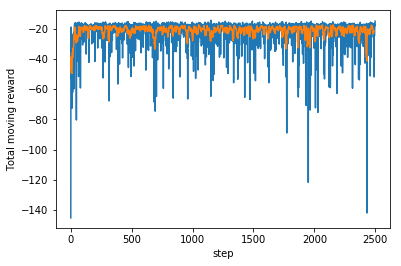

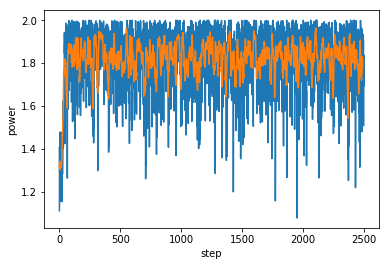

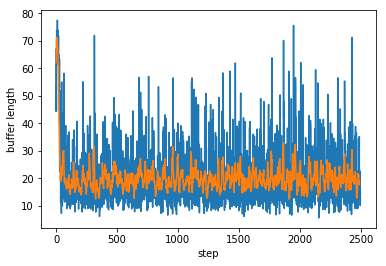

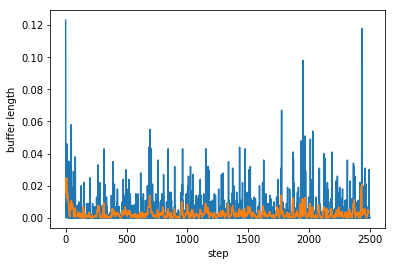

In [3]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

In [1]:
cur_init_ds_ep = env.reset()
    
cur_r_ep = np.zeros(len(user_list))
cur_p_ep = np.zeros(len(user_list))
cur_n_ep = np.zeros(len(user_list))
cur_ts_ep = np.zeros(len(user_list))
cur_rs_ep = np.zeros(len(user_list))
cur_ps_ep = np.zeros(len(user_list))
cur_ds_ep = np.zeros(len(user_list))
cur_ch_ep = np.zeros(len(user_list))
    
for j in range(1000):
    # first try to transmit from current state
    [cur_r, done, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
    cur_r_ep += cur_r
    cur_p_ep += cur_p
    cur_ts_ep += cur_ts
    cur_ps_ep += cur_ps
    cur_rs_ep += cur_rs
    cur_ds_ep += cur_ds
    cur_ch_ep += cur_ch
        
    print('%d:r:%f,p:%s,n:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (j, cur_r, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_init_ds_ep))
        
print('r:%f,p:%s,n:%s,tr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_n_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep))

NameError: name 'env' is not defined

In [3]:
graph = tf.get_default_graph()
inputs = graph.get_tensor_by_name("input_1"+":0")
scaled_out = graph.get_tensor_by_name("output_1"+":0")
print sess.run(scaled_out, feed_dict={inputs: [[7.22254768,2.3384,2.7784888e-05]]})

[[0.78826445 1.        ]]


In [2]:
res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit(False)
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])

0:r:-50.8910,p:1.4033,tr:1.4707,pr:1.3505,rev:2.9594,dbuf:72.5261,ch:0.00002568,ibuf:4
1:r:-57.9454,p:1.3913,tr:1.6529,pr:1.2218,rev:3.0360,dbuf:74.1439,ch:0.00002761,ibuf:30
2:r:-51.0844,p:1.1953,tr:1.5476,pr:1.2320,rev:2.8984,dbuf:73.1955,ch:0.00002990,ibuf:39
3:r:-18.2811,p:1.3469,tr:1.5860,pr:1.3673,rev:2.9762,dbuf:61.5868,ch:0.00002683,ibuf:35
4:r:-17.5547,p:1.2180,tr:1.7657,pr:1.2518,rev:3.0115,dbuf:55.9275,ch:0.00003238,ibuf:63
5:r:-55.6239,p:1.4116,tr:1.4240,pr:1.3390,rev:2.8791,dbuf:69.1011,ch:0.00002492,ibuf:48
6:r:-37.3900,p:1.2706,tr:1.3830,pr:1.5578,rev:3.0240,dbuf:59.5109,ch:0.00002915,ibuf:8
7:r:-32.6223,p:1.4738,tr:1.3452,pr:1.6902,rev:3.0674,dbuf:63.5657,ch:0.00002512,ibuf:71
8:r:-20.8140,p:1.2057,tr:1.4394,pr:1.5456,rev:3.0451,dbuf:49.6221,ch:0.00002902,ibuf:38
9:r:-19.3836,p:1.1973,tr:1.4459,pr:1.4838,rev:2.9358,dbuf:56.0717,ch:0.00002922,ibuf:86


In [3]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

MAX_EPISODE = 50
MAX_EPISODE_LEN = 1000

NUM_T = 1
NUM_R = 1
SIGMA2 = 0.3e-9

config = {'state_dim':3, 'action_dim':2};
train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                 'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                 'random_seed':1234}
user_config = [{'id':'1', 'rate':3, 'dis':100, 'action_bound':1, 
                'data_buf_size':100, 't_factor':0.9, 'penalty':1000}];

print user_config
# 0. initialize the session object
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
    
# 1. include all user in the system according to the user_config
user_list = [];
for info in user_config:
    info.update(config)
    user_list.append(MecTermLD(sess, info, train_config))
    print 'test'

# 2. create the simulation env
env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)
env.init_target_network()

res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])
sess.close()

[{'data_buf_size': 100, 'penalty': 1000, 'rate': 3, 'action_bound': 1, 'id': '1', 't_factor': 0.9, 'dis': 100}]
INFO:tensorflow:Restoring parameters from model/my_test_model
--Return--
None
> <ipython-input-3-a12846566f97>(30)<module>()
     29 graph = tf.get_default_graph()
---> 30 pdb.set_trace()
     31 

ipdb> graph
ipdb> graph.trainable_variables
*** AttributeError: 'Graph' object has no attribute 'trainable_variables'
ipdb> tf.trainable_variables()
[<tf.Variable 'fully_connected/weights:0' shape=(3, 400) dtype=float32_ref>, <tf.Variable 'fully_connected/BatchNorm/beta:0' shape=(400,) dtype=float32_ref>, <tf.Variable 'fully_connected_1/weights:0' shape=(3, 300) dtype=float32_ref>, <tf.Variable 'fully_connected_1/BatchNorm/beta:0' shape=(300,) dtype=float32_ref>, <tf.Variable 'fully_connected_2/weights:0' shape=(300, 2) dtype=float32_ref>, <tf.Variable 'fully_connected_2/biases:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'fully_connected_3/weights:0' shape=(3, 400) dtype=float32

BdbQuit: 

In [9]:
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
variable_names = [v.name for v in tf.trainable_variables()]
values = sess.run(variable_names)
print sess.run('fully_connected_2/weights:0')

INFO:tensorflow:Restoring parameters from model/my_test_model
[[0.1545126  0.15780352]
 [0.15616506 0.15971294]
 [0.06559879 0.09880391]
 [0.06487427 0.10064688]
 [0.15168335 0.16229852]
 [0.06257845 0.09748891]
 [0.06430701 0.09924787]
 [0.06548443 0.10012874]
 [0.15782878 0.15414344]
 [0.15429462 0.17596859]
 [0.05945097 0.0991616 ]
 [0.06383383 0.09632684]
 [0.06522399 0.10438306]
 [0.06095436 0.09916781]
 [0.06635379 0.0955418 ]
 [0.06379106 0.09433711]
 [0.06133086 0.09875894]
 [0.06503102 0.09639146]
 [0.15047684 0.17412661]
 [0.15663381 0.15740666]
 [0.17768952 0.15899988]
 [0.15730077 0.14491995]
 [0.05902164 0.10017106]
 [0.06845198 0.09686822]
 [0.15724926 0.14774598]
 [0.1529071  0.16426612]
 [0.1520101  0.15706535]
 [0.16091335 0.16260217]
 [0.15082897 0.16070077]
 [0.06310375 0.09398151]
 [0.06018374 0.10056869]
 [0.05968894 0.10066012]
 [0.15474424 0.16255529]
 [0.15111688 0.1622602 ]
 [0.0838669  0.18973866]
 [0.06870251 0.24295035]
 [0.06702217 0.10505467]
 [0.1529     

In [3]:
np.save('t_08/1', [1])